In [1]:
######################################################################################
# Using Electrodermal Activity to Detect Deception and Suspicion during a Card Game
# Affective Computing - Mini-project
# Jan Ondras
# Dec 2017 - Jan 2018
######################################################################################
# Testing of SUSPICION detection, person-dependent manner
# using nested cross-validation: 
# outer loop for testing = 5-fold, 
# inner loop for hyperparameter (delta_S, tau_MSEL, C) tuning = 5-fold
######################################################################################

import itertools
import numpy as np
import glob
import csv
import time
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score

seed1 = 23
seed2 = 889
seed3 = 43

# To be used within GridSearch
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed2)
# To be used in outer CV 
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed3)
# LeaveOneOut

int_SIDs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
SIDs = ['{:02d}'.format(s) for s in int_SIDs]
C_range = 2. ** np.arange(-30, 15, step=1.)
parameters = [{'C': C_range}]

eds = np.linspace(1.,4.,7) # Epoch delay
msels = np.linspace(0.5,4.5,9) # Max epoch length
feature_type = 'suspicion'
val_scores = {}  # for each subject(key), list of tuples (ed,mel,bestC,outer_fold, val_acc)
test_scores = {} # for each subject(key), list of tuples (ed,mel,outer_fold,test_acc)

for SID in SIDs:
    print SID
    # 1 subject -> 60 sec
    val_scores[SID] = []
    test_scores[SID] = []
    for i, ed in enumerate(eds):
        for j, msel in enumerate(msels):
    #         t = time.time()
            data = np.loadtxt('./../Experiment/ExtractedFeatures/features_'+feature_type+'_u_'+str(i)+'_'+str(j)+'.csv', 
                              delimiter=",", skiprows=0, dtype=str)
            dataSID = np.array([row for row in data if row[0] == SID])
            X = dataSID[:,1:-2].astype(np.float32)
            y = dataSID[:,-1].astype(np.int)

            # Balance the dataset
            X, y = RandomOverSampler(ratio='minority', random_state=seed1).fit_sample(X, y)

            # Outer CV
            of = 1
            for train_index, test_index in outer_cv.split(X, y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                # Inner CV
                grid = GridSearchCV(estimator=LinearSVC(), param_grid=parameters, cv=inner_cv, n_jobs=8, scoring='accuracy')
                grid.fit(X_train, y_train)
                # Record validation score - used to select best ed, mel, C
                val_scores[SID].append( (ed, msel, grid.best_params_['C'], of, grid.best_score_) )
                # Using the best hyperparameters, train on full training set
                SVM_linear_best = grid.best_estimator_
                SVM_linear_best.fit(X_train, y_train)
                # Evaluate
                y_pred = SVM_linear_best.predict(X_test)
                # Record test score - for model evaluation only
                test_scores[SID].append( (ed, msel, of, accuracy_score(y_test, y_pred)) )                
                of += 1

print val_scores
print test_scores

01


Process PoolWorker-17:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
  File "/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
KeyboardInterrupt
Process PoolWorker-21:
Process PoolWorker-24:
Process PoolWorker-22:
Traceback (most recent call last):
Process PoolWorker-19:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process PoolWorker-23:
    self.ru

KeyboardInterrupt: 

Subject 01 	Mean testing accuracy (over all 5 outer folds):  0.78 +/- 0.126885775404
Subject 02 	Mean testing accuracy (over all 5 outer folds):  0.975 +/- 0.05
Subject 03 	Mean testing accuracy (over all 5 outer folds):  0.483333333333 +/- 0.167912013997
Subject 04 	Mean testing accuracy (over all 5 outer folds):  0.96 +/- 0.08
Subject 05 	Mean testing accuracy (over all 5 outer folds):  0.865555555556 +/- 0.0964429083339
Subject 06 	Mean testing accuracy (over all 5 outer folds):  0.951818181818 +/- 0.0427949174398
Subject 07 	Mean testing accuracy (over all 5 outer folds):  0.665 +/- 0.0644204936336
Subject 08 	Mean testing accuracy (over all 5 outer folds):  0.616883116883 +/- 0.0872995002911
Subject 09 	Mean testing accuracy (over all 5 outer folds):  0.879090909091 +/- 0.0626943259984
Subject 10 	Mean testing accuracy (over all 5 outer folds):  0.972727272727 +/- 0.0363636363636
Subject 11 	Mean testing accuracy (over all 5 outer folds):  0.59649122807 +/- 0.0654082522186
Subject

<IPython.core.display.Javascript object>


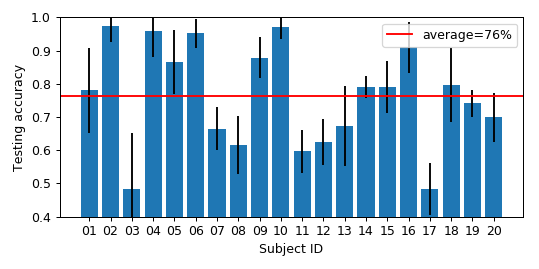

Mean test. acc. for person-dependent:  0.762627750904 +/- 0.0781466280746


In [2]:
# Saved scores from above
val_scores={'02': [(1.0, 0.5, 64.0, 1, 0.90625), (1.0, 0.5, 32.0, 2, 0.84375), (1.0, 0.5, 16384.0, 3, 0.90625), (1.0, 0.5, 4.0, 4, 0.90625), (1.0, 0.5, 512.0, 5, 0.9375), (1.0, 1.0, 64.0, 1, 0.96875), (1.0, 1.0, 16.0, 2, 0.9375), (1.0, 1.0, 32.0, 3, 0.9375), (1.0, 1.0, 256.0, 4, 0.90625), (1.0, 1.0, 16.0, 5, 0.875), (1.0, 1.5, 32.0, 1, 1.0), (1.0, 1.5, 64.0, 2, 1.0), (1.0, 1.5, 4.0, 3, 1.0), (1.0, 1.5, 32.0, 4, 0.96875), (1.0, 1.5, 256.0, 5, 0.96875), (1.0, 2.0, 32.0, 1, 1.0), (1.0, 2.0, 128.0, 2, 1.0), (1.0, 2.0, 8.0, 3, 1.0), (1.0, 2.0, 16.0, 4, 0.96875), (1.0, 2.0, 0.125, 5, 0.9375), (1.0, 2.5, 16.0, 1, 1.0), (1.0, 2.5, 32.0, 2, 1.0), (1.0, 2.5, 16.0, 3, 1.0), (1.0, 2.5, 32.0, 4, 0.96875), (1.0, 2.5, 64.0, 5, 0.96875), (1.0, 3.0, 16.0, 1, 1.0), (1.0, 3.0, 64.0, 2, 1.0), (1.0, 3.0, 4.0, 3, 1.0), (1.0, 3.0, 32.0, 4, 0.96875), (1.0, 3.0, 128.0, 5, 1.0), (1.0, 3.5, 16.0, 1, 1.0), (1.0, 3.5, 64.0, 2, 1.0), (1.0, 3.5, 4.0, 3, 1.0), (1.0, 3.5, 32.0, 4, 0.96875), (1.0, 3.5, 128.0, 5, 1.0), (1.0, 4.0, 16.0, 1, 1.0), (1.0, 4.0, 64.0, 2, 1.0), (1.0, 4.0, 4.0, 3, 1.0), (1.0, 4.0, 32.0, 4, 0.96875), (1.0, 4.0, 128.0, 5, 1.0), (1.0, 4.5, 16.0, 1, 1.0), (1.0, 4.5, 64.0, 2, 1.0), (1.0, 4.5, 4.0, 3, 1.0), (1.0, 4.5, 32.0, 4, 0.96875), (1.0, 4.5, 128.0, 5, 1.0), (1.5, 0.5, 128.0, 1, 0.71875), (1.5, 0.5, 128.0, 2, 0.71875), (1.5, 0.5, 16384.0, 3, 0.65625), (1.5, 0.5, 32.0, 4, 0.875), (1.5, 0.5, 8192.0, 5, 0.78125), (1.5, 1.0, 2.0, 1, 0.875), (1.5, 1.0, 64.0, 2, 1.0), (1.5, 1.0, 8.0, 3, 0.875), (1.5, 1.0, 128.0, 4, 0.875), (1.5, 1.0, 4.0, 5, 0.875), (1.5, 1.5, 0.03125, 1, 1.0), (1.5, 1.5, 0.03125, 2, 1.0), (1.5, 1.5, 0.03125, 3, 0.96875), (1.5, 1.5, 0.015625, 4, 1.0), (1.5, 1.5, 0.03125, 5, 1.0), (1.5, 2.0, 0.03125, 1, 1.0), (1.5, 2.0, 0.015625, 2, 1.0), (1.5, 2.0, 0.03125, 3, 1.0), (1.5, 2.0, 0.03125, 4, 1.0), (1.5, 2.0, 0.03125, 5, 1.0), (1.5, 2.5, 0.03125, 1, 1.0), (1.5, 2.5, 0.03125, 2, 1.0), (1.5, 2.5, 0.03125, 3, 1.0), (1.5, 2.5, 0.03125, 4, 1.0), (1.5, 2.5, 0.03125, 5, 1.0), (1.5, 3.0, 0.0625, 1, 0.96875), (1.5, 3.0, 0.03125, 2, 1.0), (1.5, 3.0, 0.0625, 3, 0.96875), (1.5, 3.0, 0.03125, 4, 1.0), (1.5, 3.0, 0.0625, 5, 1.0), (1.5, 3.5, 0.0625, 1, 0.96875), (1.5, 3.5, 0.03125, 2, 1.0), (1.5, 3.5, 0.0625, 3, 0.96875), (1.5, 3.5, 0.03125, 4, 1.0), (1.5, 3.5, 0.0625, 5, 1.0), (1.5, 4.0, 0.0625, 1, 0.96875), (1.5, 4.0, 0.03125, 2, 1.0), (1.5, 4.0, 0.0625, 3, 0.96875), (1.5, 4.0, 0.03125, 4, 1.0), (1.5, 4.0, 0.0625, 5, 1.0), (1.5, 4.5, 0.0625, 1, 0.96875), (1.5, 4.5, 0.03125, 2, 1.0), (1.5, 4.5, 0.0625, 3, 0.96875), (1.5, 4.5, 0.03125, 4, 1.0), (1.5, 4.5, 0.0625, 5, 1.0), (2.0, 0.5, 32.0, 1, 0.96875), (2.0, 0.5, 256.0, 2, 0.9375), (2.0, 0.5, 0.03125, 3, 0.90625), (2.0, 0.5, 0.03125, 4, 0.875), (2.0, 0.5, 0.03125, 5, 0.90625), (2.0, 1.0, 2.0, 1, 0.96875), (2.0, 1.0, 32.0, 2, 0.96875), (2.0, 1.0, 128.0, 3, 0.96875), (2.0, 1.0, 32.0, 4, 0.96875), (2.0, 1.0, 64.0, 5, 1.0), (2.0, 1.5, 0.00390625, 1, 1.0), (2.0, 1.5, 0.00390625, 2, 1.0), (2.0, 1.5, 0.001953125, 3, 1.0), (2.0, 1.5, 0.001953125, 4, 1.0), (2.0, 1.5, 0.001953125, 5, 1.0), (2.0, 2.0, 0.0078125, 1, 1.0), (2.0, 2.0, 0.0078125, 2, 1.0), (2.0, 2.0, 0.00390625, 3, 1.0), (2.0, 2.0, 0.00390625, 4, 1.0), (2.0, 2.0, 0.0078125, 5, 1.0), (2.0, 2.5, 0.0078125, 1, 1.0), (2.0, 2.5, 0.0078125, 2, 1.0), (2.0, 2.5, 0.0078125, 3, 1.0), (2.0, 2.5, 0.0078125, 4, 1.0), (2.0, 2.5, 0.0078125, 5, 1.0), (2.0, 3.0, 0.015625, 1, 1.0), (2.0, 3.0, 0.015625, 2, 1.0), (2.0, 3.0, 0.015625, 3, 1.0), (2.0, 3.0, 0.015625, 4, 1.0), (2.0, 3.0, 0.015625, 5, 1.0), (2.0, 3.5, 0.015625, 1, 1.0), (2.0, 3.5, 0.015625, 2, 1.0), (2.0, 3.5, 0.015625, 3, 1.0), (2.0, 3.5, 0.015625, 4, 1.0), (2.0, 3.5, 0.015625, 5, 1.0), (2.0, 4.0, 0.015625, 1, 1.0), (2.0, 4.0, 0.015625, 2, 1.0), (2.0, 4.0, 0.015625, 3, 1.0), (2.0, 4.0, 0.015625, 4, 1.0), (2.0, 4.0, 0.015625, 5, 1.0), (2.0, 4.5, 0.015625, 1, 1.0), (2.0, 4.5, 0.015625, 2, 1.0), (2.0, 4.5, 0.015625, 3, 1.0), (2.0, 4.5, 0.015625, 4, 1.0), (2.0, 4.5, 0.015625, 5, 1.0), (2.5, 0.5, 8.0, 1, 0.875), (2.5, 0.5, 1.0, 2, 0.90625), (2.5, 0.5, 1024.0, 3, 0.84375), (2.5, 0.5, 16.0, 4, 0.9375), (2.5, 0.5, 64.0, 5, 0.90625), (2.5, 1.0, 16.0, 1, 0.90625), (2.5, 1.0, 0.015625, 2, 0.875), (2.5, 1.0, 0.03125, 3, 0.875), (2.5, 1.0, 0.03125, 4, 0.90625), (2.5, 1.0, 32.0, 5, 0.90625), (2.5, 1.5, 0.015625, 1, 0.9375), (2.5, 1.5, 0.0078125, 2, 0.96875), (2.5, 1.5, 0.0078125, 3, 0.9375), (2.5, 1.5, 0.015625, 4, 0.9375), (2.5, 1.5, 0.0078125, 5, 0.96875), (2.5, 2.0, 0.00390625, 1, 0.96875), (2.5, 2.0, 0.0078125, 2, 1.0), (2.5, 2.0, 0.0009765625, 3, 0.96875), (2.5, 2.0, 0.0078125, 4, 0.96875), (2.5, 2.0, 0.001953125, 5, 1.0), (2.5, 2.5, 0.0078125, 1, 0.96875), (2.5, 2.5, 0.00390625, 2, 1.0), (2.5, 2.5, 0.0009765625, 3, 0.96875), (2.5, 2.5, 0.00390625, 4, 1.0), (2.5, 2.5, 0.001953125, 5, 1.0), (2.5, 3.0, 0.0078125, 1, 0.96875), (2.5, 3.0, 0.0078125, 2, 1.0), (2.5, 3.0, 16.0, 3, 1.0), (2.5, 3.0, 0.0078125, 4, 1.0), (2.5, 3.0, 0.001953125, 5, 1.0), (2.5, 3.5, 0.0078125, 1, 0.96875), (2.5, 3.5, 0.0078125, 2, 1.0), (2.5, 3.5, 16.0, 3, 1.0), (2.5, 3.5, 0.0078125, 4, 1.0), (2.5, 3.5, 0.001953125, 5, 1.0), (2.5, 4.0, 0.0078125, 1, 0.96875), (2.5, 4.0, 0.0078125, 2, 1.0), (2.5, 4.0, 16.0, 3, 1.0), (2.5, 4.0, 0.0078125, 4, 1.0), (2.5, 4.0, 0.001953125, 5, 1.0), (2.5, 4.5, 0.0078125, 1, 0.96875), (2.5, 4.5, 0.0078125, 2, 1.0), (2.5, 4.5, 16.0, 3, 1.0), (2.5, 4.5, 0.0078125, 4, 1.0), (2.5, 4.5, 0.001953125, 5, 1.0), (3.0, 0.5, 0.0625, 1, 0.9375), (3.0, 0.5, 0.0625, 2, 0.9375), (3.0, 0.5, 0.0625, 3, 0.9375), (3.0, 0.5, 0.0625, 4, 0.96875), (3.0, 0.5, 0.0625, 5, 0.96875), (3.0, 1.0, 0.00390625, 1, 0.96875), (3.0, 1.0, 256.0, 2, 0.96875), (3.0, 1.0, 0.001953125, 3, 0.9375), (3.0, 1.0, 0.0078125, 4, 0.9375), (3.0, 1.0, 0.0078125, 5, 0.96875), (3.0, 1.5, 32.0, 1, 1.0), (3.0, 1.5, 32.0, 2, 0.96875), (3.0, 1.5, 0.015625, 3, 1.0), (3.0, 1.5, 16.0, 4, 0.96875), (3.0, 1.5, 32.0, 5, 1.0), (3.0, 2.0, 0.00390625, 1, 1.0), (3.0, 2.0, 0.00390625, 2, 1.0), (3.0, 2.0, 0.0009765625, 3, 1.0), (3.0, 2.0, 0.001953125, 4, 1.0), (3.0, 2.0, 0.00390625, 5, 1.0), (3.0, 2.5, 9.3132257461547852e-10, 1, 1.0), (3.0, 2.5, 9.3132257461547852e-10, 2, 1.0), (3.0, 2.5, 9.3132257461547852e-10, 3, 1.0), (3.0, 2.5, 9.3132257461547852e-10, 4, 1.0), (3.0, 2.5, 9.3132257461547852e-10, 5, 1.0), (3.0, 3.0, 9.3132257461547852e-10, 1, 1.0), (3.0, 3.0, 9.3132257461547852e-10, 2, 1.0), (3.0, 3.0, 9.3132257461547852e-10, 3, 1.0), (3.0, 3.0, 9.3132257461547852e-10, 4, 1.0), (3.0, 3.0, 9.3132257461547852e-10, 5, 1.0), (3.0, 3.5, 9.3132257461547852e-10, 1, 1.0), (3.0, 3.5, 9.3132257461547852e-10, 2, 1.0), (3.0, 3.5, 9.3132257461547852e-10, 3, 1.0), (3.0, 3.5, 9.3132257461547852e-10, 4, 1.0), (3.0, 3.5, 9.3132257461547852e-10, 5, 1.0), (3.0, 4.0, 9.3132257461547852e-10, 1, 1.0), (3.0, 4.0, 9.3132257461547852e-10, 2, 1.0), (3.0, 4.0, 9.3132257461547852e-10, 3, 1.0), (3.0, 4.0, 9.3132257461547852e-10, 4, 1.0), (3.0, 4.0, 9.3132257461547852e-10, 5, 1.0), (3.0, 4.5, 9.3132257461547852e-10, 1, 1.0), (3.0, 4.5, 9.3132257461547852e-10, 2, 1.0), (3.0, 4.5, 9.3132257461547852e-10, 3, 1.0), (3.0, 4.5, 9.3132257461547852e-10, 4, 1.0), (3.0, 4.5, 9.3132257461547852e-10, 5, 1.0), (3.5, 0.5, 32.0, 1, 0.84375), (3.5, 0.5, 4.0, 2, 0.78125), (3.5, 0.5, 1024.0, 3, 0.84375), (3.5, 0.5, 512.0, 4, 0.9375), (3.5, 0.5, 2.0, 5, 0.9375), (3.5, 1.0, 0.03125, 1, 1.0), (3.5, 1.0, 0.03125, 2, 0.9375), (3.5, 1.0, 0.03125, 3, 0.9375), (3.5, 1.0, 0.03125, 4, 0.96875), (3.5, 1.0, 0.0625, 5, 0.9375), (3.5, 1.5, 0.015625, 1, 0.96875), (3.5, 1.5, 0.015625, 2, 0.96875), (3.5, 1.5, 0.0078125, 3, 0.96875), (3.5, 1.5, 0.0078125, 4, 1.0), (3.5, 1.5, 0.015625, 5, 0.96875), (3.5, 2.0, 0.015625, 1, 1.0), (3.5, 2.0, 0.015625, 2, 0.96875), (3.5, 2.0, 0.0078125, 3, 1.0), (3.5, 2.0, 0.015625, 4, 1.0), (3.5, 2.0, 0.015625, 5, 1.0), (3.5, 2.5, 0.001953125, 1, 1.0), (3.5, 2.5, 0.001953125, 2, 1.0), (3.5, 2.5, 9.3132257461547852e-10, 3, 0.96875), (3.5, 2.5, 0.0009765625, 4, 1.0), (3.5, 2.5, 0.0009765625, 5, 1.0), (3.5, 3.0, 9.3132257461547852e-10, 1, 0.96875), (3.5, 3.0, 9.3132257461547852e-10, 2, 0.96875), (3.5, 3.0, 9.3132257461547852e-10, 3, 0.9375), (3.5, 3.0, 9.3132257461547852e-10, 4, 1.0), (3.5, 3.0, 9.3132257461547852e-10, 5, 0.96875), (3.5, 3.5, 9.3132257461547852e-10, 1, 0.96875), (3.5, 3.5, 9.3132257461547852e-10, 2, 0.96875), (3.5, 3.5, 9.3132257461547852e-10, 3, 0.9375), (3.5, 3.5, 9.3132257461547852e-10, 4, 1.0), (3.5, 3.5, 9.3132257461547852e-10, 5, 0.96875), (3.5, 4.0, 9.3132257461547852e-10, 1, 0.96875), (3.5, 4.0, 9.3132257461547852e-10, 2, 0.96875), (3.5, 4.0, 9.3132257461547852e-10, 3, 0.9375), (3.5, 4.0, 9.3132257461547852e-10, 4, 1.0), (3.5, 4.0, 9.3132257461547852e-10, 5, 0.96875), (3.5, 4.5, 9.3132257461547852e-10, 1, 0.96875), (3.5, 4.5, 9.3132257461547852e-10, 2, 0.96875), (3.5, 4.5, 9.3132257461547852e-10, 3, 0.9375), (3.5, 4.5, 9.3132257461547852e-10, 4, 1.0), (3.5, 4.5, 9.3132257461547852e-10, 5, 0.96875), (4.0, 0.5, 0.0625, 1, 0.96875), (4.0, 0.5, 0.0625, 2, 0.96875), (4.0, 0.5, 0.0625, 3, 0.9375), (4.0, 0.5, 0.0625, 4, 0.9375), (4.0, 0.5, 0.0625, 5, 0.9375), (4.0, 1.0, 0.03125, 1, 0.9375), (4.0, 1.0, 4.0, 2, 0.9375), (4.0, 1.0, 4.0, 3, 0.9375), (4.0, 1.0, 4.0, 4, 0.96875), (4.0, 1.0, 16.0, 5, 0.96875), (4.0, 1.5, 0.0625, 1, 0.96875), (4.0, 1.5, 8.0, 2, 0.9375), (4.0, 1.5, 8.0, 3, 0.9375), (4.0, 1.5, 64.0, 4, 1.0), (4.0, 1.5, 8.0, 5, 0.9375), (4.0, 2.0, 0.015625, 1, 0.96875), (4.0, 2.0, 0.03125, 2, 0.90625), (4.0, 2.0, 0.03125, 3, 0.90625), (4.0, 2.0, 0.015625, 4, 0.9375), (4.0, 2.0, 0.015625, 5, 0.90625), (4.0, 2.5, 0.03125, 1, 0.96875), (4.0, 2.5, 4.0, 2, 0.9375), (4.0, 2.5, 0.03125, 3, 0.96875), (4.0, 2.5, 16.0, 4, 1.0), (4.0, 2.5, 0.03125, 5, 0.96875), (4.0, 3.0, 0.00390625, 1, 0.96875), (4.0, 3.0, 0.0078125, 2, 0.96875), (4.0, 3.0, 0.0078125, 3, 0.96875), (4.0, 3.0, 0.00390625, 4, 1.0), (4.0, 3.0, 0.00390625, 5, 0.96875), (4.0, 3.5, 0.00390625, 1, 0.96875), (4.0, 3.5, 0.0078125, 2, 0.96875), (4.0, 3.5, 0.0078125, 3, 0.96875), (4.0, 3.5, 0.00390625, 4, 1.0), (4.0, 3.5, 0.00390625, 5, 0.96875), (4.0, 4.0, 0.00390625, 1, 0.96875), (4.0, 4.0, 0.0078125, 2, 0.96875), (4.0, 4.0, 0.0078125, 3, 0.96875), (4.0, 4.0, 0.00390625, 4, 1.0), (4.0, 4.0, 0.00390625, 5, 0.96875), (4.0, 4.5, 0.00390625, 1, 0.96875), (4.0, 4.5, 0.0078125, 2, 0.96875), (4.0, 4.5, 0.0078125, 3, 0.96875), (4.0, 4.5, 0.00390625, 4, 1.0), (4.0, 4.5, 0.00390625, 5, 0.96875)], '03': [(1.0, 0.5, 9.3132257461547852e-10, 1, 0.46666666666666667), (1.0, 0.5, 1024.0, 2, 0.56666666666666665), (1.0, 0.5, 16384.0, 3, 0.5), (1.0, 0.5, 256.0, 4, 0.59999999999999998), (1.0, 0.5, 0.125, 5, 0.6875), (1.0, 1.0, 16.0, 1, 0.69999999999999996), (1.0, 1.0, 256.0, 2, 0.69999999999999996), (1.0, 1.0, 16.0, 3, 0.66666666666666663), (1.0, 1.0, 8.0, 4, 0.6333333333333333), (1.0, 1.0, 2.0, 5, 0.65625), (1.0, 1.5, 256.0, 1, 0.5), (1.0, 1.5, 128.0, 2, 0.69999999999999996), (1.0, 1.5, 16.0, 3, 0.56666666666666665), (1.0, 1.5, 0.125, 4, 0.6333333333333333), (1.0, 1.5, 0.015625, 5, 0.6875), (1.0, 2.0, 0.015625, 1, 0.56666666666666665), (1.0, 2.0, 0.25, 2, 0.59999999999999998), (1.0, 2.0, 128.0, 3, 0.66666666666666663), (1.0, 2.0, 16384.0, 4, 0.5), (1.0, 2.0, 0.25, 5, 0.59375), (1.0, 2.5, 0.015625, 1, 0.53333333333333333), (1.0, 2.5, 128.0, 2, 0.56666666666666665), (1.0, 2.5, 0.015625, 3, 0.56666666666666665), (1.0, 2.5, 0.0078125, 4, 0.5), (1.0, 2.5, 0.0625, 5, 0.59375), (1.0, 3.0, 9.3132257461547852e-10, 1, 0.53333333333333333), (1.0, 3.0, 128.0, 2, 0.59999999999999998), (1.0, 3.0, 256.0, 3, 0.66666666666666663), (1.0, 3.0, 2048.0, 4, 0.5), (1.0, 3.0, 0.00390625, 5, 0.53125), (1.0, 3.5, 512.0, 1, 0.5), (1.0, 3.5, 64.0, 2, 0.56666666666666665), (1.0, 3.5, 0.015625, 3, 0.59999999999999998), (1.0, 3.5, 16384.0, 4, 0.56666666666666665), (1.0, 3.5, 9.3132257461547852e-10, 5, 0.53125), (1.0, 4.0, 0.5, 1, 0.56666666666666665), (1.0, 4.0, 0.125, 2, 0.53333333333333333), (1.0, 4.0, 64.0, 3, 0.66666666666666663), (1.0, 4.0, 1024.0, 4, 0.56666666666666665), (1.0, 4.0, 0.0009765625, 5, 0.5), (1.0, 4.5, 0.0078125, 1, 0.53333333333333333), (1.0, 4.5, 0.125, 2, 0.53333333333333333), (1.0, 4.5, 256.0, 3, 0.59999999999999998), (1.0, 4.5, 8192.0, 4, 0.46666666666666667), (1.0, 4.5, 512.0, 5, 0.53125), (1.5, 0.5, 9.3132257461547852e-10, 1, 0.5), (1.5, 0.5, 9.3132257461547852e-10, 2, 0.53333333333333333), (1.5, 0.5, 9.3132257461547852e-10, 3, 0.5), (1.5, 0.5, 32.0, 4, 0.46666666666666667), (1.5, 0.5, 1024.0, 5, 0.4375), (1.5, 1.0, 8192.0, 1, 0.46666666666666667), (1.5, 1.0, 256.0, 2, 0.6333333333333333), (1.5, 1.0, 0.25, 3, 0.59999999999999998), (1.5, 1.0, 0.0625, 4, 0.56666666666666665), (1.5, 1.0, 8.0, 5, 0.65625), (1.5, 1.5, 0.03125, 1, 0.6333333333333333), (1.5, 1.5, 0.0625, 2, 0.69999999999999996), (1.5, 1.5, 0.0625, 3, 0.69999999999999996), (1.5, 1.5, 0.0078125, 4, 0.6333333333333333), (1.5, 1.5, 0.0625, 5, 0.625), (1.5, 2.0, 0.125, 1, 0.66666666666666663), (1.5, 2.0, 0.5, 2, 0.69999999999999996), (1.5, 2.0, 0.03125, 3, 0.69999999999999996), (1.5, 2.0, 0.000244140625, 4, 0.59999999999999998), (1.5, 2.0, 0.015625, 5, 0.78125), (1.5, 2.5, 9.3132257461547852e-10, 1, 0.5), (1.5, 2.5, 0.0625, 2, 0.56666666666666665), (1.5, 2.5, 0.00390625, 3, 0.59999999999999998), (1.5, 2.5, 0.0078125, 4, 0.56666666666666665), (1.5, 2.5, 16.0, 5, 0.59375), (1.5, 3.0, 9.3132257461547852e-10, 1, 0.5), (1.5, 3.0, 0.0625, 2, 0.59999999999999998), (1.5, 3.0, 0.015625, 3, 0.59999999999999998), (1.5, 3.0, 9.3132257461547852e-10, 4, 0.53333333333333333), (1.5, 3.0, 4.0, 5, 0.65625), (1.5, 3.5, 9.3132257461547852e-10, 1, 0.5), (1.5, 3.5, 128.0, 2, 0.53333333333333333), (1.5, 3.5, 0.015625, 3, 0.59999999999999998), (1.5, 3.5, 0.03125, 4, 0.5), (1.5, 3.5, 32.0, 5, 0.59375), (1.5, 4.0, 8192.0, 1, 0.53333333333333333), (1.5, 4.0, 1024.0, 2, 0.6333333333333333), (1.5, 4.0, 0.0078125, 3, 0.56666666666666665), (1.5, 4.0, 0.0625, 4, 0.53333333333333333), (1.5, 4.0, 32.0, 5, 0.59375), (1.5, 4.5, 2048.0, 1, 0.56666666666666665), (1.5, 4.5, 256.0, 2, 0.59999999999999998), (1.5, 4.5, 256.0, 3, 0.6333333333333333), (1.5, 4.5, 9.3132257461547852e-10, 4, 0.5), (1.5, 4.5, 8.0, 5, 0.65625), (2.0, 0.5, 128.0, 1, 0.53333333333333333), (2.0, 0.5, 2048.0, 2, 0.6333333333333333), (2.0, 0.5, 4096.0, 3, 0.53333333333333333), (2.0, 0.5, 128.0, 4, 0.66666666666666663), (2.0, 0.5, 8192.0, 5, 0.5625), (2.0, 1.0, 2048.0, 1, 0.6333333333333333), (2.0, 1.0, 0.125, 2, 0.6333333333333333), (2.0, 1.0, 1024.0, 3, 0.6333333333333333), (2.0, 1.0, 16384.0, 4, 0.6333333333333333), (2.0, 1.0, 0.125, 5, 0.625), (2.0, 1.5, 0.0625, 1, 0.59999999999999998), (2.0, 1.5, 256.0, 2, 0.69999999999999996), (2.0, 1.5, 16384.0, 3, 0.66666666666666663), (2.0, 1.5, 8192.0, 4, 0.6333333333333333), (2.0, 1.5, 0.03125, 5, 0.625), (2.0, 2.0, 0.25, 1, 0.59999999999999998), (2.0, 2.0, 0.125, 2, 0.73333333333333328), (2.0, 2.0, 0.125, 3, 0.6333333333333333), (2.0, 2.0, 0.125, 4, 0.66666666666666663), (2.0, 2.0, 0.0625, 5, 0.59375), (2.0, 2.5, 0.125, 1, 0.6333333333333333), (2.0, 2.5, 0.25, 2, 0.73333333333333328), (2.0, 2.5, 0.125, 3, 0.6333333333333333), (2.0, 2.5, 0.5, 4, 0.66666666666666663), (2.0, 2.5, 1024.0, 5, 0.5625), (2.0, 3.0, 0.125, 1, 0.56666666666666665), (2.0, 3.0, 64.0, 2, 0.66666666666666663), (2.0, 3.0, 9.3132257461547852e-10, 3, 0.5), (2.0, 3.0, 0.0625, 4, 0.56666666666666665), (2.0, 3.0, 9.3132257461547852e-10, 5, 0.5), (2.0, 3.5, 0.25, 1, 0.56666666666666665), (2.0, 3.5, 128.0, 2, 0.80000000000000004), (2.0, 3.5, 128.0, 3, 0.59999999999999998), (2.0, 3.5, 128.0, 4, 0.6333333333333333), (2.0, 3.5, 4096.0, 5, 0.53125), (2.0, 4.0, 0.125, 1, 0.53333333333333333), (2.0, 4.0, 256.0, 2, 0.73333333333333328), (2.0, 4.0, 128.0, 3, 0.6333333333333333), (2.0, 4.0, 256.0, 4, 0.66666666666666663), (2.0, 4.0, 32.0, 5, 0.59375), (2.0, 4.5, 4096.0, 1, 0.53333333333333333), (2.0, 4.5, 512.0, 2, 0.73333333333333328), (2.0, 4.5, 2048.0, 3, 0.59999999999999998), (2.0, 4.5, 32.0, 4, 0.6333333333333333), (2.0, 4.5, 32.0, 5, 0.59375), (2.5, 0.5, 0.5, 1, 0.76666666666666672), (2.5, 0.5, 0.03125, 2, 0.80000000000000004), (2.5, 0.5, 0.125, 3, 0.83333333333333337), (2.5, 0.5, 0.0625, 4, 0.76666666666666672), (2.5, 0.5, 0.015625, 5, 0.75), (2.5, 1.0, 1.0, 1, 0.80000000000000004), (2.5, 1.0, 1.0, 2, 0.80000000000000004), (2.5, 1.0, 64.0, 3, 0.83333333333333337), (2.5, 1.0, 8192.0, 4, 0.80000000000000004), (2.5, 1.0, 2.0, 5, 0.8125), (2.5, 1.5, 8.0, 1, 0.69999999999999996), (2.5, 1.5, 32.0, 2, 0.83333333333333337), (2.5, 1.5, 8.0, 3, 0.69999999999999996), (2.5, 1.5, 1024.0, 4, 0.69999999999999996), (2.5, 1.5, 8.0, 5, 0.875), (2.5, 2.0, 0.25, 1, 0.6333333333333333), (2.5, 2.0, 0.5, 2, 0.83333333333333337), (2.5, 2.0, 1024.0, 3, 0.73333333333333328), (2.5, 2.0, 8.0, 4, 0.69999999999999996), (2.5, 2.0, 1024.0, 5, 0.75), (2.5, 2.5, 0.25, 1, 0.6333333333333333), (2.5, 2.5, 0.5, 2, 0.83333333333333337), (2.5, 2.5, 0.5, 3, 0.6333333333333333), (2.5, 2.5, 0.0625, 4, 0.56666666666666665), (2.5, 2.5, 16384.0, 5, 0.75), (2.5, 3.0, 0.25, 1, 0.6333333333333333), (2.5, 3.0, 0.125, 2, 0.80000000000000004), (2.5, 3.0, 0.25, 3, 0.66666666666666663), (2.5, 3.0, 0.25, 4, 0.6333333333333333), (2.5, 3.0, 2048.0, 5, 0.625), (2.5, 3.5, 256.0, 1, 0.56666666666666665), (2.5, 3.5, 0.25, 2, 0.69999999999999996), (2.5, 3.5, 0.25, 3, 0.59999999999999998), (2.5, 3.5, 0.03125, 4, 0.56666666666666665), (2.5, 3.5, 512.0, 5, 0.65625), (2.5, 4.0, 0.125, 1, 0.56666666666666665), (2.5, 4.0, 0.125, 2, 0.73333333333333328), (2.5, 4.0, 0.25, 3, 0.6333333333333333), (2.5, 4.0, 4.0, 4, 0.6333333333333333), (2.5, 4.0, 512.0, 5, 0.625), (2.5, 4.5, 0.125, 1, 0.56666666666666665), (2.5, 4.5, 0.25, 2, 0.69999999999999996), (2.5, 4.5, 0.25, 3, 0.56666666666666665), (2.5, 4.5, 16.0, 4, 0.59999999999999998), (2.5, 4.5, 0.0625, 5, 0.625), (3.0, 0.5, 128.0, 1, 0.6333333333333333), (3.0, 0.5, 8192.0, 2, 0.59999999999999998), (3.0, 0.5, 256.0, 3, 0.59999999999999998), (3.0, 0.5, 8.0, 4, 0.69999999999999996), (3.0, 0.5, 256.0, 5, 0.71875), (3.0, 1.0, 16.0, 1, 0.76666666666666672), (3.0, 1.0, 1.0, 2, 0.69999999999999996), (3.0, 1.0, 64.0, 3, 0.76666666666666672), (3.0, 1.0, 256.0, 4, 0.76666666666666672), (3.0, 1.0, 4.0, 5, 0.8125), (3.0, 1.5, 128.0, 1, 0.69999999999999996), (3.0, 1.5, 32.0, 2, 0.90000000000000002), (3.0, 1.5, 1.0, 3, 0.80000000000000004), (3.0, 1.5, 128.0, 4, 0.73333333333333328), (3.0, 1.5, 128.0, 5, 0.78125), (3.0, 2.0, 0.0625, 1, 0.66666666666666663), (3.0, 2.0, 0.0625, 2, 0.80000000000000004), (3.0, 2.0, 0.25, 3, 0.69999999999999996), (3.0, 2.0, 0.5, 4, 0.69999999999999996), (3.0, 2.0, 0.25, 5, 0.65625), (3.0, 2.5, 0.25, 1, 0.66666666666666663), (3.0, 2.5, 0.125, 2, 0.80000000000000004), (3.0, 2.5, 0.125, 3, 0.6333333333333333), (3.0, 2.5, 0.125, 4, 0.66666666666666663), (3.0, 2.5, 0.125, 5, 0.625), (3.0, 3.0, 0.25, 1, 0.59999999999999998), (3.0, 3.0, 0.125, 2, 0.73333333333333328), (3.0, 3.0, 4096.0, 3, 0.69999999999999996), (3.0, 3.0, 128.0, 4, 0.69999999999999996), (3.0, 3.0, 64.0, 5, 0.625), (3.0, 3.5, 4096.0, 1, 0.66666666666666663), (3.0, 3.5, 0.5, 2, 0.76666666666666672), (3.0, 3.5, 2048.0, 3, 0.66666666666666663), (3.0, 3.5, 2048.0, 4, 0.66666666666666663), (3.0, 3.5, 0.125, 5, 0.625), (3.0, 4.0, 512.0, 1, 0.69999999999999996), (3.0, 4.0, 0.5, 2, 0.76666666666666672), (3.0, 4.0, 1.0, 3, 0.6333333333333333), (3.0, 4.0, 512.0, 4, 0.69999999999999996), (3.0, 4.0, 256.0, 5, 0.75), (3.0, 4.5, 4096.0, 1, 0.69999999999999996), (3.0, 4.5, 0.25, 2, 0.76666666666666672), (3.0, 4.5, 128.0, 3, 0.6333333333333333), (3.0, 4.5, 1024.0, 4, 0.76666666666666672), (3.0, 4.5, 0.25, 5, 0.65625), (3.5, 0.5, 2048.0, 1, 0.6333333333333333), (3.5, 0.5, 512.0, 2, 0.6333333333333333), (3.5, 0.5, 4096.0, 3, 0.66666666666666663), (3.5, 0.5, 32.0, 4, 0.73333333333333328), (3.5, 0.5, 16.0, 5, 0.75), (3.5, 1.0, 1024.0, 1, 0.66666666666666663), (3.5, 1.0, 8.0, 2, 0.6333333333333333), (3.5, 1.0, 256.0, 3, 0.69999999999999996), (3.5, 1.0, 0.125, 4, 0.59999999999999998), (3.5, 1.0, 0.0625, 5, 0.625), (3.5, 1.5, 512.0, 1, 0.69999999999999996), (3.5, 1.5, 4.0, 2, 0.69999999999999996), (3.5, 1.5, 0.25, 3, 0.76666666666666672), (3.5, 1.5, 0.125, 4, 0.73333333333333328), (3.5, 1.5, 0.0625, 5, 0.65625), (3.5, 2.0, 0.125, 1, 0.69999999999999996), (3.5, 2.0, 1.0, 2, 0.76666666666666672), (3.5, 2.0, 0.125, 3, 0.80000000000000004), (3.5, 2.0, 0.125, 4, 0.76666666666666672), (3.5, 2.0, 32.0, 5, 0.75), (3.5, 2.5, 8.0, 1, 0.80000000000000004), (3.5, 2.5, 1024.0, 2, 0.73333333333333328), (3.5, 2.5, 2.0, 3, 0.83333333333333337), (3.5, 2.5, 0.5, 4, 0.69999999999999996), (3.5, 2.5, 0.0625, 5, 0.6875), (3.5, 3.0, 0.25, 1, 0.76666666666666672), (3.5, 3.0, 16.0, 2, 0.73333333333333328), (3.5, 3.0, 0.125, 3, 0.80000000000000004), (3.5, 3.0, 0.125, 4, 0.73333333333333328), (3.5, 3.0, 0.0625, 5, 0.75), (3.5, 3.5, 4.0, 1, 0.73333333333333328), (3.5, 3.5, 8.0, 2, 0.76666666666666672), (3.5, 3.5, 0.125, 3, 0.80000000000000004), (3.5, 3.5, 0.0625, 4, 0.6333333333333333), (3.5, 3.5, 0.0625, 5, 0.6875), (3.5, 4.0, 8.0, 1, 0.80000000000000004), (3.5, 4.0, 16.0, 2, 0.80000000000000004), (3.5, 4.0, 0.125, 3, 0.80000000000000004), (3.5, 4.0, 0.0625, 4, 0.69999999999999996), (3.5, 4.0, 4096.0, 5, 0.75), (3.5, 4.5, 0.125, 1, 0.76666666666666672), (3.5, 4.5, 8.0, 2, 0.69999999999999996), (3.5, 4.5, 0.125, 3, 0.76666666666666672), (3.5, 4.5, 0.125, 4, 0.69999999999999996), (3.5, 4.5, 0.0625, 5, 0.71875), (4.0, 0.5, 0.25, 1, 0.6333333333333333), (4.0, 0.5, 32.0, 2, 0.66666666666666663), (4.0, 0.5, 2048.0, 3, 0.69999999999999996), (4.0, 0.5, 8.0, 4, 0.69999999999999996), (4.0, 0.5, 32.0, 5, 0.6875), (4.0, 1.0, 16.0, 1, 0.76666666666666672), (4.0, 1.0, 8192.0, 2, 0.80000000000000004), (4.0, 1.0, 1.0, 3, 0.80000000000000004), (4.0, 1.0, 16.0, 4, 0.83333333333333337), (4.0, 1.0, 256.0, 5, 0.8125), (4.0, 1.5, 16.0, 1, 0.73333333333333328), (4.0, 1.5, 2.0, 2, 0.76666666666666672), (4.0, 1.5, 16384.0, 3, 0.80000000000000004), (4.0, 1.5, 512.0, 4, 0.80000000000000004), (4.0, 1.5, 16.0, 5, 0.71875), (4.0, 2.0, 64.0, 1, 0.69999999999999996), (4.0, 2.0, 64.0, 2, 0.76666666666666672), (4.0, 2.0, 0.25, 3, 0.73333333333333328), (4.0, 2.0, 32.0, 4, 0.76666666666666672), (4.0, 2.0, 256.0, 5, 0.71875), (4.0, 2.5, 16384.0, 1, 0.69999999999999996), (4.0, 2.5, 2048.0, 2, 0.69999999999999996), (4.0, 2.5, 0.125, 3, 0.73333333333333328), (4.0, 2.5, 2.0, 4, 0.6333333333333333), (4.0, 2.5, 512.0, 5, 0.65625), (4.0, 3.0, 0.125, 1, 0.66666666666666663), (4.0, 3.0, 0.0625, 2, 0.69999999999999996), (4.0, 3.0, 0.5, 3, 0.76666666666666672), (4.0, 3.0, 0.125, 4, 0.66666666666666663), (4.0, 3.0, 0.0625, 5, 0.65625), (4.0, 3.5, 0.125, 1, 0.66666666666666663), (4.0, 3.5, 0.0625, 2, 0.66666666666666663), (4.0, 3.5, 0.25, 3, 0.76666666666666672), (4.0, 3.5, 0.5, 4, 0.66666666666666663), (4.0, 3.5, 0.0625, 5, 0.625), (4.0, 4.0, 0.125, 1, 0.73333333333333328), (4.0, 4.0, 0.0625, 2, 0.69999999999999996), (4.0, 4.0, 0.5, 3, 0.76666666666666672), (4.0, 4.0, 0.125, 4, 0.6333333333333333), (4.0, 4.0, 0.0625, 5, 0.625), (4.0, 4.5, 0.125, 1, 0.73333333333333328), (4.0, 4.5, 0.125, 2, 0.69999999999999996), (4.0, 4.5, 4.0, 3, 0.73333333333333328), (4.0, 4.5, 0.0625, 4, 0.59999999999999998), (4.0, 4.5, 0.0625, 5, 0.625)], '13': [(1.0, 0.5, 0.0625, 1, 0.60344827586206895), (1.0, 0.5, 8192.0, 2, 0.52586206896551724), (1.0, 0.5, 1024.0, 3, 0.5), (1.0, 0.5, 0.015625, 4, 0.51694915254237284), (1.0, 0.5, 2048.0, 5, 0.51694915254237284), (1.0, 1.0, 1.0, 1, 0.55172413793103448), (1.0, 1.0, 128.0, 2, 0.56034482758620685), (1.0, 1.0, 0.03125, 3, 0.59482758620689657), (1.0, 1.0, 16.0, 4, 0.57627118644067798), (1.0, 1.0, 0.0009765625, 5, 0.57627118644067798), (1.0, 1.5, 64.0, 1, 0.56896551724137934), (1.0, 1.5, 128.0, 2, 0.58620689655172409), (1.0, 1.5, 0.25, 3, 0.61206896551724133), (1.0, 1.5, 128.0, 4, 0.55932203389830504), (1.0, 1.5, 0.0078125, 5, 0.55084745762711862), (1.0, 2.0, 128.0, 1, 0.56034482758620685), (1.0, 2.0, 0.0009765625, 2, 0.56896551724137934), (1.0, 2.0, 4.0, 3, 0.52586206896551724), (1.0, 2.0, 1024.0, 4, 0.56779661016949157), (1.0, 2.0, 256.0, 5, 0.56779661016949157), (1.0, 2.5, 2048.0, 1, 0.5431034482758621), (1.0, 2.5, 0.0009765625, 2, 0.57758620689655171), (1.0, 2.5, 32.0, 3, 0.56896551724137934), (1.0, 2.5, 32.0, 4, 0.55084745762711862), (1.0, 2.5, 9.3132257461547852e-10, 5, 0.57627118644067798), (1.0, 3.0, 256.0, 1, 0.5431034482758621), (1.0, 3.0, 0.001953125, 2, 0.55172413793103448), (1.0, 3.0, 128.0, 3, 0.57758620689655171), (1.0, 3.0, 128.0, 4, 0.59322033898305082), (1.0, 3.0, 9.5367431640625e-07, 5, 0.55932203389830504), (1.0, 3.5, 0.00390625, 1, 0.53448275862068961), (1.0, 3.5, 128.0, 2, 0.60344827586206895), (1.0, 3.5, 0.0625, 3, 0.56034482758620685), (1.0, 3.5, 128.0, 4, 0.57627118644067798), (1.0, 3.5, 256.0, 5, 0.56779661016949157), (1.0, 4.0, 0.00390625, 1, 0.56034482758620685), (1.0, 4.0, 0.001953125, 2, 0.56034482758620685), (1.0, 4.0, 0.0625, 3, 0.56896551724137934), (1.0, 4.0, 16.0, 4, 0.55084745762711862), (1.0, 4.0, 256.0, 5, 0.56779661016949157), (1.0, 4.5, 0.00390625, 1, 0.55172413793103448), (1.0, 4.5, 9.5367431640625e-07, 2, 0.55172413793103448), (1.0, 4.5, 0.125, 3, 0.56896551724137934), (1.0, 4.5, 16.0, 4, 0.56779661016949157), (1.0, 4.5, 128.0, 5, 0.60169491525423724), (1.5, 0.5, 128.0, 1, 0.57758620689655171), (1.5, 0.5, 64.0, 2, 0.62068965517241381), (1.5, 0.5, 512.0, 3, 0.56896551724137934), (1.5, 0.5, 128.0, 4, 0.57627118644067798), (1.5, 0.5, 256.0, 5, 0.5423728813559322), (1.5, 1.0, 0.00390625, 1, 0.5431034482758621), (1.5, 1.0, 8192.0, 2, 0.50862068965517238), (1.5, 1.0, 0.001953125, 3, 0.51724137931034486), (1.5, 1.0, 64.0, 4, 0.61016949152542377), (1.5, 1.0, 9.3132257461547852e-10, 5, 0.5), (1.5, 1.5, 0.015625, 1, 0.50862068965517238), (1.5, 1.5, 0.001953125, 2, 0.57758620689655171), (1.5, 1.5, 0.015625, 3, 0.62068965517241381), (1.5, 1.5, 0.015625, 4, 0.61864406779661019), (1.5, 1.5, 0.0078125, 5, 0.53389830508474578), (1.5, 2.0, 0.03125, 1, 0.53448275862068961), (1.5, 2.0, 0.125, 2, 0.58620689655172409), (1.5, 2.0, 0.015625, 3, 0.66379310344827591), (1.5, 2.0, 0.015625, 4, 0.63559322033898302), (1.5, 2.0, 0.015625, 5, 0.55084745762711862), (1.5, 2.5, 0.0078125, 1, 0.55172413793103448), (1.5, 2.5, 0.125, 2, 0.62068965517241381), (1.5, 2.5, 0.015625, 3, 0.64655172413793105), (1.5, 2.5, 0.015625, 4, 0.64406779661016944), (1.5, 2.5, 0.0078125, 5, 0.55084745762711862), (1.5, 3.0, 0.015625, 1, 0.58620689655172409), (1.5, 3.0, 0.015625, 2, 0.61206896551724133), (1.5, 3.0, 0.015625, 3, 0.68965517241379315), (1.5, 3.0, 0.015625, 4, 0.66101694915254239), (1.5, 3.0, 0.125, 5, 0.60169491525423724), (1.5, 3.5, 0.015625, 1, 0.60344827586206895), (1.5, 3.5, 0.0078125, 2, 0.62068965517241381), (1.5, 3.5, 0.015625, 3, 0.68103448275862066), (1.5, 3.5, 0.015625, 4, 0.66949152542372881), (1.5, 3.5, 0.0625, 5, 0.61016949152542377), (1.5, 4.0, 0.0078125, 1, 0.56896551724137934), (1.5, 4.0, 0.0078125, 2, 0.62068965517241381), (1.5, 4.0, 0.015625, 3, 0.69827586206896552), (1.5, 4.0, 0.015625, 4, 0.66949152542372881), (1.5, 4.0, 0.0625, 5, 0.61016949152542377), (1.5, 4.5, 0.015625, 1, 0.60344827586206895), (1.5, 4.5, 0.0078125, 2, 0.61206896551724133), (1.5, 4.5, 0.015625, 3, 0.68965517241379315), (1.5, 4.5, 0.015625, 4, 0.66949152542372881), (1.5, 4.5, 0.0625, 5, 0.61016949152542377), (2.0, 0.5, 32.0, 1, 0.53448275862068961), (2.0, 0.5, 1024.0, 2, 0.57758620689655171), (2.0, 0.5, 0.015625, 3, 0.50862068965517238), (2.0, 0.5, 0.125, 4, 0.59322033898305082), (2.0, 0.5, 0.015625, 5, 0.52542372881355937), (2.0, 1.0, 0.001953125, 1, 0.57758620689655171), (2.0, 1.0, 0.0078125, 2, 0.63793103448275867), (2.0, 1.0, 0.03125, 3, 0.58620689655172409), (2.0, 1.0, 512.0, 4, 0.55084745762711862), (2.0, 1.0, 256.0, 5, 0.55932203389830504), (2.0, 1.5, 0.0078125, 1, 0.56034482758620685), (2.0, 1.5, 128.0, 2, 0.57758620689655171), (2.0, 1.5, 128.0, 3, 0.57758620689655171), (2.0, 1.5, 64.0, 4, 0.63559322033898302), (2.0, 1.5, 64.0, 5, 0.55932203389830504), (2.0, 2.0, 32.0, 1, 0.62931034482758619), (2.0, 2.0, 2.0, 2, 0.61206896551724133), (2.0, 2.0, 0.00048828125, 3, 0.53448275862068961), (2.0, 2.0, 8.0, 4, 0.6271186440677966), (2.0, 2.0, 4.0, 5, 0.59322033898305082), (2.0, 2.5, 16.0, 1, 0.63793103448275867), (2.0, 2.5, 0.5, 2, 0.56896551724137934), (2.0, 2.5, 64.0, 3, 0.53448275862068961), (2.0, 2.5, 0.5, 4, 0.64406779661016944), (2.0, 2.5, 32.0, 5, 0.60169491525423724), (2.0, 3.0, 16.0, 1, 0.59482758620689657), (2.0, 3.0, 4.0, 2, 0.56896551724137934), (2.0, 3.0, 0.25, 3, 0.5431034482758621), (2.0, 3.0, 0.25, 4, 0.66101694915254239), (2.0, 3.0, 4.0, 5, 0.61864406779661019), (2.0, 3.5, 16.0, 1, 0.59482758620689657), (2.0, 3.5, 0.5, 2, 0.56896551724137934), (2.0, 3.5, 0.001953125, 3, 0.52586206896551724), (2.0, 3.5, 0.5, 4, 0.66101694915254239), (2.0, 3.5, 4.0, 5, 0.61864406779661019), (2.0, 4.0, 4096.0, 1, 0.59482758620689657), (2.0, 4.0, 0.5, 2, 0.56896551724137934), (2.0, 4.0, 8192.0, 3, 0.5431034482758621), (2.0, 4.0, 0.5, 4, 0.66101694915254239), (2.0, 4.0, 2.0, 5, 0.60169491525423724), (2.0, 4.5, 128.0, 1, 0.59482758620689657), (2.0, 4.5, 1024.0, 2, 0.58620689655172409), (2.0, 4.5, 4.0, 3, 0.5431034482758621), (2.0, 4.5, 0.5, 4, 0.66101694915254239), (2.0, 4.5, 4.0, 5, 0.60169491525423724), (2.5, 0.5, 0.0078125, 1, 0.62931034482758619), (2.5, 0.5, 0.03125, 2, 0.67241379310344829), (2.5, 0.5, 512.0, 3, 0.56896551724137934), (2.5, 0.5, 64.0, 4, 0.66949152542372881), (2.5, 0.5, 0.001953125, 5, 0.59322033898305082), (2.5, 1.0, 64.0, 1, 0.64655172413793105), (2.5, 1.0, 128.0, 2, 0.55172413793103448), (2.5, 1.0, 256.0, 3, 0.59482758620689657), (2.5, 1.0, 64.0, 4, 0.57627118644067798), (2.5, 1.0, 128.0, 5, 0.64406779661016944), (2.5, 1.5, 128.0, 1, 0.56896551724137934), (2.5, 1.5, 32.0, 2, 0.51724137931034486), (2.5, 1.5, 0.5, 3, 0.5431034482758621), (2.5, 1.5, 0.00390625, 4, 0.5847457627118644), (2.5, 1.5, 64.0, 5, 0.51694915254237284), (2.5, 2.0, 128.0, 1, 0.62931034482758619), (2.5, 2.0, 1.0, 2, 0.56034482758620685), (2.5, 2.0, 0.125, 3, 0.60344827586206895), (2.5, 2.0, 0.25, 4, 0.65254237288135597), (2.5, 2.0, 64.0, 5, 0.5847457627118644), (2.5, 2.5, 16.0, 1, 0.65517241379310343), (2.5, 2.5, 1.0, 2, 0.56896551724137934), (2.5, 2.5, 0.5, 3, 0.57758620689655171), (2.5, 2.5, 0.125, 4, 0.65254237288135597), (2.5, 2.5, 32.0, 5, 0.56779661016949157), (2.5, 3.0, 32.0, 1, 0.65517241379310343), (2.5, 3.0, 1.0, 2, 0.56896551724137934), (2.5, 3.0, 1.0, 3, 0.58620689655172409), (2.5, 3.0, 0.25, 4, 0.64406779661016944), (2.5, 3.0, 8.0, 5, 0.57627118644067798), (2.5, 3.5, 32.0, 1, 0.65517241379310343), (2.5, 3.5, 0.5, 2, 0.56034482758620685), (2.5, 3.5, 1.0, 3, 0.58620689655172409), (2.5, 3.5, 2.0, 4, 0.65254237288135597), (2.5, 3.5, 4.0, 5, 0.59322033898305082), (2.5, 4.0, 64.0, 1, 0.67241379310344829), (2.5, 4.0, 0.5, 2, 0.56034482758620685), (2.5, 4.0, 1.0, 3, 0.59482758620689657), (2.5, 4.0, 1.0, 4, 0.66101694915254239), (2.5, 4.0, 8.0, 5, 0.61864406779661019), (2.5, 4.5, 64.0, 1, 0.67241379310344829), (2.5, 4.5, 0.5, 2, 0.56034482758620685), (2.5, 4.5, 0.125, 3, 0.58620689655172409), (2.5, 4.5, 1.0, 4, 0.66101694915254239), (2.5, 4.5, 2.0, 5, 0.60169491525423724), (3.0, 0.5, 32.0, 1, 0.68103448275862066), (3.0, 0.5, 0.0625, 2, 0.64655172413793105), (3.0, 0.5, 64.0, 3, 0.7068965517241379), (3.0, 0.5, 64.0, 4, 0.74576271186440679), (3.0, 0.5, 0.25, 5, 0.67796610169491522), (3.0, 1.0, 128.0, 1, 0.53448275862068961), (3.0, 1.0, 0.015625, 2, 0.61206896551724133), (3.0, 1.0, 0.015625, 3, 0.59482758620689657), (3.0, 1.0, 256.0, 4, 0.60169491525423724), (3.0, 1.0, 128.0, 5, 0.57627118644067798), (3.0, 1.5, 4.0, 1, 0.56034482758620685), (3.0, 1.5, 0.015625, 2, 0.60344827586206895), (3.0, 1.5, 0.000244140625, 3, 0.53448275862068961), (3.0, 1.5, 1024.0, 4, 0.55084745762711862), (3.0, 1.5, 64.0, 5, 0.60169491525423724), (3.0, 2.0, 0.125, 1, 0.56896551724137934), (3.0, 2.0, 0.125, 2, 0.56896551724137934), (3.0, 2.0, 256.0, 3, 0.52586206896551724), (3.0, 2.0, 512.0, 4, 0.56779661016949157), (3.0, 2.0, 128.0, 5, 0.5847457627118644), (3.0, 2.5, 0.25, 1, 0.58620689655172409), (3.0, 2.5, 0.015625, 2, 0.55172413793103448), (3.0, 2.5, 4096.0, 3, 0.52586206896551724), (3.0, 2.5, 0.0078125, 4, 0.55932203389830504), (3.0, 2.5, 1.0, 5, 0.56779661016949157), (3.0, 3.0, 0.25, 1, 0.55172413793103448), (3.0, 3.0, 0.015625, 2, 0.55172413793103448), (3.0, 3.0, 0.0625, 3, 0.51724137931034486), (3.0, 3.0, 0.03125, 4, 0.5423728813559322), (3.0, 3.0, 128.0, 5, 0.55084745762711862), (3.0, 3.5, 0.125, 1, 0.5431034482758621), (3.0, 3.5, 0.0625, 2, 0.53448275862068961), (3.0, 3.5, 8192.0, 3, 0.51724137931034486), (3.0, 3.5, 0.0078125, 4, 0.56779661016949157), (3.0, 3.5, 128.0, 5, 0.53389830508474578), (3.0, 4.0, 0.25, 1, 0.55172413793103448), (3.0, 4.0, 0.0625, 2, 0.5431034482758621), (3.0, 4.0, 1024.0, 3, 0.52586206896551724), (3.0, 4.0, 0.0078125, 4, 0.5847457627118644), (3.0, 4.0, 256.0, 5, 0.53389830508474578), (3.0, 4.5, 0.125, 1, 0.55172413793103448), (3.0, 4.5, 0.0625, 2, 0.53448275862068961), (3.0, 4.5, 4096.0, 3, 0.52586206896551724), (3.0, 4.5, 0.0078125, 4, 0.5847457627118644), (3.0, 4.5, 16384.0, 5, 0.51694915254237284), (3.5, 0.5, 0.25, 1, 0.62068965517241381), (3.5, 0.5, 0.125, 2, 0.67241379310344829), (3.5, 0.5, 0.03125, 3, 0.63793103448275867), (3.5, 0.5, 0.0625, 4, 0.66101694915254239), (3.5, 0.5, 1.0, 5, 0.66101694915254239), (3.5, 1.0, 4.0, 1, 0.64655172413793105), (3.5, 1.0, 0.0625, 2, 0.65517241379310343), (3.5, 1.0, 0.0625, 3, 0.55172413793103448), (3.5, 1.0, 64.0, 4, 0.70338983050847459), (3.5, 1.0, 64.0, 5, 0.64406779661016944), (3.5, 1.5, 8.0, 1, 0.61206896551724133), (3.5, 1.5, 256.0, 2, 0.66379310344827591), (3.5, 1.5, 256.0, 3, 0.56034482758620685), (3.5, 1.5, 32.0, 4, 0.69491525423728817), (3.5, 1.5, 32.0, 5, 0.61864406779661019), (3.5, 2.0, 0.0625, 1, 0.56896551724137934), (3.5, 2.0, 32.0, 2, 0.58620689655172409), (3.5, 2.0, 4096.0, 3, 0.51724137931034486), (3.5, 2.0, 64.0, 4, 0.6271186440677966), (3.5, 2.0, 16.0, 5, 0.5847457627118644), (3.5, 2.5, 256.0, 1, 0.57758620689655171), (3.5, 2.5, 16.0, 2, 0.57758620689655171), (3.5, 2.5, 16384.0, 3, 0.5431034482758621), (3.5, 2.5, 32.0, 4, 0.65254237288135597), (3.5, 2.5, 32.0, 5, 0.5847457627118644), (3.5, 3.0, 128.0, 1, 0.59482758620689657), (3.5, 3.0, 32.0, 2, 0.57758620689655171), (3.5, 3.0, 8192.0, 3, 0.52586206896551724), (3.5, 3.0, 32.0, 4, 0.67796610169491522), (3.5, 3.0, 16.0, 5, 0.55084745762711862), (3.5, 3.5, 64.0, 1, 0.56896551724137934), (3.5, 3.5, 16.0, 2, 0.58620689655172409), (3.5, 3.5, 256.0, 3, 0.51724137931034486), (3.5, 3.5, 64.0, 4, 0.69491525423728817), (3.5, 3.5, 16.0, 5, 0.55084745762711862), (3.5, 4.0, 32.0, 1, 0.56896551724137934), (3.5, 4.0, 8.0, 2, 0.58620689655172409), (3.5, 4.0, 512.0, 3, 0.5431034482758621), (3.5, 4.0, 32.0, 4, 0.67796610169491522), (3.5, 4.0, 32.0, 5, 0.55084745762711862), (3.5, 4.5, 16.0, 1, 0.57758620689655171), (3.5, 4.5, 4.0, 2, 0.58620689655172409), (3.5, 4.5, 256.0, 3, 0.53448275862068961), (3.5, 4.5, 64.0, 4, 0.68644067796610164), (3.5, 4.5, 8.0, 5, 0.55084745762711862), (4.0, 0.5, 0.03125, 1, 0.62931034482758619), (4.0, 0.5, 0.03125, 2, 0.59482758620689657), (4.0, 0.5, 1.0, 3, 0.68103448275862066), (4.0, 0.5, 0.25, 4, 0.66949152542372881), (4.0, 0.5, 2.0, 5, 0.59322033898305082), (4.0, 1.0, 4.0, 1, 0.64655172413793105), (4.0, 1.0, 1.0, 2, 0.61206896551724133), (4.0, 1.0, 4.0, 3, 0.62931034482758619), (4.0, 1.0, 2.0, 4, 0.69491525423728817), (4.0, 1.0, 1.0, 5, 0.66949152542372881), (4.0, 1.5, 4.0, 1, 0.68103448275862066), (4.0, 1.5, 0.0625, 2, 0.65517241379310343), (4.0, 1.5, 1.0, 3, 0.7068965517241379), (4.0, 1.5, 2.0, 4, 0.72881355932203384), (4.0, 1.5, 64.0, 5, 0.67796610169491522), (4.0, 2.0, 1.0, 1, 0.69827586206896552), (4.0, 2.0, 0.03125, 2, 0.63793103448275867), (4.0, 2.0, 2.0, 3, 0.7068965517241379), (4.0, 2.0, 8.0, 4, 0.70338983050847459), (4.0, 2.0, 2.0, 5, 0.65254237288135597), (4.0, 2.5, 1.0, 1, 0.68965517241379315), (4.0, 2.5, 0.125, 2, 0.66379310344827591), (4.0, 2.5, 4.0, 3, 0.7068965517241379), (4.0, 2.5, 16.0, 4, 0.68644067796610164), (4.0, 2.5, 2.0, 5, 0.66101694915254239), (4.0, 3.0, 1.0, 1, 0.69827586206896552), (4.0, 3.0, 0.0625, 2, 0.66379310344827591), (4.0, 3.0, 2.0, 3, 0.68965517241379315), (4.0, 3.0, 4.0, 4, 0.66949152542372881), (4.0, 3.0, 8.0, 5, 0.67796610169491522), (4.0, 3.5, 1.0, 1, 0.69827586206896552), (4.0, 3.5, 0.25, 2, 0.67241379310344829), (4.0, 3.5, 2.0, 3, 0.68965517241379315), (4.0, 3.5, 4.0, 4, 0.66949152542372881), (4.0, 3.5, 32.0, 5, 0.69491525423728817), (4.0, 4.0, 1.0, 1, 0.68965517241379315), (4.0, 4.0, 0.25, 2, 0.67241379310344829), (4.0, 4.0, 4.0, 3, 0.68965517241379315), (4.0, 4.0, 64.0, 4, 0.68644067796610164), (4.0, 4.0, 32.0, 5, 0.67796610169491522), (4.0, 4.5, 1.0, 1, 0.68965517241379315), (4.0, 4.5, 0.25, 2, 0.67241379310344829), (4.0, 4.5, 8.0, 3, 0.68965517241379315), (4.0, 4.5, 4.0, 4, 0.66949152542372881), (4.0, 4.5, 2.0, 5, 0.66101694915254239)], '01': [(1.0, 0.5, 256.0, 1, 0.75), (1.0, 0.5, 0.0625, 2, 0.70588235294117652), (1.0, 0.5, 0.0625, 3, 0.76470588235294112), (1.0, 0.5, 512.0, 4, 0.79411764705882348), (1.0, 0.5, 0.125, 5, 0.73529411764705888), (1.0, 1.0, 128.0, 1, 0.90625), (1.0, 1.0, 512.0, 2, 0.73529411764705888), (1.0, 1.0, 16.0, 3, 0.76470588235294112), (1.0, 1.0, 0.125, 4, 0.70588235294117652), (1.0, 1.0, 16384.0, 5, 0.70588235294117652), (1.0, 1.5, 128.0, 1, 0.78125), (1.0, 1.5, 0.03125, 2, 0.6470588235294118), (1.0, 1.5, 0.03125, 3, 0.6470588235294118), (1.0, 1.5, 32.0, 4, 0.67647058823529416), (1.0, 1.5, 512.0, 5, 0.67647058823529416), (1.0, 2.0, 0.25, 1, 0.71875), (1.0, 2.0, 0.0625, 2, 0.76470588235294112), (1.0, 2.0, 0.0625, 3, 0.73529411764705888), (1.0, 2.0, 0.0625, 4, 0.8529411764705882), (1.0, 2.0, 256.0, 5, 0.79411764705882348), (1.0, 2.5, 1024.0, 1, 0.75), (1.0, 2.5, 0.0625, 2, 0.73529411764705888), (1.0, 2.5, 0.0625, 3, 0.67647058823529416), (1.0, 2.5, 0.125, 4, 0.79411764705882348), (1.0, 2.5, 128.0, 5, 0.73529411764705888), (1.0, 3.0, 16.0, 1, 0.71875), (1.0, 3.0, 1024.0, 2, 0.79411764705882348), (1.0, 3.0, 256.0, 3, 0.73529411764705888), (1.0, 3.0, 0.5, 4, 0.79411764705882348), (1.0, 3.0, 128.0, 5, 0.79411764705882348), (1.0, 3.5, 8.0, 1, 0.6875), (1.0, 3.5, 0.0625, 2, 0.73529411764705888), (1.0, 3.5, 0.03125, 3, 0.67647058823529416), (1.0, 3.5, 0.0625, 4, 0.73529411764705888), (1.0, 3.5, 0.125, 5, 0.70588235294117652), (1.0, 4.0, 8.0, 1, 0.78125), (1.0, 4.0, 0.03125, 2, 0.70588235294117652), (1.0, 4.0, 0.0625, 3, 0.6470588235294118), (1.0, 4.0, 0.25, 4, 0.70588235294117652), (1.0, 4.0, 1.0, 5, 0.76470588235294112), (1.0, 4.5, 8.0, 1, 0.6875), (1.0, 4.5, 4096.0, 2, 0.76470588235294112), (1.0, 4.5, 0.0625, 3, 0.6470588235294118), (1.0, 4.5, 4.0, 4, 0.70588235294117652), (1.0, 4.5, 8.0, 5, 0.79411764705882348), (1.5, 0.5, 512.0, 1, 0.71875), (1.5, 0.5, 9.3132257461547852e-10, 2, 0.5), (1.5, 0.5, 2.0, 3, 0.58823529411764708), (1.5, 0.5, 0.015625, 4, 0.55882352941176472), (1.5, 0.5, 1024.0, 5, 0.58823529411764708), (1.5, 1.0, 64.0, 1, 0.875), (1.5, 1.0, 256.0, 2, 0.8529411764705882), (1.5, 1.0, 0.03125, 3, 0.82352941176470584), (1.5, 1.0, 0.03125, 4, 0.88235294117647056), (1.5, 1.0, 512.0, 5, 0.79411764705882348), (1.5, 1.5, 128.0, 1, 0.875), (1.5, 1.5, 512.0, 2, 0.91176470588235292), (1.5, 1.5, 128.0, 3, 0.88235294117647056), (1.5, 1.5, 32.0, 4, 0.88235294117647056), (1.5, 1.5, 32.0, 5, 0.8529411764705882), (1.5, 2.0, 16.0, 1, 0.8125), (1.5, 2.0, 64.0, 2, 0.79411764705882348), (1.5, 2.0, 64.0, 3, 0.82352941176470584), (1.5, 2.0, 0.03125, 4, 0.79411764705882348), (1.5, 2.0, 0.0625, 5, 0.70588235294117652), (1.5, 2.5, 128.0, 1, 0.875), (1.5, 2.5, 1024.0, 2, 0.76470588235294112), (1.5, 2.5, 0.0625, 3, 0.82352941176470584), (1.5, 2.5, 2048.0, 4, 0.91176470588235292), (1.5, 2.5, 64.0, 5, 0.76470588235294112), (1.5, 3.0, 0.0625, 1, 0.65625), (1.5, 3.0, 0.015625, 2, 0.76470588235294112), (1.5, 3.0, 0.0009765625, 3, 0.67647058823529416), (1.5, 3.0, 0.0625, 4, 0.73529411764705888), (1.5, 3.0, 0.03125, 5, 0.73529411764705888), (1.5, 3.5, 64.0, 1, 0.78125), (1.5, 3.5, 256.0, 2, 0.79411764705882348), (1.5, 3.5, 2048.0, 3, 0.70588235294117652), (1.5, 3.5, 4.0, 4, 0.76470588235294112), (1.5, 3.5, 32.0, 5, 0.73529411764705888), (1.5, 4.0, 32.0, 1, 0.78125), (1.5, 4.0, 128.0, 2, 0.79411764705882348), (1.5, 4.0, 0.00390625, 3, 0.70588235294117652), (1.5, 4.0, 0.0625, 4, 0.73529411764705888), (1.5, 4.0, 32.0, 5, 0.73529411764705888), (1.5, 4.5, 16.0, 1, 0.8125), (1.5, 4.5, 32.0, 2, 0.82352941176470584), (1.5, 4.5, 0.00390625, 3, 0.70588235294117652), (1.5, 4.5, 0.0625, 4, 0.73529411764705888), (1.5, 4.5, 16.0, 5, 0.76470588235294112), (2.0, 0.5, 512.0, 1, 0.9375), (2.0, 0.5, 128.0, 2, 0.91176470588235292), (2.0, 0.5, 512.0, 3, 0.88235294117647056), (2.0, 0.5, 128.0, 4, 0.88235294117647056), (2.0, 0.5, 8192.0, 5, 0.91176470588235292), (2.0, 1.0, 0.0078125, 1, 0.78125), (2.0, 1.0, 0.0625, 2, 0.79411764705882348), (2.0, 1.0, 0.0625, 3, 0.79411764705882348), (2.0, 1.0, 256.0, 4, 0.88235294117647056), (2.0, 1.0, 1024.0, 5, 0.79411764705882348), (2.0, 1.5, 8192.0, 1, 0.78125), (2.0, 1.5, 64.0, 2, 0.94117647058823528), (2.0, 1.5, 0.125, 3, 0.82352941176470584), (2.0, 1.5, 0.25, 4, 0.8529411764705882), (2.0, 1.5, 256.0, 5, 0.76470588235294112), (2.0, 2.0, 16.0, 1, 0.78125), (2.0, 2.0, 0.5, 2, 0.76470588235294112), (2.0, 2.0, 16.0, 3, 0.88235294117647056), (2.0, 2.0, 0.0625, 4, 0.76470588235294112), (2.0, 2.0, 8192.0, 5, 0.73529411764705888), (2.0, 2.5, 128.0, 1, 0.6875), (2.0, 2.5, 8.0, 2, 0.6470588235294118), (2.0, 2.5, 0.125, 3, 0.76470588235294112), (2.0, 2.5, 16.0, 4, 0.61764705882352944), (2.0, 2.5, 64.0, 5, 0.52941176470588236), (2.0, 3.0, 256.0, 1, 0.625), (2.0, 3.0, 0.03125, 2, 0.73529411764705888), (2.0, 3.0, 256.0, 3, 0.70588235294117652), (2.0, 3.0, 0.25, 4, 0.70588235294117652), (2.0, 3.0, 128.0, 5, 0.61764705882352944), (2.0, 3.5, 32.0, 1, 0.71875), (2.0, 3.5, 0.0625, 2, 0.73529411764705888), (2.0, 3.5, 512.0, 3, 0.79411764705882348), (2.0, 3.5, 256.0, 4, 0.8529411764705882), (2.0, 3.5, 32.0, 5, 0.70588235294117652), (2.0, 4.0, 16.0, 1, 0.8125), (2.0, 4.0, 128.0, 2, 0.79411764705882348), (2.0, 4.0, 512.0, 3, 0.79411764705882348), (2.0, 4.0, 16.0, 4, 0.82352941176470584), (2.0, 4.0, 256.0, 5, 0.67647058823529416), (2.0, 4.5, 32.0, 1, 0.875), (2.0, 4.5, 16.0, 2, 0.79411764705882348), (2.0, 4.5, 256.0, 3, 0.76470588235294112), (2.0, 4.5, 16.0, 4, 0.8529411764705882), (2.0, 4.5, 2.0, 5, 0.67647058823529416), (2.5, 0.5, 2.0, 1, 0.6875), (2.5, 0.5, 0.125, 2, 0.67647058823529416), (2.5, 0.5, 0.03125, 3, 0.6470588235294118), (2.5, 0.5, 0.0625, 4, 0.6470588235294118), (2.5, 0.5, 0.0625, 5, 0.61764705882352944), (2.5, 1.0, 16.0, 1, 0.75), (2.5, 1.0, 0.0078125, 2, 0.73529411764705888), (2.5, 1.0, 32.0, 3, 0.67647058823529416), (2.5, 1.0, 1.0, 4, 0.76470588235294112), (2.5, 1.0, 0.03125, 5, 0.58823529411764708), (2.5, 1.5, 4096.0, 1, 0.78125), (2.5, 1.5, 512.0, 2, 0.79411764705882348), (2.5, 1.5, 4096.0, 3, 0.97058823529411764), (2.5, 1.5, 128.0, 4, 0.8529411764705882), (2.5, 1.5, 1024.0, 5, 0.76470588235294112), (2.5, 2.0, 256.0, 1, 0.9375), (2.5, 2.0, 128.0, 2, 0.91176470588235292), (2.5, 2.0, 16.0, 3, 0.8529411764705882), (2.5, 2.0, 128.0, 4, 0.94117647058823528), (2.5, 2.0, 512.0, 5, 0.94117647058823528), (2.5, 2.5, 256.0, 1, 0.8125), (2.5, 2.5, 0.015625, 2, 0.70588235294117652), (2.5, 2.5, 32.0, 3, 0.70588235294117652), (2.5, 2.5, 16384.0, 4, 0.76470588235294112), (2.5, 2.5, 2.0, 5, 0.82352941176470584), (2.5, 3.0, 1.0, 1, 0.71875), (2.5, 3.0, 0.015625, 2, 0.70588235294117652), (2.5, 3.0, 0.25, 3, 0.70588235294117652), (2.5, 3.0, 256.0, 4, 0.70588235294117652), (2.5, 3.0, 2.0, 5, 0.6470588235294118), (2.5, 3.5, 0.5, 1, 0.6875), (2.5, 3.5, 128.0, 2, 0.76470588235294112), (2.5, 3.5, 64.0, 3, 0.76470588235294112), (2.5, 3.5, 4.0, 4, 0.70588235294117652), (2.5, 3.5, 64.0, 5, 0.76470588235294112), (2.5, 4.0, 256.0, 1, 0.71875), (2.5, 4.0, 64.0, 2, 0.79411764705882348), (2.5, 4.0, 128.0, 3, 0.79411764705882348), (2.5, 4.0, 4.0, 4, 0.76470588235294112), (2.5, 4.0, 1024.0, 5, 0.76470588235294112), (2.5, 4.5, 32.0, 1, 0.6875), (2.5, 4.5, 32.0, 2, 0.79411764705882348), (2.5, 4.5, 1024.0, 3, 0.88235294117647056), (2.5, 4.5, 8.0, 4, 0.79411764705882348), (2.5, 4.5, 16384.0, 5, 0.76470588235294112), (3.0, 0.5, 512.0, 1, 0.96875), (3.0, 0.5, 0.0625, 2, 0.88235294117647056), (3.0, 0.5, 0.125, 3, 0.91176470588235292), (3.0, 0.5, 0.0625, 4, 0.94117647058823528), (3.0, 0.5, 0.0625, 5, 0.88235294117647056), (3.0, 1.0, 0.0625, 1, 0.875), (3.0, 1.0, 4.0, 2, 0.88235294117647056), (3.0, 1.0, 2.0, 3, 0.91176470588235292), (3.0, 1.0, 8.0, 4, 0.8529411764705882), (3.0, 1.0, 0.0625, 5, 0.79411764705882348), (3.0, 1.5, 0.03125, 1, 0.625), (3.0, 1.5, 0.015625, 2, 0.73529411764705888), (3.0, 1.5, 128.0, 3, 0.73529411764705888), (3.0, 1.5, 512.0, 4, 0.73529411764705888), (3.0, 1.5, 0.0625, 5, 0.70588235294117652), (3.0, 2.0, 128.0, 1, 0.84375), (3.0, 2.0, 256.0, 2, 0.8529411764705882), (3.0, 2.0, 8.0, 3, 0.8529411764705882), (3.0, 2.0, 16.0, 4, 0.8529411764705882), (3.0, 2.0, 64.0, 5, 0.88235294117647056), (3.0, 2.5, 1024.0, 1, 0.78125), (3.0, 2.5, 4096.0, 2, 0.94117647058823528), (3.0, 2.5, 8192.0, 3, 0.88235294117647056), (3.0, 2.5, 128.0, 4, 0.79411764705882348), (3.0, 2.5, 128.0, 5, 0.82352941176470584), (3.0, 3.0, 16.0, 1, 0.6875), (3.0, 3.0, 64.0, 2, 0.91176470588235292), (3.0, 3.0, 128.0, 3, 0.76470588235294112), (3.0, 3.0, 0.001953125, 4, 0.76470588235294112), (3.0, 3.0, 4.0, 5, 0.79411764705882348), (3.0, 3.5, 512.0, 1, 0.71875), (3.0, 3.5, 8.0, 2, 0.82352941176470584), (3.0, 3.5, 512.0, 3, 0.76470588235294112), (3.0, 3.5, 0.125, 4, 0.73529411764705888), (3.0, 3.5, 0.000244140625, 5, 0.73529411764705888), (3.0, 4.0, 2048.0, 1, 0.65625), (3.0, 4.0, 16.0, 2, 0.79411764705882348), (3.0, 4.0, 4096.0, 3, 0.79411764705882348), (3.0, 4.0, 0.5, 4, 0.79411764705882348), (3.0, 4.0, 2.0, 5, 0.6470588235294118), (3.0, 4.5, 128.0, 1, 0.71875), (3.0, 4.5, 512.0, 2, 0.88235294117647056), (3.0, 4.5, 128.0, 3, 0.76470588235294112), (3.0, 4.5, 2048.0, 4, 0.82352941176470584), (3.0, 4.5, 128.0, 5, 0.70588235294117652), (3.5, 0.5, 2.0, 1, 0.78125), (3.5, 0.5, 256.0, 2, 0.82352941176470584), (3.5, 0.5, 16384.0, 3, 0.91176470588235292), (3.5, 0.5, 8.0, 4, 0.76470588235294112), (3.5, 0.5, 8.0, 5, 0.8529411764705882), (3.5, 1.0, 8192.0, 1, 0.8125), (3.5, 1.0, 128.0, 2, 0.79411764705882348), (3.5, 1.0, 16384.0, 3, 0.70588235294117652), (3.5, 1.0, 256.0, 4, 0.82352941176470584), (3.5, 1.0, 4096.0, 5, 0.76470588235294112), (3.5, 1.5, 64.0, 1, 0.6875), (3.5, 1.5, 512.0, 2, 0.67647058823529416), (3.5, 1.5, 2048.0, 3, 0.70588235294117652), (3.5, 1.5, 2048.0, 4, 0.73529411764705888), (3.5, 1.5, 64.0, 5, 0.67647058823529416), (3.5, 2.0, 256.0, 1, 0.84375), (3.5, 2.0, 0.03125, 2, 0.76470588235294112), (3.5, 2.0, 32.0, 3, 0.79411764705882348), (3.5, 2.0, 256.0, 4, 0.88235294117647056), (3.5, 2.0, 0.0625, 5, 0.76470588235294112), (3.5, 2.5, 0.0625, 1, 0.75), (3.5, 2.5, 0.0625, 2, 0.8529411764705882), (3.5, 2.5, 128.0, 3, 0.76470588235294112), (3.5, 2.5, 0.0625, 4, 0.76470588235294112), (3.5, 2.5, 16.0, 5, 0.76470588235294112), (3.5, 3.0, 2048.0, 1, 0.78125), (3.5, 3.0, 0.015625, 2, 0.79411764705882348), (3.5, 3.0, 512.0, 3, 0.79411764705882348), (3.5, 3.0, 128.0, 4, 0.82352941176470584), (3.5, 3.0, 64.0, 5, 0.79411764705882348), (3.5, 3.5, 8192.0, 1, 0.78125), (3.5, 3.5, 0.015625, 2, 0.82352941176470584), (3.5, 3.5, 16.0, 3, 0.79411764705882348), (3.5, 3.5, 8.0, 4, 0.82352941176470584), (3.5, 3.5, 4.0, 5, 0.76470588235294112), (3.5, 4.0, 2048.0, 1, 0.75), (3.5, 4.0, 0.015625, 2, 0.82352941176470584), (3.5, 4.0, 64.0, 3, 0.76470588235294112), (3.5, 4.0, 1024.0, 4, 0.8529411764705882), (3.5, 4.0, 0.5, 5, 0.76470588235294112), (3.5, 4.5, 16384.0, 1, 0.78125), (3.5, 4.5, 0.015625, 2, 0.82352941176470584), (3.5, 4.5, 0.015625, 3, 0.73529411764705888), (3.5, 4.5, 256.0, 4, 0.82352941176470584), (3.5, 4.5, 0.03125, 5, 0.79411764705882348), (4.0, 0.5, 64.0, 1, 0.71875), (4.0, 0.5, 0.015625, 2, 0.73529411764705888), (4.0, 0.5, 64.0, 3, 0.70588235294117652), (4.0, 0.5, 128.0, 4, 0.79411764705882348), (4.0, 0.5, 4.0, 5, 0.73529411764705888), (4.0, 1.0, 0.25, 1, 0.6875), (4.0, 1.0, 0.25, 2, 0.76470588235294112), (4.0, 1.0, 4096.0, 3, 0.8529411764705882), (4.0, 1.0, 0.25, 4, 0.70588235294117652), (4.0, 1.0, 512.0, 5, 0.70588235294117652), (4.0, 1.5, 0.125, 1, 0.71875), (4.0, 1.5, 0.03125, 2, 0.6470588235294118), (4.0, 1.5, 0.00390625, 3, 0.70588235294117652), (4.0, 1.5, 0.015625, 4, 0.70588235294117652), (4.0, 1.5, 256.0, 5, 0.67647058823529416), (4.0, 2.0, 0.125, 1, 0.8125), (4.0, 2.0, 0.0625, 2, 0.70588235294117652), (4.0, 2.0, 1.0, 3, 0.79411764705882348), (4.0, 2.0, 1.0, 4, 0.79411764705882348), (4.0, 2.0, 0.00390625, 5, 0.70588235294117652), (4.0, 2.5, 0.5, 1, 0.78125), (4.0, 2.5, 2.0, 2, 0.70588235294117652), (4.0, 2.5, 1.0, 3, 0.73529411764705888), (4.0, 2.5, 0.0625, 4, 0.73529411764705888), (4.0, 2.5, 0.0625, 5, 0.73529411764705888), (4.0, 3.0, 2048.0, 1, 0.65625), (4.0, 3.0, 0.25, 2, 0.73529411764705888), (4.0, 3.0, 1024.0, 3, 0.70588235294117652), (4.0, 3.0, 0.0625, 4, 0.79411764705882348), (4.0, 3.0, 0.00390625, 5, 0.67647058823529416), (4.0, 3.5, 16384.0, 1, 0.90625), (4.0, 3.5, 0.125, 2, 0.76470588235294112), (4.0, 3.5, 512.0, 3, 0.79411764705882348), (4.0, 3.5, 0.03125, 4, 0.82352941176470584), (4.0, 3.5, 0.015625, 5, 0.76470588235294112), (4.0, 4.0, 512.0, 1, 0.9375), (4.0, 4.0, 0.125, 2, 0.76470588235294112), (4.0, 4.0, 0.001953125, 3, 0.76470588235294112), (4.0, 4.0, 0.0625, 4, 0.82352941176470584), (4.0, 4.0, 4096.0, 5, 0.76470588235294112), (4.0, 4.5, 128.0, 1, 0.90625), (4.0, 4.5, 0.125, 2, 0.79411764705882348), (4.0, 4.5, 256.0, 3, 0.76470588235294112), (4.0, 4.5, 0.03125, 4, 0.79411764705882348), (4.0, 4.5, 0.0625, 5, 0.76470588235294112)], '06': [(1.0, 0.5, 64.0, 1, 0.73750000000000004), (1.0, 0.5, 32.0, 2, 0.73170731707317072), (1.0, 0.5, 16384.0, 3, 0.76829268292682928), (1.0, 0.5, 256.0, 4, 0.74390243902439024), (1.0, 0.5, 8.0, 5, 0.73170731707317072), (1.0, 1.0, 1.0, 1, 0.83750000000000002), (1.0, 1.0, 16384.0, 2, 0.84146341463414631), (1.0, 1.0, 1024.0, 3, 0.80487804878048785), (1.0, 1.0, 8.0, 4, 0.84146341463414631), (1.0, 1.0, 256.0, 5, 0.82926829268292679), (1.0, 1.5, 64.0, 1, 0.96250000000000002), (1.0, 1.5, 128.0, 2, 0.97560975609756095), (1.0, 1.5, 512.0, 3, 0.97560975609756095), (1.0, 1.5, 4096.0, 4, 0.96341463414634143), (1.0, 1.5, 256.0, 5, 0.96341463414634143), (1.0, 2.0, 8192.0, 1, 0.94999999999999996), (1.0, 2.0, 16.0, 2, 0.91463414634146345), (1.0, 2.0, 256.0, 3, 0.91463414634146345), (1.0, 2.0, 256.0, 4, 0.90243902439024393), (1.0, 2.0, 2.0, 5, 0.8902439024390244), (1.0, 2.5, 16.0, 1, 0.96250000000000002), (1.0, 2.5, 16.0, 2, 0.91463414634146345), (1.0, 2.5, 0.03125, 3, 0.91463414634146345), (1.0, 2.5, 8.0, 4, 0.91463414634146345), (1.0, 2.5, 4.0, 5, 0.91463414634146345), (1.0, 3.0, 32.0, 1, 0.94999999999999996), (1.0, 3.0, 32.0, 2, 0.95121951219512191), (1.0, 3.0, 4.0, 3, 0.91463414634146345), (1.0, 3.0, 32.0, 4, 0.91463414634146345), (1.0, 3.0, 256.0, 5, 0.93902439024390238), (1.0, 3.5, 8.0, 1, 0.9375), (1.0, 3.5, 0.0625, 2, 0.90243902439024393), (1.0, 3.5, 16.0, 3, 0.92682926829268297), (1.0, 3.5, 16.0, 4, 0.92682926829268297), (1.0, 3.5, 2048.0, 5, 0.93902439024390238), (1.0, 4.0, 32.0, 1, 0.94999999999999996), (1.0, 4.0, 0.0625, 2, 0.90243902439024393), (1.0, 4.0, 0.0625, 3, 0.91463414634146345), (1.0, 4.0, 2.0, 4, 0.90243902439024393), (1.0, 4.0, 4.0, 5, 0.91463414634146345), (1.0, 4.5, 32.0, 1, 0.94999999999999996), (1.0, 4.5, 16.0, 2, 0.90243902439024393), (1.0, 4.5, 0.0625, 3, 0.91463414634146345), (1.0, 4.5, 2.0, 4, 0.90243902439024393), (1.0, 4.5, 0.125, 5, 0.91463414634146345), (1.5, 0.5, 64.0, 1, 0.8125), (1.5, 0.5, 1024.0, 2, 0.70731707317073167), (1.5, 0.5, 64.0, 3, 0.73170731707317072), (1.5, 0.5, 64.0, 4, 0.85365853658536583), (1.5, 0.5, 0.015625, 5, 0.75609756097560976), (1.5, 1.0, 4096.0, 1, 0.90000000000000002), (1.5, 1.0, 512.0, 2, 0.85365853658536583), (1.5, 1.0, 128.0, 3, 0.82926829268292679), (1.5, 1.0, 256.0, 4, 0.90243902439024393), (1.5, 1.0, 1024.0, 5, 0.84146341463414631), (1.5, 1.5, 2048.0, 1, 0.94999999999999996), (1.5, 1.5, 128.0, 2, 0.90243902439024393), (1.5, 1.5, 1024.0, 3, 0.91463414634146345), (1.5, 1.5, 128.0, 4, 0.91463414634146345), (1.5, 1.5, 128.0, 5, 0.8902439024390244), (1.5, 2.0, 1024.0, 1, 0.94999999999999996), (1.5, 2.0, 128.0, 2, 0.91463414634146345), (1.5, 2.0, 256.0, 3, 0.91463414634146345), (1.5, 2.0, 1024.0, 4, 0.92682926829268297), (1.5, 2.0, 128.0, 5, 0.8902439024390244), (1.5, 2.5, 64.0, 1, 0.9375), (1.5, 2.5, 128.0, 2, 0.91463414634146345), (1.5, 2.5, 512.0, 3, 0.92682926829268297), (1.5, 2.5, 128.0, 4, 0.91463414634146345), (1.5, 2.5, 512.0, 5, 0.90243902439024393), (1.5, 3.0, 256.0, 1, 0.9375), (1.5, 3.0, 128.0, 2, 0.90243902439024393), (1.5, 3.0, 256.0, 3, 0.92682926829268297), (1.5, 3.0, 64.0, 4, 0.8902439024390244), (1.5, 3.0, 2048.0, 5, 0.91463414634146345), (1.5, 3.5, 128.0, 1, 0.94999999999999996), (1.5, 3.5, 128.0, 2, 0.91463414634146345), (1.5, 3.5, 512.0, 3, 0.86585365853658536), (1.5, 3.5, 256.0, 4, 0.8902439024390244), (1.5, 3.5, 64.0, 5, 0.84146341463414631), (1.5, 4.0, 128.0, 1, 0.94999999999999996), (1.5, 4.0, 4096.0, 2, 0.90243902439024393), (1.5, 4.0, 256.0, 3, 0.90243902439024393), (1.5, 4.0, 1024.0, 4, 0.90243902439024393), (1.5, 4.0, 64.0, 5, 0.84146341463414631), (1.5, 4.5, 256.0, 1, 0.94999999999999996), (1.5, 4.5, 64.0, 2, 0.91463414634146345), (1.5, 4.5, 256.0, 3, 0.91463414634146345), (1.5, 4.5, 128.0, 4, 0.90243902439024393), (1.5, 4.5, 16384.0, 5, 0.90243902439024393), (2.0, 0.5, 8.0, 1, 0.71250000000000002), (2.0, 0.5, 2.0, 2, 0.74390243902439024), (2.0, 0.5, 4.0, 3, 0.70731707317073167), (2.0, 0.5, 32.0, 4, 0.79268292682926833), (2.0, 0.5, 128.0, 5, 0.68292682926829273), (2.0, 1.0, 0.5, 1, 0.88749999999999996), (2.0, 1.0, 128.0, 2, 0.87804878048780488), (2.0, 1.0, 4096.0, 3, 0.91463414634146345), (2.0, 1.0, 16384.0, 4, 0.85365853658536583), (2.0, 1.0, 16.0, 5, 0.8902439024390244), (2.0, 1.5, 128.0, 1, 0.88749999999999996), (2.0, 1.5, 128.0, 2, 0.92682926829268297), (2.0, 1.5, 64.0, 3, 0.92682926829268297), (2.0, 1.5, 64.0, 4, 0.85365853658536583), (2.0, 1.5, 128.0, 5, 0.86585365853658536), (2.0, 2.0, 16.0, 1, 0.91249999999999998), (2.0, 2.0, 128.0, 2, 0.93902439024390238), (2.0, 2.0, 128.0, 3, 0.95121951219512191), (2.0, 2.0, 1024.0, 4, 0.95121951219512191), (2.0, 2.0, 32.0, 5, 0.91463414634146345), (2.0, 2.5, 128.0, 1, 0.92500000000000004), (2.0, 2.5, 16384.0, 2, 0.93902439024390238), (2.0, 2.5, 256.0, 3, 0.93902439024390238), (2.0, 2.5, 256.0, 4, 0.92682926829268297), (2.0, 2.5, 512.0, 5, 0.92682926829268297), (2.0, 3.0, 64.0, 1, 0.92500000000000004), (2.0, 3.0, 256.0, 2, 0.96341463414634143), (2.0, 3.0, 8192.0, 3, 0.95121951219512191), (2.0, 3.0, 16384.0, 4, 0.95121951219512191), (2.0, 3.0, 8.0, 5, 0.91463414634146345), (2.0, 3.5, 64.0, 1, 0.92500000000000004), (2.0, 3.5, 64.0, 2, 0.95121951219512191), (2.0, 3.5, 128.0, 3, 0.95121951219512191), (2.0, 3.5, 256.0, 4, 0.93902439024390238), (2.0, 3.5, 128.0, 5, 0.93902439024390238), (2.0, 4.0, 64.0, 1, 0.92500000000000004), (2.0, 4.0, 256.0, 2, 0.96341463414634143), (2.0, 4.0, 128.0, 3, 0.95121951219512191), (2.0, 4.0, 128.0, 4, 0.93902439024390238), (2.0, 4.0, 128.0, 5, 0.92682926829268297), (2.0, 4.5, 64.0, 1, 0.92500000000000004), (2.0, 4.5, 256.0, 2, 0.95121951219512191), (2.0, 4.5, 32.0, 3, 0.95121951219512191), (2.0, 4.5, 32.0, 4, 0.92682926829268297), (2.0, 4.5, 32.0, 5, 0.92682926829268297), (2.5, 0.5, 128.0, 1, 0.875), (2.5, 0.5, 0.015625, 2, 0.78048780487804881), (2.5, 0.5, 8192.0, 3, 0.82926829268292679), (2.5, 0.5, 64.0, 4, 0.80487804878048785), (2.5, 0.5, 0.015625, 5, 0.78048780487804881), (2.5, 1.0, 256.0, 1, 0.72499999999999998), (2.5, 1.0, 512.0, 2, 0.86585365853658536), (2.5, 1.0, 128.0, 3, 0.70731707317073167), (2.5, 1.0, 128.0, 4, 0.69512195121951215), (2.5, 1.0, 8.0, 5, 0.74390243902439024), (2.5, 1.5, 32.0, 1, 0.91249999999999998), (2.5, 1.5, 32.0, 2, 0.93902439024390238), (2.5, 1.5, 0.5, 3, 0.86585365853658536), (2.5, 1.5, 256.0, 4, 0.87804878048780488), (2.5, 1.5, 16.0, 5, 0.91463414634146345), (2.5, 2.0, 0.0625, 1, 0.9375), (2.5, 2.0, 512.0, 2, 0.96341463414634143), (2.5, 2.0, 64.0, 3, 0.93902439024390238), (2.5, 2.0, 32.0, 4, 0.92682926829268297), (2.5, 2.0, 4.0, 5, 0.93902439024390238), (2.5, 2.5, 16.0, 1, 0.91249999999999998), (2.5, 2.5, 4096.0, 2, 0.93902439024390238), (2.5, 2.5, 8.0, 3, 0.90243902439024393), (2.5, 2.5, 4.0, 4, 0.8902439024390244), (2.5, 2.5, 0.25, 5, 0.91463414634146345), (2.5, 3.0, 0.125, 1, 0.9375), (2.5, 3.0, 16.0, 2, 0.93902439024390238), (2.5, 3.0, 32.0, 3, 0.91463414634146345), (2.5, 3.0, 4.0, 4, 0.8902439024390244), (2.5, 3.0, 0.5, 5, 0.92682926829268297), (2.5, 3.5, 256.0, 1, 0.94999999999999996), (2.5, 3.5, 8.0, 2, 0.92682926829268297), (2.5, 3.5, 64.0, 3, 0.91463414634146345), (2.5, 3.5, 32.0, 4, 0.85365853658536583), (2.5, 3.5, 1024.0, 5, 0.93902439024390238), (2.5, 4.0, 256.0, 1, 0.9375), (2.5, 4.0, 128.0, 2, 0.93902439024390238), (2.5, 4.0, 0.25, 3, 0.91463414634146345), (2.5, 4.0, 128.0, 4, 0.86585365853658536), (2.5, 4.0, 2.0, 5, 0.92682926829268297), (2.5, 4.5, 256.0, 1, 0.9375), (2.5, 4.5, 128.0, 2, 0.93902439024390238), (2.5, 4.5, 0.25, 3, 0.91463414634146345), (2.5, 4.5, 8192.0, 4, 0.8902439024390244), (2.5, 4.5, 32.0, 5, 0.92682926829268297), (3.0, 0.5, 1024.0, 1, 0.83750000000000002), (3.0, 0.5, 64.0, 2, 0.92682926829268297), (3.0, 0.5, 128.0, 3, 0.8902439024390244), (3.0, 0.5, 256.0, 4, 0.84146341463414631), (3.0, 0.5, 512.0, 5, 0.84146341463414631), (3.0, 1.0, 8.0, 1, 0.83750000000000002), (3.0, 1.0, 0.03125, 2, 0.84146341463414631), (3.0, 1.0, 1024.0, 3, 0.78048780487804881), (3.0, 1.0, 0.0078125, 4, 0.84146341463414631), (3.0, 1.0, 0.015625, 5, 0.79268292682926833), (3.0, 1.5, 128.0, 1, 0.94999999999999996), (3.0, 1.5, 512.0, 2, 0.95121951219512191), (3.0, 1.5, 64.0, 3, 0.90243902439024393), (3.0, 1.5, 512.0, 4, 0.93902439024390238), (3.0, 1.5, 256.0, 5, 0.97560975609756095), (3.0, 2.0, 64.0, 1, 0.94999999999999996), (3.0, 2.0, 128.0, 2, 0.93902439024390238), (3.0, 2.0, 1.0, 3, 0.90243902439024393), (3.0, 2.0, 32.0, 4, 0.91463414634146345), (3.0, 2.0, 32.0, 5, 0.91463414634146345), (3.0, 2.5, 2048.0, 1, 0.96250000000000002), (3.0, 2.5, 2.0, 2, 0.91463414634146345), (3.0, 2.5, 256.0, 3, 0.92682926829268297), (3.0, 2.5, 4.0, 4, 0.90243902439024393), (3.0, 2.5, 16.0, 5, 0.93902439024390238), (3.0, 3.0, 4096.0, 1, 0.96250000000000002), (3.0, 3.0, 8.0, 2, 0.91463414634146345), (3.0, 3.0, 32.0, 3, 0.92682926829268297), (3.0, 3.0, 32.0, 4, 0.90243902439024393), (3.0, 3.0, 4.0, 5, 0.92682926829268297), (3.0, 3.5, 2048.0, 1, 0.94999999999999996), (3.0, 3.5, 2.0, 2, 0.90243902439024393), (3.0, 3.5, 4.0, 3, 0.91463414634146345), (3.0, 3.5, 1024.0, 4, 0.91463414634146345), (3.0, 3.5, 2.0, 5, 0.91463414634146345), (3.0, 4.0, 16384.0, 1, 0.94999999999999996), (3.0, 4.0, 2.0, 2, 0.8902439024390244), (3.0, 4.0, 64.0, 3, 0.91463414634146345), (3.0, 4.0, 32.0, 4, 0.90243902439024393), (3.0, 4.0, 2.0, 5, 0.91463414634146345), (3.0, 4.5, 256.0, 1, 0.9375), (3.0, 4.5, 4.0, 2, 0.8902439024390244), (3.0, 4.5, 128.0, 3, 0.92682926829268297), (3.0, 4.5, 128.0, 4, 0.90243902439024393), (3.0, 4.5, 2.0, 5, 0.91463414634146345), (3.5, 0.5, 64.0, 1, 0.78749999999999998), (3.5, 0.5, 128.0, 2, 0.73170731707317072), (3.5, 0.5, 1.0, 3, 0.71951219512195119), (3.5, 0.5, 1024.0, 4, 0.84146341463414631), (3.5, 0.5, 8.0, 5, 0.73170731707317072), (3.5, 1.0, 256.0, 1, 0.72499999999999998), (3.5, 1.0, 128.0, 2, 0.69512195121951215), (3.5, 1.0, 256.0, 3, 0.69512195121951215), (3.5, 1.0, 2.0, 4, 0.69512195121951215), (3.5, 1.0, 64.0, 5, 0.67073170731707321), (3.5, 1.5, 16.0, 1, 0.80000000000000004), (3.5, 1.5, 8.0, 2, 0.75609756097560976), (3.5, 1.5, 0.015625, 3, 0.73170731707317072), (3.5, 1.5, 0.015625, 4, 0.75609756097560976), (3.5, 1.5, 128.0, 5, 0.76829268292682928), (3.5, 2.0, 128.0, 1, 0.88749999999999996), (3.5, 2.0, 128.0, 2, 0.86585365853658536), (3.5, 2.0, 8.0, 3, 0.91463414634146345), (3.5, 2.0, 2.0, 4, 0.86585365853658536), (3.5, 2.0, 64.0, 5, 0.8902439024390244), (3.5, 2.5, 16.0, 1, 0.9375), (3.5, 2.5, 8192.0, 2, 0.87804878048780488), (3.5, 2.5, 256.0, 3, 0.92682926829268297), (3.5, 2.5, 0.5, 4, 0.86585365853658536), (3.5, 2.5, 256.0, 5, 0.93902439024390238), (3.5, 3.0, 16.0, 1, 0.92500000000000004), (3.5, 3.0, 0.03125, 2, 0.85365853658536583), (3.5, 3.0, 32.0, 3, 0.92682926829268297), (3.5, 3.0, 32.0, 4, 0.87804878048780488), (3.5, 3.0, 128.0, 5, 0.92682926829268297), (3.5, 3.5, 2.0, 1, 0.91249999999999998), (3.5, 3.5, 512.0, 2, 0.87804878048780488), (3.5, 3.5, 512.0, 3, 0.93902439024390238), (3.5, 3.5, 32.0, 4, 0.87804878048780488), (3.5, 3.5, 128.0, 5, 0.95121951219512191), (3.5, 4.0, 8.0, 1, 0.90000000000000002), (3.5, 4.0, 4096.0, 2, 0.91463414634146345), (3.5, 4.0, 128.0, 3, 0.93902439024390238), (3.5, 4.0, 256.0, 4, 0.91463414634146345), (3.5, 4.0, 2.0, 5, 0.92682926829268297), (3.5, 4.5, 8.0, 1, 0.90000000000000002), (3.5, 4.5, 128.0, 2, 0.8902439024390244), (3.5, 4.5, 4.0, 3, 0.90243902439024393), (3.5, 4.5, 128.0, 4, 0.90243902439024393), (3.5, 4.5, 1.0, 5, 0.92682926829268297), (4.0, 0.5, 256.0, 1, 0.97499999999999998), (4.0, 0.5, 256.0, 2, 0.91463414634146345), (4.0, 0.5, 2048.0, 3, 0.95121951219512191), (4.0, 0.5, 1024.0, 4, 0.93902439024390238), (4.0, 0.5, 256.0, 5, 0.93902439024390238), (4.0, 1.0, 4096.0, 1, 0.84999999999999998), (4.0, 1.0, 1024.0, 2, 0.86585365853658536), (4.0, 1.0, 16.0, 3, 0.85365853658536583), (4.0, 1.0, 128.0, 4, 0.82926829268292679), (4.0, 1.0, 16.0, 5, 0.86585365853658536), (4.0, 1.5, 1.0, 1, 0.875), (4.0, 1.5, 64.0, 2, 0.86585365853658536), (4.0, 1.5, 8.0, 3, 0.87804878048780488), (4.0, 1.5, 16.0, 4, 0.82926829268292679), (4.0, 1.5, 8.0, 5, 0.84146341463414631), (4.0, 2.0, 32.0, 1, 0.9375), (4.0, 2.0, 256.0, 2, 0.90243902439024393), (4.0, 2.0, 4.0, 3, 0.87804878048780488), (4.0, 2.0, 32.0, 4, 0.8902439024390244), (4.0, 2.0, 16.0, 5, 0.86585365853658536), (4.0, 2.5, 8.0, 1, 0.9375), (4.0, 2.5, 4096.0, 2, 0.90243902439024393), (4.0, 2.5, 4096.0, 3, 0.8902439024390244), (4.0, 2.5, 128.0, 4, 0.82926829268292679), (4.0, 2.5, 64.0, 5, 0.87804878048780488), (4.0, 3.0, 64.0, 1, 0.94999999999999996), (4.0, 3.0, 512.0, 2, 0.91463414634146345), (4.0, 3.0, 1024.0, 3, 0.8902439024390244), (4.0, 3.0, 64.0, 4, 0.85365853658536583), (4.0, 3.0, 128.0, 5, 0.93902439024390238), (4.0, 3.5, 32.0, 1, 0.9375), (4.0, 3.5, 2048.0, 2, 0.90243902439024393), (4.0, 3.5, 2048.0, 3, 0.91463414634146345), (4.0, 3.5, 512.0, 4, 0.84146341463414631), (4.0, 3.5, 2048.0, 5, 0.90243902439024393), (4.0, 4.0, 64.0, 1, 0.9375), (4.0, 4.0, 32.0, 2, 0.87804878048780488), (4.0, 4.0, 256.0, 3, 0.87804878048780488), (4.0, 4.0, 16.0, 4, 0.84146341463414631), (4.0, 4.0, 256.0, 5, 0.90243902439024393), (4.0, 4.5, 32.0, 1, 0.92500000000000004), (4.0, 4.5, 256.0, 2, 0.90243902439024393), (4.0, 4.5, 4096.0, 3, 0.90243902439024393), (4.0, 4.5, 16.0, 4, 0.84146341463414631), (4.0, 4.5, 128.0, 5, 0.91463414634146345)], '07': [(1.0, 0.5, 32.0, 1, 0.5625), (1.0, 0.5, 0.00390625, 2, 0.57499999999999996), (1.0, 0.5, 0.015625, 3, 0.5625), (1.0, 0.5, 0.25, 4, 0.56874999999999998), (1.0, 0.5, 0.125, 5, 0.61250000000000004), (1.0, 1.0, 0.00048828125, 1, 0.50624999999999998), (1.0, 1.0, 0.0078125, 2, 0.53749999999999998), (1.0, 1.0, 0.001953125, 3, 0.58125000000000004), (1.0, 1.0, 512.0, 4, 0.52500000000000002), (1.0, 1.0, 2.0, 5, 0.58125000000000004), (1.0, 1.5, 0.0625, 1, 0.52500000000000002), (1.0, 1.5, 32.0, 2, 0.55000000000000004), (1.0, 1.5, 0.0078125, 3, 0.55000000000000004), (1.0, 1.5, 1024.0, 4, 0.52500000000000002), (1.0, 1.5, 0.25, 5, 0.54374999999999996), (1.0, 2.0, 0.00390625, 1, 0.5625), (1.0, 2.0, 0.00390625, 2, 0.53749999999999998), (1.0, 2.0, 0.0078125, 3, 0.57499999999999996), (1.0, 2.0, 0.015625, 4, 0.55000000000000004), (1.0, 2.0, 0.25, 5, 0.56874999999999998), (1.0, 2.5, 0.015625, 1, 0.56874999999999998), (1.0, 2.5, 0.25, 2, 0.5625), (1.0, 2.5, 1.0, 3, 0.59999999999999998), (1.0, 2.5, 32.0, 4, 0.58125000000000004), (1.0, 2.5, 0.125, 5, 0.60624999999999996), (1.0, 3.0, 0.015625, 1, 0.59999999999999998), (1.0, 3.0, 0.5, 2, 0.61875000000000002), (1.0, 3.0, 0.25, 3, 0.63124999999999998), (1.0, 3.0, 2.0, 4, 0.61875000000000002), (1.0, 3.0, 0.125, 5, 0.63749999999999996), (1.0, 3.5, 0.25, 1, 0.58750000000000002), (1.0, 3.5, 0.5, 2, 0.61250000000000004), (1.0, 3.5, 0.0625, 3, 0.625), (1.0, 3.5, 2.0, 4, 0.59375), (1.0, 3.5, 0.125, 5, 0.63124999999999998), (1.0, 4.0, 1.0, 1, 0.58750000000000002), (1.0, 4.0, 1.0, 2, 0.61250000000000004), (1.0, 4.0, 0.03125, 3, 0.61250000000000004), (1.0, 4.0, 2.0, 4, 0.60624999999999996), (1.0, 4.0, 0.0625, 5, 0.63749999999999996), (1.0, 4.5, 0.25, 1, 0.59375), (1.0, 4.5, 1.0, 2, 0.61875000000000002), (1.0, 4.5, 0.0625, 3, 0.61250000000000004), (1.0, 4.5, 64.0, 4, 0.61875000000000002), (1.0, 4.5, 0.125, 5, 0.63124999999999998), (1.5, 0.5, 32.0, 1, 0.56874999999999998), (1.5, 0.5, 1024.0, 2, 0.57499999999999996), (1.5, 0.5, 128.0, 3, 0.53749999999999998), (1.5, 0.5, 128.0, 4, 0.53125), (1.5, 0.5, 64.0, 5, 0.61875000000000002), (1.5, 1.0, 0.00390625, 1, 0.60624999999999996), (1.5, 1.0, 128.0, 2, 0.59999999999999998), (1.5, 1.0, 1.0, 3, 0.58125000000000004), (1.5, 1.0, 32.0, 4, 0.5625), (1.5, 1.0, 0.0625, 5, 0.625), (1.5, 1.5, 0.015625, 1, 0.60624999999999996), (1.5, 1.5, 0.0625, 2, 0.61250000000000004), (1.5, 1.5, 128.0, 3, 0.63124999999999998), (1.5, 1.5, 256.0, 4, 0.56874999999999998), (1.5, 1.5, 128.0, 5, 0.63124999999999998), (1.5, 2.0, 256.0, 1, 0.61875000000000002), (1.5, 2.0, 0.03125, 2, 0.60624999999999996), (1.5, 2.0, 128.0, 3, 0.63749999999999996), (1.5, 2.0, 128.0, 4, 0.65625), (1.5, 2.0, 64.0, 5, 0.65000000000000002), (1.5, 2.5, 256.0, 1, 0.64375000000000004), (1.5, 2.5, 32.0, 2, 0.63124999999999998), (1.5, 2.5, 4.0, 3, 0.66874999999999996), (1.5, 2.5, 8.0, 4, 0.65000000000000002), (1.5, 2.5, 16.0, 5, 0.65625), (1.5, 3.0, 128.0, 1, 0.66249999999999998), (1.5, 3.0, 16.0, 2, 0.66874999999999996), (1.5, 3.0, 4.0, 3, 0.69374999999999998), (1.5, 3.0, 64.0, 4, 0.6875), (1.5, 3.0, 8.0, 5, 0.69999999999999996), (1.5, 3.5, 128.0, 1, 0.66249999999999998), (1.5, 3.5, 64.0, 2, 0.67500000000000004), (1.5, 3.5, 0.5, 3, 0.6875), (1.5, 3.5, 128.0, 4, 0.68125000000000002), (1.5, 3.5, 2.0, 5, 0.71875), (1.5, 4.0, 64.0, 1, 0.64375000000000004), (1.5, 4.0, 128.0, 2, 0.68125000000000002), (1.5, 4.0, 1.0, 3, 0.69374999999999998), (1.5, 4.0, 128.0, 4, 0.69999999999999996), (1.5, 4.0, 64.0, 5, 0.71875), (1.5, 4.5, 64.0, 1, 0.64375000000000004), (1.5, 4.5, 128.0, 2, 0.6875), (1.5, 4.5, 1.0, 3, 0.6875), (1.5, 4.5, 2.0, 4, 0.65000000000000002), (1.5, 4.5, 2.0, 5, 0.70625000000000004), (2.0, 0.5, 0.5, 1, 0.60624999999999996), (2.0, 0.5, 0.00390625, 2, 0.5625), (2.0, 0.5, 64.0, 3, 0.61875000000000002), (2.0, 0.5, 8.0, 4, 0.55625000000000002), (2.0, 0.5, 2.0, 5, 0.59375), (2.0, 1.0, 0.0078125, 1, 0.60624999999999996), (2.0, 1.0, 0.015625, 2, 0.59999999999999998), (2.0, 1.0, 64.0, 3, 0.61250000000000004), (2.0, 1.0, 0.25, 4, 0.58750000000000002), (2.0, 1.0, 32.0, 5, 0.65625), (2.0, 1.5, 0.03125, 1, 0.56874999999999998), (2.0, 1.5, 0.0625, 2, 0.55625000000000002), (2.0, 1.5, 32.0, 3, 0.625), (2.0, 1.5, 32.0, 4, 0.54374999999999996), (2.0, 1.5, 32.0, 5, 0.625), (2.0, 2.0, 0.0625, 1, 0.59375), (2.0, 2.0, 0.00390625, 2, 0.53749999999999998), (2.0, 2.0, 2.0, 3, 0.59375), (2.0, 2.0, 2048.0, 4, 0.55625000000000002), (2.0, 2.0, 64.0, 5, 0.61250000000000004), (2.0, 2.5, 0.5, 1, 0.61875000000000002), (2.0, 2.5, 0.015625, 2, 0.55625000000000002), (2.0, 2.5, 1.0, 3, 0.59375), (2.0, 2.5, 0.015625, 4, 0.53749999999999998), (2.0, 2.5, 64.0, 5, 0.63749999999999996), (2.0, 3.0, 0.015625, 1, 0.59375), (2.0, 3.0, 0.015625, 2, 0.55625000000000002), (2.0, 3.0, 0.015625, 3, 0.58750000000000002), (2.0, 3.0, 0.00390625, 4, 0.54374999999999996), (2.0, 3.0, 512.0, 5, 0.56874999999999998), (2.0, 3.5, 0.03125, 1, 0.58750000000000002), (2.0, 3.5, 0.0078125, 2, 0.55000000000000004), (2.0, 3.5, 0.015625, 3, 0.58125000000000004), (2.0, 3.5, 32.0, 4, 0.5625), (2.0, 3.5, 16384.0, 5, 0.57499999999999996), (2.0, 4.0, 0.03125, 1, 0.59375), (2.0, 4.0, 0.0078125, 2, 0.55000000000000004), (2.0, 4.0, 0.015625, 3, 0.58750000000000002), (2.0, 4.0, 16.0, 4, 0.5625), (2.0, 4.0, 64.0, 5, 0.58125000000000004), (2.0, 4.5, 0.03125, 1, 0.58750000000000002), (2.0, 4.5, 0.0078125, 2, 0.55625000000000002), (2.0, 4.5, 0.015625, 3, 0.58750000000000002), (2.0, 4.5, 16.0, 4, 0.5625), (2.0, 4.5, 64.0, 5, 0.58750000000000002), (2.5, 0.5, 0.0625, 1, 0.61250000000000004), (2.5, 0.5, 128.0, 2, 0.53125), (2.5, 0.5, 0.03125, 3, 0.56874999999999998), (2.5, 0.5, 0.5, 4, 0.58125000000000004), (2.5, 0.5, 0.015625, 5, 0.58750000000000002), (2.5, 1.0, 0.0009765625, 1, 0.53749999999999998), (2.5, 1.0, 256.0, 2, 0.57499999999999996), (2.5, 1.0, 64.0, 3, 0.64375000000000004), (2.5, 1.0, 0.015625, 4, 0.54374999999999996), (2.5, 1.0, 16.0, 5, 0.58125000000000004), (2.5, 1.5, 0.015625, 1, 0.58125000000000004), (2.5, 1.5, 256.0, 2, 0.55625000000000002), (2.5, 1.5, 64.0, 3, 0.63749999999999996), (2.5, 1.5, 1.0, 4, 0.59375), (2.5, 1.5, 0.125, 5, 0.59999999999999998), (2.5, 2.0, 0.5, 1, 0.56874999999999998), (2.5, 2.0, 2.0, 2, 0.57499999999999996), (2.5, 2.0, 0.5, 3, 0.58125000000000004), (2.5, 2.0, 2.0, 4, 0.59375), (2.5, 2.0, 2.0, 5, 0.58750000000000002), (2.5, 2.5, 0.0625, 1, 0.55000000000000004), (2.5, 2.5, 64.0, 2, 0.58125000000000004), (2.5, 2.5, 0.5, 3, 0.59375), (2.5, 2.5, 0.5, 4, 0.63749999999999996), (2.5, 2.5, 32.0, 5, 0.58125000000000004), (2.5, 3.0, 0.001953125, 1, 0.55625000000000002), (2.5, 3.0, 32.0, 2, 0.59375), (2.5, 3.0, 0.25, 3, 0.57499999999999996), (2.5, 3.0, 1.0, 4, 0.61875000000000002), (2.5, 3.0, 1.0, 5, 0.56874999999999998), (2.5, 3.5, 0.03125, 1, 0.55625000000000002), (2.5, 3.5, 0.0625, 2, 0.57499999999999996), (2.5, 3.5, 1.0, 3, 0.58750000000000002), (2.5, 3.5, 0.5, 4, 0.63749999999999996), (2.5, 3.5, 1.0, 5, 0.56874999999999998), (2.5, 4.0, 0.001953125, 1, 0.56874999999999998), (2.5, 4.0, 0.25, 2, 0.57499999999999996), (2.5, 4.0, 128.0, 3, 0.59375), (2.5, 4.0, 1.0, 4, 0.625), (2.5, 4.0, 1.0, 5, 0.58125000000000004), (2.5, 4.5, 0.25, 1, 0.55000000000000004), (2.5, 4.5, 32.0, 2, 0.58125000000000004), (2.5, 4.5, 256.0, 3, 0.58125000000000004), (2.5, 4.5, 0.5, 4, 0.61250000000000004), (2.5, 4.5, 0.5, 5, 0.61875000000000002), (3.0, 0.5, 64.0, 1, 0.625), (3.0, 0.5, 64.0, 2, 0.56874999999999998), (3.0, 0.5, 64.0, 3, 0.56874999999999998), (3.0, 0.5, 32.0, 4, 0.55625000000000002), (3.0, 0.5, 16.0, 5, 0.59375), (3.0, 1.0, 0.001953125, 1, 0.57499999999999996), (3.0, 1.0, 0.015625, 2, 0.59375), (3.0, 1.0, 0.015625, 3, 0.59999999999999998), (3.0, 1.0, 0.001953125, 4, 0.59375), (3.0, 1.0, 0.0009765625, 5, 0.56874999999999998), (3.0, 1.5, 1.0, 1, 0.60624999999999996), (3.0, 1.5, 0.125, 2, 0.59999999999999998), (3.0, 1.5, 0.015625, 3, 0.59999999999999998), (3.0, 1.5, 0.0625, 4, 0.61250000000000004), (3.0, 1.5, 8.0, 5, 0.58750000000000002), (3.0, 2.0, 0.0078125, 1, 0.625), (3.0, 2.0, 0.125, 2, 0.63124999999999998), (3.0, 2.0, 0.0078125, 3, 0.60624999999999996), (3.0, 2.0, 0.0078125, 4, 0.5625), (3.0, 2.0, 0.00390625, 5, 0.61875000000000002), (3.0, 2.5, 256.0, 1, 0.61875000000000002), (3.0, 2.5, 0.25, 2, 0.625), (3.0, 2.5, 0.0625, 3, 0.61250000000000004), (3.0, 2.5, 0.001953125, 4, 0.54374999999999996), (3.0, 2.5, 0.00390625, 5, 0.59999999999999998), (3.0, 3.0, 0.5, 1, 0.59375), (3.0, 3.0, 0.0078125, 2, 0.59375), (3.0, 3.0, 0.03125, 3, 0.625), (3.0, 3.0, 0.000244140625, 4, 0.57499999999999996), (3.0, 3.0, 0.00390625, 5, 0.60624999999999996), (3.0, 3.5, 0.0078125, 1, 0.61250000000000004), (3.0, 3.5, 0.0078125, 2, 0.61250000000000004), (3.0, 3.5, 0.03125, 3, 0.64375000000000004), (3.0, 3.5, 0.000244140625, 4, 0.57499999999999996), (3.0, 3.5, 0.00390625, 5, 0.61250000000000004), (3.0, 4.0, 0.0078125, 1, 0.61875000000000002), (3.0, 4.0, 0.0078125, 2, 0.61250000000000004), (3.0, 4.0, 0.0078125, 3, 0.61875000000000002), (3.0, 4.0, 0.0009765625, 4, 0.57499999999999996), (3.0, 4.0, 0.0009765625, 5, 0.59999999999999998), (3.0, 4.5, 0.0078125, 1, 0.61875000000000002), (3.0, 4.5, 1.0, 2, 0.61250000000000004), (3.0, 4.5, 0.0078125, 3, 0.625), (3.0, 4.5, 0.001953125, 4, 0.56874999999999998), (3.0, 4.5, 0.0078125, 5, 0.59999999999999998), (3.5, 0.5, 128.0, 1, 0.54374999999999996), (3.5, 0.5, 0.03125, 2, 0.59375), (3.5, 0.5, 0.03125, 3, 0.59375), (3.5, 0.5, 128.0, 4, 0.50624999999999998), (3.5, 0.5, 512.0, 5, 0.55625000000000002), (3.5, 1.0, 64.0, 1, 0.61875000000000002), (3.5, 1.0, 0.00390625, 2, 0.59375), (3.5, 1.0, 0.001953125, 3, 0.60624999999999996), (3.5, 1.0, 64.0, 4, 0.64375000000000004), (3.5, 1.0, 256.0, 5, 0.61875000000000002), (3.5, 1.5, 0.00048828125, 1, 0.58750000000000002), (3.5, 1.5, 2.0, 2, 0.59999999999999998), (3.5, 1.5, 0.0078125, 3, 0.59375), (3.5, 1.5, 8.0, 4, 0.56874999999999998), (3.5, 1.5, 0.001953125, 5, 0.57499999999999996), (3.5, 2.0, 0.015625, 1, 0.65000000000000002), (3.5, 2.0, 1.0, 2, 0.59999999999999998), (3.5, 2.0, 0.015625, 3, 0.59999999999999998), (3.5, 2.0, 0.03125, 4, 0.57499999999999996), (3.5, 2.0, 0.0078125, 5, 0.58750000000000002), (3.5, 2.5, 0.0625, 1, 0.65000000000000002), (3.5, 2.5, 0.015625, 2, 0.61875000000000002), (3.5, 2.5, 8.0, 3, 0.63124999999999998), (3.5, 2.5, 0.015625, 4, 0.58750000000000002), (3.5, 2.5, 0.015625, 5, 0.60624999999999996), (3.5, 3.0, 0.03125, 1, 0.63124999999999998), (3.5, 3.0, 64.0, 2, 0.60624999999999996), (3.5, 3.0, 0.03125, 3, 0.61875000000000002), (3.5, 3.0, 0.015625, 4, 0.58125000000000004), (3.5, 3.0, 0.03125, 5, 0.60624999999999996), (3.5, 3.5, 0.03125, 1, 0.63749999999999996), (3.5, 3.5, 1.0, 2, 0.59375), (3.5, 3.5, 0.001953125, 3, 0.58750000000000002), (3.5, 3.5, 16.0, 4, 0.58125000000000004), (3.5, 3.5, 0.03125, 5, 0.60624999999999996), (3.5, 4.0, 0.03125, 1, 0.64375000000000004), (3.5, 4.0, 8.0, 2, 0.65625), (3.5, 4.0, 128.0, 3, 0.65000000000000002), (3.5, 4.0, 0.015625, 4, 0.60624999999999996), (3.5, 4.0, 0.03125, 5, 0.61875000000000002), (3.5, 4.5, 0.03125, 1, 0.64375000000000004), (3.5, 4.5, 32.0, 2, 0.65000000000000002), (3.5, 4.5, 0.03125, 3, 0.625), (3.5, 4.5, 128.0, 4, 0.63749999999999996), (3.5, 4.5, 0.03125, 5, 0.61875000000000002), (4.0, 0.5, 2.0, 1, 0.59999999999999998), (4.0, 0.5, 0.00390625, 2, 0.68125000000000002), (4.0, 0.5, 0.0078125, 3, 0.66249999999999998), (4.0, 0.5, 64.0, 4, 0.66874999999999996), (4.0, 0.5, 0.03125, 5, 0.61250000000000004), (4.0, 1.0, 0.0078125, 1, 0.625), (4.0, 1.0, 0.015625, 2, 0.65625), (4.0, 1.0, 256.0, 3, 0.65000000000000002), (4.0, 1.0, 2.0, 4, 0.65000000000000002), (4.0, 1.0, 0.0078125, 5, 0.61250000000000004), (4.0, 1.5, 0.0078125, 1, 0.66249999999999998), (4.0, 1.5, 0.015625, 2, 0.64375000000000004), (4.0, 1.5, 0.0078125, 3, 0.68125000000000002), (4.0, 1.5, 0.03125, 4, 0.60624999999999996), (4.0, 1.5, 0.03125, 5, 0.66249999999999998), (4.0, 2.0, 0.0078125, 1, 0.66249999999999998), (4.0, 2.0, 0.0078125, 2, 0.63124999999999998), (4.0, 2.0, 0.015625, 3, 0.66874999999999996), (4.0, 2.0, 0.0078125, 4, 0.625), (4.0, 2.0, 0.015625, 5, 0.65625), (4.0, 2.5, 0.00390625, 1, 0.625), (4.0, 2.5, 0.0625, 2, 0.63749999999999996), (4.0, 2.5, 0.015625, 3, 0.65625), (4.0, 2.5, 64.0, 4, 0.63124999999999998), (4.0, 2.5, 0.015625, 5, 0.65000000000000002), (4.0, 3.0, 0.00390625, 1, 0.61875000000000002), (4.0, 3.0, 0.015625, 2, 0.63124999999999998), (4.0, 3.0, 0.015625, 3, 0.67500000000000004), (4.0, 3.0, 2.0, 4, 0.61875000000000002), (4.0, 3.0, 0.015625, 5, 0.65000000000000002), (4.0, 3.5, 0.015625, 1, 0.60624999999999996), (4.0, 3.5, 0.015625, 2, 0.63749999999999996), (4.0, 3.5, 0.015625, 3, 0.66874999999999996), (4.0, 3.5, 128.0, 4, 0.65000000000000002), (4.0, 3.5, 0.015625, 5, 0.64375000000000004), (4.0, 4.0, 256.0, 1, 0.61875000000000002), (4.0, 4.0, 0.015625, 2, 0.63749999999999996), (4.0, 4.0, 0.015625, 3, 0.66249999999999998), (4.0, 4.0, 2.0, 4, 0.64375000000000004), (4.0, 4.0, 0.015625, 5, 0.63749999999999996), (4.0, 4.5, 32.0, 1, 0.61250000000000004), (4.0, 4.5, 0.015625, 2, 0.63124999999999998), (4.0, 4.5, 0.015625, 3, 0.65625), (4.0, 4.5, 2.0, 4, 0.64375000000000004), (4.0, 4.5, 0.015625, 5, 0.63749999999999996)], '04': [(1.0, 0.5, 128.0, 1, 0.95454545454545459), (1.0, 0.5, 64.0, 2, 0.93181818181818177), (1.0, 0.5, 16.0, 3, 0.93181818181818177), (1.0, 0.5, 1024.0, 4, 0.95652173913043481), (1.0, 0.5, 128.0, 5, 0.95652173913043481), (1.0, 1.0, 0.0078125, 1, 0.86363636363636365), (1.0, 1.0, 128.0, 2, 0.88636363636363635), (1.0, 1.0, 256.0, 3, 0.93181818181818177), (1.0, 1.0, 4.0, 4, 0.82608695652173914), (1.0, 1.0, 128.0, 5, 0.89130434782608692), (1.0, 1.5, 0.25, 1, 0.77272727272727271), (1.0, 1.5, 256.0, 2, 0.75), (1.0, 1.5, 1024.0, 3, 0.81818181818181823), (1.0, 1.5, 256.0, 4, 0.82608695652173914), (1.0, 1.5, 1024.0, 5, 0.76086956521739135), (1.0, 2.0, 0.00390625, 1, 0.72727272727272729), (1.0, 2.0, 256.0, 2, 0.70454545454545459), (1.0, 2.0, 256.0, 3, 0.72727272727272729), (1.0, 2.0, 256.0, 4, 0.76086956521739135), (1.0, 2.0, 256.0, 5, 0.78260869565217395), (1.0, 2.5, 64.0, 1, 0.81818181818181823), (1.0, 2.5, 1024.0, 2, 0.97727272727272729), (1.0, 2.5, 128.0, 3, 0.88636363636363635), (1.0, 2.5, 256.0, 4, 0.86956521739130432), (1.0, 2.5, 2048.0, 5, 0.91304347826086951), (1.0, 3.0, 1.0, 1, 0.84090909090909094), (1.0, 3.0, 1024.0, 2, 0.81818181818181823), (1.0, 3.0, 1024.0, 3, 0.75), (1.0, 3.0, 256.0, 4, 0.76086956521739135), (1.0, 3.0, 1024.0, 5, 0.80434782608695654), (1.0, 3.5, 16384.0, 1, 0.93181818181818177), (1.0, 3.5, 4.0, 2, 0.93181818181818177), (1.0, 3.5, 16.0, 3, 0.95454545454545459), (1.0, 3.5, 512.0, 4, 0.93478260869565222), (1.0, 3.5, 8.0, 5, 0.95652173913043481), (1.0, 4.0, 2048.0, 1, 0.93181818181818177), (1.0, 4.0, 8.0, 2, 0.90909090909090906), (1.0, 4.0, 64.0, 3, 0.86363636363636365), (1.0, 4.0, 256.0, 4, 0.91304347826086951), (1.0, 4.0, 16.0, 5, 0.86956521739130432), (1.0, 4.5, 512.0, 1, 0.84090909090909094), (1.0, 4.5, 8.0, 2, 0.90909090909090906), (1.0, 4.5, 128.0, 3, 0.88636363636363635), (1.0, 4.5, 64.0, 4, 0.86956521739130432), (1.0, 4.5, 16.0, 5, 0.86956521739130432), (1.5, 0.5, 128.0, 1, 0.88636363636363635), (1.5, 0.5, 64.0, 2, 0.88636363636363635), (1.5, 0.5, 8.0, 3, 0.88636363636363635), (1.5, 0.5, 128.0, 4, 0.89130434782608692), (1.5, 0.5, 128.0, 5, 0.86956521739130432), (1.5, 1.0, 128.0, 1, 0.88636363636363635), (1.5, 1.0, 4096.0, 2, 0.81818181818181823), (1.5, 1.0, 64.0, 3, 0.84090909090909094), (1.5, 1.0, 32.0, 4, 0.80434782608695654), (1.5, 1.0, 256.0, 5, 0.89130434782608692), (1.5, 1.5, 64.0, 1, 0.90909090909090906), (1.5, 1.5, 4096.0, 2, 0.93181818181818177), (1.5, 1.5, 16.0, 3, 0.88636363636363635), (1.5, 1.5, 1024.0, 4, 0.91304347826086951), (1.5, 1.5, 32.0, 5, 0.91304347826086951), (1.5, 2.0, 256.0, 1, 0.88636363636363635), (1.5, 2.0, 128.0, 2, 0.77272727272727271), (1.5, 2.0, 2048.0, 3, 0.75), (1.5, 2.0, 128.0, 4, 0.71739130434782605), (1.5, 2.0, 64.0, 5, 0.80434782608695654), (1.5, 2.5, 0.015625, 1, 0.70454545454545459), (1.5, 2.5, 512.0, 2, 0.54545454545454541), (1.5, 2.5, 0.0078125, 3, 0.63636363636363635), (1.5, 2.5, 0.0078125, 4, 0.65217391304347827), (1.5, 2.5, 0.001953125, 5, 0.65217391304347827), (1.5, 3.0, 0.015625, 1, 0.75), (1.5, 3.0, 16.0, 2, 0.81818181818181823), (1.5, 3.0, 1024.0, 3, 0.70454545454545459), (1.5, 3.0, 128.0, 4, 0.71739130434782605), (1.5, 3.0, 32.0, 5, 0.73913043478260865), (1.5, 3.5, 0.0078125, 1, 0.72727272727272729), (1.5, 3.5, 64.0, 2, 0.68181818181818177), (1.5, 3.5, 2048.0, 3, 0.70454545454545459), (1.5, 3.5, 0.015625, 4, 0.67391304347826086), (1.5, 3.5, 0.00048828125, 5, 0.69565217391304346), (1.5, 4.0, 128.0, 1, 0.95454545454545459), (1.5, 4.0, 128.0, 2, 0.86363636363636365), (1.5, 4.0, 256.0, 3, 0.86363636363636365), (1.5, 4.0, 128.0, 4, 0.86956521739130432), (1.5, 4.0, 32.0, 5, 0.89130434782608692), (1.5, 4.5, 32.0, 1, 0.88636363636363635), (1.5, 4.5, 16.0, 2, 0.79545454545454541), (1.5, 4.5, 16.0, 3, 0.75), (1.5, 4.5, 16.0, 4, 0.80434782608695654), (1.5, 4.5, 32.0, 5, 0.86956521739130432), (2.0, 0.5, 64.0, 1, 0.88636363636363635), (2.0, 0.5, 4096.0, 2, 0.90909090909090906), (2.0, 0.5, 256.0, 3, 0.90909090909090906), (2.0, 0.5, 32.0, 4, 0.89130434782608692), (2.0, 0.5, 256.0, 5, 0.91304347826086951), (2.0, 1.0, 512.0, 1, 0.84090909090909094), (2.0, 1.0, 4.0, 2, 0.86363636363636365), (2.0, 1.0, 16.0, 3, 0.90909090909090906), (2.0, 1.0, 8.0, 4, 0.91304347826086951), (2.0, 1.0, 32.0, 5, 0.91304347826086951), (2.0, 1.5, 1.0, 1, 0.86363636363636365), (2.0, 1.5, 512.0, 2, 0.84090909090909094), (2.0, 1.5, 128.0, 3, 0.93181818181818177), (2.0, 1.5, 2.0, 4, 0.89130434782608692), (2.0, 1.5, 0.125, 5, 0.82608695652173914), (2.0, 2.0, 2048.0, 1, 0.97727272727272729), (2.0, 2.0, 512.0, 2, 0.95454545454545459), (2.0, 2.0, 64.0, 3, 0.90909090909090906), (2.0, 2.0, 1024.0, 4, 0.91304347826086951), (2.0, 2.0, 32.0, 5, 0.91304347826086951), (2.0, 2.5, 4096.0, 1, 0.93181818181818177), (2.0, 2.5, 8192.0, 2, 0.88636363636363635), (2.0, 2.5, 64.0, 3, 0.93181818181818177), (2.0, 2.5, 16.0, 4, 0.86956521739130432), (2.0, 2.5, 16.0, 5, 0.91304347826086951), (2.0, 3.0, 4096.0, 1, 0.84090909090909094), (2.0, 3.0, 256.0, 2, 0.86363636363636365), (2.0, 3.0, 8192.0, 3, 0.90909090909090906), (2.0, 3.0, 128.0, 4, 0.86956521739130432), (2.0, 3.0, 32.0, 5, 0.89130434782608692), (2.0, 3.5, 2048.0, 1, 0.84090909090909094), (2.0, 3.5, 1024.0, 2, 0.90909090909090906), (2.0, 3.5, 128.0, 3, 0.90909090909090906), (2.0, 3.5, 16384.0, 4, 0.91304347826086951), (2.0, 3.5, 256.0, 5, 0.91304347826086951), (2.0, 4.0, 128.0, 1, 0.70454545454545459), (2.0, 4.0, 8.0, 2, 0.84090909090909094), (2.0, 4.0, 256.0, 3, 0.72727272727272729), (2.0, 4.0, 32.0, 4, 0.78260869565217395), (2.0, 4.0, 128.0, 5, 0.93478260869565222), (2.0, 4.5, 256.0, 1, 0.84090909090909094), (2.0, 4.5, 64.0, 2, 0.84090909090909094), (2.0, 4.5, 1024.0, 3, 0.90909090909090906), (2.0, 4.5, 256.0, 4, 0.84782608695652173), (2.0, 4.5, 2048.0, 5, 0.95652173913043481), (2.5, 0.5, 1024.0, 1, 0.88636363636363635), (2.5, 0.5, 2048.0, 2, 0.93181818181818177), (2.5, 0.5, 64.0, 3, 0.88636363636363635), (2.5, 0.5, 128.0, 4, 0.86956521739130432), (2.5, 0.5, 128.0, 5, 0.89130434782608692), (2.5, 1.0, 32.0, 1, 1.0), (2.5, 1.0, 32.0, 2, 1.0), (2.5, 1.0, 0.25, 3, 0.97727272727272729), (2.5, 1.0, 0.0625, 4, 1.0), (2.5, 1.0, 32.0, 5, 1.0), (2.5, 1.5, 64.0, 1, 0.97727272727272729), (2.5, 1.5, 32.0, 2, 0.97727272727272729), (2.5, 1.5, 256.0, 3, 0.97727272727272729), (2.5, 1.5, 128.0, 4, 1.0), (2.5, 1.5, 0.0625, 5, 1.0), (2.5, 2.0, 1024.0, 1, 0.88636363636363635), (2.5, 2.0, 128.0, 2, 0.88636363636363635), (2.5, 2.0, 512.0, 3, 0.86363636363636365), (2.5, 2.0, 16.0, 4, 0.86956521739130432), (2.5, 2.0, 8.0, 5, 0.89130434782608692), (2.5, 2.5, 2048.0, 1, 0.88636363636363635), (2.5, 2.5, 64.0, 2, 0.88636363636363635), (2.5, 2.5, 1024.0, 3, 0.84090909090909094), (2.5, 2.5, 64.0, 4, 0.91304347826086951), (2.5, 2.5, 16384.0, 5, 0.91304347826086951), (2.5, 3.0, 1024.0, 1, 0.88636363636363635), (2.5, 3.0, 1024.0, 2, 0.88636363636363635), (2.5, 3.0, 64.0, 3, 0.79545454545454541), (2.5, 3.0, 512.0, 4, 0.86956521739130432), (2.5, 3.0, 1024.0, 5, 0.86956521739130432), (2.5, 3.5, 1024.0, 1, 0.84090909090909094), (2.5, 3.5, 32.0, 2, 0.84090909090909094), (2.5, 3.5, 0.25, 3, 0.68181818181818177), (2.5, 3.5, 256.0, 4, 0.76086956521739135), (2.5, 3.5, 256.0, 5, 0.82608695652173914), (2.5, 4.0, 4.0, 1, 0.70454545454545459), (2.5, 4.0, 512.0, 2, 0.75), (2.5, 4.0, 16.0, 3, 0.63636363636363635), (2.5, 4.0, 9.3132257461547852e-10, 4, 0.65217391304347827), (2.5, 4.0, 32.0, 5, 0.73913043478260865), (2.5, 4.5, 16.0, 1, 0.84090909090909094), (2.5, 4.5, 1.0, 2, 0.77272727272727271), (2.5, 4.5, 2048.0, 3, 0.68181818181818177), (2.5, 4.5, 2048.0, 4, 0.80434782608695654), (2.5, 4.5, 8.0, 5, 0.78260869565217395), (3.0, 0.5, 64.0, 1, 0.88636363636363635), (3.0, 0.5, 16.0, 2, 0.88636363636363635), (3.0, 0.5, 2048.0, 3, 0.84090909090909094), (3.0, 0.5, 64.0, 4, 0.86956521739130432), (3.0, 0.5, 512.0, 5, 0.82608695652173914), (3.0, 1.0, 512.0, 1, 0.75), (3.0, 1.0, 64.0, 2, 0.86363636363636365), (3.0, 1.0, 8192.0, 3, 0.75), (3.0, 1.0, 128.0, 4, 0.78260869565217395), (3.0, 1.0, 256.0, 5, 0.84782608695652173), (3.0, 1.5, 256.0, 1, 0.84090909090909094), (3.0, 1.5, 4.0, 2, 0.86363636363636365), (3.0, 1.5, 128.0, 3, 0.86363636363636365), (3.0, 1.5, 64.0, 4, 0.91304347826086951), (3.0, 1.5, 64.0, 5, 0.91304347826086951), (3.0, 2.0, 0.015625, 1, 0.93181818181818177), (3.0, 2.0, 0.0009765625, 2, 0.95454545454545459), (3.0, 2.0, 16.0, 3, 0.95454545454545459), (3.0, 2.0, 64.0, 4, 0.97826086956521741), (3.0, 2.0, 32.0, 5, 0.95652173913043481), (3.0, 2.5, 8.0, 1, 0.97727272727272729), (3.0, 2.5, 2.0, 2, 0.95454545454545459), (3.0, 2.5, 8.0, 3, 0.95454545454545459), (3.0, 2.5, 8.0, 4, 0.97826086956521741), (3.0, 2.5, 16.0, 5, 0.95652173913043481), (3.0, 3.0, 1.0, 1, 0.95454545454545459), (3.0, 3.0, 4.0, 2, 0.93181818181818177), (3.0, 3.0, 4.0, 3, 0.95454545454545459), (3.0, 3.0, 64.0, 4, 0.93478260869565222), (3.0, 3.0, 4.0, 5, 0.93478260869565222), (3.0, 3.5, 16.0, 1, 0.93181818181818177), (3.0, 3.5, 64.0, 2, 0.95454545454545459), (3.0, 3.5, 32.0, 3, 0.95454545454545459), (3.0, 3.5, 64.0, 4, 0.95652173913043481), (3.0, 3.5, 32.0, 5, 0.95652173913043481), (3.0, 4.0, 1.0, 1, 0.93181818181818177), (3.0, 4.0, 16.0, 2, 0.95454545454545459), (3.0, 4.0, 32.0, 3, 0.95454545454545459), (3.0, 4.0, 16.0, 4, 0.97826086956521741), (3.0, 4.0, 16.0, 5, 0.95652173913043481), (3.0, 4.5, 4096.0, 1, 0.95454545454545459), (3.0, 4.5, 64.0, 2, 0.93181818181818177), (3.0, 4.5, 4096.0, 3, 0.93181818181818177), (3.0, 4.5, 64.0, 4, 0.93478260869565222), (3.0, 4.5, 128.0, 5, 0.91304347826086951), (3.5, 0.5, 128.0, 1, 0.88636363636363635), (3.5, 0.5, 16.0, 2, 0.88636363636363635), (3.5, 0.5, 16.0, 3, 0.90909090909090906), (3.5, 0.5, 16.0, 4, 0.86956521739130432), (3.5, 0.5, 64.0, 5, 0.89130434782608692), (3.5, 1.0, 64.0, 1, 0.72727272727272729), (3.5, 1.0, 256.0, 2, 0.70454545454545459), (3.5, 1.0, 0.125, 3, 0.59090909090909094), (3.5, 1.0, 64.0, 4, 0.69565217391304346), (3.5, 1.0, 64.0, 5, 0.71739130434782605), (3.5, 1.5, 128.0, 1, 0.86363636363636365), (3.5, 1.5, 256.0, 2, 0.79545454545454541), (3.5, 1.5, 1024.0, 3, 0.84090909090909094), (3.5, 1.5, 256.0, 4, 0.76086956521739135), (3.5, 1.5, 64.0, 5, 0.76086956521739135), (3.5, 2.0, 1024.0, 1, 0.97727272727272729), (3.5, 2.0, 16.0, 2, 0.97727272727272729), (3.5, 2.0, 4.0, 3, 0.90909090909090906), (3.5, 2.0, 256.0, 4, 0.93478260869565222), (3.5, 2.0, 8192.0, 5, 0.95652173913043481), (3.5, 2.5, 64.0, 1, 0.97727272727272729), (3.5, 2.5, 128.0, 2, 0.97727272727272729), (3.5, 2.5, 16.0, 3, 0.93181818181818177), (3.5, 2.5, 16.0, 4, 0.97826086956521741), (3.5, 2.5, 512.0, 5, 1.0), (3.5, 3.0, 512.0, 1, 0.95454545454545459), (3.5, 3.0, 32.0, 2, 0.95454545454545459), (3.5, 3.0, 64.0, 3, 0.93181818181818177), (3.5, 3.0, 128.0, 4, 0.91304347826086951), (3.5, 3.0, 2048.0, 5, 0.95652173913043481), (3.5, 3.5, 64.0, 1, 0.95454545454545459), (3.5, 3.5, 32.0, 2, 0.93181818181818177), (3.5, 3.5, 256.0, 3, 0.93181818181818177), (3.5, 3.5, 16.0, 4, 0.89130434782608692), (3.5, 3.5, 64.0, 5, 0.93478260869565222), (3.5, 4.0, 512.0, 1, 0.97727272727272729), (3.5, 4.0, 32.0, 2, 0.93181818181818177), (3.5, 4.0, 16384.0, 3, 0.95454545454545459), (3.5, 4.0, 1024.0, 4, 0.93478260869565222), (3.5, 4.0, 256.0, 5, 0.93478260869565222), (3.5, 4.5, 64.0, 1, 0.95454545454545459), (3.5, 4.5, 512.0, 2, 0.93181818181818177), (3.5, 4.5, 128.0, 3, 0.90909090909090906), (3.5, 4.5, 32.0, 4, 0.91304347826086951), (3.5, 4.5, 64.0, 5, 0.95652173913043481), (4.0, 0.5, 8.0, 1, 0.93181818181818177), (4.0, 0.5, 2.0, 2, 0.88636363636363635), (4.0, 0.5, 128.0, 3, 0.95454545454545459), (4.0, 0.5, 512.0, 4, 0.89130434782608692), (4.0, 0.5, 64.0, 5, 0.89130434782608692), (4.0, 1.0, 2.0, 1, 0.93181818181818177), (4.0, 1.0, 0.25, 2, 0.93181818181818177), (4.0, 1.0, 1.0, 3, 0.93181818181818177), (4.0, 1.0, 0.5, 4, 0.93478260869565222), (4.0, 1.0, 0.25, 5, 0.91304347826086951), (4.0, 1.5, 256.0, 1, 0.79545454545454541), (4.0, 1.5, 4.0, 2, 0.86363636363636365), (4.0, 1.5, 0.00390625, 3, 0.72727272727272729), (4.0, 1.5, 1024.0, 4, 0.80434782608695654), (4.0, 1.5, 32.0, 5, 0.86956521739130432), (4.0, 2.0, 32.0, 1, 0.93181818181818177), (4.0, 2.0, 64.0, 2, 0.95454545454545459), (4.0, 2.0, 1024.0, 3, 0.95454545454545459), (4.0, 2.0, 2048.0, 4, 0.97826086956521741), (4.0, 2.0, 128.0, 5, 0.93478260869565222), (4.0, 2.5, 512.0, 1, 0.95454545454545459), (4.0, 2.5, 1024.0, 2, 0.97727272727272729), (4.0, 2.5, 1024.0, 3, 0.97727272727272729), (4.0, 2.5, 128.0, 4, 0.95652173913043481), (4.0, 2.5, 512.0, 5, 0.97826086956521741), (4.0, 3.0, 256.0, 1, 0.93181818181818177), (4.0, 3.0, 64.0, 2, 0.97727272727272729), (4.0, 3.0, 0.25, 3, 0.90909090909090906), (4.0, 3.0, 512.0, 4, 0.97826086956521741), (4.0, 3.0, 4096.0, 5, 1.0), (4.0, 3.5, 64.0, 1, 0.95454545454545459), (4.0, 3.5, 4.0, 2, 0.95454545454545459), (4.0, 3.5, 1.0, 3, 0.90909090909090906), (4.0, 3.5, 32.0, 4, 0.95652173913043481), (4.0, 3.5, 64.0, 5, 0.97826086956521741), (4.0, 4.0, 4.0, 1, 0.90909090909090906), (4.0, 4.0, 4.0, 2, 0.93181818181818177), (4.0, 4.0, 8.0, 3, 0.97727272727272729), (4.0, 4.0, 32.0, 4, 0.95652173913043481), (4.0, 4.0, 16.0, 5, 0.97826086956521741), (4.0, 4.5, 128.0, 1, 0.97727272727272729), (4.0, 4.5, 8.0, 2, 0.95454545454545459), (4.0, 4.5, 64.0, 3, 0.97727272727272729), (4.0, 4.5, 8.0, 4, 0.95652173913043481), (4.0, 4.5, 32.0, 5, 0.97826086956521741)], '05': [(1.0, 0.5, 4.0, 1, 0.75641025641025639), (1.0, 0.5, 8.0, 2, 0.71794871794871795), (1.0, 0.5, 32.0, 3, 0.71794871794871795), (1.0, 0.5, 32.0, 4, 0.70512820512820518), (1.0, 0.5, 128.0, 5, 0.8125), (1.0, 1.0, 1.0, 1, 0.80769230769230771), (1.0, 1.0, 1.0, 2, 0.71794871794871795), (1.0, 1.0, 2048.0, 3, 0.75641025641025639), (1.0, 1.0, 0.015625, 4, 0.73076923076923073), (1.0, 1.0, 1024.0, 5, 0.83750000000000002), (1.0, 1.5, 2.0, 1, 0.74358974358974361), (1.0, 1.5, 0.0078125, 2, 0.62820512820512819), (1.0, 1.5, 0.00390625, 3, 0.69230769230769229), (1.0, 1.5, 0.015625, 4, 0.69230769230769229), (1.0, 1.5, 4.0, 5, 0.76249999999999996), (1.0, 2.0, 16.0, 1, 0.76923076923076927), (1.0, 2.0, 0.0078125, 2, 0.70512820512820518), (1.0, 2.0, 128.0, 3, 0.70512820512820518), (1.0, 2.0, 0.015625, 4, 0.73076923076923073), (1.0, 2.0, 8.0, 5, 0.8125), (1.0, 2.5, 0.015625, 1, 0.74358974358974361), (1.0, 2.5, 0.0078125, 2, 0.66666666666666663), (1.0, 2.5, 0.015625, 3, 0.69230769230769229), (1.0, 2.5, 0.015625, 4, 0.71794871794871795), (1.0, 2.5, 0.015625, 5, 0.76249999999999996), (1.0, 3.0, 0.015625, 1, 0.73076923076923073), (1.0, 3.0, 128.0, 2, 0.70512820512820518), (1.0, 3.0, 8.0, 3, 0.70512820512820518), (1.0, 3.0, 0.015625, 4, 0.71794871794871795), (1.0, 3.0, 0.015625, 5, 0.76249999999999996), (1.0, 3.5, 0.015625, 1, 0.73076923076923073), (1.0, 3.5, 0.0625, 2, 0.67948717948717952), (1.0, 3.5, 0.0078125, 3, 0.70512820512820518), (1.0, 3.5, 0.015625, 4, 0.71794871794871795), (1.0, 3.5, 0.015625, 5, 0.75), (1.0, 4.0, 8.0, 1, 0.76923076923076927), (1.0, 4.0, 0.03125, 2, 0.75641025641025639), (1.0, 4.0, 0.0078125, 3, 0.74358974358974361), (1.0, 4.0, 0.015625, 4, 0.73076923076923073), (1.0, 4.0, 4.0, 5, 0.80000000000000004), (1.0, 4.5, 0.25, 1, 0.76923076923076927), (1.0, 4.5, 0.03125, 2, 0.74358974358974361), (1.0, 4.5, 0.0078125, 3, 0.74358974358974361), (1.0, 4.5, 0.015625, 4, 0.73076923076923073), (1.0, 4.5, 2.0, 5, 0.78749999999999998), (1.5, 0.5, 256.0, 1, 0.64102564102564108), (1.5, 0.5, 256.0, 2, 0.64102564102564108), (1.5, 0.5, 0.25, 3, 0.71794871794871795), (1.5, 0.5, 8192.0, 4, 0.62820512820512819), (1.5, 0.5, 128.0, 5, 0.61250000000000004), (1.5, 1.0, 0.015625, 1, 0.73076923076923073), (1.5, 1.0, 16.0, 2, 0.67948717948717952), (1.5, 1.0, 32.0, 3, 0.71794871794871795), (1.5, 1.0, 128.0, 4, 0.67948717948717952), (1.5, 1.0, 64.0, 5, 0.72499999999999998), (1.5, 1.5, 0.0078125, 1, 0.78205128205128205), (1.5, 1.5, 0.0078125, 2, 0.71794871794871795), (1.5, 1.5, 0.0078125, 3, 0.70512820512820518), (1.5, 1.5, 0.0078125, 4, 0.74358974358974361), (1.5, 1.5, 0.0078125, 5, 0.78749999999999998), (1.5, 2.0, 0.0078125, 1, 0.79487179487179482), (1.5, 2.0, 0.0078125, 2, 0.71794871794871795), (1.5, 2.0, 256.0, 3, 0.75641025641025639), (1.5, 2.0, 0.015625, 4, 0.76923076923076927), (1.5, 2.0, 0.0078125, 5, 0.80000000000000004), (1.5, 2.5, 0.0078125, 1, 0.78205128205128205), (1.5, 2.5, 0.0078125, 2, 0.71794871794871795), (1.5, 2.5, 128.0, 3, 0.75641025641025639), (1.5, 2.5, 0.0078125, 4, 0.74358974358974361), (1.5, 2.5, 0.0078125, 5, 0.78749999999999998), (1.5, 3.0, 0.0078125, 1, 0.75641025641025639), (1.5, 3.0, 0.0078125, 2, 0.70512820512820518), (1.5, 3.0, 64.0, 3, 0.71794871794871795), (1.5, 3.0, 256.0, 4, 0.75641025641025639), (1.5, 3.0, 512.0, 5, 0.77500000000000002), (1.5, 3.5, 0.015625, 1, 0.75641025641025639), (1.5, 3.5, 0.0078125, 2, 0.70512820512820518), (1.5, 3.5, 512.0, 3, 0.73076923076923073), (1.5, 3.5, 8.0, 4, 0.74358974358974361), (1.5, 3.5, 0.0078125, 5, 0.75), (1.5, 4.0, 0.015625, 1, 0.74358974358974361), (1.5, 4.0, 0.0078125, 2, 0.69230769230769229), (1.5, 4.0, 2048.0, 3, 0.74358974358974361), (1.5, 4.0, 16.0, 4, 0.74358974358974361), (1.5, 4.0, 256.0, 5, 0.76249999999999996), (1.5, 4.5, 256.0, 1, 0.76923076923076927), (1.5, 4.5, 0.0078125, 2, 0.69230769230769229), (1.5, 4.5, 128.0, 3, 0.73076923076923073), (1.5, 4.5, 8.0, 4, 0.74358974358974361), (1.5, 4.5, 8192.0, 5, 0.76249999999999996), (2.0, 0.5, 32.0, 1, 0.73076923076923073), (2.0, 0.5, 512.0, 2, 0.64102564102564108), (2.0, 0.5, 64.0, 3, 0.66666666666666663), (2.0, 0.5, 16384.0, 4, 0.64102564102564108), (2.0, 0.5, 256.0, 5, 0.65000000000000002), (2.0, 1.0, 0.03125, 1, 0.73076923076923073), (2.0, 1.0, 16384.0, 2, 0.62820512820512819), (2.0, 1.0, 1024.0, 3, 0.69230769230769229), (2.0, 1.0, 32.0, 4, 0.74358974358974361), (2.0, 1.0, 0.0625, 5, 0.6875), (2.0, 1.5, 0.03125, 1, 0.69230769230769229), (2.0, 1.5, 1024.0, 2, 0.60256410256410253), (2.0, 1.5, 8192.0, 3, 0.64102564102564108), (2.0, 1.5, 512.0, 4, 0.69230769230769229), (2.0, 1.5, 2048.0, 5, 0.73750000000000004), (2.0, 2.0, 0.00390625, 1, 0.78205128205128205), (2.0, 2.0, 0.001953125, 2, 0.70512820512820518), (2.0, 2.0, 0.00390625, 3, 0.76923076923076927), (2.0, 2.0, 0.00390625, 4, 0.75641025641025639), (2.0, 2.0, 0.00390625, 5, 0.80000000000000004), (2.0, 2.5, 0.00390625, 1, 0.76923076923076927), (2.0, 2.5, 0.00390625, 2, 0.69230769230769229), (2.0, 2.5, 0.00390625, 3, 0.75641025641025639), (2.0, 2.5, 0.00390625, 4, 0.75641025641025639), (2.0, 2.5, 0.00390625, 5, 0.76249999999999996), (2.0, 3.0, 0.0078125, 1, 0.75641025641025639), (2.0, 3.0, 0.00390625, 2, 0.70512820512820518), (2.0, 3.0, 0.00390625, 3, 0.75641025641025639), (2.0, 3.0, 0.00390625, 4, 0.73076923076923073), (2.0, 3.0, 0.0078125, 5, 0.75), (2.0, 3.5, 0.0078125, 1, 0.75641025641025639), (2.0, 3.5, 0.00390625, 2, 0.71794871794871795), (2.0, 3.5, 0.00390625, 3, 0.75641025641025639), (2.0, 3.5, 0.0078125, 4, 0.70512820512820518), (2.0, 3.5, 0.0078125, 5, 0.75), (2.0, 4.0, 0.0078125, 1, 0.75641025641025639), (2.0, 4.0, 0.00390625, 2, 0.71794871794871795), (2.0, 4.0, 0.00390625, 3, 0.75641025641025639), (2.0, 4.0, 16.0, 4, 0.71794871794871795), (2.0, 4.0, 0.0078125, 5, 0.75), (2.0, 4.5, 0.0078125, 1, 0.75641025641025639), (2.0, 4.5, 0.00390625, 2, 0.71794871794871795), (2.0, 4.5, 0.00390625, 3, 0.75641025641025639), (2.0, 4.5, 0.0078125, 4, 0.70512820512820518), (2.0, 4.5, 0.0078125, 5, 0.75), (2.5, 0.5, 128.0, 1, 0.73076923076923073), (2.5, 0.5, 4096.0, 2, 0.69230769230769229), (2.5, 0.5, 8192.0, 3, 0.66666666666666663), (2.5, 0.5, 256.0, 4, 0.65384615384615385), (2.5, 0.5, 128.0, 5, 0.625), (2.5, 1.0, 256.0, 1, 0.66666666666666663), (2.5, 1.0, 128.0, 2, 0.67948717948717952), (2.5, 1.0, 64.0, 3, 0.73076923076923073), (2.5, 1.0, 128.0, 4, 0.67948717948717952), (2.5, 1.0, 64.0, 5, 0.71250000000000002), (2.5, 1.5, 1024.0, 1, 0.73076923076923073), (2.5, 1.5, 512.0, 2, 0.67948717948717952), (2.5, 1.5, 512.0, 3, 0.70512820512820518), (2.5, 1.5, 512.0, 4, 0.71794871794871795), (2.5, 1.5, 128.0, 5, 0.76249999999999996), (2.5, 2.0, 0.015625, 1, 0.71794871794871795), (2.5, 2.0, 128.0, 2, 0.76923076923076927), (2.5, 2.0, 128.0, 3, 0.73076923076923073), (2.5, 2.0, 2048.0, 4, 0.74358974358974361), (2.5, 2.0, 64.0, 5, 0.75), (2.5, 2.5, 512.0, 1, 0.78205128205128205), (2.5, 2.5, 256.0, 2, 0.79487179487179482), (2.5, 2.5, 64.0, 3, 0.80769230769230771), (2.5, 2.5, 128.0, 4, 0.78205128205128205), (2.5, 2.5, 128.0, 5, 0.78749999999999998), (2.5, 3.0, 256.0, 1, 0.80769230769230771), (2.5, 3.0, 128.0, 2, 0.76923076923076927), (2.5, 3.0, 64.0, 3, 0.80769230769230771), (2.5, 3.0, 32.0, 4, 0.76923076923076927), (2.5, 3.0, 2048.0, 5, 0.83750000000000002), (2.5, 3.5, 8192.0, 1, 0.79487179487179482), (2.5, 3.5, 512.0, 2, 0.76923076923076927), (2.5, 3.5, 2048.0, 3, 0.82051282051282048), (2.5, 3.5, 128.0, 4, 0.76923076923076927), (2.5, 3.5, 256.0, 5, 0.8125), (2.5, 4.0, 4096.0, 1, 0.78205128205128205), (2.5, 4.0, 512.0, 2, 0.76923076923076927), (2.5, 4.0, 64.0, 3, 0.83333333333333337), (2.5, 4.0, 128.0, 4, 0.75641025641025639), (2.5, 4.0, 128.0, 5, 0.80000000000000004), (2.5, 4.5, 128.0, 1, 0.79487179487179482), (2.5, 4.5, 256.0, 2, 0.76923076923076927), (2.5, 4.5, 128.0, 3, 0.84615384615384615), (2.5, 4.5, 128.0, 4, 0.78205128205128205), (2.5, 4.5, 512.0, 5, 0.83750000000000002), (3.0, 0.5, 0.5, 1, 0.64102564102564108), (3.0, 0.5, 128.0, 2, 0.61538461538461542), (3.0, 0.5, 128.0, 3, 0.55128205128205132), (3.0, 0.5, 64.0, 4, 0.65384615384615385), (3.0, 0.5, 256.0, 5, 0.66249999999999998), (3.0, 1.0, 64.0, 1, 0.79487179487179482), (3.0, 1.0, 1024.0, 2, 0.66666666666666663), (3.0, 1.0, 128.0, 3, 0.74358974358974361), (3.0, 1.0, 16.0, 4, 0.74358974358974361), (3.0, 1.0, 2.0, 5, 0.80000000000000004), (3.0, 1.5, 4096.0, 1, 0.78205128205128205), (3.0, 1.5, 128.0, 2, 0.73076923076923073), (3.0, 1.5, 8.0, 3, 0.74358974358974361), (3.0, 1.5, 128.0, 4, 0.71794871794871795), (3.0, 1.5, 128.0, 5, 0.73750000000000004), (3.0, 2.0, 256.0, 1, 0.76923076923076927), (3.0, 2.0, 128.0, 2, 0.79487179487179482), (3.0, 2.0, 64.0, 3, 0.79487179487179482), (3.0, 2.0, 64.0, 4, 0.76923076923076927), (3.0, 2.0, 0.03125, 5, 0.69999999999999996), (3.0, 2.5, 512.0, 1, 0.83333333333333337), (3.0, 2.5, 128.0, 2, 0.80769230769230771), (3.0, 2.5, 32.0, 3, 0.80769230769230771), (3.0, 2.5, 128.0, 4, 0.82051282051282048), (3.0, 2.5, 128.0, 5, 0.76249999999999996), (3.0, 3.0, 0.015625, 1, 0.76923076923076927), (3.0, 3.0, 128.0, 2, 0.71794871794871795), (3.0, 3.0, 0.015625, 3, 0.73076923076923073), (3.0, 3.0, 128.0, 4, 0.78205128205128205), (3.0, 3.0, 0.03125, 5, 0.73750000000000004), (3.0, 3.5, 512.0, 1, 0.76923076923076927), (3.0, 3.5, 128.0, 2, 0.73076923076923073), (3.0, 3.5, 128.0, 3, 0.74358974358974361), (3.0, 3.5, 0.015625, 4, 0.71794871794871795), (3.0, 3.5, 0.03125, 5, 0.72499999999999998), (3.0, 4.0, 0.015625, 1, 0.75641025641025639), (3.0, 4.0, 128.0, 2, 0.71794871794871795), (3.0, 4.0, 128.0, 3, 0.75641025641025639), (3.0, 4.0, 256.0, 4, 0.76923076923076927), (3.0, 4.0, 0.03125, 5, 0.72499999999999998), (3.0, 4.5, 0.015625, 1, 0.75641025641025639), (3.0, 4.5, 128.0, 2, 0.74358974358974361), (3.0, 4.5, 256.0, 3, 0.76923076923076927), (3.0, 4.5, 64.0, 4, 0.73076923076923073), (3.0, 4.5, 0.03125, 5, 0.72499999999999998), (3.5, 0.5, 32.0, 1, 0.89743589743589747), (3.5, 0.5, 32.0, 2, 0.85897435897435892), (3.5, 0.5, 8.0, 3, 0.87179487179487181), (3.5, 0.5, 64.0, 4, 0.88461538461538458), (3.5, 0.5, 64.0, 5, 0.94999999999999996), (3.5, 1.0, 64.0, 1, 0.89743589743589747), (3.5, 1.0, 0.5, 2, 0.82051282051282048), (3.5, 1.0, 2048.0, 3, 0.87179487179487181), (3.5, 1.0, 8192.0, 4, 0.84615384615384615), (3.5, 1.0, 128.0, 5, 0.9375), (3.5, 1.5, 256.0, 1, 0.71794871794871795), (3.5, 1.5, 2.0, 2, 0.67948717948717952), (3.5, 1.5, 32.0, 3, 0.71794871794871795), (3.5, 1.5, 64.0, 4, 0.74358974358974361), (3.5, 1.5, 16384.0, 5, 0.77500000000000002), (3.5, 2.0, 256.0, 1, 0.71794871794871795), (3.5, 2.0, 128.0, 2, 0.67948717948717952), (3.5, 2.0, 64.0, 3, 0.69230769230769229), (3.5, 2.0, 512.0, 4, 0.73076923076923073), (3.5, 2.0, 1024.0, 5, 0.72499999999999998), (3.5, 2.5, 4096.0, 1, 0.69230769230769229), (3.5, 2.5, 256.0, 2, 0.80769230769230771), (3.5, 2.5, 0.125, 3, 0.73076923076923073), (3.5, 2.5, 0.0625, 4, 0.78205128205128205), (3.5, 2.5, 0.125, 5, 0.73750000000000004), (3.5, 3.0, 256.0, 1, 0.74358974358974361), (3.5, 3.0, 256.0, 2, 0.75641025641025639), (3.5, 3.0, 512.0, 3, 0.73076923076923073), (3.5, 3.0, 0.0625, 4, 0.78205128205128205), (3.5, 3.0, 0.125, 5, 0.72499999999999998), (3.5, 3.5, 512.0, 1, 0.69230769230769229), (3.5, 3.5, 128.0, 2, 0.73076923076923073), (3.5, 3.5, 512.0, 3, 0.74358974358974361), (3.5, 3.5, 0.125, 4, 0.74358974358974361), (3.5, 3.5, 0.0625, 5, 0.73750000000000004), (3.5, 4.0, 256.0, 1, 0.71794871794871795), (3.5, 4.0, 0.0625, 2, 0.70512820512820518), (3.5, 4.0, 16384.0, 3, 0.73076923076923073), (3.5, 4.0, 128.0, 4, 0.75641025641025639), (3.5, 4.0, 0.0625, 5, 0.73750000000000004), (3.5, 4.5, 64.0, 1, 0.74358974358974361), (3.5, 4.5, 256.0, 2, 0.71794871794871795), (3.5, 4.5, 0.125, 3, 0.70512820512820518), (3.5, 4.5, 0.0625, 4, 0.75641025641025639), (3.5, 4.5, 0.0625, 5, 0.73750000000000004), (4.0, 0.5, 4.0, 1, 0.71794871794871795), (4.0, 0.5, 2048.0, 2, 0.71794871794871795), (4.0, 0.5, 8.0, 3, 0.74358974358974361), (4.0, 0.5, 2.0, 4, 0.66666666666666663), (4.0, 0.5, 128.0, 5, 0.75), (4.0, 1.0, 0.015625, 1, 0.73076923076923073), (4.0, 1.0, 0.5, 2, 0.74358974358974361), (4.0, 1.0, 0.015625, 3, 0.74358974358974361), (4.0, 1.0, 0.125, 4, 0.74358974358974361), (4.0, 1.0, 0.0625, 5, 0.72499999999999998), (4.0, 1.5, 0.5, 1, 0.80769230769230771), (4.0, 1.5, 32.0, 2, 0.82051282051282048), (4.0, 1.5, 512.0, 3, 0.88461538461538458), (4.0, 1.5, 64.0, 4, 0.79487179487179482), (4.0, 1.5, 64.0, 5, 0.82499999999999996), (4.0, 2.0, 1.0, 1, 0.79487179487179482), (4.0, 2.0, 0.25, 2, 0.76923076923076927), (4.0, 2.0, 256.0, 3, 0.79487179487179482), (4.0, 2.0, 16.0, 4, 0.79487179487179482), (4.0, 2.0, 128.0, 5, 0.76249999999999996), (4.0, 2.5, 0.25, 1, 0.82051282051282048), (4.0, 2.5, 0.0625, 2, 0.80769230769230771), (4.0, 2.5, 16384.0, 3, 0.78205128205128205), (4.0, 2.5, 0.5, 4, 0.78205128205128205), (4.0, 2.5, 128.0, 5, 0.82499999999999996), (4.0, 3.0, 0.25, 1, 0.80769230769230771), (4.0, 3.0, 0.0625, 2, 0.80769230769230771), (4.0, 3.0, 0.25, 3, 0.76923076923076927), (4.0, 3.0, 1.0, 4, 0.80769230769230771), (4.0, 3.0, 256.0, 5, 0.82499999999999996), (4.0, 3.5, 1.0, 1, 0.80769230769230771), (4.0, 3.5, 0.0625, 2, 0.76923076923076927), (4.0, 3.5, 128.0, 3, 0.79487179487179482), (4.0, 3.5, 0.125, 4, 0.76923076923076927), (4.0, 3.5, 0.25, 5, 0.78749999999999998), (4.0, 4.0, 0.5, 1, 0.83333333333333337), (4.0, 4.0, 128.0, 2, 0.80769230769230771), (4.0, 4.0, 2048.0, 3, 0.83333333333333337), (4.0, 4.0, 32.0, 4, 0.80769230769230771), (4.0, 4.0, 0.5, 5, 0.8125), (4.0, 4.5, 0.5, 1, 0.82051282051282048), (4.0, 4.5, 0.125, 2, 0.76923076923076927), (4.0, 4.5, 64.0, 3, 0.75641025641025639), (4.0, 4.5, 0.5, 4, 0.78205128205128205), (4.0, 4.5, 0.5, 5, 0.8125)], '19': [(1.0, 0.5, 128.0, 1, 0.66304347826086951), (1.0, 0.5, 32.0, 2, 0.67391304347826086), (1.0, 0.5, 1.0, 3, 0.76086956521739135), (1.0, 0.5, 0.5, 4, 0.75531914893617025), (1.0, 0.5, 128.0, 5, 0.64893617021276595), (1.0, 1.0, 0.0625, 1, 0.66304347826086951), (1.0, 1.0, 256.0, 2, 0.66304347826086951), (1.0, 1.0, 8.0, 3, 0.73913043478260865), (1.0, 1.0, 64.0, 4, 0.71276595744680848), (1.0, 1.0, 0.0625, 5, 0.68085106382978722), (1.0, 1.5, 128.0, 1, 0.61956521739130432), (1.0, 1.5, 0.0078125, 2, 0.59782608695652173), (1.0, 1.5, 64.0, 3, 0.69565217391304346), (1.0, 1.5, 0.125, 4, 0.64893617021276595), (1.0, 1.5, 8.0, 5, 0.68085106382978722), (1.0, 2.0, 0.0625, 1, 0.64130434782608692), (1.0, 2.0, 0.25, 2, 0.69565217391304346), (1.0, 2.0, 16.0, 3, 0.72826086956521741), (1.0, 2.0, 2.0, 4, 0.68085106382978722), (1.0, 2.0, 128.0, 5, 0.7021276595744681), (1.0, 2.5, 128.0, 1, 0.60869565217391308), (1.0, 2.5, 4.0, 2, 0.68478260869565222), (1.0, 2.5, 0.25, 3, 0.68478260869565222), (1.0, 2.5, 2.0, 4, 0.67021276595744683), (1.0, 2.5, 0.000244140625, 5, 0.63829787234042556), (1.0, 3.0, 256.0, 1, 0.65217391304347827), (1.0, 3.0, 256.0, 2, 0.70652173913043481), (1.0, 3.0, 128.0, 3, 0.79347826086956519), (1.0, 3.0, 2.0, 4, 0.65957446808510634), (1.0, 3.0, 16384.0, 5, 0.65957446808510634), (1.0, 3.5, 16.0, 1, 0.63043478260869568), (1.0, 3.5, 64.0, 2, 0.70652173913043481), (1.0, 3.5, 32.0, 3, 0.70652173913043481), (1.0, 3.5, 128.0, 4, 0.7021276595744681), (1.0, 3.5, 64.0, 5, 0.64893617021276595), (1.0, 4.0, 0.5, 1, 0.60869565217391308), (1.0, 4.0, 128.0, 2, 0.70652173913043481), (1.0, 4.0, 0.125, 3, 0.65217391304347827), (1.0, 4.0, 128.0, 4, 0.67021276595744683), (1.0, 4.0, 256.0, 5, 0.67021276595744683), (1.0, 4.5, 128.0, 1, 0.64130434782608692), (1.0, 4.5, 64.0, 2, 0.68478260869565222), (1.0, 4.5, 256.0, 3, 0.70652173913043481), (1.0, 4.5, 128.0, 4, 0.65957446808510634), (1.0, 4.5, 256.0, 5, 0.65957446808510634), (1.5, 0.5, 16.0, 1, 0.63043478260869568), (1.5, 0.5, 2.0, 2, 0.64130434782608692), (1.5, 0.5, 0.03125, 3, 0.65217391304347827), (1.5, 0.5, 256.0, 4, 0.63829787234042556), (1.5, 0.5, 128.0, 5, 0.69148936170212771), (1.5, 1.0, 256.0, 1, 0.77173913043478259), (1.5, 1.0, 4.0, 2, 0.71739130434782605), (1.5, 1.0, 64.0, 3, 0.76086956521739135), (1.5, 1.0, 32.0, 4, 0.74468085106382975), (1.5, 1.0, 16.0, 5, 0.76595744680851063), (1.5, 1.5, 16.0, 1, 0.64130434782608692), (1.5, 1.5, 128.0, 2, 0.66304347826086951), (1.5, 1.5, 256.0, 3, 0.69565217391304346), (1.5, 1.5, 64.0, 4, 0.7021276595744681), (1.5, 1.5, 16.0, 5, 0.63829787234042556), (1.5, 2.0, 32.0, 1, 0.66304347826086951), (1.5, 2.0, 0.015625, 2, 0.63043478260869568), (1.5, 2.0, 32.0, 3, 0.65217391304347827), (1.5, 2.0, 0.0625, 4, 0.67021276595744683), (1.5, 2.0, 0.015625, 5, 0.6063829787234043), (1.5, 2.5, 128.0, 1, 0.60869565217391308), (1.5, 2.5, 4096.0, 2, 0.61956521739130432), (1.5, 2.5, 2048.0, 3, 0.63043478260869568), (1.5, 2.5, 1024.0, 4, 0.64893617021276595), (1.5, 2.5, 1024.0, 5, 0.57446808510638303), (1.5, 3.0, 16384.0, 1, 0.56521739130434778), (1.5, 3.0, 64.0, 2, 0.61956521739130432), (1.5, 3.0, 256.0, 3, 0.61956521739130432), (1.5, 3.0, 256.0, 4, 0.61702127659574468), (1.5, 3.0, 64.0, 5, 0.61702127659574468), (1.5, 3.5, 128.0, 1, 0.65217391304347827), (1.5, 3.5, 32.0, 2, 0.68478260869565222), (1.5, 3.5, 4096.0, 3, 0.64130434782608692), (1.5, 3.5, 512.0, 4, 0.68085106382978722), (1.5, 3.5, 0.03125, 5, 0.65957446808510634), (1.5, 4.0, 128.0, 1, 0.68478260869565222), (1.5, 4.0, 64.0, 2, 0.65217391304347827), (1.5, 4.0, 256.0, 3, 0.64130434782608692), (1.5, 4.0, 256.0, 4, 0.69148936170212771), (1.5, 4.0, 128.0, 5, 0.63829787234042556), (1.5, 4.5, 32.0, 1, 0.78260869565217395), (1.5, 4.5, 128.0, 2, 0.70652173913043481), (1.5, 4.5, 256.0, 3, 0.69565217391304346), (1.5, 4.5, 128.0, 4, 0.65957446808510634), (1.5, 4.5, 128.0, 5, 0.69148936170212771), (2.0, 0.5, 16.0, 1, 0.79347826086956519), (2.0, 0.5, 32.0, 2, 0.73913043478260865), (2.0, 0.5, 8.0, 3, 0.78260869565217395), (2.0, 0.5, 8.0, 4, 0.78723404255319152), (2.0, 0.5, 32.0, 5, 0.76595744680851063), (2.0, 1.0, 64.0, 1, 0.75), (2.0, 1.0, 1.0, 2, 0.68478260869565222), (2.0, 1.0, 256.0, 3, 0.73913043478260865), (2.0, 1.0, 1024.0, 4, 0.7021276595744681), (2.0, 1.0, 128.0, 5, 0.7021276595744681), (2.0, 1.5, 256.0, 1, 0.69565217391304346), (2.0, 1.5, 128.0, 2, 0.67391304347826086), (2.0, 1.5, 128.0, 3, 0.71739130434782605), (2.0, 1.5, 64.0, 4, 0.69148936170212771), (2.0, 1.5, 256.0, 5, 0.69148936170212771), (2.0, 2.0, 128.0, 1, 0.69565217391304346), (2.0, 2.0, 64.0, 2, 0.71739130434782605), (2.0, 2.0, 16.0, 3, 0.73913043478260865), (2.0, 2.0, 128.0, 4, 0.73404255319148937), (2.0, 2.0, 64.0, 5, 0.72340425531914898), (2.0, 2.5, 16.0, 1, 0.70652173913043481), (2.0, 2.5, 8.0, 2, 0.76086956521739135), (2.0, 2.5, 128.0, 3, 0.77173913043478259), (2.0, 2.5, 64.0, 4, 0.76595744680851063), (2.0, 2.5, 32.0, 5, 0.78723404255319152), (2.0, 3.0, 16.0, 1, 0.73913043478260865), (2.0, 3.0, 0.015625, 2, 0.70652173913043481), (2.0, 3.0, 32.0, 3, 0.75), (2.0, 3.0, 8.0, 4, 0.77659574468085102), (2.0, 3.0, 32.0, 5, 0.7978723404255319), (2.0, 3.5, 16.0, 1, 0.68478260869565222), (2.0, 3.5, 64.0, 2, 0.68478260869565222), (2.0, 3.5, 64.0, 3, 0.73913043478260865), (2.0, 3.5, 64.0, 4, 0.73404255319148937), (2.0, 3.5, 64.0, 5, 0.7978723404255319), (2.0, 4.0, 128.0, 1, 0.65217391304347827), (2.0, 4.0, 0.0625, 2, 0.67391304347826086), (2.0, 4.0, 0.015625, 3, 0.67391304347826086), (2.0, 4.0, 64.0, 4, 0.67021276595744683), (2.0, 4.0, 128.0, 5, 0.71276595744680848), (2.0, 4.5, 128.0, 1, 0.71739130434782605), (2.0, 4.5, 0.015625, 2, 0.73913043478260865), (2.0, 4.5, 128.0, 3, 0.71739130434782605), (2.0, 4.5, 0.0078125, 4, 0.69148936170212771), (2.0, 4.5, 128.0, 5, 0.72340425531914898), (2.5, 0.5, 64.0, 1, 0.73913043478260865), (2.5, 0.5, 64.0, 2, 0.70652173913043481), (2.5, 0.5, 64.0, 3, 0.78260869565217395), (2.5, 0.5, 32.0, 4, 0.68085106382978722), (2.5, 0.5, 0.25, 5, 0.68085106382978722), (2.5, 1.0, 0.125, 1, 0.75), (2.5, 1.0, 2.0, 2, 0.68478260869565222), (2.5, 1.0, 0.0625, 3, 0.78260869565217395), (2.5, 1.0, 0.015625, 4, 0.74468085106382975), (2.5, 1.0, 128.0, 5, 0.76595744680851063), (2.5, 1.5, 1.0, 1, 0.63043478260869568), (2.5, 1.5, 4096.0, 2, 0.60869565217391308), (2.5, 1.5, 1.0, 3, 0.63043478260869568), (2.5, 1.5, 16.0, 4, 0.67021276595744683), (2.5, 1.5, 8.0, 5, 0.67021276595744683), (2.5, 2.0, 64.0, 1, 0.59782608695652173), (2.5, 2.0, 64.0, 2, 0.58695652173913049), (2.5, 2.0, 1024.0, 3, 0.58695652173913049), (2.5, 2.0, 32.0, 4, 0.62765957446808507), (2.5, 2.0, 2048.0, 5, 0.63829787234042556), (2.5, 2.5, 0.0625, 1, 0.61956521739130432), (2.5, 2.5, 2.0, 2, 0.68478260869565222), (2.5, 2.5, 64.0, 3, 0.65217391304347827), (2.5, 2.5, 1.0, 4, 0.65957446808510634), (2.5, 2.5, 64.0, 5, 0.71276595744680848), (2.5, 3.0, 32.0, 1, 0.64130434782608692), (2.5, 3.0, 2.0, 2, 0.63043478260869568), (2.5, 3.0, 4.0, 3, 0.77173913043478259), (2.5, 3.0, 8.0, 4, 0.63829787234042556), (2.5, 3.0, 8.0, 5, 0.75531914893617025), (2.5, 3.5, 32.0, 1, 0.76086956521739135), (2.5, 3.5, 0.5, 2, 0.73913043478260865), (2.5, 3.5, 0.5, 3, 0.79347826086956519), (2.5, 3.5, 1024.0, 4, 0.75531914893617025), (2.5, 3.5, 8.0, 5, 0.7978723404255319), (2.5, 4.0, 128.0, 1, 0.68478260869565222), (2.5, 4.0, 4.0, 2, 0.71739130434782605), (2.5, 4.0, 2.0, 3, 0.77173913043478259), (2.5, 4.0, 64.0, 4, 0.71276595744680848), (2.5, 4.0, 16.0, 5, 0.75531914893617025), (2.5, 4.5, 256.0, 1, 0.63043478260869568), (2.5, 4.5, 0.125, 2, 0.68478260869565222), (2.5, 4.5, 4.0, 3, 0.75), (2.5, 4.5, 8.0, 4, 0.67021276595744683), (2.5, 4.5, 0.125, 5, 0.68085106382978722), (3.0, 0.5, 64.0, 1, 0.72826086956521741), (3.0, 0.5, 128.0, 2, 0.68478260869565222), (3.0, 0.5, 64.0, 3, 0.65217391304347827), (3.0, 0.5, 64.0, 4, 0.65957446808510634), (3.0, 0.5, 2.0, 5, 0.5957446808510638), (3.0, 1.0, 128.0, 1, 0.76086956521739135), (3.0, 1.0, 64.0, 2, 0.73913043478260865), (3.0, 1.0, 4.0, 3, 0.76086956521739135), (3.0, 1.0, 512.0, 4, 0.76595744680851063), (3.0, 1.0, 4.0, 5, 0.80851063829787229), (3.0, 1.5, 512.0, 1, 0.82608695652173914), (3.0, 1.5, 256.0, 2, 0.80434782608695654), (3.0, 1.5, 1024.0, 3, 0.78260869565217395), (3.0, 1.5, 0.25, 4, 0.80851063829787229), (3.0, 1.5, 128.0, 5, 0.81914893617021278), (3.0, 2.0, 256.0, 1, 0.76086956521739135), (3.0, 2.0, 8192.0, 2, 0.82608695652173914), (3.0, 2.0, 2048.0, 3, 0.81521739130434778), (3.0, 2.0, 4.0, 4, 0.80851063829787229), (3.0, 2.0, 64.0, 5, 0.7978723404255319), (3.0, 2.5, 16.0, 1, 0.76086956521739135), (3.0, 2.5, 16384.0, 2, 0.81521739130434778), (3.0, 2.5, 32.0, 3, 0.79347826086956519), (3.0, 2.5, 64.0, 4, 0.80851063829787229), (3.0, 2.5, 128.0, 5, 0.77659574468085102), (3.0, 3.0, 256.0, 1, 0.80434782608695654), (3.0, 3.0, 128.0, 2, 0.86956521739130432), (3.0, 3.0, 2048.0, 3, 0.83695652173913049), (3.0, 3.0, 128.0, 4, 0.82978723404255317), (3.0, 3.0, 4096.0, 5, 0.7978723404255319), (3.0, 3.5, 128.0, 1, 0.79347826086956519), (3.0, 3.5, 512.0, 2, 0.76086956521739135), (3.0, 3.5, 16384.0, 3, 0.82608695652173914), (3.0, 3.5, 256.0, 4, 0.73404255319148937), (3.0, 3.5, 256.0, 5, 0.80851063829787229), (3.0, 4.0, 128.0, 1, 0.80434782608695654), (3.0, 4.0, 256.0, 2, 0.82608695652173914), (3.0, 4.0, 256.0, 3, 0.82608695652173914), (3.0, 4.0, 256.0, 4, 0.76595744680851063), (3.0, 4.0, 64.0, 5, 0.81914893617021278), (3.0, 4.5, 64.0, 1, 0.82608695652173914), (3.0, 4.5, 128.0, 2, 0.80434782608695654), (3.0, 4.5, 128.0, 3, 0.81521739130434778), (3.0, 4.5, 256.0, 4, 0.77659574468085102), (3.0, 4.5, 64.0, 5, 0.81914893617021278), (3.5, 0.5, 8.0, 1, 0.69565217391304346), (3.5, 0.5, 16.0, 2, 0.69565217391304346), (3.5, 0.5, 64.0, 3, 0.76086956521739135), (3.5, 0.5, 8.0, 4, 0.62765957446808507), (3.5, 0.5, 0.0625, 5, 0.63829787234042556), (3.5, 1.0, 512.0, 1, 0.82608695652173914), (3.5, 1.0, 32.0, 2, 0.80434782608695654), (3.5, 1.0, 1024.0, 3, 0.77173913043478259), (3.5, 1.0, 4096.0, 4, 0.78723404255319152), (3.5, 1.0, 128.0, 5, 0.81914893617021278), (3.5, 1.5, 256.0, 1, 0.84782608695652173), (3.5, 1.5, 32.0, 2, 0.80434782608695654), (3.5, 1.5, 256.0, 3, 0.89130434782608692), (3.5, 1.5, 128.0, 4, 0.86170212765957444), (3.5, 1.5, 1024.0, 5, 0.82978723404255317), (3.5, 2.0, 32.0, 1, 0.84782608695652173), (3.5, 2.0, 128.0, 2, 0.83695652173913049), (3.5, 2.0, 32.0, 3, 0.89130434782608692), (3.5, 2.0, 64.0, 4, 0.85106382978723405), (3.5, 2.0, 1.0, 5, 0.80851063829787229), (3.5, 2.5, 256.0, 1, 0.77173913043478259), (3.5, 2.5, 2048.0, 2, 0.78260869565217395), (3.5, 2.5, 4.0, 3, 0.78260869565217395), (3.5, 2.5, 32.0, 4, 0.7978723404255319), (3.5, 2.5, 1024.0, 5, 0.78723404255319152), (3.5, 3.0, 128.0, 1, 0.79347826086956519), (3.5, 3.0, 256.0, 2, 0.78260869565217395), (3.5, 3.0, 2048.0, 3, 0.79347826086956519), (3.5, 3.0, 256.0, 4, 0.73404255319148937), (3.5, 3.0, 512.0, 5, 0.81914893617021278), (3.5, 3.5, 64.0, 1, 0.75), (3.5, 3.5, 2.0, 2, 0.78260869565217395), (3.5, 3.5, 512.0, 3, 0.76086956521739135), (3.5, 3.5, 128.0, 4, 0.76595744680851063), (3.5, 3.5, 128.0, 5, 0.7978723404255319), (3.5, 4.0, 2.0, 1, 0.80434782608695654), (3.5, 4.0, 16.0, 2, 0.82608695652173914), (3.5, 4.0, 4.0, 3, 0.81521739130434778), (3.5, 4.0, 8.0, 4, 0.76595744680851063), (3.5, 4.0, 512.0, 5, 0.88297872340425532), (3.5, 4.5, 32.0, 1, 0.81521739130434778), (3.5, 4.5, 512.0, 2, 0.83695652173913049), (3.5, 4.5, 128.0, 3, 0.84782608695652173), (3.5, 4.5, 64.0, 4, 0.75531914893617025), (3.5, 4.5, 8192.0, 5, 0.88297872340425532), (4.0, 0.5, 128.0, 1, 0.81521739130434778), (4.0, 0.5, 16.0, 2, 0.79347826086956519), (4.0, 0.5, 16.0, 3, 0.73913043478260865), (4.0, 0.5, 128.0, 4, 0.82978723404255317), (4.0, 0.5, 128.0, 5, 0.77659574468085102), (4.0, 1.0, 64.0, 1, 0.78260869565217395), (4.0, 1.0, 128.0, 2, 0.71739130434782605), (4.0, 1.0, 128.0, 3, 0.76086956521739135), (4.0, 1.0, 0.5, 4, 0.65957446808510634), (4.0, 1.0, 64.0, 5, 0.75531914893617025), (4.0, 1.5, 64.0, 1, 0.61956521739130432), (4.0, 1.5, 256.0, 2, 0.72826086956521741), (4.0, 1.5, 256.0, 3, 0.68478260869565222), (4.0, 1.5, 64.0, 4, 0.69148936170212771), (4.0, 1.5, 256.0, 5, 0.72340425531914898), (4.0, 2.0, 512.0, 1, 0.65217391304347827), (4.0, 2.0, 256.0, 2, 0.67391304347826086), (4.0, 2.0, 128.0, 3, 0.57608695652173914), (4.0, 2.0, 32.0, 4, 0.7021276595744681), (4.0, 2.0, 4.0, 5, 0.68085106382978722), (4.0, 2.5, 64.0, 1, 0.59782608695652173), (4.0, 2.5, 64.0, 2, 0.79347826086956519), (4.0, 2.5, 128.0, 3, 0.65217391304347827), (4.0, 2.5, 64.0, 4, 0.73404255319148937), (4.0, 2.5, 4.0, 5, 0.7021276595744681), (4.0, 3.0, 256.0, 1, 0.56521739130434778), (4.0, 3.0, 16.0, 2, 0.65217391304347827), (4.0, 3.0, 0.015625, 3, 0.61956521739130432), (4.0, 3.0, 512.0, 4, 0.63829787234042556), (4.0, 3.0, 0.00390625, 5, 0.58510638297872342), (4.0, 3.5, 256.0, 1, 0.58695652173913049), (4.0, 3.5, 0.00390625, 2, 0.63043478260869568), (4.0, 3.5, 512.0, 3, 0.64130434782608692), (4.0, 3.5, 64.0, 4, 0.64893617021276595), (4.0, 3.5, 0.00390625, 5, 0.6063829787234043), (4.0, 4.0, 256.0, 1, 0.59782608695652173), (4.0, 4.0, 2048.0, 2, 0.68478260869565222), (4.0, 4.0, 256.0, 3, 0.65217391304347827), (4.0, 4.0, 128.0, 4, 0.64893617021276595), (4.0, 4.0, 64.0, 5, 0.61702127659574468), (4.0, 4.5, 128.0, 1, 0.59782608695652173), (4.0, 4.5, 64.0, 2, 0.64130434782608692), (4.0, 4.5, 16384.0, 3, 0.61956521739130432), (4.0, 4.5, 128.0, 4, 0.6063829787234043), (4.0, 4.5, 0.125, 5, 0.58510638297872342)], '18': [(1.0, 0.5, 128.0, 1, 0.80612244897959184), (1.0, 0.5, 0.125, 2, 0.74489795918367352), (1.0, 0.5, 128.0, 3, 0.81999999999999995), (1.0, 0.5, 128.0, 4, 0.82999999999999996), (1.0, 0.5, 128.0, 5, 0.91000000000000003), (1.0, 1.0, 2048.0, 1, 0.91836734693877553), (1.0, 1.0, 2.0, 2, 0.88775510204081631), (1.0, 1.0, 32.0, 3, 0.84999999999999998), (1.0, 1.0, 1.0, 4, 0.88), (1.0, 1.0, 256.0, 5, 0.89000000000000001), (1.0, 1.5, 512.0, 1, 0.82653061224489799), (1.0, 1.5, 64.0, 2, 0.81632653061224492), (1.0, 1.5, 256.0, 3, 0.78000000000000003), (1.0, 1.5, 64.0, 4, 0.75), (1.0, 1.5, 512.0, 5, 0.77000000000000002), (1.0, 2.0, 8.0, 1, 0.67346938775510201), (1.0, 2.0, 4.0, 2, 0.70408163265306123), (1.0, 2.0, 4.0, 3, 0.71999999999999997), (1.0, 2.0, 128.0, 4, 0.70999999999999996), (1.0, 2.0, 8.0, 5, 0.70999999999999996), (1.0, 2.5, 128.0, 1, 0.73469387755102045), (1.0, 2.5, 256.0, 2, 0.68367346938775508), (1.0, 2.5, 256.0, 3, 0.73999999999999999), (1.0, 2.5, 64.0, 4, 0.70999999999999996), (1.0, 2.5, 2.0, 5, 0.69999999999999996), (1.0, 3.0, 4.0, 1, 0.67346938775510201), (1.0, 3.0, 256.0, 2, 0.69387755102040816), (1.0, 3.0, 128.0, 3, 0.72999999999999998), (1.0, 3.0, 4.0, 4, 0.70999999999999996), (1.0, 3.0, 2048.0, 5, 0.69999999999999996), (1.0, 3.5, 0.03125, 1, 0.66326530612244894), (1.0, 3.5, 256.0, 2, 0.70408163265306123), (1.0, 3.5, 16.0, 3, 0.75), (1.0, 3.5, 32.0, 4, 0.72999999999999998), (1.0, 3.5, 2.0, 5, 0.72999999999999998), (1.0, 4.0, 0.03125, 1, 0.7142857142857143), (1.0, 4.0, 0.0625, 2, 0.73469387755102045), (1.0, 4.0, 0.03125, 3, 0.76000000000000001), (1.0, 4.0, 256.0, 4, 0.73999999999999999), (1.0, 4.0, 0.0625, 5, 0.72999999999999998), (1.0, 4.5, 0.03125, 1, 0.68367346938775508), (1.0, 4.5, 0.03125, 2, 0.69387755102040816), (1.0, 4.5, 0.03125, 3, 0.75), (1.0, 4.5, 0.03125, 4, 0.69999999999999996), (1.0, 4.5, 2.0, 5, 0.73999999999999999), (1.5, 0.5, 2048.0, 1, 0.87755102040816324), (1.5, 0.5, 256.0, 2, 0.87755102040816324), (1.5, 0.5, 64.0, 3, 0.83999999999999997), (1.5, 0.5, 32.0, 4, 0.91000000000000003), (1.5, 0.5, 8192.0, 5, 0.85999999999999999), (1.5, 1.0, 16.0, 1, 0.90816326530612246), (1.5, 1.0, 4.0, 2, 0.91836734693877553), (1.5, 1.0, 256.0, 3, 0.93999999999999995), (1.5, 1.0, 0.125, 4, 0.91000000000000003), (1.5, 1.0, 2.0, 5, 0.89000000000000001), (1.5, 1.5, 16384.0, 1, 0.84693877551020413), (1.5, 1.5, 8.0, 2, 0.8571428571428571), (1.5, 1.5, 256.0, 3, 0.89000000000000001), (1.5, 1.5, 128.0, 4, 0.92000000000000004), (1.5, 1.5, 2048.0, 5, 0.84999999999999998), (1.5, 2.0, 128.0, 1, 0.84693877551020413), (1.5, 2.0, 16.0, 2, 0.84693877551020413), (1.5, 2.0, 256.0, 3, 0.88), (1.5, 2.0, 512.0, 4, 0.85999999999999999), (1.5, 2.0, 8.0, 5, 0.88), (1.5, 2.5, 64.0, 1, 0.82653061224489799), (1.5, 2.5, 64.0, 2, 0.82653061224489799), (1.5, 2.5, 128.0, 3, 0.84999999999999998), (1.5, 2.5, 8.0, 4, 0.83999999999999997), (1.5, 2.5, 2.0, 5, 0.81000000000000005), (1.5, 3.0, 128.0, 1, 0.8571428571428571), (1.5, 3.0, 1.0, 2, 0.81632653061224492), (1.5, 3.0, 2.0, 3, 0.84999999999999998), (1.5, 3.0, 16.0, 4, 0.83999999999999997), (1.5, 3.0, 256.0, 5, 0.84999999999999998), (1.5, 3.5, 512.0, 1, 0.86734693877551017), (1.5, 3.5, 4.0, 2, 0.82653061224489799), (1.5, 3.5, 2.0, 3, 0.84999999999999998), (1.5, 3.5, 8.0, 4, 0.81999999999999995), (1.5, 3.5, 64.0, 5, 0.81999999999999995), (1.5, 4.0, 256.0, 1, 0.83673469387755106), (1.5, 4.0, 512.0, 2, 0.83673469387755106), (1.5, 4.0, 4.0, 3, 0.82999999999999996), (1.5, 4.0, 64.0, 4, 0.81999999999999995), (1.5, 4.0, 8.0, 5, 0.82999999999999996), (1.5, 4.5, 64.0, 1, 0.82653061224489799), (1.5, 4.5, 4.0, 2, 0.80612244897959184), (1.5, 4.5, 2.0, 3, 0.84999999999999998), (1.5, 4.5, 16.0, 4, 0.82999999999999996), (1.5, 4.5, 128.0, 5, 0.83999999999999997), (2.0, 0.5, 512.0, 1, 0.79591836734693877), (2.0, 0.5, 2.0, 2, 0.75510204081632648), (2.0, 0.5, 8192.0, 3, 0.79000000000000004), (2.0, 0.5, 0.0078125, 4, 0.72999999999999998), (2.0, 0.5, 1024.0, 5, 0.80000000000000004), (2.0, 1.0, 128.0, 1, 0.86734693877551017), (2.0, 1.0, 512.0, 2, 0.77551020408163263), (2.0, 1.0, 256.0, 3, 0.81000000000000005), (2.0, 1.0, 0.001953125, 4, 0.75), (2.0, 1.0, 32.0, 5, 0.77000000000000002), (2.0, 1.5, 64.0, 1, 0.86734693877551017), (2.0, 1.5, 8.0, 2, 0.8571428571428571), (2.0, 1.5, 16.0, 3, 0.85999999999999999), (2.0, 1.5, 16.0, 4, 0.85999999999999999), (2.0, 1.5, 8.0, 5, 0.88), (2.0, 2.0, 0.03125, 1, 0.87755102040816324), (2.0, 2.0, 0.0625, 2, 0.83673469387755106), (2.0, 2.0, 0.0625, 3, 0.85999999999999999), (2.0, 2.0, 256.0, 4, 0.88), (2.0, 2.0, 0.03125, 5, 0.83999999999999997), (2.0, 2.5, 64.0, 1, 0.91836734693877553), (2.0, 2.5, 64.0, 2, 0.86734693877551017), (2.0, 2.5, 64.0, 3, 0.88), (2.0, 2.5, 8.0, 4, 0.89000000000000001), (2.0, 2.5, 512.0, 5, 0.84999999999999998), (2.0, 3.0, 128.0, 1, 0.89795918367346939), (2.0, 3.0, 64.0, 2, 0.86734693877551017), (2.0, 3.0, 16384.0, 3, 0.90000000000000002), (2.0, 3.0, 2048.0, 4, 0.87), (2.0, 3.0, 128.0, 5, 0.87), (2.0, 3.5, 64.0, 1, 0.91836734693877553), (2.0, 3.5, 128.0, 2, 0.82653061224489799), (2.0, 3.5, 16.0, 3, 0.83999999999999997), (2.0, 3.5, 128.0, 4, 0.90000000000000002), (2.0, 3.5, 128.0, 5, 0.83999999999999997), (2.0, 4.0, 32.0, 1, 0.89795918367346939), (2.0, 4.0, 32.0, 2, 0.80612244897959184), (2.0, 4.0, 512.0, 3, 0.84999999999999998), (2.0, 4.0, 128.0, 4, 0.84999999999999998), (2.0, 4.0, 256.0, 5, 0.84999999999999998), (2.0, 4.5, 128.0, 1, 0.91836734693877553), (2.0, 4.5, 256.0, 2, 0.80612244897959184), (2.0, 4.5, 32.0, 3, 0.84999999999999998), (2.0, 4.5, 512.0, 4, 0.81999999999999995), (2.0, 4.5, 128.0, 5, 0.84999999999999998), (2.5, 0.5, 64.0, 1, 0.75510204081632648), (2.5, 0.5, 64.0, 2, 0.82653061224489799), (2.5, 0.5, 16384.0, 3, 0.80000000000000004), (2.5, 0.5, 16384.0, 4, 0.78000000000000003), (2.5, 0.5, 256.0, 5, 0.81999999999999995), (2.5, 1.0, 32.0, 1, 0.88775510204081631), (2.5, 1.0, 1.0, 2, 0.86734693877551017), (2.5, 1.0, 4.0, 3, 0.87), (2.5, 1.0, 32.0, 4, 0.84999999999999998), (2.5, 1.0, 16.0, 5, 0.87), (2.5, 1.5, 1024.0, 1, 0.70408163265306123), (2.5, 1.5, 128.0, 2, 0.7857142857142857), (2.5, 1.5, 64.0, 3, 0.71999999999999997), (2.5, 1.5, 0.00048828125, 4, 0.73999999999999999), (2.5, 1.5, 128.0, 5, 0.71999999999999997), (2.5, 2.0, 64.0, 1, 0.77551020408163263), (2.5, 2.0, 32.0, 2, 0.74489795918367352), (2.5, 2.0, 16384.0, 3, 0.76000000000000001), (2.5, 2.0, 128.0, 4, 0.78000000000000003), (2.5, 2.0, 8.0, 5, 0.76000000000000001), (2.5, 2.5, 256.0, 1, 0.77551020408163263), (2.5, 2.5, 128.0, 2, 0.81632653061224492), (2.5, 2.5, 32.0, 3, 0.77000000000000002), (2.5, 2.5, 64.0, 4, 0.79000000000000004), (2.5, 2.5, 64.0, 5, 0.87), (2.5, 3.0, 32.0, 1, 0.79591836734693877), (2.5, 3.0, 32.0, 2, 0.76530612244897955), (2.5, 3.0, 512.0, 3, 0.78000000000000003), (2.5, 3.0, 256.0, 4, 0.84999999999999998), (2.5, 3.0, 256.0, 5, 0.87), (2.5, 3.5, 1024.0, 1, 0.76530612244897955), (2.5, 3.5, 256.0, 2, 0.79591836734693877), (2.5, 3.5, 4096.0, 3, 0.77000000000000002), (2.5, 3.5, 64.0, 4, 0.79000000000000004), (2.5, 3.5, 64.0, 5, 0.81999999999999995), (2.5, 4.0, 256.0, 1, 0.80612244897959184), (2.5, 4.0, 256.0, 2, 0.81632653061224492), (2.5, 4.0, 256.0, 3, 0.81999999999999995), (2.5, 4.0, 32.0, 4, 0.81000000000000005), (2.5, 4.0, 64.0, 5, 0.83999999999999997), (2.5, 4.5, 128.0, 1, 0.76530612244897955), (2.5, 4.5, 0.5, 2, 0.7857142857142857), (2.5, 4.5, 256.0, 3, 0.81999999999999995), (2.5, 4.5, 32.0, 4, 0.81000000000000005), (2.5, 4.5, 64.0, 5, 0.84999999999999998), (3.0, 0.5, 256.0, 1, 0.89795918367346939), (3.0, 0.5, 64.0, 2, 0.89795918367346939), (3.0, 0.5, 8.0, 3, 0.87), (3.0, 0.5, 16.0, 4, 0.89000000000000001), (3.0, 0.5, 128.0, 5, 0.85999999999999999), (3.0, 1.0, 128.0, 1, 0.80612244897959184), (3.0, 1.0, 0.001953125, 2, 0.77551020408163263), (3.0, 1.0, 4096.0, 3, 0.80000000000000004), (3.0, 1.0, 0.0009765625, 4, 0.77000000000000002), (3.0, 1.0, 256.0, 5, 0.77000000000000002), (3.0, 1.5, 256.0, 1, 0.83673469387755106), (3.0, 1.5, 64.0, 2, 0.79591836734693877), (3.0, 1.5, 8.0, 3, 0.79000000000000004), (3.0, 1.5, 256.0, 4, 0.80000000000000004), (3.0, 1.5, 128.0, 5, 0.79000000000000004), (3.0, 2.0, 4096.0, 1, 0.86734693877551017), (3.0, 2.0, 16.0, 2, 0.84693877551020413), (3.0, 2.0, 16.0, 3, 0.81999999999999995), (3.0, 2.0, 64.0, 4, 0.89000000000000001), (3.0, 2.0, 16.0, 5, 0.89000000000000001), (3.0, 2.5, 128.0, 1, 0.83673469387755106), (3.0, 2.5, 64.0, 2, 0.81632653061224492), (3.0, 2.5, 8.0, 3, 0.81999999999999995), (3.0, 2.5, 256.0, 4, 0.88), (3.0, 2.5, 128.0, 5, 0.84999999999999998), (3.0, 3.0, 128.0, 1, 0.79591836734693877), (3.0, 3.0, 1.0, 2, 0.74489795918367352), (3.0, 3.0, 2.0, 3, 0.77000000000000002), (3.0, 3.0, 8192.0, 4, 0.79000000000000004), (3.0, 3.0, 8.0, 5, 0.78000000000000003), (3.0, 3.5, 128.0, 1, 0.79591836734693877), (3.0, 3.5, 0.5, 2, 0.74489795918367352), (3.0, 3.5, 1.0, 3, 0.77000000000000002), (3.0, 3.5, 128.0, 4, 0.81000000000000005), (3.0, 3.5, 128.0, 5, 0.80000000000000004), (3.0, 4.0, 32.0, 1, 0.7857142857142857), (3.0, 4.0, 1.0, 2, 0.7857142857142857), (3.0, 4.0, 0.5, 3, 0.76000000000000001), (3.0, 4.0, 512.0, 4, 0.80000000000000004), (3.0, 4.0, 1.0, 5, 0.78000000000000003), (3.0, 4.5, 128.0, 1, 0.7857142857142857), (3.0, 4.5, 1.0, 2, 0.7857142857142857), (3.0, 4.5, 0.5, 3, 0.78000000000000003), (3.0, 4.5, 128.0, 4, 0.78000000000000003), (3.0, 4.5, 1.0, 5, 0.78000000000000003), (3.5, 0.5, 128.0, 1, 0.67346938775510201), (3.5, 0.5, 128.0, 2, 0.65306122448979587), (3.5, 0.5, 128.0, 3, 0.66000000000000003), (3.5, 0.5, 0.03125, 4, 0.67000000000000004), (3.5, 0.5, 512.0, 5, 0.70999999999999996), (3.5, 1.0, 64.0, 1, 0.70408163265306123), (3.5, 1.0, 256.0, 2, 0.62244897959183676), (3.5, 1.0, 0.5, 3, 0.66000000000000003), (3.5, 1.0, 32.0, 4, 0.70999999999999996), (3.5, 1.0, 1024.0, 5, 0.64000000000000001), (3.5, 1.5, 8.0, 1, 0.79591836734693877), (3.5, 1.5, 64.0, 2, 0.81632653061224492), (3.5, 1.5, 2.0, 3, 0.79000000000000004), (3.5, 1.5, 1.0, 4, 0.77000000000000002), (3.5, 1.5, 16.0, 5, 0.80000000000000004), (3.5, 2.0, 128.0, 1, 0.86734693877551017), (3.5, 2.0, 8.0, 2, 0.87755102040816324), (3.5, 2.0, 16384.0, 3, 0.77000000000000002), (3.5, 2.0, 2.0, 4, 0.82999999999999996), (3.5, 2.0, 128.0, 5, 0.84999999999999998), (3.5, 2.5, 1.0, 1, 0.87755102040816324), (3.5, 2.5, 4.0, 2, 0.89795918367346939), (3.5, 2.5, 0.25, 3, 0.82999999999999996), (3.5, 2.5, 2.0, 4, 0.87), (3.5, 2.5, 256.0, 5, 0.84999999999999998), (3.5, 3.0, 128.0, 1, 0.88775510204081631), (3.5, 3.0, 1.0, 2, 0.8571428571428571), (3.5, 3.0, 256.0, 3, 0.81999999999999995), (3.5, 3.0, 128.0, 4, 0.85999999999999999), (3.5, 3.0, 2.0, 5, 0.82999999999999996), (3.5, 3.5, 128.0, 1, 0.87755102040816324), (3.5, 3.5, 512.0, 2, 0.88775510204081631), (3.5, 3.5, 32.0, 3, 0.84999999999999998), (3.5, 3.5, 512.0, 4, 0.89000000000000001), (3.5, 3.5, 2048.0, 5, 0.83999999999999997), (3.5, 4.0, 64.0, 1, 0.86734693877551017), (3.5, 4.0, 128.0, 2, 0.91836734693877553), (3.5, 4.0, 512.0, 3, 0.87), (3.5, 4.0, 64.0, 4, 0.85999999999999999), (3.5, 4.0, 8.0, 5, 0.84999999999999998), (3.5, 4.5, 64.0, 1, 0.88775510204081631), (3.5, 4.5, 128.0, 2, 0.91836734693877553), (3.5, 4.5, 128.0, 3, 0.88), (3.5, 4.5, 256.0, 4, 0.89000000000000001), (3.5, 4.5, 256.0, 5, 0.89000000000000001), (4.0, 0.5, 16.0, 1, 0.74489795918367352), (4.0, 0.5, 64.0, 2, 0.72448979591836737), (4.0, 0.5, 64.0, 3, 0.79000000000000004), (4.0, 0.5, 0.125, 4, 0.69999999999999996), (4.0, 0.5, 2.0, 5, 0.73999999999999999), (4.0, 1.0, 128.0, 1, 0.8571428571428571), (4.0, 1.0, 256.0, 2, 0.83673469387755106), (4.0, 1.0, 128.0, 3, 0.87), (4.0, 1.0, 16.0, 4, 0.80000000000000004), (4.0, 1.0, 64.0, 5, 0.81999999999999995), (4.0, 1.5, 2048.0, 1, 0.82653061224489799), (4.0, 1.5, 128.0, 2, 0.77551020408163263), (4.0, 1.5, 16.0, 3, 0.78000000000000003), (4.0, 1.5, 8.0, 4, 0.80000000000000004), (4.0, 1.5, 128.0, 5, 0.78000000000000003), (4.0, 2.0, 0.0625, 1, 0.73469387755102045), (4.0, 2.0, 0.25, 2, 0.70408163265306123), (4.0, 2.0, 256.0, 3, 0.68000000000000005), (4.0, 2.0, 8.0, 4, 0.77000000000000002), (4.0, 2.0, 0.125, 5, 0.71999999999999997), (4.0, 2.5, 256.0, 1, 0.73469387755102045), (4.0, 2.5, 256.0, 2, 0.7142857142857143), (4.0, 2.5, 16384.0, 3, 0.66000000000000003), (4.0, 2.5, 16.0, 4, 0.76000000000000001), (4.0, 2.5, 0.03125, 5, 0.69999999999999996), (4.0, 3.0, 8.0, 1, 0.73469387755102045), (4.0, 3.0, 64.0, 2, 0.72448979591836737), (4.0, 3.0, 1.0, 3, 0.65000000000000002), (4.0, 3.0, 4.0, 4, 0.72999999999999998), (4.0, 3.0, 0.015625, 5, 0.71999999999999997), (4.0, 3.5, 1.0, 1, 0.75510204081632648), (4.0, 3.5, 8.0, 2, 0.73469387755102045), (4.0, 3.5, 0.5, 3, 0.67000000000000004), (4.0, 3.5, 4.0, 4, 0.72999999999999998), (4.0, 3.5, 0.015625, 5, 0.72999999999999998), (4.0, 4.0, 128.0, 1, 0.80612244897959184), (4.0, 4.0, 1024.0, 2, 0.76530612244897955), (4.0, 4.0, 1.0, 3, 0.71999999999999997), (4.0, 4.0, 128.0, 4, 0.76000000000000001), (4.0, 4.0, 256.0, 5, 0.79000000000000004), (4.0, 4.5, 64.0, 1, 0.88775510204081631), (4.0, 4.5, 512.0, 2, 0.79591836734693877), (4.0, 4.5, 64.0, 3, 0.81999999999999995), (4.0, 4.5, 256.0, 4, 0.83999999999999997), (4.0, 4.5, 128.0, 5, 0.83999999999999997)], '08': [(1.0, 0.5, 0.015625, 1, 0.62352941176470589), (1.0, 0.5, 16.0, 2, 0.61176470588235299), (1.0, 0.5, 64.0, 3, 0.59883720930232553), (1.0, 0.5, 0.125, 4, 0.62209302325581395), (1.0, 0.5, 0.25, 5, 0.62209302325581395), (1.0, 1.0, 1.0, 1, 0.63529411764705879), (1.0, 1.0, 0.25, 2, 0.59411764705882353), (1.0, 1.0, 32.0, 3, 0.60465116279069764), (1.0, 1.0, 64.0, 4, 0.61627906976744184), (1.0, 1.0, 0.015625, 5, 0.59883720930232553), (1.0, 1.5, 0.03125, 1, 0.62352941176470589), (1.0, 1.5, 1.0, 2, 0.60588235294117643), (1.0, 1.5, 4.0, 3, 0.65697674418604646), (1.0, 1.5, 0.25, 4, 0.61627906976744184), (1.0, 1.5, 0.5, 5, 0.63372093023255816), (1.0, 2.0, 0.0078125, 1, 0.60588235294117643), (1.0, 2.0, 0.015625, 2, 0.57647058823529407), (1.0, 2.0, 32.0, 3, 0.61046511627906974), (1.0, 2.0, 2.0, 4, 0.61046511627906974), (1.0, 2.0, 256.0, 5, 0.59883720930232553), (1.0, 2.5, 0.00390625, 1, 0.59411764705882353), (1.0, 2.5, 128.0, 2, 0.59999999999999998), (1.0, 2.5, 16.0, 3, 0.64534883720930236), (1.0, 2.5, 32.0, 4, 0.59883720930232553), (1.0, 2.5, 128.0, 5, 0.65116279069767447), (1.0, 3.0, 0.0078125, 1, 0.61764705882352944), (1.0, 3.0, 0.0078125, 2, 0.58823529411764708), (1.0, 3.0, 64.0, 3, 0.64534883720930236), (1.0, 3.0, 64.0, 4, 0.62790697674418605), (1.0, 3.0, 0.00390625, 5, 0.62790697674418605), (1.0, 3.5, 0.00390625, 1, 0.61764705882352944), (1.0, 3.5, 0.0078125, 2, 0.59411764705882353), (1.0, 3.5, 16.0, 3, 0.61046511627906974), (1.0, 3.5, 0.00390625, 4, 0.61627906976744184), (1.0, 3.5, 0.00390625, 5, 0.64534883720930236), (1.0, 4.0, 0.00390625, 1, 0.63529411764705879), (1.0, 4.0, 0.00390625, 2, 0.61176470588235299), (1.0, 4.0, 2.0, 3, 0.62209302325581395), (1.0, 4.0, 0.00390625, 4, 0.62209302325581395), (1.0, 4.0, 0.00390625, 5, 0.65116279069767447), (1.0, 4.5, 0.00390625, 1, 0.64117647058823535), (1.0, 4.5, 16.0, 2, 0.64117647058823535), (1.0, 4.5, 0.00390625, 3, 0.62209302325581395), (1.0, 4.5, 0.00390625, 4, 0.62209302325581395), (1.0, 4.5, 0.00390625, 5, 0.66279069767441856), (1.5, 0.5, 64.0, 1, 0.6588235294117647), (1.5, 0.5, 128.0, 2, 0.65294117647058825), (1.5, 0.5, 0.03125, 3, 0.66860465116279066), (1.5, 0.5, 2.0, 4, 0.71511627906976749), (1.5, 0.5, 1.0, 5, 0.70930232558139539), (1.5, 1.0, 64.0, 1, 0.68235294117647061), (1.5, 1.0, 128.0, 2, 0.59999999999999998), (1.5, 1.0, 128.0, 3, 0.66860465116279066), (1.5, 1.0, 128.0, 4, 0.69186046511627908), (1.5, 1.0, 64.0, 5, 0.65697674418604646), (1.5, 1.5, 128.0, 1, 0.6470588235294118), (1.5, 1.5, 0.00390625, 2, 0.61176470588235299), (1.5, 1.5, 64.0, 3, 0.63953488372093026), (1.5, 1.5, 128.0, 4, 0.66279069767441856), (1.5, 1.5, 256.0, 5, 0.66279069767441856), (1.5, 2.0, 0.00390625, 1, 0.6470588235294118), (1.5, 2.0, 0.00390625, 2, 0.6470588235294118), (1.5, 2.0, 0.00390625, 3, 0.65116279069767447), (1.5, 2.0, 0.00390625, 4, 0.65116279069767447), (1.5, 2.0, 0.00390625, 5, 0.68604651162790697), (1.5, 2.5, 0.00390625, 1, 0.6470588235294118), (1.5, 2.5, 0.00390625, 2, 0.64117647058823535), (1.5, 2.5, 0.00390625, 3, 0.63372093023255816), (1.5, 2.5, 0.00390625, 4, 0.63953488372093026), (1.5, 2.5, 0.00390625, 5, 0.66860465116279066), (1.5, 3.0, 128.0, 1, 0.65294117647058825), (1.5, 3.0, 128.0, 2, 0.62941176470588234), (1.5, 3.0, 0.00390625, 3, 0.62790697674418605), (1.5, 3.0, 0.00390625, 4, 0.64534883720930236), (1.5, 3.0, 0.00390625, 5, 0.65697674418604646), (1.5, 3.5, 128.0, 1, 0.64117647058823535), (1.5, 3.5, 0.00390625, 2, 0.63529411764705879), (1.5, 3.5, 0.00390625, 3, 0.65116279069767447), (1.5, 3.5, 0.00390625, 4, 0.65116279069767447), (1.5, 3.5, 0.00390625, 5, 0.65697674418604646), (1.5, 4.0, 0.00390625, 1, 0.65294117647058825), (1.5, 4.0, 0.00390625, 2, 0.65294117647058825), (1.5, 4.0, 0.00390625, 3, 0.65697674418604646), (1.5, 4.0, 0.00390625, 4, 0.65697674418604646), (1.5, 4.0, 0.00390625, 5, 0.67441860465116277), (1.5, 4.5, 0.00390625, 1, 0.65294117647058825), (1.5, 4.5, 0.00390625, 2, 0.65294117647058825), (1.5, 4.5, 0.00390625, 3, 0.65697674418604646), (1.5, 4.5, 0.00390625, 4, 0.66279069767441856), (1.5, 4.5, 0.00390625, 5, 0.68023255813953487), (2.0, 0.5, 128.0, 1, 0.71764705882352942), (2.0, 0.5, 128.0, 2, 0.65294117647058825), (2.0, 0.5, 128.0, 3, 0.72674418604651159), (2.0, 0.5, 0.0625, 4, 0.66279069767441856), (2.0, 0.5, 0.0625, 5, 0.66279069767441856), (2.0, 1.0, 0.015625, 1, 0.68823529411764706), (2.0, 1.0, 0.015625, 2, 0.64117647058823535), (2.0, 1.0, 0.125, 3, 0.66860465116279066), (2.0, 1.0, 0.015625, 4, 0.68023255813953487), (2.0, 1.0, 0.015625, 5, 0.69767441860465118), (2.0, 1.5, 0.0078125, 1, 0.67647058823529416), (2.0, 1.5, 16.0, 2, 0.62352941176470589), (2.0, 1.5, 512.0, 3, 0.66279069767441856), (2.0, 1.5, 0.0078125, 4, 0.65116279069767447), (2.0, 1.5, 0.015625, 5, 0.68023255813953487), (2.0, 2.0, 0.0078125, 1, 0.67647058823529416), (2.0, 2.0, 0.001953125, 2, 0.6470588235294118), (2.0, 2.0, 0.0078125, 3, 0.65697674418604646), (2.0, 2.0, 0.0078125, 4, 0.66860465116279066), (2.0, 2.0, 0.0078125, 5, 0.69186046511627908), (2.0, 2.5, 0.001953125, 1, 0.67647058823529416), (2.0, 2.5, 0.001953125, 2, 0.6470588235294118), (2.0, 2.5, 0.0078125, 3, 0.64534883720930236), (2.0, 2.5, 32.0, 4, 0.68023255813953487), (2.0, 2.5, 0.0078125, 5, 0.68604651162790697), (2.0, 3.0, 0.001953125, 1, 0.6705882352941176), (2.0, 3.0, 64.0, 2, 0.65294117647058825), (2.0, 3.0, 32.0, 3, 0.66279069767441856), (2.0, 3.0, 8.0, 4, 0.66860465116279066), (2.0, 3.0, 0.0078125, 5, 0.68023255813953487), (2.0, 3.5, 0.001953125, 1, 0.68235294117647061), (2.0, 3.5, 0.001953125, 2, 0.6470588235294118), (2.0, 3.5, 0.0078125, 3, 0.63953488372093026), (2.0, 3.5, 0.001953125, 4, 0.65697674418604646), (2.0, 3.5, 0.0078125, 5, 0.68604651162790697), (2.0, 4.0, 0.001953125, 1, 0.66470588235294115), (2.0, 4.0, 0.001953125, 2, 0.64117647058823535), (2.0, 4.0, 2.0, 3, 0.64534883720930236), (2.0, 4.0, 0.001953125, 4, 0.66279069767441856), (2.0, 4.0, 0.0078125, 5, 0.68023255813953487), (2.0, 4.5, 0.001953125, 1, 0.66470588235294115), (2.0, 4.5, 0.001953125, 2, 0.6470588235294118), (2.0, 4.5, 64.0, 3, 0.68023255813953487), (2.0, 4.5, 0.001953125, 4, 0.66279069767441856), (2.0, 4.5, 2.0, 5, 0.68604651162790697), (2.5, 0.5, 256.0, 1, 0.65294117647058825), (2.5, 0.5, 64.0, 2, 0.69411764705882351), (2.5, 0.5, 8.0, 3, 0.63953488372093026), (2.5, 0.5, 32.0, 4, 0.62209302325581395), (2.5, 0.5, 64.0, 5, 0.63372093023255816), (2.5, 1.0, 2.0, 1, 0.68235294117647061), (2.5, 1.0, 0.015625, 2, 0.60588235294117643), (2.5, 1.0, 0.25, 3, 0.62209302325581395), (2.5, 1.0, 0.015625, 4, 0.64534883720930236), (2.5, 1.0, 0.015625, 5, 0.65116279069767447), (2.5, 1.5, 2.0, 1, 0.71176470588235297), (2.5, 1.5, 0.03125, 2, 0.62352941176470589), (2.5, 1.5, 0.0078125, 3, 0.62209302325581395), (2.5, 1.5, 0.015625, 4, 0.65697674418604646), (2.5, 1.5, 0.00390625, 5, 0.64534883720930236), (2.5, 2.0, 64.0, 1, 0.72941176470588232), (2.5, 2.0, 0.03125, 2, 0.63529411764705879), (2.5, 2.0, 64.0, 3, 0.63372093023255816), (2.5, 2.0, 0.03125, 4, 0.65116279069767447), (2.5, 2.0, 0.00390625, 5, 0.68023255813953487), (2.5, 2.5, 64.0, 1, 0.71764705882352942), (2.5, 2.5, 0.0078125, 2, 0.62352941176470589), (2.5, 2.5, 0.0009765625, 3, 0.63953488372093026), (2.5, 2.5, 0.25, 4, 0.64534883720930236), (2.5, 2.5, 0.001953125, 5, 0.68023255813953487), (2.5, 3.0, 128.0, 1, 0.72941176470588232), (2.5, 3.0, 0.0009765625, 2, 0.62941176470588234), (2.5, 3.0, 0.0009765625, 3, 0.65697674418604646), (2.5, 3.0, 0.001953125, 4, 0.65116279069767447), (2.5, 3.0, 0.001953125, 5, 0.68604651162790697), (2.5, 3.5, 128.0, 1, 0.71764705882352942), (2.5, 3.5, 0.0625, 2, 0.63529411764705879), (2.5, 3.5, 64.0, 3, 0.66279069767441856), (2.5, 3.5, 0.00390625, 4, 0.65697674418604646), (2.5, 3.5, 0.00390625, 5, 0.69186046511627908), (2.5, 4.0, 64.0, 1, 0.70588235294117652), (2.5, 4.0, 0.001953125, 2, 0.62941176470588234), (2.5, 4.0, 0.00390625, 3, 0.63953488372093026), (2.5, 4.0, 0.00390625, 4, 0.65116279069767447), (2.5, 4.0, 0.00390625, 5, 0.68604651162790697), (2.5, 4.5, 64.0, 1, 0.69999999999999996), (2.5, 4.5, 0.001953125, 2, 0.62941176470588234), (2.5, 4.5, 0.001953125, 3, 0.63953488372093026), (2.5, 4.5, 0.00390625, 4, 0.65116279069767447), (2.5, 4.5, 0.00390625, 5, 0.67441860465116277), (3.0, 0.5, 16.0, 1, 0.59999999999999998), (3.0, 0.5, 128.0, 2, 0.57647058823529407), (3.0, 0.5, 2.0, 3, 0.56395348837209303), (3.0, 0.5, 4.0, 4, 0.55232558139534882), (3.0, 0.5, 32.0, 5, 0.56976744186046513), (3.0, 1.0, 32.0, 1, 0.67647058823529416), (3.0, 1.0, 128.0, 2, 0.6470588235294118), (3.0, 1.0, 128.0, 3, 0.68604651162790697), (3.0, 1.0, 512.0, 4, 0.63953488372093026), (3.0, 1.0, 2.0, 5, 0.69186046511627908), (3.0, 1.5, 0.001953125, 1, 0.6588235294117647), (3.0, 1.5, 64.0, 2, 0.65294117647058825), (3.0, 1.5, 0.0001220703125, 3, 0.66860465116279066), (3.0, 1.5, 0.001953125, 4, 0.64534883720930236), (3.0, 1.5, 0.015625, 5, 0.67441860465116277), (3.0, 2.0, 0.0625, 1, 0.68823529411764706), (3.0, 2.0, 1.0, 2, 0.66470588235294115), (3.0, 2.0, 128.0, 3, 0.69186046511627908), (3.0, 2.0, 0.00390625, 4, 0.66860465116279066), (3.0, 2.0, 0.125, 5, 0.70930232558139539), (3.0, 2.5, 0.125, 1, 0.69999999999999996), (3.0, 2.5, 16.0, 2, 0.69411764705882351), (3.0, 2.5, 9.3132257461547852e-10, 3, 0.68023255813953487), (3.0, 2.5, 0.00390625, 4, 0.67441860465116277), (3.0, 2.5, 0.001953125, 5, 0.70348837209302328), (3.0, 3.0, 32.0, 1, 0.70588235294117652), (3.0, 3.0, 4.0, 2, 0.70588235294117652), (3.0, 3.0, 32.0, 3, 0.69186046511627908), (3.0, 3.0, 0.00390625, 4, 0.68023255813953487), (3.0, 3.0, 0.25, 5, 0.72674418604651159), (3.0, 3.5, 2.0, 1, 0.70588235294117652), (3.0, 3.5, 128.0, 2, 0.70588235294117652), (3.0, 3.5, 64.0, 3, 0.69767441860465118), (3.0, 3.5, 0.001953125, 4, 0.68023255813953487), (3.0, 3.5, 0.25, 5, 0.73255813953488369), (3.0, 4.0, 0.25, 1, 0.68823529411764706), (3.0, 4.0, 128.0, 2, 0.69411764705882351), (3.0, 4.0, 0.00048828125, 3, 0.67441860465116277), (3.0, 4.0, 0.001953125, 4, 0.66860465116279066), (3.0, 4.0, 0.25, 5, 0.70930232558139539), (3.0, 4.5, 1.0, 1, 0.68823529411764706), (3.0, 4.5, 0.000244140625, 2, 0.6705882352941176), (3.0, 4.5, 0.00048828125, 3, 0.66860465116279066), (3.0, 4.5, 0.001953125, 4, 0.66279069767441856), (3.0, 4.5, 0.5, 5, 0.70348837209302328), (3.5, 0.5, 4.0, 1, 0.69411764705882351), (3.5, 0.5, 8.0, 2, 0.69999999999999996), (3.5, 0.5, 16.0, 3, 0.66860465116279066), (3.5, 0.5, 64.0, 4, 0.69767441860465118), (3.5, 0.5, 4.0, 5, 0.73255813953488369), (3.5, 1.0, 0.5, 1, 0.60588235294117643), (3.5, 1.0, 4.0, 2, 0.59411764705882353), (3.5, 1.0, 16.0, 3, 0.61046511627906974), (3.5, 1.0, 32.0, 4, 0.62209302325581395), (3.5, 1.0, 0.125, 5, 0.62209302325581395), (3.5, 1.5, 0.03125, 1, 0.62941176470588234), (3.5, 1.5, 32.0, 2, 0.63529411764705879), (3.5, 1.5, 64.0, 3, 0.59883720930232553), (3.5, 1.5, 0.5, 4, 0.60465116279069764), (3.5, 1.5, 1.0, 5, 0.62790697674418605), (3.5, 2.0, 128.0, 1, 0.67647058823529416), (3.5, 2.0, 64.0, 2, 0.64117647058823535), (3.5, 2.0, 64.0, 3, 0.65116279069767447), (3.5, 2.0, 0.0078125, 4, 0.61046511627906974), (3.5, 2.0, 128.0, 5, 0.63372093023255816), (3.5, 2.5, 64.0, 1, 0.65294117647058825), (3.5, 2.5, 8.0, 2, 0.6470588235294118), (3.5, 2.5, 32.0, 3, 0.62790697674418605), (3.5, 2.5, 0.00390625, 4, 0.62209302325581395), (3.5, 2.5, 0.00390625, 5, 0.62790697674418605), (3.5, 3.0, 128.0, 1, 0.67647058823529416), (3.5, 3.0, 8.0, 2, 0.66470588235294115), (3.5, 3.0, 32.0, 3, 0.62790697674418605), (3.5, 3.0, 0.00390625, 4, 0.63372093023255816), (3.5, 3.0, 0.0078125, 5, 0.64534883720930236), (3.5, 3.5, 64.0, 1, 0.64117647058823535), (3.5, 3.5, 32.0, 2, 0.6705882352941176), (3.5, 3.5, 16.0, 3, 0.62209302325581395), (3.5, 3.5, 0.00390625, 4, 0.63372093023255816), (3.5, 3.5, 0.001953125, 5, 0.63953488372093026), (3.5, 4.0, 4.0, 1, 0.64117647058823535), (3.5, 4.0, 32.0, 2, 0.67647058823529416), (3.5, 4.0, 16.0, 3, 0.61627906976744184), (3.5, 4.0, 0.001953125, 4, 0.62209302325581395), (3.5, 4.0, 0.001953125, 5, 0.63953488372093026), (3.5, 4.5, 128.0, 1, 0.6470588235294118), (3.5, 4.5, 16.0, 2, 0.6588235294117647), (3.5, 4.5, 0.0009765625, 3, 0.61046511627906974), (3.5, 4.5, 0.00390625, 4, 0.61627906976744184), (3.5, 4.5, 0.001953125, 5, 0.63372093023255816), (4.0, 0.5, 64.0, 1, 0.6588235294117647), (4.0, 0.5, 0.0001220703125, 2, 0.58235294117647063), (4.0, 0.5, 128.0, 3, 0.60465116279069764), (4.0, 0.5, 64.0, 4, 0.59302325581395354), (4.0, 0.5, 128.0, 5, 0.62209302325581395), (4.0, 1.0, 128.0, 1, 0.69411764705882351), (4.0, 1.0, 128.0, 2, 0.72941176470588232), (4.0, 1.0, 256.0, 3, 0.70348837209302328), (4.0, 1.0, 128.0, 4, 0.73837209302325579), (4.0, 1.0, 1.0, 5, 0.69186046511627908), (4.0, 1.5, 16.0, 1, 0.6588235294117647), (4.0, 1.5, 8.0, 2, 0.65294117647058825), (4.0, 1.5, 0.0625, 3, 0.61627906976744184), (4.0, 1.5, 16.0, 4, 0.66860465116279066), (4.0, 1.5, 16.0, 5, 0.68604651162790697), (4.0, 2.0, 32.0, 1, 0.6588235294117647), (4.0, 2.0, 0.5, 2, 0.6588235294117647), (4.0, 2.0, 128.0, 3, 0.65697674418604646), (4.0, 2.0, 2.0, 4, 0.66860465116279066), (4.0, 2.0, 4.0, 5, 0.67441860465116277), (4.0, 2.5, 1.0, 1, 0.65294117647058825), (4.0, 2.5, 32.0, 2, 0.6588235294117647), (4.0, 2.5, 0.015625, 3, 0.61627906976744184), (4.0, 2.5, 0.5, 4, 0.66860465116279066), (4.0, 2.5, 1.0, 5, 0.64534883720930236), (4.0, 3.0, 64.0, 1, 0.68823529411764706), (4.0, 3.0, 128.0, 2, 0.68235294117647061), (4.0, 3.0, 4.0, 3, 0.63953488372093026), (4.0, 3.0, 8.0, 4, 0.66279069767441856), (4.0, 3.0, 8.0, 5, 0.66860465116279066), (4.0, 3.5, 16.0, 1, 0.69411764705882351), (4.0, 3.5, 0.5, 2, 0.70588235294117652), (4.0, 3.5, 128.0, 3, 0.65116279069767447), (4.0, 3.5, 64.0, 4, 0.68023255813953487), (4.0, 3.5, 4.0, 5, 0.68604651162790697), (4.0, 4.0, 1.0, 1, 0.68823529411764706), (4.0, 4.0, 64.0, 2, 0.71176470588235297), (4.0, 4.0, 128.0, 3, 0.65697674418604646), (4.0, 4.0, 16.0, 4, 0.66279069767441856), (4.0, 4.0, 4.0, 5, 0.68604651162790697), (4.0, 4.5, 4.0, 1, 0.68823529411764706), (4.0, 4.5, 0.5, 2, 0.70588235294117652), (4.0, 4.5, 0.25, 3, 0.63372093023255816), (4.0, 4.5, 16.0, 4, 0.66860465116279066), (4.0, 4.5, 128.0, 5, 0.69186046511627908)], '09': [(1.0, 0.5, 64.0, 1, 0.7857142857142857), (1.0, 0.5, 8192.0, 2, 0.8214285714285714), (1.0, 0.5, 512.0, 3, 0.8928571428571429), (1.0, 0.5, 512.0, 4, 0.77906976744186052), (1.0, 0.5, 0.5, 5, 0.79069767441860461), (1.0, 1.0, 1024.0, 1, 0.75), (1.0, 1.0, 256.0, 2, 0.77380952380952384), (1.0, 1.0, 16.0, 3, 0.80952380952380953), (1.0, 1.0, 0.25, 4, 0.76744186046511631), (1.0, 1.0, 0.25, 5, 0.77906976744186052), (1.0, 1.5, 4096.0, 1, 0.79761904761904767), (1.0, 1.5, 512.0, 2, 0.69047619047619047), (1.0, 1.5, 0.25, 3, 0.75), (1.0, 1.5, 0.015625, 4, 0.73255813953488369), (1.0, 1.5, 0.00390625, 5, 0.7441860465116279), (1.0, 2.0, 2048.0, 1, 0.91666666666666663), (1.0, 2.0, 8.0, 2, 0.8928571428571429), (1.0, 2.0, 8.0, 3, 0.84523809523809523), (1.0, 2.0, 1.0, 4, 0.83720930232558144), (1.0, 2.0, 128.0, 5, 0.88372093023255816), (1.0, 2.5, 128.0, 1, 0.91666666666666663), (1.0, 2.5, 4.0, 2, 0.90476190476190477), (1.0, 2.5, 4096.0, 3, 0.88095238095238093), (1.0, 2.5, 1.0, 4, 0.87209302325581395), (1.0, 2.5, 2.0, 5, 0.87209302325581395), (1.0, 3.0, 8.0, 1, 0.8928571428571429), (1.0, 3.0, 32.0, 2, 0.8928571428571429), (1.0, 3.0, 256.0, 3, 0.86904761904761907), (1.0, 3.0, 0.125, 4, 0.86046511627906974), (1.0, 3.0, 4.0, 5, 0.89534883720930236), (1.0, 3.5, 8.0, 1, 0.90476190476190477), (1.0, 3.5, 4.0, 2, 0.90476190476190477), (1.0, 3.5, 16.0, 3, 0.84523809523809523), (1.0, 3.5, 16.0, 4, 0.87209302325581395), (1.0, 3.5, 2.0, 5, 0.89534883720930236), (1.0, 4.0, 256.0, 1, 0.8928571428571429), (1.0, 4.0, 1024.0, 2, 0.90476190476190477), (1.0, 4.0, 2.0, 3, 0.86904761904761907), (1.0, 4.0, 32.0, 4, 0.87209302325581395), (1.0, 4.0, 64.0, 5, 0.89534883720930236), (1.0, 4.5, 128.0, 1, 0.91666666666666663), (1.0, 4.5, 128.0, 2, 0.90476190476190477), (1.0, 4.5, 128.0, 3, 0.86904761904761907), (1.0, 4.5, 16384.0, 4, 0.87209302325581395), (1.0, 4.5, 128.0, 5, 0.90697674418604646), (1.5, 0.5, 64.0, 1, 0.8928571428571429), (1.5, 0.5, 16.0, 2, 0.84523809523809523), (1.5, 0.5, 64.0, 3, 0.86904761904761907), (1.5, 0.5, 64.0, 4, 0.86046511627906974), (1.5, 0.5, 8.0, 5, 0.84883720930232553), (1.5, 1.0, 8.0, 1, 0.66666666666666663), (1.5, 1.0, 16.0, 2, 0.61904761904761907), (1.5, 1.0, 1.0, 3, 0.69047619047619047), (1.5, 1.0, 128.0, 4, 0.67441860465116277), (1.5, 1.0, 512.0, 5, 0.59302325581395354), (1.5, 1.5, 512.0, 1, 0.6785714285714286), (1.5, 1.5, 256.0, 2, 0.70238095238095233), (1.5, 1.5, 512.0, 3, 0.72619047619047616), (1.5, 1.5, 512.0, 4, 0.70930232558139539), (1.5, 1.5, 2048.0, 5, 0.67441860465116277), (1.5, 2.0, 16.0, 1, 0.6428571428571429), (1.5, 2.0, 64.0, 2, 0.7142857142857143), (1.5, 2.0, 128.0, 3, 0.63095238095238093), (1.5, 2.0, 128.0, 4, 0.63953488372093026), (1.5, 2.0, 0.03125, 5, 0.60465116279069764), (1.5, 2.5, 512.0, 1, 0.69047619047619047), (1.5, 2.5, 4.0, 2, 0.6785714285714286), (1.5, 2.5, 0.0078125, 3, 0.59523809523809523), (1.5, 2.5, 256.0, 4, 0.70930232558139539), (1.5, 2.5, 256.0, 5, 0.60465116279069764), (1.5, 3.0, 128.0, 1, 0.66666666666666663), (1.5, 3.0, 0.5, 2, 0.69047619047619047), (1.5, 3.0, 256.0, 3, 0.66666666666666663), (1.5, 3.0, 256.0, 4, 0.65116279069767447), (1.5, 3.0, 0.00390625, 5, 0.59302325581395354), (1.5, 3.5, 512.0, 1, 0.66666666666666663), (1.5, 3.5, 0.5, 2, 0.6428571428571429), (1.5, 3.5, 0.00390625, 3, 0.63095238095238093), (1.5, 3.5, 0.125, 4, 0.59302325581395354), (1.5, 3.5, 128.0, 5, 0.66279069767441856), (1.5, 4.0, 256.0, 1, 0.63095238095238093), (1.5, 4.0, 1.0, 2, 0.65476190476190477), (1.5, 4.0, 0.00390625, 3, 0.6428571428571429), (1.5, 4.0, 0.0625, 4, 0.60465116279069764), (1.5, 4.0, 0.125, 5, 0.63953488372093026), (1.5, 4.5, 256.0, 1, 0.63095238095238093), (1.5, 4.5, 0.03125, 2, 0.63095238095238093), (1.5, 4.5, 0.00390625, 3, 0.69047619047619047), (1.5, 4.5, 256.0, 4, 0.63953488372093026), (1.5, 4.5, 0.00390625, 5, 0.62790697674418605), (2.0, 0.5, 2.0, 1, 0.69047619047619047), (2.0, 0.5, 4096.0, 2, 0.65476190476190477), (2.0, 0.5, 16.0, 3, 0.73809523809523814), (2.0, 0.5, 4.0, 4, 0.68604651162790697), (2.0, 0.5, 1.0, 5, 0.7441860465116279), (2.0, 1.0, 128.0, 1, 0.61904761904761907), (2.0, 1.0, 1024.0, 2, 0.59523809523809523), (2.0, 1.0, 256.0, 3, 0.65476190476190477), (2.0, 1.0, 4096.0, 4, 0.61627906976744184), (2.0, 1.0, 8192.0, 5, 0.61627906976744184), (2.0, 1.5, 128.0, 1, 0.70238095238095233), (2.0, 1.5, 128.0, 2, 0.69047619047619047), (2.0, 1.5, 0.0078125, 3, 0.69047619047619047), (2.0, 1.5, 256.0, 4, 0.69767441860465118), (2.0, 1.5, 16.0, 5, 0.62790697674418605), (2.0, 2.0, 128.0, 1, 0.79761904761904767), (2.0, 2.0, 64.0, 2, 0.80952380952380953), (2.0, 2.0, 16.0, 3, 0.76190476190476186), (2.0, 2.0, 32.0, 4, 0.70930232558139539), (2.0, 2.0, 128.0, 5, 0.7441860465116279), (2.0, 2.5, 1.0, 1, 0.66666666666666663), (2.0, 2.5, 64.0, 2, 0.69047619047619047), (2.0, 2.5, 128.0, 3, 0.7142857142857143), (2.0, 2.5, 128.0, 4, 0.67441860465116277), (2.0, 2.5, 128.0, 5, 0.65116279069767447), (2.0, 3.0, 1.0, 1, 0.73809523809523814), (2.0, 3.0, 16.0, 2, 0.76190476190476186), (2.0, 3.0, 64.0, 3, 0.73809523809523814), (2.0, 3.0, 256.0, 4, 0.70930232558139539), (2.0, 3.0, 0.5, 5, 0.67441860465116277), (2.0, 3.5, 4.0, 1, 0.75), (2.0, 3.5, 16.0, 2, 0.76190476190476186), (2.0, 3.5, 4.0, 3, 0.7142857142857143), (2.0, 3.5, 2.0, 4, 0.63953488372093026), (2.0, 3.5, 2.0, 5, 0.70930232558139539), (2.0, 4.0, 16.0, 1, 0.73809523809523814), (2.0, 4.0, 32.0, 2, 0.6785714285714286), (2.0, 4.0, 16.0, 3, 0.7857142857142857), (2.0, 4.0, 128.0, 4, 0.68604651162790697), (2.0, 4.0, 1.0, 5, 0.72093023255813948), (2.0, 4.5, 16.0, 1, 0.73809523809523814), (2.0, 4.5, 64.0, 2, 0.7142857142857143), (2.0, 4.5, 32.0, 3, 0.80952380952380953), (2.0, 4.5, 128.0, 4, 0.73255813953488369), (2.0, 4.5, 0.125, 5, 0.68604651162790697), (2.5, 0.5, 32.0, 1, 0.70238095238095233), (2.5, 0.5, 64.0, 2, 0.75), (2.5, 0.5, 64.0, 3, 0.69047619047619047), (2.5, 0.5, 256.0, 4, 0.7441860465116279), (2.5, 0.5, 64.0, 5, 0.68604651162790697), (2.5, 1.0, 128.0, 1, 0.76190476190476186), (2.5, 1.0, 8192.0, 2, 0.72619047619047616), (2.5, 1.0, 0.5, 3, 0.7142857142857143), (2.5, 1.0, 128.0, 4, 0.7441860465116279), (2.5, 1.0, 8.0, 5, 0.73255813953488369), (2.5, 1.5, 64.0, 1, 0.8571428571428571), (2.5, 1.5, 64.0, 2, 0.79761904761904767), (2.5, 1.5, 16.0, 3, 0.8571428571428571), (2.5, 1.5, 64.0, 4, 0.87209302325581395), (2.5, 1.5, 512.0, 5, 0.83720930232558144), (2.5, 2.0, 8192.0, 1, 0.8571428571428571), (2.5, 2.0, 256.0, 2, 0.76190476190476186), (2.5, 2.0, 16384.0, 3, 0.79761904761904767), (2.5, 2.0, 128.0, 4, 0.82558139534883723), (2.5, 2.0, 64.0, 5, 0.81395348837209303), (2.5, 2.5, 128.0, 1, 0.86904761904761907), (2.5, 2.5, 8192.0, 2, 0.8571428571428571), (2.5, 2.5, 256.0, 3, 0.91666666666666663), (2.5, 2.5, 1024.0, 4, 0.83720930232558144), (2.5, 2.5, 256.0, 5, 0.83720930232558144), (2.5, 3.0, 256.0, 1, 0.88095238095238093), (2.5, 3.0, 2048.0, 2, 0.77380952380952384), (2.5, 3.0, 512.0, 3, 0.86904761904761907), (2.5, 3.0, 256.0, 4, 0.86046511627906974), (2.5, 3.0, 4096.0, 5, 0.86046511627906974), (2.5, 3.5, 1024.0, 1, 0.8928571428571429), (2.5, 3.5, 128.0, 2, 0.79761904761904767), (2.5, 3.5, 256.0, 3, 0.86904761904761907), (2.5, 3.5, 128.0, 4, 0.84883720930232553), (2.5, 3.5, 64.0, 5, 0.79069767441860461), (2.5, 4.0, 256.0, 1, 0.88095238095238093), (2.5, 4.0, 64.0, 2, 0.7857142857142857), (2.5, 4.0, 128.0, 3, 0.83333333333333337), (2.5, 4.0, 256.0, 4, 0.87209302325581395), (2.5, 4.0, 64.0, 5, 0.81395348837209303), (2.5, 4.5, 256.0, 1, 0.8571428571428571), (2.5, 4.5, 128.0, 2, 0.75), (2.5, 4.5, 128.0, 3, 0.8214285714285714), (2.5, 4.5, 128.0, 4, 0.80232558139534882), (2.5, 4.5, 128.0, 5, 0.80232558139534882), (3.0, 0.5, 512.0, 1, 0.7857142857142857), (3.0, 0.5, 64.0, 2, 0.80952380952380953), (3.0, 0.5, 8192.0, 3, 0.84523809523809523), (3.0, 0.5, 8192.0, 4, 0.81395348837209303), (3.0, 0.5, 64.0, 5, 0.79069767441860461), (3.0, 1.0, 8.0, 1, 0.84523809523809523), (3.0, 1.0, 16.0, 2, 0.83333333333333337), (3.0, 1.0, 16.0, 3, 0.8214285714285714), (3.0, 1.0, 128.0, 4, 0.82558139534883723), (3.0, 1.0, 128.0, 5, 0.79069767441860461), (3.0, 1.5, 256.0, 1, 0.73809523809523814), (3.0, 1.5, 16.0, 2, 0.79761904761904767), (3.0, 1.5, 128.0, 3, 0.72619047619047616), (3.0, 1.5, 256.0, 4, 0.72093023255813948), (3.0, 1.5, 32.0, 5, 0.73255813953488369), (3.0, 2.0, 128.0, 1, 0.72619047619047616), (3.0, 2.0, 1024.0, 2, 0.7857142857142857), (3.0, 2.0, 256.0, 3, 0.77380952380952384), (3.0, 2.0, 32.0, 4, 0.72093023255813948), (3.0, 2.0, 512.0, 5, 0.69767441860465118), (3.0, 2.5, 8.0, 1, 0.84523809523809523), (3.0, 2.5, 128.0, 2, 0.86904761904761907), (3.0, 2.5, 128.0, 3, 0.84523809523809523), (3.0, 2.5, 64.0, 4, 0.84883720930232553), (3.0, 2.5, 256.0, 5, 0.83720930232558144), (3.0, 3.0, 16.0, 1, 0.88095238095238093), (3.0, 3.0, 16384.0, 2, 0.91666666666666663), (3.0, 3.0, 128.0, 3, 0.8571428571428571), (3.0, 3.0, 128.0, 4, 0.88372093023255816), (3.0, 3.0, 64.0, 5, 0.89534883720930236), (3.0, 3.5, 64.0, 1, 0.8928571428571429), (3.0, 3.5, 4096.0, 2, 0.86904761904761907), (3.0, 3.5, 256.0, 3, 0.83333333333333337), (3.0, 3.5, 256.0, 4, 0.84883720930232553), (3.0, 3.5, 1024.0, 5, 0.84883720930232553), (3.0, 4.0, 64.0, 1, 0.90476190476190477), (3.0, 4.0, 0.5, 2, 0.8928571428571429), (3.0, 4.0, 128.0, 3, 0.86904761904761907), (3.0, 4.0, 256.0, 4, 0.87209302325581395), (3.0, 4.0, 8192.0, 5, 0.88372093023255816), (3.0, 4.5, 128.0, 1, 0.8928571428571429), (3.0, 4.5, 256.0, 2, 0.88095238095238093), (3.0, 4.5, 256.0, 3, 0.83333333333333337), (3.0, 4.5, 256.0, 4, 0.86046511627906974), (3.0, 4.5, 128.0, 5, 0.88372093023255816), (3.5, 0.5, 512.0, 1, 0.73809523809523814), (3.5, 0.5, 128.0, 2, 0.75), (3.5, 0.5, 128.0, 3, 0.70238095238095233), (3.5, 0.5, 256.0, 4, 0.67441860465116277), (3.5, 0.5, 64.0, 5, 0.68604651162790697), (3.5, 1.0, 128.0, 1, 0.86904761904761907), (3.5, 1.0, 2048.0, 2, 0.79761904761904767), (3.5, 1.0, 64.0, 3, 0.90476190476190477), (3.5, 1.0, 128.0, 4, 0.83720930232558144), (3.5, 1.0, 16.0, 5, 0.87209302325581395), (3.5, 1.5, 512.0, 1, 0.8928571428571429), (3.5, 1.5, 512.0, 2, 0.86904761904761907), (3.5, 1.5, 128.0, 3, 0.8571428571428571), (3.5, 1.5, 2048.0, 4, 0.86046511627906974), (3.5, 1.5, 64.0, 5, 0.84883720930232553), (3.5, 2.0, 128.0, 1, 0.80952380952380953), (3.5, 2.0, 0.0625, 2, 0.7857142857142857), (3.5, 2.0, 0.0078125, 3, 0.70238095238095233), (3.5, 2.0, 64.0, 4, 0.73255813953488369), (3.5, 2.0, 32.0, 5, 0.79069767441860461), (3.5, 2.5, 128.0, 1, 0.8214285714285714), (3.5, 2.5, 256.0, 2, 0.75), (3.5, 2.5, 128.0, 3, 0.77380952380952384), (3.5, 2.5, 256.0, 4, 0.77906976744186052), (3.5, 2.5, 256.0, 5, 0.76744186046511631), (3.5, 3.0, 16.0, 1, 0.8214285714285714), (3.5, 3.0, 256.0, 2, 0.80952380952380953), (3.5, 3.0, 256.0, 3, 0.8214285714285714), (3.5, 3.0, 64.0, 4, 0.80232558139534882), (3.5, 3.0, 256.0, 5, 0.79069767441860461), (3.5, 3.5, 4096.0, 1, 0.90476190476190477), (3.5, 3.5, 32.0, 2, 0.8571428571428571), (3.5, 3.5, 128.0, 3, 0.8571428571428571), (3.5, 3.5, 2048.0, 4, 0.84883720930232553), (3.5, 3.5, 1024.0, 5, 0.91860465116279066), (3.5, 4.0, 8192.0, 1, 0.9285714285714286), (3.5, 4.0, 256.0, 2, 0.91666666666666663), (3.5, 4.0, 128.0, 3, 0.90476190476190477), (3.5, 4.0, 256.0, 4, 0.89534883720930236), (3.5, 4.0, 32.0, 5, 0.91860465116279066), (3.5, 4.5, 256.0, 1, 0.91666666666666663), (3.5, 4.5, 128.0, 2, 0.90476190476190477), (3.5, 4.5, 128.0, 3, 0.88095238095238093), (3.5, 4.5, 64.0, 4, 0.88372093023255816), (3.5, 4.5, 256.0, 5, 0.91860465116279066), (4.0, 0.5, 128.0, 1, 0.6428571428571429), (4.0, 0.5, 512.0, 2, 0.59523809523809523), (4.0, 0.5, 9.3132257461547852e-10, 3, 0.6071428571428571), (4.0, 0.5, 0.00390625, 4, 0.62790697674418605), (4.0, 0.5, 0.00390625, 5, 0.62790697674418605), (4.0, 1.0, 128.0, 1, 0.6785714285714286), (4.0, 1.0, 32.0, 2, 0.7142857142857143), (4.0, 1.0, 8.0, 3, 0.76190476190476186), (4.0, 1.0, 64.0, 4, 0.76744186046511631), (4.0, 1.0, 16.0, 5, 0.68604651162790697), (4.0, 1.5, 1.0, 1, 0.72619047619047616), (4.0, 1.5, 4.0, 2, 0.70238095238095233), (4.0, 1.5, 1.0, 3, 0.76190476190476186), (4.0, 1.5, 2.0, 4, 0.80232558139534882), (4.0, 1.5, 4.0, 5, 0.7558139534883721), (4.0, 2.0, 128.0, 1, 0.84523809523809523), (4.0, 2.0, 256.0, 2, 0.75), (4.0, 2.0, 64.0, 3, 0.79761904761904767), (4.0, 2.0, 256.0, 4, 0.79069767441860461), (4.0, 2.0, 256.0, 5, 0.81395348837209303), (4.0, 2.5, 32.0, 1, 0.77380952380952384), (4.0, 2.5, 2.0, 2, 0.65476190476190477), (4.0, 2.5, 128.0, 3, 0.76190476190476186), (4.0, 2.5, 256.0, 4, 0.67441860465116277), (4.0, 2.5, 32.0, 5, 0.73255813953488369), (4.0, 3.0, 128.0, 1, 0.76190476190476186), (4.0, 3.0, 512.0, 2, 0.66666666666666663), (4.0, 3.0, 64.0, 3, 0.73809523809523814), (4.0, 3.0, 128.0, 4, 0.73255813953488369), (4.0, 3.0, 64.0, 5, 0.80232558139534882), (4.0, 3.5, 1024.0, 1, 0.8214285714285714), (4.0, 3.5, 128.0, 2, 0.8214285714285714), (4.0, 3.5, 256.0, 3, 0.79761904761904767), (4.0, 3.5, 256.0, 4, 0.81395348837209303), (4.0, 3.5, 64.0, 5, 0.80232558139534882), (4.0, 4.0, 8192.0, 1, 0.80952380952380953), (4.0, 4.0, 128.0, 2, 0.79761904761904767), (4.0, 4.0, 2048.0, 3, 0.84523809523809523), (4.0, 4.0, 128.0, 4, 0.83720930232558144), (4.0, 4.0, 8192.0, 5, 0.82558139534883723), (4.0, 4.5, 512.0, 1, 0.79761904761904767), (4.0, 4.5, 128.0, 2, 0.75), (4.0, 4.5, 128.0, 3, 0.8214285714285714), (4.0, 4.5, 256.0, 4, 0.82558139534883723), (4.0, 4.5, 64.0, 5, 0.83720930232558144)], '20': [(1.0, 0.5, 128.0, 1, 0.57291666666666663), (1.0, 0.5, 8.0, 2, 0.59183673469387754), (1.0, 0.5, 512.0, 3, 0.55102040816326525), (1.0, 0.5, 16.0, 4, 0.56122448979591832), (1.0, 0.5, 0.0078125, 5, 0.56122448979591832), (1.0, 1.0, 0.0078125, 1, 0.64583333333333337), (1.0, 1.0, 0.5, 2, 0.60204081632653061), (1.0, 1.0, 0.0009765625, 3, 0.62244897959183676), (1.0, 1.0, 0.0078125, 4, 0.65306122448979587), (1.0, 1.0, 64.0, 5, 0.59183673469387754), (1.0, 1.5, 128.0, 1, 0.83333333333333337), (1.0, 1.5, 0.5, 2, 0.76530612244897955), (1.0, 1.5, 256.0, 3, 0.82653061224489799), (1.0, 1.5, 4.0, 4, 0.86734693877551017), (1.0, 1.5, 4.0, 5, 0.80612244897959184), (1.0, 2.0, 128.0, 1, 0.77083333333333337), (1.0, 2.0, 256.0, 2, 0.77551020408163263), (1.0, 2.0, 2048.0, 3, 0.80612244897959184), (1.0, 2.0, 64.0, 4, 0.75510204081632648), (1.0, 2.0, 32.0, 5, 0.77551020408163263), (1.0, 2.5, 64.0, 1, 0.73958333333333337), (1.0, 2.5, 4.0, 2, 0.74489795918367352), (1.0, 2.5, 256.0, 3, 0.84693877551020413), (1.0, 2.5, 128.0, 4, 0.81632653061224492), (1.0, 2.5, 256.0, 5, 0.76530612244897955), (1.0, 3.0, 0.25, 1, 0.6875), (1.0, 3.0, 128.0, 2, 0.69387755102040816), (1.0, 3.0, 0.25, 3, 0.7142857142857143), (1.0, 3.0, 128.0, 4, 0.7857142857142857), (1.0, 3.0, 4.0, 5, 0.7142857142857143), (1.0, 3.5, 64.0, 1, 0.66666666666666663), (1.0, 3.5, 32.0, 2, 0.67346938775510201), (1.0, 3.5, 0.125, 3, 0.72448979591836737), (1.0, 3.5, 4.0, 4, 0.75510204081632648), (1.0, 3.5, 2.0, 5, 0.70408163265306123), (1.0, 4.0, 32.0, 1, 0.65625), (1.0, 4.0, 32.0, 2, 0.62244897959183676), (1.0, 4.0, 256.0, 3, 0.72448979591836737), (1.0, 4.0, 2.0, 4, 0.7142857142857143), (1.0, 4.0, 128.0, 5, 0.7142857142857143), (1.0, 4.5, 32.0, 1, 0.66666666666666663), (1.0, 4.5, 4096.0, 2, 0.65306122448979587), (1.0, 4.5, 128.0, 3, 0.67346938775510201), (1.0, 4.5, 1.0, 4, 0.70408163265306123), (1.0, 4.5, 128.0, 5, 0.68367346938775508), (1.5, 0.5, 128.0, 1, 0.73958333333333337), (1.5, 0.5, 128.0, 2, 0.65306122448979587), (1.5, 0.5, 0.5, 3, 0.7142857142857143), (1.5, 0.5, 0.0625, 4, 0.72448979591836737), (1.5, 0.5, 64.0, 5, 0.7142857142857143), (1.5, 1.0, 128.0, 1, 0.72916666666666663), (1.5, 1.0, 16.0, 2, 0.67346938775510201), (1.5, 1.0, 8.0, 3, 0.74489795918367352), (1.5, 1.0, 8.0, 4, 0.74489795918367352), (1.5, 1.0, 256.0, 5, 0.6428571428571429), (1.5, 1.5, 16.0, 1, 0.60416666666666663), (1.5, 1.5, 128.0, 2, 0.62244897959183676), (1.5, 1.5, 8.0, 3, 0.6428571428571429), (1.5, 1.5, 128.0, 4, 0.61224489795918369), (1.5, 1.5, 8.0, 5, 0.61224489795918369), (1.5, 2.0, 64.0, 1, 0.59375), (1.5, 2.0, 128.0, 2, 0.58163265306122447), (1.5, 2.0, 16.0, 3, 0.73469387755102045), (1.5, 2.0, 32.0, 4, 0.66326530612244894), (1.5, 2.0, 64.0, 5, 0.58163265306122447), (1.5, 2.5, 2.0, 1, 0.47916666666666669), (1.5, 2.5, 32.0, 2, 0.52040816326530615), (1.5, 2.5, 8.0, 3, 0.61224489795918369), (1.5, 2.5, 32.0, 4, 0.62244897959183676), (1.5, 2.5, 32.0, 5, 0.55102040816326525), (1.5, 3.0, 128.0, 1, 0.51041666666666663), (1.5, 3.0, 64.0, 2, 0.55102040816326525), (1.5, 3.0, 4.0, 3, 0.60204081632653061), (1.5, 3.0, 0.5, 4, 0.65306122448979587), (1.5, 3.0, 256.0, 5, 0.5714285714285714), (1.5, 3.5, 64.0, 1, 0.52083333333333337), (1.5, 3.5, 0.25, 2, 0.5714285714285714), (1.5, 3.5, 64.0, 3, 0.61224489795918369), (1.5, 3.5, 16.0, 4, 0.6428571428571429), (1.5, 3.5, 128.0, 5, 0.59183673469387754), (1.5, 4.0, 16.0, 1, 0.54166666666666663), (1.5, 4.0, 128.0, 2, 0.56122448979591832), (1.5, 4.0, 256.0, 3, 0.6428571428571429), (1.5, 4.0, 0.5, 4, 0.65306122448979587), (1.5, 4.0, 0.0625, 5, 0.55102040816326525), (1.5, 4.5, 16.0, 1, 0.54166666666666663), (1.5, 4.5, 64.0, 2, 0.59183673469387754), (1.5, 4.5, 2.0, 3, 0.60204081632653061), (1.5, 4.5, 4.0, 4, 0.65306122448979587), (1.5, 4.5, 128.0, 5, 0.59183673469387754), (2.0, 0.5, 1.0, 1, 0.58333333333333337), (2.0, 0.5, 0.03125, 2, 0.67346938775510201), (2.0, 0.5, 0.25, 3, 0.68367346938775508), (2.0, 0.5, 1.0, 4, 0.66326530612244894), (2.0, 0.5, 0.125, 5, 0.66326530612244894), (2.0, 1.0, 128.0, 1, 0.6875), (2.0, 1.0, 8.0, 2, 0.66326530612244894), (2.0, 1.0, 128.0, 3, 0.65306122448979587), (2.0, 1.0, 128.0, 4, 0.67346938775510201), (2.0, 1.0, 32.0, 5, 0.67346938775510201), (2.0, 1.5, 64.0, 1, 0.66666666666666663), (2.0, 1.5, 0.001953125, 2, 0.56122448979591832), (2.0, 1.5, 64.0, 3, 0.62244897959183676), (2.0, 1.5, 128.0, 4, 0.60204081632653061), (2.0, 1.5, 4.0, 5, 0.6428571428571429), (2.0, 2.0, 16.0, 1, 0.61458333333333337), (2.0, 2.0, 64.0, 2, 0.66326530612244894), (2.0, 2.0, 64.0, 3, 0.63265306122448983), (2.0, 2.0, 32.0, 4, 0.56122448979591832), (2.0, 2.0, 128.0, 5, 0.7142857142857143), (2.0, 2.5, 64.0, 1, 0.65625), (2.0, 2.5, 64.0, 2, 0.65306122448979587), (2.0, 2.5, 256.0, 3, 0.5714285714285714), (2.0, 2.5, 64.0, 4, 0.61224489795918369), (2.0, 2.5, 0.125, 5, 0.5714285714285714), (2.0, 3.0, 64.0, 1, 0.67708333333333337), (2.0, 3.0, 64.0, 2, 0.62244897959183676), (2.0, 3.0, 64.0, 3, 0.62244897959183676), (2.0, 3.0, 64.0, 4, 0.61224489795918369), (2.0, 3.0, 64.0, 5, 0.59183673469387754), (2.0, 3.5, 128.0, 1, 0.6875), (2.0, 3.5, 256.0, 2, 0.6428571428571429), (2.0, 3.5, 128.0, 3, 0.67346938775510201), (2.0, 3.5, 256.0, 4, 0.62244897959183676), (2.0, 3.5, 128.0, 5, 0.59183673469387754), (2.0, 4.0, 128.0, 1, 0.64583333333333337), (2.0, 4.0, 64.0, 2, 0.61224489795918369), (2.0, 4.0, 64.0, 3, 0.62244897959183676), (2.0, 4.0, 128.0, 4, 0.58163265306122447), (2.0, 4.0, 64.0, 5, 0.5714285714285714), (2.0, 4.5, 128.0, 1, 0.625), (2.0, 4.5, 128.0, 2, 0.60204081632653061), (2.0, 4.5, 32.0, 3, 0.61224489795918369), (2.0, 4.5, 512.0, 4, 0.58163265306122447), (2.0, 4.5, 256.0, 5, 0.58163265306122447), (2.5, 0.5, 128.0, 1, 0.70833333333333337), (2.5, 0.5, 1024.0, 2, 0.66326530612244894), (2.5, 0.5, 256.0, 3, 0.73469387755102045), (2.5, 0.5, 512.0, 4, 0.66326530612244894), (2.5, 0.5, 16.0, 5, 0.69387755102040816), (2.5, 1.0, 128.0, 1, 0.66666666666666663), (2.5, 1.0, 16384.0, 2, 0.58163265306122447), (2.5, 1.0, 64.0, 3, 0.60204081632653061), (2.5, 1.0, 64.0, 4, 0.61224489795918369), (2.5, 1.0, 0.00390625, 5, 0.5714285714285714), (2.5, 1.5, 128.0, 1, 0.59375), (2.5, 1.5, 64.0, 2, 0.53061224489795922), (2.5, 1.5, 64.0, 3, 0.52040816326530615), (2.5, 1.5, 2048.0, 4, 0.51020408163265307), (2.5, 1.5, 0.015625, 5, 0.58163265306122447), (2.5, 2.0, 1.0, 1, 0.64583333333333337), (2.5, 2.0, 64.0, 2, 0.67346938775510201), (2.5, 2.0, 128.0, 3, 0.60204081632653061), (2.5, 2.0, 128.0, 4, 0.68367346938775508), (2.5, 2.0, 64.0, 5, 0.6428571428571429), (2.5, 2.5, 64.0, 1, 0.6875), (2.5, 2.5, 64.0, 2, 0.69387755102040816), (2.5, 2.5, 128.0, 3, 0.62244897959183676), (2.5, 2.5, 128.0, 4, 0.67346938775510201), (2.5, 2.5, 128.0, 5, 0.69387755102040816), (2.5, 3.0, 2.0, 1, 0.6875), (2.5, 3.0, 2.0, 2, 0.67346938775510201), (2.5, 3.0, 512.0, 3, 0.66326530612244894), (2.5, 3.0, 128.0, 4, 0.65306122448979587), (2.5, 3.0, 128.0, 5, 0.66326530612244894), (2.5, 3.5, 0.25, 1, 0.71875), (2.5, 3.5, 4.0, 2, 0.7142857142857143), (2.5, 3.5, 128.0, 3, 0.63265306122448983), (2.5, 3.5, 128.0, 4, 0.65306122448979587), (2.5, 3.5, 0.0625, 5, 0.67346938775510201), (2.5, 4.0, 0.5, 1, 0.67708333333333337), (2.5, 4.0, 64.0, 2, 0.68367346938775508), (2.5, 4.0, 32.0, 3, 0.63265306122448983), (2.5, 4.0, 1.0, 4, 0.6428571428571429), (2.5, 4.0, 0.0625, 5, 0.67346938775510201), (2.5, 4.5, 0.5, 1, 0.67708333333333337), (2.5, 4.5, 0.25, 2, 0.6428571428571429), (2.5, 4.5, 16384.0, 3, 0.66326530612244894), (2.5, 4.5, 2.0, 4, 0.61224489795918369), (2.5, 4.5, 0.015625, 5, 0.66326530612244894), (3.0, 0.5, 128.0, 1, 0.59375), (3.0, 0.5, 128.0, 2, 0.6428571428571429), (3.0, 0.5, 0.0009765625, 3, 0.58163265306122447), (3.0, 0.5, 512.0, 4, 0.56122448979591832), (3.0, 0.5, 128.0, 5, 0.65306122448979587), (3.0, 1.0, 128.0, 1, 0.55208333333333337), (3.0, 1.0, 128.0, 2, 0.5714285714285714), (3.0, 1.0, 2048.0, 3, 0.54081632653061229), (3.0, 1.0, 64.0, 4, 0.54081632653061229), (3.0, 1.0, 0.0625, 5, 0.56122448979591832), (3.0, 1.5, 32.0, 1, 0.60416666666666663), (3.0, 1.5, 32.0, 2, 0.73469387755102045), (3.0, 1.5, 0.0625, 3, 0.63265306122448983), (3.0, 1.5, 0.015625, 4, 0.59183673469387754), (3.0, 1.5, 128.0, 5, 0.63265306122448983), (3.0, 2.0, 0.015625, 1, 0.58333333333333337), (3.0, 2.0, 4.0, 2, 0.67346938775510201), (3.0, 2.0, 0.25, 3, 0.58163265306122447), (3.0, 2.0, 0.03125, 4, 0.61224489795918369), (3.0, 2.0, 0.125, 5, 0.58163265306122447), (3.0, 2.5, 256.0, 1, 0.59375), (3.0, 2.5, 0.5, 2, 0.65306122448979587), (3.0, 2.5, 0.125, 3, 0.59183673469387754), (3.0, 2.5, 0.015625, 4, 0.62244897959183676), (3.0, 2.5, 256.0, 5, 0.59183673469387754), (3.0, 3.0, 0.00390625, 1, 0.57291666666666663), (3.0, 3.0, 32.0, 2, 0.66326530612244894), (3.0, 3.0, 2.0, 3, 0.59183673469387754), (3.0, 3.0, 0.125, 4, 0.63265306122448983), (3.0, 3.0, 4.0, 5, 0.58163265306122447), (3.0, 3.5, 2.0, 1, 0.60416666666666663), (3.0, 3.5, 0.5, 2, 0.68367346938775508), (3.0, 3.5, 64.0, 3, 0.58163265306122447), (3.0, 3.5, 0.015625, 4, 0.60204081632653061), (3.0, 3.5, 0.5, 5, 0.60204081632653061), (3.0, 4.0, 0.0078125, 1, 0.59375), (3.0, 4.0, 16.0, 2, 0.69387755102040816), (3.0, 4.0, 8.0, 3, 0.58163265306122447), (3.0, 4.0, 256.0, 4, 0.61224489795918369), (3.0, 4.0, 128.0, 5, 0.60204081632653061), (3.0, 4.5, 0.0078125, 1, 0.64583333333333337), (3.0, 4.5, 16.0, 2, 0.7142857142857143), (3.0, 4.5, 128.0, 3, 0.63265306122448983), (3.0, 4.5, 4.0, 4, 0.6428571428571429), (3.0, 4.5, 4.0, 5, 0.60204081632653061), (3.5, 0.5, 0.5, 1, 0.72916666666666663), (3.5, 0.5, 128.0, 2, 0.76530612244897955), (3.5, 0.5, 128.0, 3, 0.7857142857142857), (3.5, 0.5, 256.0, 4, 0.73469387755102045), (3.5, 0.5, 128.0, 5, 0.76530612244897955), (3.5, 1.0, 128.0, 1, 0.82291666666666663), (3.5, 1.0, 16.0, 2, 0.7857142857142857), (3.5, 1.0, 32.0, 3, 0.79591836734693877), (3.5, 1.0, 16.0, 4, 0.81632653061224492), (3.5, 1.0, 1.0, 5, 0.77551020408163263), (3.5, 1.5, 64.0, 1, 0.69791666666666663), (3.5, 1.5, 16.0, 2, 0.7142857142857143), (3.5, 1.5, 64.0, 3, 0.76530612244897955), (3.5, 1.5, 128.0, 4, 0.77551020408163263), (3.5, 1.5, 256.0, 5, 0.73469387755102045), (3.5, 2.0, 128.0, 1, 0.65625), (3.5, 2.0, 16.0, 2, 0.7142857142857143), (3.5, 2.0, 128.0, 3, 0.77551020408163263), (3.5, 2.0, 64.0, 4, 0.79591836734693877), (3.5, 2.0, 128.0, 5, 0.7142857142857143), (3.5, 2.5, 8192.0, 1, 0.75), (3.5, 2.5, 1.0, 2, 0.7142857142857143), (3.5, 2.5, 16384.0, 3, 0.7142857142857143), (3.5, 2.5, 256.0, 4, 0.79591836734693877), (3.5, 2.5, 256.0, 5, 0.69387755102040816), (3.5, 3.0, 512.0, 1, 0.76041666666666663), (3.5, 3.0, 2.0, 2, 0.74489795918367352), (3.5, 3.0, 256.0, 3, 0.76530612244897955), (3.5, 3.0, 32.0, 4, 0.79591836734693877), (3.5, 3.0, 64.0, 5, 0.7142857142857143), (3.5, 3.5, 128.0, 1, 0.70833333333333337), (3.5, 3.5, 1.0, 2, 0.74489795918367352), (3.5, 3.5, 64.0, 3, 0.7142857142857143), (3.5, 3.5, 16384.0, 4, 0.80612244897959184), (3.5, 3.5, 1024.0, 5, 0.73469387755102045), (3.5, 4.0, 256.0, 1, 0.73958333333333337), (3.5, 4.0, 8.0, 2, 0.76530612244897955), (3.5, 4.0, 512.0, 3, 0.73469387755102045), (3.5, 4.0, 128.0, 4, 0.7857142857142857), (3.5, 4.0, 4096.0, 5, 0.75510204081632648), (3.5, 4.5, 32.0, 1, 0.71875), (3.5, 4.5, 64.0, 2, 0.79591836734693877), (3.5, 4.5, 64.0, 3, 0.75510204081632648), (3.5, 4.5, 256.0, 4, 0.7857142857142857), (3.5, 4.5, 64.0, 5, 0.73469387755102045), (4.0, 0.5, 0.5, 1, 0.6875), (4.0, 0.5, 64.0, 2, 0.60204081632653061), (4.0, 0.5, 1.0, 3, 0.69387755102040816), (4.0, 0.5, 64.0, 4, 0.66326530612244894), (4.0, 0.5, 32.0, 5, 0.74489795918367352), (4.0, 1.0, 128.0, 1, 0.77083333333333337), (4.0, 1.0, 0.125, 2, 0.6428571428571429), (4.0, 1.0, 32.0, 3, 0.72448979591836737), (4.0, 1.0, 64.0, 4, 0.72448979591836737), (4.0, 1.0, 4.0, 5, 0.73469387755102045), (4.0, 1.5, 8.0, 1, 0.75), (4.0, 1.5, 128.0, 2, 0.75510204081632648), (4.0, 1.5, 256.0, 3, 0.76530612244897955), (4.0, 1.5, 8.0, 4, 0.75510204081632648), (4.0, 1.5, 256.0, 5, 0.72448979591836737), (4.0, 2.0, 128.0, 1, 0.76041666666666663), (4.0, 2.0, 256.0, 2, 0.74489795918367352), (4.0, 2.0, 64.0, 3, 0.77551020408163263), (4.0, 2.0, 128.0, 4, 0.80612244897959184), (4.0, 2.0, 128.0, 5, 0.81632653061224492), (4.0, 2.5, 256.0, 1, 0.70833333333333337), (4.0, 2.5, 256.0, 2, 0.72448979591836737), (4.0, 2.5, 128.0, 3, 0.72448979591836737), (4.0, 2.5, 256.0, 4, 0.73469387755102045), (4.0, 2.5, 512.0, 5, 0.72448979591836737), (4.0, 3.0, 1024.0, 1, 0.76041666666666663), (4.0, 3.0, 256.0, 2, 0.72448979591836737), (4.0, 3.0, 512.0, 3, 0.73469387755102045), (4.0, 3.0, 256.0, 4, 0.74489795918367352), (4.0, 3.0, 256.0, 5, 0.70408163265306123), (4.0, 3.5, 16384.0, 1, 0.71875), (4.0, 3.5, 128.0, 2, 0.7142857142857143), (4.0, 3.5, 256.0, 3, 0.76530612244897955), (4.0, 3.5, 128.0, 4, 0.74489795918367352), (4.0, 3.5, 256.0, 5, 0.76530612244897955), (4.0, 4.0, 64.0, 1, 0.70833333333333337), (4.0, 4.0, 128.0, 2, 0.73469387755102045), (4.0, 4.0, 256.0, 3, 0.74489795918367352), (4.0, 4.0, 256.0, 4, 0.77551020408163263), (4.0, 4.0, 256.0, 5, 0.73469387755102045), (4.0, 4.5, 4096.0, 1, 0.70833333333333337), (4.0, 4.5, 8192.0, 2, 0.77551020408163263), (4.0, 4.5, 256.0, 3, 0.77551020408163263), (4.0, 4.5, 128.0, 4, 0.70408163265306123), (4.0, 4.5, 256.0, 5, 0.70408163265306123)], '16': [(1.0, 0.5, 1024.0, 1, 0.84444444444444444), (1.0, 0.5, 64.0, 2, 0.83333333333333337), (1.0, 0.5, 2048.0, 3, 0.83695652173913049), (1.0, 0.5, 4.0, 4, 0.84782608695652173), (1.0, 0.5, 0.25, 5, 0.77173913043478259), (1.0, 1.0, 0.5, 1, 0.77777777777777779), (1.0, 1.0, 128.0, 2, 0.80000000000000004), (1.0, 1.0, 0.25, 3, 0.79347826086956519), (1.0, 1.0, 2.0, 4, 0.76086956521739135), (1.0, 1.0, 0.5, 5, 0.72826086956521741), (1.0, 1.5, 64.0, 1, 0.80000000000000004), (1.0, 1.5, 8.0, 2, 0.72222222222222221), (1.0, 1.5, 128.0, 3, 0.73913043478260865), (1.0, 1.5, 8192.0, 4, 0.69565217391304346), (1.0, 1.5, 64.0, 5, 0.79347826086956519), (1.0, 2.0, 64.0, 1, 0.80000000000000004), (1.0, 2.0, 1.0, 2, 0.82222222222222219), (1.0, 2.0, 4.0, 3, 0.79347826086956519), (1.0, 2.0, 256.0, 4, 0.72826086956521741), (1.0, 2.0, 128.0, 5, 0.80434782608695654), (1.0, 2.5, 128.0, 1, 0.87777777777777777), (1.0, 2.5, 64.0, 2, 0.85555555555555551), (1.0, 2.5, 8.0, 3, 0.73913043478260865), (1.0, 2.5, 128.0, 4, 0.72826086956521741), (1.0, 2.5, 128.0, 5, 0.78260869565217395), (1.0, 3.0, 128.0, 1, 0.82222222222222219), (1.0, 3.0, 64.0, 2, 0.81111111111111112), (1.0, 3.0, 32.0, 3, 0.79347826086956519), (1.0, 3.0, 4.0, 4, 0.70652173913043481), (1.0, 3.0, 128.0, 5, 0.81521739130434778), (1.0, 3.5, 64.0, 1, 0.84444444444444444), (1.0, 3.5, 8.0, 2, 0.83333333333333337), (1.0, 3.5, 4.0, 3, 0.78260869565217395), (1.0, 3.5, 64.0, 4, 0.77173913043478259), (1.0, 3.5, 128.0, 5, 0.79347826086956519), (1.0, 4.0, 128.0, 1, 0.84444444444444444), (1.0, 4.0, 64.0, 2, 0.83333333333333337), (1.0, 4.0, 4.0, 3, 0.80434782608695654), (1.0, 4.0, 128.0, 4, 0.78260869565217395), (1.0, 4.0, 256.0, 5, 0.84782608695652173), (1.0, 4.5, 128.0, 1, 0.78888888888888886), (1.0, 4.5, 64.0, 2, 0.82222222222222219), (1.0, 4.5, 256.0, 3, 0.79347826086956519), (1.0, 4.5, 8.0, 4, 0.77173913043478259), (1.0, 4.5, 32.0, 5, 0.79347826086956519), (1.5, 0.5, 256.0, 1, 0.92222222222222228), (1.5, 0.5, 64.0, 2, 0.93333333333333335), (1.5, 0.5, 1024.0, 3, 0.90217391304347827), (1.5, 0.5, 512.0, 4, 0.93478260869565222), (1.5, 0.5, 64.0, 5, 0.91304347826086951), (1.5, 1.0, 256.0, 1, 0.81111111111111112), (1.5, 1.0, 64.0, 2, 0.85555555555555551), (1.5, 1.0, 256.0, 3, 0.78260869565217395), (1.5, 1.0, 512.0, 4, 0.80434782608695654), (1.5, 1.0, 32.0, 5, 0.73913043478260865), (1.5, 1.5, 32.0, 1, 0.75555555555555554), (1.5, 1.5, 128.0, 2, 0.75555555555555554), (1.5, 1.5, 128.0, 3, 0.76086956521739135), (1.5, 1.5, 64.0, 4, 0.77173913043478259), (1.5, 1.5, 128.0, 5, 0.77173913043478259), (1.5, 2.0, 64.0, 1, 0.76666666666666672), (1.5, 2.0, 16384.0, 2, 0.76666666666666672), (1.5, 2.0, 64.0, 3, 0.79347826086956519), (1.5, 2.0, 16.0, 4, 0.75), (1.5, 2.0, 2.0, 5, 0.73913043478260865), (1.5, 2.5, 32.0, 1, 0.69999999999999996), (1.5, 2.5, 8.0, 2, 0.68888888888888888), (1.5, 2.5, 64.0, 3, 0.78260869565217395), (1.5, 2.5, 16.0, 4, 0.70652173913043481), (1.5, 2.5, 2.0, 5, 0.72826086956521741), (1.5, 3.0, 64.0, 1, 0.69999999999999996), (1.5, 3.0, 16.0, 2, 0.74444444444444446), (1.5, 3.0, 128.0, 3, 0.85869565217391308), (1.5, 3.0, 8.0, 4, 0.76086956521739135), (1.5, 3.0, 8.0, 5, 0.75), (1.5, 3.5, 512.0, 1, 0.73333333333333328), (1.5, 3.5, 32.0, 2, 0.77777777777777779), (1.5, 3.5, 128.0, 3, 0.81521739130434778), (1.5, 3.5, 4.0, 4, 0.78260869565217395), (1.5, 3.5, 64.0, 5, 0.76086956521739135), (1.5, 4.0, 256.0, 1, 0.75555555555555554), (1.5, 4.0, 16.0, 2, 0.78888888888888886), (1.5, 4.0, 128.0, 3, 0.82608695652173914), (1.5, 4.0, 128.0, 4, 0.79347826086956519), (1.5, 4.0, 4.0, 5, 0.76086956521739135), (1.5, 4.5, 4.0, 1, 0.72222222222222221), (1.5, 4.5, 256.0, 2, 0.77777777777777779), (1.5, 4.5, 128.0, 3, 0.80434782608695654), (1.5, 4.5, 4.0, 4, 0.79347826086956519), (1.5, 4.5, 8.0, 5, 0.77173913043478259), (2.0, 0.5, 64.0, 1, 0.73333333333333328), (2.0, 0.5, 64.0, 2, 0.81111111111111112), (2.0, 0.5, 16.0, 3, 0.77173913043478259), (2.0, 0.5, 8.0, 4, 0.76086956521739135), (2.0, 0.5, 32.0, 5, 0.77173913043478259), (2.0, 1.0, 256.0, 1, 0.67777777777777781), (2.0, 1.0, 128.0, 2, 0.71111111111111114), (2.0, 1.0, 256.0, 3, 0.70652173913043481), (2.0, 1.0, 256.0, 4, 0.75), (2.0, 1.0, 0.25, 5, 0.71739130434782605), (2.0, 1.5, 4.0, 1, 0.72222222222222221), (2.0, 1.5, 2048.0, 2, 0.74444444444444446), (2.0, 1.5, 16.0, 3, 0.68478260869565222), (2.0, 1.5, 64.0, 4, 0.67391304347826086), (2.0, 1.5, 0.0625, 5, 0.63043478260869568), (2.0, 2.0, 16384.0, 1, 0.69999999999999996), (2.0, 2.0, 16.0, 2, 0.72222222222222221), (2.0, 2.0, 32.0, 3, 0.69565217391304346), (2.0, 2.0, 4.0, 4, 0.66304347826086951), (2.0, 2.0, 0.0078125, 5, 0.64130434782608692), (2.0, 2.5, 64.0, 1, 0.73333333333333328), (2.0, 2.5, 1.0, 2, 0.72222222222222221), (2.0, 2.5, 4.0, 3, 0.80434782608695654), (2.0, 2.5, 32.0, 4, 0.72826086956521741), (2.0, 2.5, 8.0, 5, 0.75), (2.0, 3.0, 256.0, 1, 0.73333333333333328), (2.0, 3.0, 64.0, 2, 0.69999999999999996), (2.0, 3.0, 8.0, 3, 0.78260869565217395), (2.0, 3.0, 128.0, 4, 0.69565217391304346), (2.0, 3.0, 8.0, 5, 0.71739130434782605), (2.0, 3.5, 128.0, 1, 0.71111111111111114), (2.0, 3.5, 256.0, 2, 0.72222222222222221), (2.0, 3.5, 1.0, 3, 0.78260869565217395), (2.0, 3.5, 2.0, 4, 0.68478260869565222), (2.0, 3.5, 8.0, 5, 0.72826086956521741), (2.0, 4.0, 64.0, 1, 0.68888888888888888), (2.0, 4.0, 32.0, 2, 0.71111111111111114), (2.0, 4.0, 4.0, 3, 0.79347826086956519), (2.0, 4.0, 1024.0, 4, 0.72826086956521741), (2.0, 4.0, 4.0, 5, 0.70652173913043481), (2.0, 4.5, 4096.0, 1, 0.73333333333333328), (2.0, 4.5, 16.0, 2, 0.71111111111111114), (2.0, 4.5, 1.0, 3, 0.78260869565217395), (2.0, 4.5, 2.0, 4, 0.70652173913043481), (2.0, 4.5, 4.0, 5, 0.70652173913043481), (2.5, 0.5, 32.0, 1, 0.76666666666666672), (2.5, 0.5, 128.0, 2, 0.76666666666666672), (2.5, 0.5, 64.0, 3, 0.69565217391304346), (2.5, 0.5, 16.0, 4, 0.73913043478260865), (2.5, 0.5, 8.0, 5, 0.69565217391304346), (2.5, 1.0, 2048.0, 1, 0.57777777777777772), (2.5, 1.0, 1024.0, 2, 0.55555555555555558), (2.5, 1.0, 128.0, 3, 0.57608695652173914), (2.5, 1.0, 0.001953125, 4, 0.56521739130434778), (2.5, 1.0, 4.0, 5, 0.67391304347826086), (2.5, 1.5, 128.0, 1, 0.6333333333333333), (2.5, 1.5, 64.0, 2, 0.61111111111111116), (2.5, 1.5, 256.0, 3, 0.57608695652173914), (2.5, 1.5, 64.0, 4, 0.65217391304347827), (2.5, 1.5, 64.0, 5, 0.58695652173913049), (2.5, 2.0, 16384.0, 1, 0.56666666666666665), (2.5, 2.0, 128.0, 2, 0.58888888888888891), (2.5, 2.0, 1024.0, 3, 0.55434782608695654), (2.5, 2.0, 8.0, 4, 0.54347826086956519), (2.5, 2.0, 0.0009765625, 5, 0.53260869565217395), (2.5, 2.5, 0.125, 1, 0.59999999999999998), (2.5, 2.5, 8.0, 2, 0.61111111111111116), (2.5, 2.5, 2048.0, 3, 0.60869565217391308), (2.5, 2.5, 8.0, 4, 0.57608695652173914), (2.5, 2.5, 0.125, 5, 0.59782608695652173), (2.5, 3.0, 16.0, 1, 0.58888888888888891), (2.5, 3.0, 64.0, 2, 0.6333333333333333), (2.5, 3.0, 128.0, 3, 0.59782608695652173), (2.5, 3.0, 4.0, 4, 0.59782608695652173), (2.5, 3.0, 0.0625, 5, 0.60869565217391308), (2.5, 3.5, 1.0, 1, 0.57777777777777772), (2.5, 3.5, 2.0, 2, 0.65555555555555556), (2.5, 3.5, 256.0, 3, 0.57608695652173914), (2.5, 3.5, 32.0, 4, 0.59782608695652173), (2.5, 3.5, 0.0625, 5, 0.63043478260869568), (2.5, 4.0, 8.0, 1, 0.57777777777777772), (2.5, 4.0, 32.0, 2, 0.66666666666666663), (2.5, 4.0, 128.0, 3, 0.60869565217391308), (2.5, 4.0, 256.0, 4, 0.63043478260869568), (2.5, 4.0, 0.0625, 5, 0.61956521739130432), (2.5, 4.5, 256.0, 1, 0.61111111111111116), (2.5, 4.5, 2.0, 2, 0.65555555555555556), (2.5, 4.5, 1024.0, 3, 0.63043478260869568), (2.5, 4.5, 128.0, 4, 0.60869565217391308), (2.5, 4.5, 0.0625, 5, 0.61956521739130432), (3.0, 0.5, 512.0, 1, 0.85555555555555551), (3.0, 0.5, 64.0, 2, 0.83333333333333337), (3.0, 0.5, 128.0, 3, 0.83695652173913049), (3.0, 0.5, 256.0, 4, 0.83695652173913049), (3.0, 0.5, 1.0, 5, 0.78260869565217395), (3.0, 1.0, 256.0, 1, 0.84444444444444444), (3.0, 1.0, 256.0, 2, 0.77777777777777779), (3.0, 1.0, 256.0, 3, 0.76086956521739135), (3.0, 1.0, 32.0, 4, 0.77173913043478259), (3.0, 1.0, 256.0, 5, 0.76086956521739135), (3.0, 1.5, 128.0, 1, 0.73333333333333328), (3.0, 1.5, 0.25, 2, 0.68888888888888888), (3.0, 1.5, 16.0, 3, 0.68478260869565222), (3.0, 1.5, 128.0, 4, 0.68478260869565222), (3.0, 1.5, 256.0, 5, 0.68478260869565222), (3.0, 2.0, 8192.0, 1, 0.72222222222222221), (3.0, 2.0, 32.0, 2, 0.71111111111111114), (3.0, 2.0, 16.0, 3, 0.70652173913043481), (3.0, 2.0, 256.0, 4, 0.72826086956521741), (3.0, 2.0, 16384.0, 5, 0.67391304347826086), (3.0, 2.5, 1024.0, 1, 0.73333333333333328), (3.0, 2.5, 128.0, 2, 0.67777777777777781), (3.0, 2.5, 16.0, 3, 0.71739130434782605), (3.0, 2.5, 8.0, 4, 0.69565217391304346), (3.0, 2.5, 256.0, 5, 0.69565217391304346), (3.0, 3.0, 64.0, 1, 0.74444444444444446), (3.0, 3.0, 16.0, 2, 0.73333333333333328), (3.0, 3.0, 128.0, 3, 0.71739130434782605), (3.0, 3.0, 128.0, 4, 0.75), (3.0, 3.0, 4.0, 5, 0.70652173913043481), (3.0, 3.5, 64.0, 1, 0.73333333333333328), (3.0, 3.5, 64.0, 2, 0.73333333333333328), (3.0, 3.5, 128.0, 3, 0.72826086956521741), (3.0, 3.5, 16.0, 4, 0.72826086956521741), (3.0, 3.5, 256.0, 5, 0.69565217391304346), (3.0, 4.0, 32.0, 1, 0.71111111111111114), (3.0, 4.0, 64.0, 2, 0.72222222222222221), (3.0, 4.0, 128.0, 3, 0.71739130434782605), (3.0, 4.0, 16.0, 4, 0.72826086956521741), (3.0, 4.0, 8192.0, 5, 0.69565217391304346), (3.0, 4.5, 64.0, 1, 0.69999999999999996), (3.0, 4.5, 64.0, 2, 0.71111111111111114), (3.0, 4.5, 64.0, 3, 0.70652173913043481), (3.0, 4.5, 32.0, 4, 0.71739130434782605), (3.0, 4.5, 0.5, 5, 0.66304347826086951), (3.5, 0.5, 1024.0, 1, 0.80000000000000004), (3.5, 0.5, 32.0, 2, 0.81111111111111112), (3.5, 0.5, 128.0, 3, 0.81521739130434778), (3.5, 0.5, 64.0, 4, 0.86956521739130432), (3.5, 0.5, 64.0, 5, 0.76086956521739135), (3.5, 1.0, 256.0, 1, 0.71111111111111114), (3.5, 1.0, 16384.0, 2, 0.73333333333333328), (3.5, 1.0, 1024.0, 3, 0.68478260869565222), (3.5, 1.0, 64.0, 4, 0.76086956521739135), (3.5, 1.0, 0.125, 5, 0.71739130434782605), (3.5, 1.5, 8.0, 1, 0.72222222222222221), (3.5, 1.5, 0.125, 2, 0.67777777777777781), (3.5, 1.5, 128.0, 3, 0.66304347826086951), (3.5, 1.5, 64.0, 4, 0.77173913043478259), (3.5, 1.5, 0.0625, 5, 0.73913043478260865), (3.5, 2.0, 512.0, 1, 0.73333333333333328), (3.5, 2.0, 256.0, 2, 0.81111111111111112), (3.5, 2.0, 32.0, 3, 0.80434782608695654), (3.5, 2.0, 8.0, 4, 0.83695652173913049), (3.5, 2.0, 16384.0, 5, 0.79347826086956519), (3.5, 2.5, 32.0, 1, 0.85555555555555551), (3.5, 2.5, 64.0, 2, 0.88888888888888884), (3.5, 2.5, 64.0, 3, 0.90217391304347827), (3.5, 2.5, 64.0, 4, 0.91304347826086951), (3.5, 2.5, 64.0, 5, 0.88043478260869568), (3.5, 3.0, 64.0, 1, 0.84444444444444444), (3.5, 3.0, 512.0, 2, 0.85555555555555551), (3.5, 3.0, 128.0, 3, 0.90217391304347827), (3.5, 3.0, 256.0, 4, 0.91304347826086951), (3.5, 3.0, 64.0, 5, 0.89130434782608692), (3.5, 3.5, 64.0, 1, 0.73333333333333328), (3.5, 3.5, 128.0, 2, 0.72222222222222221), (3.5, 3.5, 64.0, 3, 0.73913043478260865), (3.5, 3.5, 128.0, 4, 0.79347826086956519), (3.5, 3.5, 64.0, 5, 0.72826086956521741), (3.5, 4.0, 128.0, 1, 0.81111111111111112), (3.5, 4.0, 256.0, 2, 0.82222222222222219), (3.5, 4.0, 64.0, 3, 0.86956521739130432), (3.5, 4.0, 64.0, 4, 0.89130434782608692), (3.5, 4.0, 32.0, 5, 0.83695652173913049), (3.5, 4.5, 256.0, 1, 0.80000000000000004), (3.5, 4.5, 128.0, 2, 0.81111111111111112), (3.5, 4.5, 128.0, 3, 0.84782608695652173), (3.5, 4.5, 2048.0, 4, 0.88043478260869568), (3.5, 4.5, 32.0, 5, 0.83695652173913049), (4.0, 0.5, 32.0, 1, 0.8666666666666667), (4.0, 0.5, 64.0, 2, 0.85555555555555551), (4.0, 0.5, 64.0, 3, 0.86956521739130432), (4.0, 0.5, 64.0, 4, 0.83695652173913049), (4.0, 0.5, 128.0, 5, 0.89130434782608692), (4.0, 1.0, 128.0, 1, 0.69999999999999996), (4.0, 1.0, 64.0, 2, 0.68888888888888888), (4.0, 1.0, 128.0, 3, 0.72826086956521741), (4.0, 1.0, 128.0, 4, 0.69565217391304346), (4.0, 1.0, 512.0, 5, 0.68478260869565222), (4.0, 1.5, 256.0, 1, 0.75555555555555554), (4.0, 1.5, 64.0, 2, 0.71111111111111114), (4.0, 1.5, 256.0, 3, 0.75), (4.0, 1.5, 4096.0, 4, 0.68478260869565222), (4.0, 1.5, 128.0, 5, 0.75), (4.0, 2.0, 0.0078125, 1, 0.76666666666666672), (4.0, 2.0, 256.0, 2, 0.75555555555555554), (4.0, 2.0, 64.0, 3, 0.78260869565217395), (4.0, 2.0, 0.00390625, 4, 0.71739130434782605), (4.0, 2.0, 1024.0, 5, 0.81521739130434778), (4.0, 2.5, 0.0078125, 1, 0.73333333333333328), (4.0, 2.5, 64.0, 2, 0.72222222222222221), (4.0, 2.5, 256.0, 3, 0.79347826086956519), (4.0, 2.5, 0.00390625, 4, 0.69565217391304346), (4.0, 2.5, 512.0, 5, 0.80434782608695654), (4.0, 3.0, 512.0, 1, 0.74444444444444446), (4.0, 3.0, 64.0, 2, 0.76666666666666672), (4.0, 3.0, 64.0, 3, 0.78260869565217395), (4.0, 3.0, 256.0, 4, 0.73913043478260865), (4.0, 3.0, 512.0, 5, 0.79347826086956519), (4.0, 3.5, 256.0, 1, 0.75555555555555554), (4.0, 3.5, 32.0, 2, 0.76666666666666672), (4.0, 3.5, 256.0, 3, 0.80434782608695654), (4.0, 3.5, 512.0, 4, 0.73913043478260865), (4.0, 3.5, 2048.0, 5, 0.75), (4.0, 4.0, 256.0, 1, 0.75555555555555554), (4.0, 4.0, 32.0, 2, 0.74444444444444446), (4.0, 4.0, 256.0, 3, 0.80434782608695654), (4.0, 4.0, 16384.0, 4, 0.71739130434782605), (4.0, 4.0, 512.0, 5, 0.75), (4.0, 4.5, 0.015625, 1, 0.71111111111111114), (4.0, 4.5, 32.0, 2, 0.73333333333333328), (4.0, 4.5, 4096.0, 3, 0.81521739130434778), (4.0, 4.5, 2.0, 4, 0.67391304347826086), (4.0, 4.5, 32.0, 5, 0.71739130434782605)], '12': [(1.0, 0.5, 128.0, 1, 0.5547945205479452), (1.0, 0.5, 512.0, 2, 0.5), (1.0, 0.5, 64.0, 3, 0.54054054054054057), (1.0, 0.5, 32.0, 4, 0.54729729729729726), (1.0, 0.5, 64.0, 5, 0.59459459459459463), (1.0, 1.0, 0.015625, 1, 0.68493150684931503), (1.0, 1.0, 0.5, 2, 0.6095890410958904), (1.0, 1.0, 0.015625, 3, 0.70945945945945943), (1.0, 1.0, 0.03125, 4, 0.64864864864864868), (1.0, 1.0, 0.015625, 5, 0.65540540540540537), (1.0, 1.5, 0.03125, 1, 0.60273972602739723), (1.0, 1.5, 0.03125, 2, 0.6095890410958904), (1.0, 1.5, 0.5, 3, 0.67567567567567566), (1.0, 1.5, 0.0625, 4, 0.6216216216216216), (1.0, 1.5, 0.03125, 5, 0.61486486486486491), (1.0, 2.0, 0.0078125, 1, 0.62328767123287676), (1.0, 2.0, 0.5, 2, 0.6095890410958904), (1.0, 2.0, 0.00390625, 3, 0.6283783783783784), (1.0, 2.0, 4.0, 4, 0.60810810810810811), (1.0, 2.0, 0.25, 5, 0.59459459459459463), (1.0, 2.5, 1.0, 1, 0.63013698630136983), (1.0, 2.5, 0.5, 2, 0.56849315068493156), (1.0, 2.5, 1.0, 3, 0.66891891891891897), (1.0, 2.5, 8.0, 4, 0.60810810810810811), (1.0, 2.5, 4.0, 5, 0.6283783783783784), (1.0, 3.0, 0.5, 1, 0.61643835616438358), (1.0, 3.0, 1.0, 2, 0.56164383561643838), (1.0, 3.0, 1.0, 3, 0.66216216216216217), (1.0, 3.0, 4.0, 4, 0.61486486486486491), (1.0, 3.0, 32.0, 5, 0.65540540540540537), (1.0, 3.5, 128.0, 1, 0.66438356164383561), (1.0, 3.5, 8.0, 2, 0.56849315068493156), (1.0, 3.5, 4.0, 3, 0.67567567567567566), (1.0, 3.5, 64.0, 4, 0.6216216216216216), (1.0, 3.5, 64.0, 5, 0.6216216216216216), (1.0, 4.0, 128.0, 1, 0.64383561643835618), (1.0, 4.0, 16.0, 2, 0.57534246575342463), (1.0, 4.0, 4.0, 3, 0.66216216216216217), (1.0, 4.0, 4.0, 4, 0.64189189189189189), (1.0, 4.0, 64.0, 5, 0.67567567567567566), (1.0, 4.5, 0.03125, 1, 0.65068493150684936), (1.0, 4.5, 0.125, 2, 0.56164383561643838), (1.0, 4.5, 128.0, 3, 0.66216216216216217), (1.0, 4.5, 8.0, 4, 0.64864864864864868), (1.0, 4.5, 32.0, 5, 0.66216216216216217), (1.5, 0.5, 0.5, 1, 0.65068493150684936), (1.5, 0.5, 64.0, 2, 0.67808219178082196), (1.5, 0.5, 2.0, 3, 0.64864864864864868), (1.5, 0.5, 64.0, 4, 0.64864864864864868), (1.5, 0.5, 64.0, 5, 0.6283783783783784), (1.5, 1.0, 128.0, 1, 0.53424657534246578), (1.5, 1.0, 2.0, 2, 0.5547945205479452), (1.5, 1.0, 16.0, 3, 0.56081081081081086), (1.5, 1.0, 128.0, 4, 0.57432432432432434), (1.5, 1.0, 64.0, 5, 0.58108108108108103), (1.5, 1.5, 0.25, 1, 0.67123287671232879), (1.5, 1.5, 2.0, 2, 0.64383561643835618), (1.5, 1.5, 0.25, 3, 0.6216216216216216), (1.5, 1.5, 1.0, 4, 0.61486486486486491), (1.5, 1.5, 16.0, 5, 0.64189189189189189), (1.5, 2.0, 0.125, 1, 0.67123287671232879), (1.5, 2.0, 0.5, 2, 0.5821917808219178), (1.5, 2.0, 0.5, 3, 0.64864864864864868), (1.5, 2.0, 16.0, 4, 0.64864864864864868), (1.5, 2.0, 16.0, 5, 0.66216216216216217), (1.5, 2.5, 0.5, 1, 0.63698630136986301), (1.5, 2.5, 4.0, 2, 0.5547945205479452), (1.5, 2.5, 0.001953125, 3, 0.6216216216216216), (1.5, 2.5, 0.5, 4, 0.63513513513513509), (1.5, 2.5, 32.0, 5, 0.63513513513513509), (1.5, 3.0, 0.5, 1, 0.65068493150684936), (1.5, 3.0, 16.0, 2, 0.56849315068493156), (1.5, 3.0, 64.0, 3, 0.66216216216216217), (1.5, 3.0, 1.0, 4, 0.65540540540540537), (1.5, 3.0, 64.0, 5, 0.63513513513513509), (1.5, 3.5, 0.5, 1, 0.63013698630136983), (1.5, 3.5, 4.0, 2, 0.54794520547945202), (1.5, 3.5, 128.0, 3, 0.64189189189189189), (1.5, 3.5, 128.0, 4, 0.65540540540540537), (1.5, 3.5, 512.0, 5, 0.64864864864864868), (1.5, 4.0, 0.5, 1, 0.63698630136986301), (1.5, 4.0, 16.0, 2, 0.5547945205479452), (1.5, 4.0, 128.0, 3, 0.64189189189189189), (1.5, 4.0, 64.0, 4, 0.63513513513513509), (1.5, 4.0, 8.0, 5, 0.6283783783783784), (1.5, 4.5, 0.5, 1, 0.62328767123287676), (1.5, 4.5, 0.5, 2, 0.56164383561643838), (1.5, 4.5, 64.0, 3, 0.6283783783783784), (1.5, 4.5, 0.25, 4, 0.6216216216216216), (1.5, 4.5, 1.0, 5, 0.60810810810810811), (2.0, 0.5, 16.0, 1, 0.62328767123287676), (2.0, 0.5, 32.0, 2, 0.56164383561643838), (2.0, 0.5, 16.0, 3, 0.6216216216216216), (2.0, 0.5, 0.125, 4, 0.56081081081081086), (2.0, 0.5, 128.0, 5, 0.65540540540540537), (2.0, 1.0, 64.0, 1, 0.71232876712328763), (2.0, 1.0, 4.0, 2, 0.68493150684931503), (2.0, 1.0, 32.0, 3, 0.70270270270270274), (2.0, 1.0, 4.0, 4, 0.68918918918918914), (2.0, 1.0, 128.0, 5, 0.7567567567567568), (2.0, 1.5, 128.0, 1, 0.63013698630136983), (2.0, 1.5, 32.0, 2, 0.60273972602739723), (2.0, 1.5, 4.0, 3, 0.57432432432432434), (2.0, 1.5, 32.0, 4, 0.58108108108108103), (2.0, 1.5, 32.0, 5, 0.70945945945945943), (2.0, 2.0, 32.0, 1, 0.66438356164383561), (2.0, 2.0, 64.0, 2, 0.5547945205479452), (2.0, 2.0, 1.0, 3, 0.63513513513513509), (2.0, 2.0, 0.5, 4, 0.64189189189189189), (2.0, 2.0, 16.0, 5, 0.68243243243243246), (2.0, 2.5, 32.0, 1, 0.64383561643835618), (2.0, 2.5, 16.0, 2, 0.5821917808219178), (2.0, 2.5, 0.5, 3, 0.6283783783783784), (2.0, 2.5, 0.5, 4, 0.61486486486486491), (2.0, 2.5, 1.0, 5, 0.6283783783783784), (2.0, 3.0, 64.0, 1, 0.65753424657534243), (2.0, 3.0, 128.0, 2, 0.5547945205479452), (2.0, 3.0, 0.5, 3, 0.6283783783783784), (2.0, 3.0, 0.25, 4, 0.64189189189189189), (2.0, 3.0, 16.0, 5, 0.63513513513513509), (2.0, 3.5, 64.0, 1, 0.65068493150684936), (2.0, 3.5, 128.0, 2, 0.56849315068493156), (2.0, 3.5, 1.0, 3, 0.6283783783783784), (2.0, 3.5, 0.25, 4, 0.63513513513513509), (2.0, 3.5, 128.0, 5, 0.66891891891891897), (2.0, 4.0, 64.0, 1, 0.64383561643835618), (2.0, 4.0, 0.03125, 2, 0.56164383561643838), (2.0, 4.0, 128.0, 3, 0.64864864864864868), (2.0, 4.0, 0.25, 4, 0.64189189189189189), (2.0, 4.0, 0.5, 5, 0.6283783783783784), (2.0, 4.5, 16.0, 1, 0.62328767123287676), (2.0, 4.5, 0.125, 2, 0.56164383561643838), (2.0, 4.5, 128.0, 3, 0.61486486486486491), (2.0, 4.5, 0.25, 4, 0.61486486486486491), (2.0, 4.5, 128.0, 5, 0.65540540540540537), (2.5, 0.5, 128.0, 1, 0.56849315068493156), (2.5, 0.5, 32.0, 2, 0.56849315068493156), (2.5, 0.5, 4096.0, 3, 0.59459459459459463), (2.5, 0.5, 0.00390625, 4, 0.57432432432432434), (2.5, 0.5, 4096.0, 5, 0.52027027027027029), (2.5, 1.0, 32.0, 1, 0.54794520547945202), (2.5, 1.0, 128.0, 2, 0.53424657534246578), (2.5, 1.0, 128.0, 3, 0.58783783783783783), (2.5, 1.0, 64.0, 4, 0.54054054054054057), (2.5, 1.0, 256.0, 5, 0.52702702702702697), (2.5, 1.5, 128.0, 1, 0.52054794520547942), (2.5, 1.5, 4096.0, 2, 0.56849315068493156), (2.5, 1.5, 128.0, 3, 0.64189189189189189), (2.5, 1.5, 0.0078125, 4, 0.53378378378378377), (2.5, 1.5, 4.0, 5, 0.54054054054054057), (2.5, 2.0, 64.0, 1, 0.53424657534246578), (2.5, 2.0, 64.0, 2, 0.6095890410958904), (2.5, 2.0, 32.0, 3, 0.58783783783783783), (2.5, 2.0, 0.03125, 4, 0.54054054054054057), (2.5, 2.0, 64.0, 5, 0.56081081081081086), (2.5, 2.5, 64.0, 1, 0.58904109589041098), (2.5, 2.5, 64.0, 2, 0.61643835616438358), (2.5, 2.5, 64.0, 3, 0.66216216216216217), (2.5, 2.5, 0.03125, 4, 0.54729729729729726), (2.5, 2.5, 128.0, 5, 0.58108108108108103), (2.5, 3.0, 64.0, 1, 0.5547945205479452), (2.5, 3.0, 64.0, 2, 0.65753424657534243), (2.5, 3.0, 32.0, 3, 0.64189189189189189), (2.5, 3.0, 2048.0, 4, 0.54729729729729726), (2.5, 3.0, 128.0, 5, 0.61486486486486491), (2.5, 3.5, 256.0, 1, 0.58904109589041098), (2.5, 3.5, 128.0, 2, 0.69178082191780821), (2.5, 3.5, 8.0, 3, 0.66891891891891897), (2.5, 3.5, 16.0, 4, 0.59459459459459463), (2.5, 3.5, 128.0, 5, 0.60810810810810811), (2.5, 4.0, 128.0, 1, 0.59589041095890416), (2.5, 4.0, 128.0, 2, 0.67123287671232879), (2.5, 4.0, 16.0, 3, 0.67567567567567566), (2.5, 4.0, 32.0, 4, 0.61486486486486491), (2.5, 4.0, 64.0, 5, 0.60135135135135132), (2.5, 4.5, 64.0, 1, 0.59589041095890416), (2.5, 4.5, 128.0, 2, 0.71232876712328763), (2.5, 4.5, 64.0, 3, 0.68243243243243246), (2.5, 4.5, 16.0, 4, 0.61486486486486491), (2.5, 4.5, 128.0, 5, 0.6283783783783784), (3.0, 0.5, 0.25, 1, 0.66438356164383561), (3.0, 0.5, 0.03125, 2, 0.53424657534246578), (3.0, 0.5, 64.0, 3, 0.6283783783783784), (3.0, 0.5, 16.0, 4, 0.61486486486486491), (3.0, 0.5, 64.0, 5, 0.57432432432432434), (3.0, 1.0, 4.0, 1, 0.6095890410958904), (3.0, 1.0, 1.0, 2, 0.56849315068493156), (3.0, 1.0, 32.0, 3, 0.66216216216216217), (3.0, 1.0, 8.0, 4, 0.6216216216216216), (3.0, 1.0, 8.0, 5, 0.71621621621621623), (3.0, 1.5, 16.0, 1, 0.57534246575342463), (3.0, 1.5, 8192.0, 2, 0.54794520547945202), (3.0, 1.5, 2.0, 3, 0.64864864864864868), (3.0, 1.5, 128.0, 4, 0.56081081081081086), (3.0, 1.5, 128.0, 5, 0.68918918918918914), (3.0, 2.0, 64.0, 1, 0.63013698630136983), (3.0, 2.0, 128.0, 2, 0.57534246575342463), (3.0, 2.0, 0.25, 3, 0.65540540540540537), (3.0, 2.0, 32.0, 4, 0.58783783783783783), (3.0, 2.0, 4.0, 5, 0.66216216216216217), (3.0, 2.5, 32.0, 1, 0.56164383561643838), (3.0, 2.5, 512.0, 2, 0.51369863013698636), (3.0, 2.5, 0.25, 3, 0.63513513513513509), (3.0, 2.5, 128.0, 4, 0.56756756756756754), (3.0, 2.5, 0.5, 5, 0.6216216216216216), (3.0, 3.0, 32.0, 1, 0.5821917808219178), (3.0, 3.0, 256.0, 2, 0.52054794520547942), (3.0, 3.0, 0.5, 3, 0.65540540540540537), (3.0, 3.0, 0.0009765625, 4, 0.53378378378378377), (3.0, 3.0, 16.0, 5, 0.6216216216216216), (3.0, 3.5, 64.0, 1, 0.59589041095890416), (3.0, 3.5, 4096.0, 2, 0.50684931506849318), (3.0, 3.5, 0.25, 3, 0.64864864864864868), (3.0, 3.5, 256.0, 4, 0.54729729729729726), (3.0, 3.5, 32.0, 5, 0.65540540540540537), (3.0, 4.0, 64.0, 1, 0.61643835616438358), (3.0, 4.0, 32.0, 2, 0.51369863013698636), (3.0, 4.0, 4.0, 3, 0.65540540540540537), (3.0, 4.0, 0.0009765625, 4, 0.53378378378378377), (3.0, 4.0, 8.0, 5, 0.63513513513513509), (3.0, 4.5, 8.0, 1, 0.59589041095890416), (3.0, 4.5, 64.0, 2, 0.5273972602739726), (3.0, 4.5, 8.0, 3, 0.64864864864864868), (3.0, 4.5, 0.00048828125, 4, 0.52702702702702697), (3.0, 4.5, 32.0, 5, 0.64189189189189189), (3.5, 0.5, 0.015625, 1, 0.57534246575342463), (3.5, 0.5, 1.0, 2, 0.64383561643835618), (3.5, 0.5, 1.0, 3, 0.59459459459459463), (3.5, 0.5, 8.0, 4, 0.58783783783783783), (3.5, 0.5, 0.5, 5, 0.6283783783783784), (3.5, 1.0, 0.125, 1, 0.62328767123287676), (3.5, 1.0, 0.03125, 2, 0.5821917808219178), (3.5, 1.0, 0.015625, 3, 0.56081081081081086), (3.5, 1.0, 0.0625, 4, 0.61486486486486491), (3.5, 1.0, 0.5, 5, 0.68918918918918914), (3.5, 1.5, 0.0078125, 1, 0.5821917808219178), (3.5, 1.5, 0.5, 2, 0.56164383561643838), (3.5, 1.5, 0.00390625, 3, 0.61486486486486491), (3.5, 1.5, 0.5, 4, 0.64189189189189189), (3.5, 1.5, 4.0, 5, 0.67567567567567566), (3.5, 2.0, 32.0, 1, 0.61643835616438358), (3.5, 2.0, 64.0, 2, 0.60273972602739723), (3.5, 2.0, 64.0, 3, 0.64864864864864868), (3.5, 2.0, 0.25, 4, 0.6283783783783784), (3.5, 2.0, 64.0, 5, 0.70945945945945943), (3.5, 2.5, 0.0625, 1, 0.58904109589041098), (3.5, 2.5, 64.0, 2, 0.56849315068493156), (3.5, 2.5, 64.0, 3, 0.6283783783783784), (3.5, 2.5, 2.0, 4, 0.63513513513513509), (3.5, 2.5, 2.0, 5, 0.68918918918918914), (3.5, 3.0, 0.0078125, 1, 0.5821917808219178), (3.5, 3.0, 1024.0, 2, 0.58904109589041098), (3.5, 3.0, 0.015625, 3, 0.61486486486486491), (3.5, 3.0, 2048.0, 4, 0.60810810810810811), (3.5, 3.0, 8.0, 5, 0.68243243243243246), (3.5, 3.5, 0.0078125, 1, 0.57534246575342463), (3.5, 3.5, 256.0, 2, 0.57534246575342463), (3.5, 3.5, 128.0, 3, 0.61486486486486491), (3.5, 3.5, 2.0, 4, 0.59459459459459463), (3.5, 3.5, 64.0, 5, 0.67567567567567566), (3.5, 4.0, 32.0, 1, 0.5821917808219178), (3.5, 4.0, 128.0, 2, 0.56164383561643838), (3.5, 4.0, 64.0, 3, 0.6216216216216216), (3.5, 4.0, 128.0, 4, 0.64864864864864868), (3.5, 4.0, 0.25, 5, 0.66216216216216217), (3.5, 4.5, 0.0078125, 1, 0.5821917808219178), (3.5, 4.5, 256.0, 2, 0.56164383561643838), (3.5, 4.5, 128.0, 3, 0.60135135135135132), (3.5, 4.5, 1024.0, 4, 0.6283783783783784), (3.5, 4.5, 128.0, 5, 0.64189189189189189), (4.0, 0.5, 0.00390625, 1, 0.61643835616438358), (4.0, 0.5, 0.0625, 2, 0.63013698630136983), (4.0, 0.5, 128.0, 3, 0.64864864864864868), (4.0, 0.5, 0.5, 4, 0.61486486486486491), (4.0, 0.5, 64.0, 5, 0.65540540540540537), (4.0, 1.0, 256.0, 1, 0.66438356164383561), (4.0, 1.0, 0.00390625, 2, 0.56164383561643838), (4.0, 1.0, 2.0, 3, 0.6283783783783784), (4.0, 1.0, 0.125, 4, 0.6216216216216216), (4.0, 1.0, 1.0, 5, 0.59459459459459463), (4.0, 1.5, 2.0, 1, 0.63013698630136983), (4.0, 1.5, 128.0, 2, 0.57534246575342463), (4.0, 1.5, 2.0, 3, 0.64189189189189189), (4.0, 1.5, 0.0078125, 4, 0.59459459459459463), (4.0, 1.5, 8.0, 5, 0.64189189189189189), (4.0, 2.0, 1.0, 1, 0.58904109589041098), (4.0, 2.0, 0.125, 2, 0.5547945205479452), (4.0, 2.0, 0.125, 3, 0.60135135135135132), (4.0, 2.0, 4.0, 4, 0.61486486486486491), (4.0, 2.0, 256.0, 5, 0.61486486486486491), (4.0, 2.5, 16.0, 1, 0.59589041095890416), (4.0, 2.5, 0.0625, 2, 0.5547945205479452), (4.0, 2.5, 1.0, 3, 0.64189189189189189), (4.0, 2.5, 128.0, 4, 0.60810810810810811), (4.0, 2.5, 8.0, 5, 0.60135135135135132), (4.0, 3.0, 2.0, 1, 0.62328767123287676), (4.0, 3.0, 0.03125, 2, 0.5821917808219178), (4.0, 3.0, 0.25, 3, 0.64189189189189189), (4.0, 3.0, 128.0, 4, 0.61486486486486491), (4.0, 3.0, 0.03125, 5, 0.58783783783783783), (4.0, 3.5, 8.0, 1, 0.60273972602739723), (4.0, 3.5, 0.0625, 2, 0.5821917808219178), (4.0, 3.5, 2.0, 3, 0.64189189189189189), (4.0, 3.5, 16.0, 4, 0.60810810810810811), (4.0, 3.5, 128.0, 5, 0.60135135135135132), (4.0, 4.0, 4.0, 1, 0.60273972602739723), (4.0, 4.0, 0.03125, 2, 0.5821917808219178), (4.0, 4.0, 1.0, 3, 0.64189189189189189), (4.0, 4.0, 64.0, 4, 0.60135135135135132), (4.0, 4.0, 128.0, 5, 0.61486486486486491), (4.0, 4.5, 0.25, 1, 0.59589041095890416), (4.0, 4.5, 0.03125, 2, 0.5821917808219178), (4.0, 4.5, 0.125, 3, 0.64189189189189189), (4.0, 4.5, 128.0, 4, 0.60810810810810811), (4.0, 4.5, 128.0, 5, 0.60810810810810811)], '17': [(1.0, 0.5, 2048.0, 1, 0.53846153846153844), (1.0, 0.5, 0.015625, 2, 0.53846153846153844), (1.0, 0.5, 0.001953125, 3, 0.52564102564102566), (1.0, 0.5, 0.5, 4, 0.64102564102564108), (1.0, 0.5, 64.0, 5, 0.57499999999999996), (1.0, 1.0, 0.125, 1, 0.58974358974358976), (1.0, 1.0, 0.03125, 2, 0.53846153846153844), (1.0, 1.0, 0.0625, 3, 0.64102564102564108), (1.0, 1.0, 0.03125, 4, 0.57692307692307687), (1.0, 1.0, 0.03125, 5, 0.57499999999999996), (1.0, 1.5, 0.0078125, 1, 0.60256410256410253), (1.0, 1.5, 4.0, 2, 0.60256410256410253), (1.0, 1.5, 0.00390625, 3, 0.53846153846153844), (1.0, 1.5, 8.0, 4, 0.62820512820512819), (1.0, 1.5, 1.0, 5, 0.55000000000000004), (1.0, 2.0, 0.0009765625, 1, 0.58974358974358976), (1.0, 2.0, 128.0, 2, 0.58974358974358976), (1.0, 2.0, 128.0, 3, 0.57692307692307687), (1.0, 2.0, 64.0, 4, 0.57692307692307687), (1.0, 2.0, 64.0, 5, 0.61250000000000004), (1.0, 2.5, 8.0, 1, 0.64102564102564108), (1.0, 2.5, 64.0, 2, 0.61538461538461542), (1.0, 2.5, 16.0, 3, 0.61538461538461542), (1.0, 2.5, 64.0, 4, 0.66666666666666663), (1.0, 2.5, 32.0, 5, 0.59999999999999998), (1.0, 3.0, 4.0, 1, 0.64102564102564108), (1.0, 3.0, 4.0, 2, 0.61538461538461542), (1.0, 3.0, 128.0, 3, 0.57692307692307687), (1.0, 3.0, 16.0, 4, 0.62820512820512819), (1.0, 3.0, 2.0, 5, 0.5625), (1.0, 3.5, 64.0, 1, 0.65384615384615385), (1.0, 3.5, 8.0, 2, 0.64102564102564108), (1.0, 3.5, 128.0, 3, 0.64102564102564108), (1.0, 3.5, 4.0, 4, 0.73076923076923073), (1.0, 3.5, 128.0, 5, 0.59999999999999998), (1.0, 4.0, 128.0, 1, 0.65384615384615385), (1.0, 4.0, 32.0, 2, 0.64102564102564108), (1.0, 4.0, 64.0, 3, 0.62820512820512819), (1.0, 4.0, 16.0, 4, 0.71794871794871795), (1.0, 4.0, 32.0, 5, 0.5625), (1.0, 4.5, 128.0, 1, 0.62820512820512819), (1.0, 4.5, 0.0078125, 2, 0.58974358974358976), (1.0, 4.5, 256.0, 3, 0.64102564102564108), (1.0, 4.5, 128.0, 4, 0.60256410256410253), (1.0, 4.5, 256.0, 5, 0.58750000000000002), (1.5, 0.5, 0.5, 1, 0.65384615384615385), (1.5, 0.5, 0.0078125, 2, 0.55128205128205132), (1.5, 0.5, 4096.0, 3, 0.57692307692307687), (1.5, 0.5, 256.0, 4, 0.55128205128205132), (1.5, 0.5, 256.0, 5, 0.59999999999999998), (1.5, 1.0, 0.03125, 1, 0.58974358974358976), (1.5, 1.0, 8.0, 2, 0.64102564102564108), (1.5, 1.0, 4.0, 3, 0.5641025641025641), (1.5, 1.0, 256.0, 4, 0.53846153846153844), (1.5, 1.0, 9.3132257461547852e-10, 5, 0.5), (1.5, 1.5, 0.00390625, 1, 0.53846153846153844), (1.5, 1.5, 0.03125, 2, 0.5641025641025641), (1.5, 1.5, 4.0, 3, 0.58974358974358976), (1.5, 1.5, 8.0, 4, 0.5641025641025641), (1.5, 1.5, 4096.0, 5, 0.48749999999999999), (1.5, 2.0, 64.0, 1, 0.62820512820512819), (1.5, 2.0, 0.015625, 2, 0.53846153846153844), (1.5, 2.0, 32.0, 3, 0.5641025641025641), (1.5, 2.0, 0.000244140625, 4, 0.53846153846153844), (1.5, 2.0, 64.0, 5, 0.5), (1.5, 2.5, 64.0, 1, 0.5641025641025641), (1.5, 2.5, 16.0, 2, 0.58974358974358976), (1.5, 2.5, 128.0, 3, 0.62820512820512819), (1.5, 2.5, 512.0, 4, 0.51282051282051277), (1.5, 2.5, 2.0, 5, 0.52500000000000002), (1.5, 3.0, 64.0, 1, 0.60256410256410253), (1.5, 3.0, 0.25, 2, 0.5641025641025641), (1.5, 3.0, 256.0, 3, 0.69230769230769229), (1.5, 3.0, 2.0, 4, 0.5641025641025641), (1.5, 3.0, 512.0, 5, 0.58750000000000002), (1.5, 3.5, 0.5, 1, 0.58974358974358976), (1.5, 3.5, 256.0, 2, 0.57692307692307687), (1.5, 3.5, 16.0, 3, 0.60256410256410253), (1.5, 3.5, 128.0, 4, 0.53846153846153844), (1.5, 3.5, 2.0, 5, 0.53749999999999998), (1.5, 4.0, 128.0, 1, 0.57692307692307687), (1.5, 4.0, 128.0, 2, 0.62820512820512819), (1.5, 4.0, 4.0, 3, 0.62820512820512819), (1.5, 4.0, 8.0, 4, 0.57692307692307687), (1.5, 4.0, 16.0, 5, 0.57499999999999996), (1.5, 4.5, 512.0, 1, 0.55128205128205132), (1.5, 4.5, 128.0, 2, 0.5641025641025641), (1.5, 4.5, 2.0, 3, 0.58974358974358976), (1.5, 4.5, 8192.0, 4, 0.53846153846153844), (1.5, 4.5, 8192.0, 5, 0.51249999999999996), (2.0, 0.5, 0.25, 1, 0.61538461538461542), (2.0, 0.5, 16.0, 2, 0.52564102564102566), (2.0, 0.5, 32.0, 3, 0.65384615384615385), (2.0, 0.5, 0.00390625, 4, 0.51282051282051277), (2.0, 0.5, 2.0, 5, 0.55000000000000004), (2.0, 1.0, 0.125, 1, 0.57692307692307687), (2.0, 1.0, 2.0, 2, 0.60256410256410253), (2.0, 1.0, 64.0, 3, 0.55128205128205132), (2.0, 1.0, 256.0, 4, 0.61538461538461542), (2.0, 1.0, 128.0, 5, 0.52500000000000002), (2.0, 1.5, 0.0009765625, 1, 0.53846153846153844), (2.0, 1.5, 0.125, 2, 0.57692307692307687), (2.0, 1.5, 0.00390625, 3, 0.51282051282051277), (2.0, 1.5, 128.0, 4, 0.52564102564102566), (2.0, 1.5, 1024.0, 5, 0.52500000000000002), (2.0, 2.0, 4096.0, 1, 0.5), (2.0, 2.0, 9.3132257461547852e-10, 2, 0.5), (2.0, 2.0, 2048.0, 3, 0.5), (2.0, 2.0, 128.0, 4, 0.55128205128205132), (2.0, 2.0, 1024.0, 5, 0.51249999999999996), (2.0, 2.5, 2048.0, 1, 0.52564102564102566), (2.0, 2.5, 0.00390625, 2, 0.52564102564102566), (2.0, 2.5, 2048.0, 3, 0.52564102564102566), (2.0, 2.5, 2048.0, 4, 0.51282051282051277), (2.0, 2.5, 4096.0, 5, 0.5), (2.0, 3.0, 0.00390625, 1, 0.51282051282051277), (2.0, 3.0, 0.001953125, 2, 0.52564102564102566), (2.0, 3.0, 8192.0, 3, 0.5), (2.0, 3.0, 2048.0, 4, 0.51282051282051277), (2.0, 3.0, 1024.0, 5, 0.48749999999999999), (2.0, 3.5, 8192.0, 1, 0.5), (2.0, 3.5, 0.001953125, 2, 0.5641025641025641), (2.0, 3.5, 0.001953125, 3, 0.5), (2.0, 3.5, 512.0, 4, 0.51282051282051277), (2.0, 3.5, 8192.0, 5, 0.52500000000000002), (2.0, 4.0, 2048.0, 1, 0.5), (2.0, 4.0, 9.3132257461547852e-10, 2, 0.51282051282051277), (2.0, 4.0, 1024.0, 3, 0.5), (2.0, 4.0, 16384.0, 4, 0.5), (2.0, 4.0, 256.0, 5, 0.52500000000000002), (2.0, 4.5, 256.0, 1, 0.5), (2.0, 4.5, 0.00390625, 2, 0.53846153846153844), (2.0, 4.5, 1024.0, 3, 0.5), (2.0, 4.5, 8192.0, 4, 0.51282051282051277), (2.0, 4.5, 256.0, 5, 0.52500000000000002), (2.5, 0.5, 64.0, 1, 0.60256410256410253), (2.5, 0.5, 0.000244140625, 2, 0.5), (2.5, 0.5, 64.0, 3, 0.65384615384615385), (2.5, 0.5, 1024.0, 4, 0.58974358974358976), (2.5, 0.5, 64.0, 5, 0.63749999999999996), (2.5, 1.0, 64.0, 1, 0.53846153846153844), (2.5, 1.0, 256.0, 2, 0.51282051282051277), (2.5, 1.0, 1.0, 3, 0.57692307692307687), (2.5, 1.0, 0.0625, 4, 0.62820512820512819), (2.5, 1.0, 128.0, 5, 0.52500000000000002), (2.5, 1.5, 2048.0, 1, 0.51282051282051277), (2.5, 1.5, 1024.0, 2, 0.52564102564102566), (2.5, 1.5, 4096.0, 3, 0.53846153846153844), (2.5, 1.5, 1.0, 4, 0.62820512820512819), (2.5, 1.5, 9.3132257461547852e-10, 5, 0.51249999999999996), (2.5, 2.0, 16384.0, 1, 0.51282051282051277), (2.5, 2.0, 1024.0, 2, 0.53846153846153844), (2.5, 2.0, 4096.0, 3, 0.53846153846153844), (2.5, 2.0, 4.0, 4, 0.53846153846153844), (2.5, 2.0, 16384.0, 5, 0.5625), (2.5, 2.5, 512.0, 1, 0.5), (2.5, 2.5, 1024.0, 2, 0.51282051282051277), (2.5, 2.5, 0.25, 3, 0.5641025641025641), (2.5, 2.5, 8.0, 4, 0.51282051282051277), (2.5, 2.5, 2.0, 5, 0.57499999999999996), (2.5, 3.0, 0.25, 1, 0.51282051282051277), (2.5, 3.0, 1024.0, 2, 0.52564102564102566), (2.5, 3.0, 0.25, 3, 0.55128205128205132), (2.5, 3.0, 1024.0, 4, 0.52564102564102566), (2.5, 3.0, 1.0, 5, 0.55000000000000004), (2.5, 3.5, 0.125, 1, 0.5641025641025641), (2.5, 3.5, 4096.0, 2, 0.5), (2.5, 3.5, 0.001953125, 3, 0.52564102564102566), (2.5, 3.5, 0.0625, 4, 0.53846153846153844), (2.5, 3.5, 9.3132257461547852e-10, 5, 0.55000000000000004), (2.5, 4.0, 0.5, 1, 0.53846153846153844), (2.5, 4.0, 512.0, 2, 0.5), (2.5, 4.0, 0.0625, 3, 0.57692307692307687), (2.5, 4.0, 8192.0, 4, 0.51282051282051277), (2.5, 4.0, 0.03125, 5, 0.53749999999999998), (2.5, 4.5, 0.015625, 1, 0.57692307692307687), (2.5, 4.5, 2048.0, 2, 0.5), (2.5, 4.5, 0.0625, 3, 0.53846153846153844), (2.5, 4.5, 16.0, 4, 0.51282051282051277), (2.5, 4.5, 0.0625, 5, 0.55000000000000004), (3.0, 0.5, 32.0, 1, 0.58974358974358976), (3.0, 0.5, 128.0, 2, 0.58974358974358976), (3.0, 0.5, 128.0, 3, 0.53846153846153844), (3.0, 0.5, 64.0, 4, 0.53846153846153844), (3.0, 0.5, 64.0, 5, 0.65000000000000002), (3.0, 1.0, 8.0, 1, 0.71794871794871795), (3.0, 1.0, 1.0, 2, 0.69230769230769229), (3.0, 1.0, 8.0, 3, 0.65384615384615385), (3.0, 1.0, 128.0, 4, 0.61538461538461542), (3.0, 1.0, 16.0, 5, 0.69999999999999996), (3.0, 1.5, 128.0, 1, 0.70512820512820518), (3.0, 1.5, 128.0, 2, 0.64102564102564108), (3.0, 1.5, 256.0, 3, 0.67948717948717952), (3.0, 1.5, 64.0, 4, 0.62820512820512819), (3.0, 1.5, 16.0, 5, 0.63749999999999996), (3.0, 2.0, 256.0, 1, 0.66666666666666663), (3.0, 2.0, 64.0, 2, 0.65384615384615385), (3.0, 2.0, 256.0, 3, 0.61538461538461542), (3.0, 2.0, 32.0, 4, 0.58974358974358976), (3.0, 2.0, 4096.0, 5, 0.69999999999999996), (3.0, 2.5, 32.0, 1, 0.66666666666666663), (3.0, 2.5, 128.0, 2, 0.58974358974358976), (3.0, 2.5, 128.0, 3, 0.66666666666666663), (3.0, 2.5, 128.0, 4, 0.62820512820512819), (3.0, 2.5, 64.0, 5, 0.66249999999999998), (3.0, 3.0, 64.0, 1, 0.58974358974358976), (3.0, 3.0, 256.0, 2, 0.5641025641025641), (3.0, 3.0, 512.0, 3, 0.60256410256410253), (3.0, 3.0, 64.0, 4, 0.62820512820512819), (3.0, 3.0, 256.0, 5, 0.625), (3.0, 3.5, 256.0, 1, 0.66666666666666663), (3.0, 3.5, 512.0, 2, 0.53846153846153844), (3.0, 3.5, 512.0, 3, 0.57692307692307687), (3.0, 3.5, 0.5, 4, 0.61538461538461542), (3.0, 3.5, 64.0, 5, 0.61250000000000004), (3.0, 4.0, 256.0, 1, 0.57692307692307687), (3.0, 4.0, 512.0, 2, 0.52564102564102566), (3.0, 4.0, 2.0, 3, 0.55128205128205132), (3.0, 4.0, 0.5, 4, 0.60256410256410253), (3.0, 4.0, 256.0, 5, 0.58750000000000002), (3.0, 4.5, 0.015625, 1, 0.5641025641025641), (3.0, 4.5, 256.0, 2, 0.58974358974358976), (3.0, 4.5, 8192.0, 3, 0.53846153846153844), (3.0, 4.5, 0.5, 4, 0.60256410256410253), (3.0, 4.5, 128.0, 5, 0.5625), (3.5, 0.5, 2.0, 1, 0.58974358974358976), (3.5, 0.5, 0.5, 2, 0.61538461538461542), (3.5, 0.5, 64.0, 3, 0.5641025641025641), (3.5, 0.5, 1.0, 4, 0.58974358974358976), (3.5, 0.5, 1.0, 5, 0.61250000000000004), (3.5, 1.0, 128.0, 1, 0.57692307692307687), (3.5, 1.0, 0.0078125, 2, 0.52564102564102566), (3.5, 1.0, 128.0, 3, 0.55128205128205132), (3.5, 1.0, 256.0, 4, 0.55128205128205132), (3.5, 1.0, 0.03125, 5, 0.65000000000000002), (3.5, 1.5, 0.001953125, 1, 0.65384615384615385), (3.5, 1.5, 0.0078125, 2, 0.57692307692307687), (3.5, 1.5, 128.0, 3, 0.55128205128205132), (3.5, 1.5, 128.0, 4, 0.60256410256410253), (3.5, 1.5, 0.001953125, 5, 0.61250000000000004), (3.5, 2.0, 256.0, 1, 0.66666666666666663), (3.5, 2.0, 0.0009765625, 2, 0.53846153846153844), (3.5, 2.0, 0.03125, 3, 0.57692307692307687), (3.5, 2.0, 256.0, 4, 0.60256410256410253), (3.5, 2.0, 0.5, 5, 0.61250000000000004), (3.5, 2.5, 128.0, 1, 0.62820512820512819), (3.5, 2.5, 0.015625, 2, 0.57692307692307687), (3.5, 2.5, 16.0, 3, 0.58974358974358976), (3.5, 2.5, 128.0, 4, 0.64102564102564108), (3.5, 2.5, 128.0, 5, 0.61250000000000004), (3.5, 3.0, 128.0, 1, 0.62820512820512819), (3.5, 3.0, 0.0625, 2, 0.52564102564102566), (3.5, 3.0, 256.0, 3, 0.55128205128205132), (3.5, 3.0, 512.0, 4, 0.62820512820512819), (3.5, 3.0, 128.0, 5, 0.55000000000000004), (3.5, 3.5, 128.0, 1, 0.62820512820512819), (3.5, 3.5, 128.0, 2, 0.57692307692307687), (3.5, 3.5, 1024.0, 3, 0.52564102564102566), (3.5, 3.5, 32.0, 4, 0.65384615384615385), (3.5, 3.5, 128.0, 5, 0.55000000000000004), (3.5, 4.0, 128.0, 1, 0.65384615384615385), (3.5, 4.0, 32.0, 2, 0.5641025641025641), (3.5, 4.0, 128.0, 3, 0.57692307692307687), (3.5, 4.0, 2.0, 4, 0.64102564102564108), (3.5, 4.0, 32.0, 5, 0.55000000000000004), (3.5, 4.5, 64.0, 1, 0.60256410256410253), (3.5, 4.5, 8192.0, 2, 0.5641025641025641), (3.5, 4.5, 128.0, 3, 0.65384615384615385), (3.5, 4.5, 8.0, 4, 0.65384615384615385), (3.5, 4.5, 128.0, 5, 0.57499999999999996), (4.0, 0.5, 0.0625, 1, 0.61538461538461542), (4.0, 0.5, 0.125, 2, 0.62820512820512819), (4.0, 0.5, 128.0, 3, 0.62820512820512819), (4.0, 0.5, 64.0, 4, 0.61538461538461542), (4.0, 0.5, 0.0625, 5, 0.63749999999999996), (4.0, 1.0, 2.0, 1, 0.62820512820512819), (4.0, 1.0, 0.125, 2, 0.70512820512820518), (4.0, 1.0, 0.03125, 3, 0.65384615384615385), (4.0, 1.0, 256.0, 4, 0.61538461538461542), (4.0, 1.0, 64.0, 5, 0.6875), (4.0, 1.5, 0.015625, 1, 0.60256410256410253), (4.0, 1.5, 128.0, 2, 0.61538461538461542), (4.0, 1.5, 64.0, 3, 0.66666666666666663), (4.0, 1.5, 0.125, 4, 0.65384615384615385), (4.0, 1.5, 0.0078125, 5, 0.59999999999999998), (4.0, 2.0, 128.0, 1, 0.5641025641025641), (4.0, 2.0, 1.0, 2, 0.61538461538461542), (4.0, 2.0, 0.5, 3, 0.65384615384615385), (4.0, 2.0, 1.0, 4, 0.65384615384615385), (4.0, 2.0, 32.0, 5, 0.58750000000000002), (4.0, 2.5, 0.00390625, 1, 0.58974358974358976), (4.0, 2.5, 64.0, 2, 0.60256410256410253), (4.0, 2.5, 0.125, 3, 0.53846153846153844), (4.0, 2.5, 0.0078125, 4, 0.62820512820512819), (4.0, 2.5, 4.0, 5, 0.5625), (4.0, 3.0, 0.0009765625, 1, 0.58974358974358976), (4.0, 3.0, 128.0, 2, 0.61538461538461542), (4.0, 3.0, 2048.0, 3, 0.55128205128205132), (4.0, 3.0, 128.0, 4, 0.65384615384615385), (4.0, 3.0, 128.0, 5, 0.5625), (4.0, 3.5, 0.0078125, 1, 0.58974358974358976), (4.0, 3.5, 128.0, 2, 0.58974358974358976), (4.0, 3.5, 128.0, 3, 0.55128205128205132), (4.0, 3.5, 0.125, 4, 0.60256410256410253), (4.0, 3.5, 32.0, 5, 0.5625), (4.0, 4.0, 0.25, 1, 0.5641025641025641), (4.0, 4.0, 4.0, 2, 0.58974358974358976), (4.0, 4.0, 0.000244140625, 3, 0.52564102564102566), (4.0, 4.0, 2.0, 4, 0.57692307692307687), (4.0, 4.0, 256.0, 5, 0.55000000000000004), (4.0, 4.5, 0.001953125, 1, 0.5641025641025641), (4.0, 4.5, 0.00390625, 2, 0.58974358974358976), (4.0, 4.5, 4096.0, 3, 0.53846153846153844), (4.0, 4.5, 4.0, 4, 0.61538461538461542), (4.0, 4.5, 128.0, 5, 0.52500000000000002)], '14': [(1.0, 0.5, 0.25, 1, 0.61864406779661019), (1.0, 0.5, 0.0078125, 2, 0.60169491525423724), (1.0, 0.5, 0.00390625, 3, 0.66101694915254239), (1.0, 0.5, 0.03125, 4, 0.6271186440677966), (1.0, 0.5, 64.0, 5, 0.6166666666666667), (1.0, 1.0, 2.0, 1, 0.66949152542372881), (1.0, 1.0, 4.0, 2, 0.64406779661016944), (1.0, 1.0, 2.0, 3, 0.72881355932203384), (1.0, 1.0, 256.0, 4, 0.68644067796610164), (1.0, 1.0, 256.0, 5, 0.69999999999999996), (1.0, 1.5, 64.0, 1, 0.75423728813559321), (1.0, 1.5, 16.0, 2, 0.76271186440677963), (1.0, 1.5, 128.0, 3, 0.80508474576271183), (1.0, 1.5, 128.0, 4, 0.74576271186440679), (1.0, 1.5, 4.0, 5, 0.77500000000000002), (1.0, 2.0, 4.0, 1, 0.83050847457627119), (1.0, 2.0, 64.0, 2, 0.84745762711864403), (1.0, 2.0, 256.0, 3, 0.88135593220338981), (1.0, 2.0, 128.0, 4, 0.81355932203389836), (1.0, 2.0, 2048.0, 5, 0.83333333333333337), (1.0, 2.5, 64.0, 1, 0.84745762711864403), (1.0, 2.5, 32.0, 2, 0.85593220338983056), (1.0, 2.5, 16.0, 3, 0.88135593220338981), (1.0, 2.5, 64.0, 4, 0.81355932203389836), (1.0, 2.5, 4.0, 5, 0.84166666666666667), (1.0, 3.0, 32.0, 1, 0.82203389830508478), (1.0, 3.0, 128.0, 2, 0.83898305084745761), (1.0, 3.0, 4.0, 3, 0.86440677966101698), (1.0, 3.0, 32.0, 4, 0.79661016949152541), (1.0, 3.0, 4.0, 5, 0.84166666666666667), (1.0, 3.5, 128.0, 1, 0.79661016949152541), (1.0, 3.5, 32.0, 2, 0.84745762711864403), (1.0, 3.5, 8.0, 3, 0.8728813559322034), (1.0, 3.5, 128.0, 4, 0.79661016949152541), (1.0, 3.5, 4.0, 5, 0.84166666666666667), (1.0, 4.0, 32.0, 1, 0.80508474576271183), (1.0, 4.0, 64.0, 2, 0.85593220338983056), (1.0, 4.0, 64.0, 3, 0.88135593220338981), (1.0, 4.0, 32.0, 4, 0.78813559322033899), (1.0, 4.0, 4.0, 5, 0.84166666666666667), (1.0, 4.5, 32.0, 1, 0.82203389830508478), (1.0, 4.5, 32.0, 2, 0.8728813559322034), (1.0, 4.5, 4.0, 3, 0.8728813559322034), (1.0, 4.5, 64.0, 4, 0.80508474576271183), (1.0, 4.5, 8.0, 5, 0.84166666666666667), (1.5, 0.5, 16.0, 1, 0.68644067796610164), (1.5, 0.5, 1.0, 2, 0.69491525423728817), (1.5, 0.5, 128.0, 3, 0.61864406779661019), (1.5, 0.5, 4.0, 4, 0.64406779661016944), (1.5, 0.5, 0.5, 5, 0.67500000000000004), (1.5, 1.0, 1.0, 1, 0.75423728813559321), (1.5, 1.0, 64.0, 2, 0.69491525423728817), (1.5, 1.0, 128.0, 3, 0.72033898305084743), (1.5, 1.0, 128.0, 4, 0.72033898305084743), (1.5, 1.0, 32.0, 5, 0.75), (1.5, 1.5, 8.0, 1, 0.84745762711864403), (1.5, 1.5, 64.0, 2, 0.78813559322033899), (1.5, 1.5, 64.0, 3, 0.81355932203389836), (1.5, 1.5, 32.0, 4, 0.83050847457627119), (1.5, 1.5, 16.0, 5, 0.85833333333333328), (1.5, 2.0, 32.0, 1, 0.8728813559322034), (1.5, 2.0, 64.0, 2, 0.80508474576271183), (1.5, 2.0, 0.125, 3, 0.81355932203389836), (1.5, 2.0, 0.5, 4, 0.83050847457627119), (1.5, 2.0, 4.0, 5, 0.84999999999999998), (1.5, 2.5, 32.0, 1, 0.82203389830508478), (1.5, 2.5, 64.0, 2, 0.82203389830508478), (1.5, 2.5, 64.0, 3, 0.81355932203389836), (1.5, 2.5, 8.0, 4, 0.80508474576271183), (1.5, 2.5, 32.0, 5, 0.81666666666666665), (1.5, 3.0, 0.25, 1, 0.83898305084745761), (1.5, 3.0, 64.0, 2, 0.82203389830508478), (1.5, 3.0, 1.0, 3, 0.81355932203389836), (1.5, 3.0, 0.25, 4, 0.81355932203389836), (1.5, 3.0, 0.125, 5, 0.83333333333333337), (1.5, 3.5, 0.25, 1, 0.83898305084745761), (1.5, 3.5, 128.0, 2, 0.78813559322033899), (1.5, 3.5, 0.03125, 3, 0.80508474576271183), (1.5, 3.5, 0.125, 4, 0.80508474576271183), (1.5, 3.5, 0.0625, 5, 0.83333333333333337), (1.5, 4.0, 0.25, 1, 0.83898305084745761), (1.5, 4.0, 128.0, 2, 0.77966101694915257), (1.5, 4.0, 8.0, 3, 0.83898305084745761), (1.5, 4.0, 0.25, 4, 0.80508474576271183), (1.5, 4.0, 0.125, 5, 0.83333333333333337), (1.5, 4.5, 32.0, 1, 0.85593220338983056), (1.5, 4.5, 256.0, 2, 0.81355932203389836), (1.5, 4.5, 0.25, 3, 0.81355932203389836), (1.5, 4.5, 0.25, 4, 0.79661016949152541), (1.5, 4.5, 0.125, 5, 0.84166666666666667), (2.0, 0.5, 128.0, 1, 0.70338983050847459), (2.0, 0.5, 2.0, 2, 0.60169491525423724), (2.0, 0.5, 64.0, 3, 0.67796610169491522), (2.0, 0.5, 4.0, 4, 0.72033898305084743), (2.0, 0.5, 0.03125, 5, 0.69166666666666665), (2.0, 1.0, 4.0, 1, 0.83050847457627119), (2.0, 1.0, 0.03125, 2, 0.74576271186440679), (2.0, 1.0, 32.0, 3, 0.79661016949152541), (2.0, 1.0, 4.0, 4, 0.77118644067796616), (2.0, 1.0, 256.0, 5, 0.84999999999999998), (2.0, 1.5, 128.0, 1, 0.82203389830508478), (2.0, 1.5, 0.03125, 2, 0.77118644067796616), (2.0, 1.5, 0.0625, 3, 0.80508474576271183), (2.0, 1.5, 16384.0, 4, 0.77966101694915257), (2.0, 1.5, 512.0, 5, 0.84999999999999998), (2.0, 2.0, 64.0, 1, 0.83050847457627119), (2.0, 2.0, 0.03125, 2, 0.79661016949152541), (2.0, 2.0, 0.0625, 3, 0.80508474576271183), (2.0, 2.0, 256.0, 4, 0.78813559322033899), (2.0, 2.0, 4096.0, 5, 0.84999999999999998), (2.0, 2.5, 4.0, 1, 0.83050847457627119), (2.0, 2.5, 0.03125, 2, 0.79661016949152541), (2.0, 2.5, 0.0625, 3, 0.80508474576271183), (2.0, 2.5, 0.0625, 4, 0.75423728813559321), (2.0, 2.5, 4.0, 5, 0.84166666666666667), (2.0, 3.0, 2.0, 1, 0.81355932203389836), (2.0, 3.0, 0.125, 2, 0.78813559322033899), (2.0, 3.0, 0.25, 3, 0.80508474576271183), (2.0, 3.0, 0.0625, 4, 0.75423728813559321), (2.0, 3.0, 16.0, 5, 0.84999999999999998), (2.0, 3.5, 1.0, 1, 0.81355932203389836), (2.0, 3.5, 0.125, 2, 0.78813559322033899), (2.0, 3.5, 0.25, 3, 0.80508474576271183), (2.0, 3.5, 0.0625, 4, 0.76271186440677963), (2.0, 3.5, 4.0, 5, 0.83333333333333337), (2.0, 4.0, 0.0625, 1, 0.79661016949152541), (2.0, 4.0, 0.125, 2, 0.77966101694915257), (2.0, 4.0, 0.125, 3, 0.80508474576271183), (2.0, 4.0, 0.0625, 4, 0.75423728813559321), (2.0, 4.0, 2.0, 5, 0.84166666666666667), (2.0, 4.5, 0.0625, 1, 0.78813559322033899), (2.0, 4.5, 0.125, 2, 0.77966101694915257), (2.0, 4.5, 0.125, 3, 0.79661016949152541), (2.0, 4.5, 0.0625, 4, 0.75423728813559321), (2.0, 4.5, 2.0, 5, 0.84166666666666667), (2.5, 0.5, 0.5, 1, 0.71186440677966101), (2.5, 0.5, 16.0, 2, 0.67796610169491522), (2.5, 0.5, 4.0, 3, 0.63559322033898302), (2.5, 0.5, 32.0, 4, 0.72033898305084743), (2.5, 0.5, 0.25, 5, 0.69166666666666665), (2.5, 1.0, 1.0, 1, 0.83050847457627119), (2.5, 1.0, 32.0, 2, 0.76271186440677963), (2.5, 1.0, 4.0, 3, 0.79661016949152541), (2.5, 1.0, 2.0, 4, 0.77118644067796616), (2.5, 1.0, 4.0, 5, 0.76666666666666672), (2.5, 1.5, 4.0, 1, 0.83898305084745761), (2.5, 1.5, 4.0, 2, 0.78813559322033899), (2.5, 1.5, 8.0, 3, 0.80508474576271183), (2.5, 1.5, 1.0, 4, 0.78813559322033899), (2.5, 1.5, 4.0, 5, 0.81666666666666665), (2.5, 2.0, 8.0, 1, 0.83898305084745761), (2.5, 2.0, 8.0, 2, 0.79661016949152541), (2.5, 2.0, 8.0, 3, 0.80508474576271183), (2.5, 2.0, 2.0, 4, 0.78813559322033899), (2.5, 2.0, 0.015625, 5, 0.81666666666666665), (2.5, 2.5, 4.0, 1, 0.82203389830508478), (2.5, 2.5, 0.015625, 2, 0.78813559322033899), (2.5, 2.5, 16.0, 3, 0.78813559322033899), (2.5, 2.5, 2.0, 4, 0.77966101694915257), (2.5, 2.5, 8.0, 5, 0.81666666666666665), (2.5, 3.0, 8.0, 1, 0.81355932203389836), (2.5, 3.0, 0.015625, 2, 0.77966101694915257), (2.5, 3.0, 0.015625, 3, 0.77966101694915257), (2.5, 3.0, 1.0, 4, 0.77966101694915257), (2.5, 3.0, 2.0, 5, 0.80833333333333335), (2.5, 3.5, 4.0, 1, 0.81355932203389836), (2.5, 3.5, 16.0, 2, 0.77966101694915257), (2.5, 3.5, 0.015625, 3, 0.77966101694915257), (2.5, 3.5, 4.0, 4, 0.77118644067796616), (2.5, 3.5, 0.015625, 5, 0.80000000000000004), (2.5, 4.0, 4.0, 1, 0.82203389830508478), (2.5, 4.0, 4.0, 2, 0.77966101694915257), (2.5, 4.0, 0.015625, 3, 0.77966101694915257), (2.5, 4.0, 8.0, 4, 0.78813559322033899), (2.5, 4.0, 0.015625, 5, 0.80000000000000004), (2.5, 4.5, 8.0, 1, 0.82203389830508478), (2.5, 4.5, 4.0, 2, 0.79661016949152541), (2.5, 4.5, 0.015625, 3, 0.77966101694915257), (2.5, 4.5, 4.0, 4, 0.77966101694915257), (2.5, 4.5, 16.0, 5, 0.80000000000000004), (3.0, 0.5, 128.0, 1, 0.70338983050847459), (3.0, 0.5, 0.0625, 2, 0.66949152542372881), (3.0, 0.5, 0.0625, 3, 0.65254237288135597), (3.0, 0.5, 0.03125, 4, 0.61864406779661019), (3.0, 0.5, 16.0, 5, 0.69166666666666665), (3.0, 1.0, 128.0, 1, 0.68644067796610164), (3.0, 1.0, 1.0, 2, 0.64406779661016944), (3.0, 1.0, 32.0, 3, 0.67796610169491522), (3.0, 1.0, 256.0, 4, 0.68644067796610164), (3.0, 1.0, 1024.0, 5, 0.72499999999999998), (3.0, 1.5, 2.0, 1, 0.73728813559322037), (3.0, 1.5, 8192.0, 2, 0.72033898305084743), (3.0, 1.5, 128.0, 3, 0.76271186440677963), (3.0, 1.5, 64.0, 4, 0.75423728813559321), (3.0, 1.5, 1.0, 5, 0.7583333333333333), (3.0, 2.0, 256.0, 1, 0.76271186440677963), (3.0, 2.0, 32.0, 2, 0.71186440677966101), (3.0, 2.0, 8.0, 3, 0.72033898305084743), (3.0, 2.0, 128.0, 4, 0.74576271186440679), (3.0, 2.0, 64.0, 5, 0.77500000000000002), (3.0, 2.5, 0.0078125, 1, 0.79661016949152541), (3.0, 2.5, 0.0078125, 2, 0.77118644067796616), (3.0, 2.5, 0.0078125, 3, 0.77118644067796616), (3.0, 2.5, 128.0, 4, 0.77118644067796616), (3.0, 2.5, 64.0, 5, 0.80000000000000004), (3.0, 3.0, 0.015625, 1, 0.78813559322033899), (3.0, 3.0, 128.0, 2, 0.76271186440677963), (3.0, 3.0, 16.0, 3, 0.77118644067796616), (3.0, 3.0, 256.0, 4, 0.77966101694915257), (3.0, 3.0, 128.0, 5, 0.81666666666666665), (3.0, 3.5, 256.0, 1, 0.79661016949152541), (3.0, 3.5, 0.0078125, 2, 0.77118644067796616), (3.0, 3.5, 8.0, 3, 0.77118644067796616), (3.0, 3.5, 512.0, 4, 0.79661016949152541), (3.0, 3.5, 4096.0, 5, 0.83333333333333337), (3.0, 4.0, 16384.0, 1, 0.82203389830508478), (3.0, 4.0, 64.0, 2, 0.76271186440677963), (3.0, 4.0, 128.0, 3, 0.78813559322033899), (3.0, 4.0, 128.0, 4, 0.80508474576271183), (3.0, 4.0, 16.0, 5, 0.77500000000000002), (3.0, 4.5, 0.015625, 1, 0.78813559322033899), (3.0, 4.5, 128.0, 2, 0.79661016949152541), (3.0, 4.5, 128.0, 3, 0.79661016949152541), (3.0, 4.5, 32.0, 4, 0.78813559322033899), (3.0, 4.5, 256.0, 5, 0.81666666666666665), (3.5, 0.5, 64.0, 1, 0.73728813559322037), (3.5, 0.5, 128.0, 2, 0.68644067796610164), (3.5, 0.5, 2048.0, 3, 0.73728813559322037), (3.5, 0.5, 64.0, 4, 0.72881355932203384), (3.5, 0.5, 512.0, 5, 0.73333333333333328), (3.5, 1.0, 32.0, 1, 0.83898305084745761), (3.5, 1.0, 64.0, 2, 0.80508474576271183), (3.5, 1.0, 128.0, 3, 0.84745762711864403), (3.5, 1.0, 64.0, 4, 0.80508474576271183), (3.5, 1.0, 128.0, 5, 0.80833333333333335), (3.5, 1.5, 64.0, 1, 0.81355932203389836), (3.5, 1.5, 32.0, 2, 0.79661016949152541), (3.5, 1.5, 16.0, 3, 0.83050847457627119), (3.5, 1.5, 0.25, 4, 0.80508474576271183), (3.5, 1.5, 128.0, 5, 0.80833333333333335), (3.5, 2.0, 32.0, 1, 0.79661016949152541), (3.5, 2.0, 128.0, 2, 0.78813559322033899), (3.5, 2.0, 16384.0, 3, 0.83898305084745761), (3.5, 2.0, 64.0, 4, 0.77118644067796616), (3.5, 2.0, 128.0, 5, 0.80833333333333335), (3.5, 2.5, 8.0, 1, 0.80508474576271183), (3.5, 2.5, 32.0, 2, 0.78813559322033899), (3.5, 2.5, 256.0, 3, 0.84745762711864403), (3.5, 2.5, 0.03125, 4, 0.76271186440677963), (3.5, 2.5, 2.0, 5, 0.80000000000000004), (3.5, 3.0, 16.0, 1, 0.81355932203389836), (3.5, 3.0, 128.0, 2, 0.80508474576271183), (3.5, 3.0, 16.0, 3, 0.83898305084745761), (3.5, 3.0, 4.0, 4, 0.77118644067796616), (3.5, 3.0, 1.0, 5, 0.80000000000000004), (3.5, 3.5, 32.0, 1, 0.81355932203389836), (3.5, 3.5, 1.0, 2, 0.77966101694915257), (3.5, 3.5, 64.0, 3, 0.83050847457627119), (3.5, 3.5, 4.0, 4, 0.76271186440677963), (3.5, 3.5, 1.0, 5, 0.80000000000000004), (3.5, 4.0, 64.0, 1, 0.82203389830508478), (3.5, 4.0, 0.5, 2, 0.77966101694915257), (3.5, 4.0, 64.0, 3, 0.83898305084745761), (3.5, 4.0, 256.0, 4, 0.77118644067796616), (3.5, 4.0, 128.0, 5, 0.80000000000000004), (3.5, 4.5, 64.0, 1, 0.82203389830508478), (3.5, 4.5, 0.0625, 2, 0.79661016949152541), (3.5, 4.5, 128.0, 3, 0.85593220338983056), (3.5, 4.5, 128.0, 4, 0.78813559322033899), (3.5, 4.5, 4096.0, 5, 0.81666666666666665), (4.0, 0.5, 64.0, 1, 0.75423728813559321), (4.0, 0.5, 128.0, 2, 0.70338983050847459), (4.0, 0.5, 128.0, 3, 0.68644067796610164), (4.0, 0.5, 512.0, 4, 0.69491525423728817), (4.0, 0.5, 32.0, 5, 0.7416666666666667), (4.0, 1.0, 16.0, 1, 0.77118644067796616), (4.0, 1.0, 4.0, 2, 0.77118644067796616), (4.0, 1.0, 0.25, 3, 0.80508474576271183), (4.0, 1.0, 128.0, 4, 0.80508474576271183), (4.0, 1.0, 8.0, 5, 0.80000000000000004), (4.0, 1.5, 16.0, 1, 0.81355932203389836), (4.0, 1.5, 32.0, 2, 0.82203389830508478), (4.0, 1.5, 32.0, 3, 0.81355932203389836), (4.0, 1.5, 128.0, 4, 0.79661016949152541), (4.0, 1.5, 32.0, 5, 0.83333333333333337), (4.0, 2.0, 16.0, 1, 0.82203389830508478), (4.0, 2.0, 32.0, 2, 0.83898305084745761), (4.0, 2.0, 8.0, 3, 0.83050847457627119), (4.0, 2.0, 128.0, 4, 0.81355932203389836), (4.0, 2.0, 8.0, 5, 0.84999999999999998), (4.0, 2.5, 64.0, 1, 0.81355932203389836), (4.0, 2.5, 128.0, 2, 0.81355932203389836), (4.0, 2.5, 16.0, 3, 0.82203389830508478), (4.0, 2.5, 8.0, 4, 0.77966101694915257), (4.0, 2.5, 128.0, 5, 0.84166666666666667), (4.0, 3.0, 32.0, 1, 0.79661016949152541), (4.0, 3.0, 64.0, 2, 0.81355932203389836), (4.0, 3.0, 8.0, 3, 0.81355932203389836), (4.0, 3.0, 16.0, 4, 0.77118644067796616), (4.0, 3.0, 128.0, 5, 0.84166666666666667), (4.0, 3.5, 16.0, 1, 0.80508474576271183), (4.0, 3.5, 32.0, 2, 0.80508474576271183), (4.0, 3.5, 8.0, 3, 0.81355932203389836), (4.0, 3.5, 16.0, 4, 0.77966101694915257), (4.0, 3.5, 128.0, 5, 0.84166666666666667), (4.0, 4.0, 32.0, 1, 0.80508474576271183), (4.0, 4.0, 128.0, 2, 0.83050847457627119), (4.0, 4.0, 16.0, 3, 0.80508474576271183), (4.0, 4.0, 128.0, 4, 0.77966101694915257), (4.0, 4.0, 64.0, 5, 0.83333333333333337), (4.0, 4.5, 16.0, 1, 0.80508474576271183), (4.0, 4.5, 128.0, 2, 0.81355932203389836), (4.0, 4.5, 32.0, 3, 0.80508474576271183), (4.0, 4.5, 16.0, 4, 0.78813559322033899), (4.0, 4.5, 128.0, 5, 0.83333333333333337)], '11': [(1.0, 0.5, 0.001953125, 1, 0.54000000000000004), (1.0, 0.5, 0.0009765625, 2, 0.59333333333333338), (1.0, 0.5, 32.0, 3, 0.56666666666666665), (1.0, 0.5, 16.0, 4, 0.56666666666666665), (1.0, 0.5, 0.00390625, 5, 0.52631578947368418), (1.0, 1.0, 0.0078125, 1, 0.66000000000000003), (1.0, 1.0, 0.015625, 2, 0.69333333333333336), (1.0, 1.0, 0.03125, 3, 0.70666666666666667), (1.0, 1.0, 0.0078125, 4, 0.64666666666666661), (1.0, 1.0, 0.0078125, 5, 0.625), (1.0, 1.5, 0.25, 1, 0.65333333333333332), (1.0, 1.5, 0.0625, 2, 0.67333333333333334), (1.0, 1.5, 0.03125, 3, 0.66666666666666663), (1.0, 1.5, 0.03125, 4, 0.66000000000000003), (1.0, 1.5, 0.03125, 5, 0.61842105263157898), (1.0, 2.0, 0.03125, 1, 0.67333333333333334), (1.0, 2.0, 64.0, 2, 0.67333333333333334), (1.0, 2.0, 0.0625, 3, 0.64000000000000001), (1.0, 2.0, 0.03125, 4, 0.64000000000000001), (1.0, 2.0, 0.015625, 5, 0.60526315789473684), (1.0, 2.5, 0.03125, 1, 0.67333333333333334), (1.0, 2.5, 0.015625, 2, 0.65333333333333332), (1.0, 2.5, 0.03125, 3, 0.6333333333333333), (1.0, 2.5, 0.0625, 4, 0.6333333333333333), (1.0, 2.5, 0.015625, 5, 0.61842105263157898), (1.0, 3.0, 128.0, 1, 0.68000000000000005), (1.0, 3.0, 0.015625, 2, 0.66000000000000003), (1.0, 3.0, 0.03125, 3, 0.62), (1.0, 3.0, 0.0625, 4, 0.6333333333333333), (1.0, 3.0, 0.0078125, 5, 0.61184210526315785), (1.0, 3.5, 0.03125, 1, 0.66666666666666663), (1.0, 3.5, 0.015625, 2, 0.66000000000000003), (1.0, 3.5, 0.5, 3, 0.62), (1.0, 3.5, 0.0625, 4, 0.62666666666666671), (1.0, 3.5, 0.0078125, 5, 0.61842105263157898), (1.0, 4.0, 0.03125, 1, 0.66666666666666663), (1.0, 4.0, 0.015625, 2, 0.66000000000000003), (1.0, 4.0, 128.0, 3, 0.6333333333333333), (1.0, 4.0, 0.015625, 4, 0.62), (1.0, 4.0, 0.0078125, 5, 0.61842105263157898), (1.0, 4.5, 0.03125, 1, 0.66666666666666663), (1.0, 4.5, 0.015625, 2, 0.66000000000000003), (1.0, 4.5, 0.5, 3, 0.62666666666666671), (1.0, 4.5, 0.015625, 4, 0.62), (1.0, 4.5, 0.0078125, 5, 0.61184210526315785), (1.5, 0.5, 128.0, 1, 0.62666666666666671), (1.5, 0.5, 16.0, 2, 0.62666666666666671), (1.5, 0.5, 8.0, 3, 0.64000000000000001), (1.5, 0.5, 16.0, 4, 0.59999999999999998), (1.5, 0.5, 16.0, 5, 0.625), (1.5, 1.0, 16.0, 1, 0.68000000000000005), (1.5, 1.0, 0.015625, 2, 0.66000000000000003), (1.5, 1.0, 0.015625, 3, 0.64666666666666661), (1.5, 1.0, 1.0, 4, 0.66666666666666663), (1.5, 1.0, 32.0, 5, 0.65789473684210531), (1.5, 1.5, 32.0, 1, 0.67333333333333334), (1.5, 1.5, 0.03125, 2, 0.65333333333333332), (1.5, 1.5, 0.015625, 3, 0.64666666666666661), (1.5, 1.5, 0.0078125, 4, 0.62666666666666671), (1.5, 1.5, 32.0, 5, 0.68421052631578949), (1.5, 2.0, 64.0, 1, 0.66666666666666663), (1.5, 2.0, 0.0078125, 2, 0.66000000000000003), (1.5, 2.0, 128.0, 3, 0.65333333333333332), (1.5, 2.0, 0.0078125, 4, 0.6333333333333333), (1.5, 2.0, 8.0, 5, 0.65789473684210531), (1.5, 2.5, 0.015625, 1, 0.66666666666666663), (1.5, 2.5, 0.015625, 2, 0.66000000000000003), (1.5, 2.5, 0.03125, 3, 0.64000000000000001), (1.5, 2.5, 0.0078125, 4, 0.64000000000000001), (1.5, 2.5, 64.0, 5, 0.70394736842105265), (1.5, 3.0, 256.0, 1, 0.68666666666666665), (1.5, 3.0, 0.015625, 2, 0.66000000000000003), (1.5, 3.0, 0.03125, 3, 0.64000000000000001), (1.5, 3.0, 256.0, 4, 0.65333333333333332), (1.5, 3.0, 1.0, 5, 0.67763157894736847), (1.5, 3.5, 0.015625, 1, 0.66000000000000003), (1.5, 3.5, 0.0078125, 2, 0.66000000000000003), (1.5, 3.5, 0.03125, 3, 0.64000000000000001), (1.5, 3.5, 0.0078125, 4, 0.64666666666666661), (1.5, 3.5, 1.0, 5, 0.69078947368421051), (1.5, 4.0, 128.0, 1, 0.69999999999999996), (1.5, 4.0, 0.0078125, 2, 0.66666666666666663), (1.5, 4.0, 0.03125, 3, 0.64000000000000001), (1.5, 4.0, 0.0078125, 4, 0.64666666666666661), (1.5, 4.0, 1.0, 5, 0.67105263157894735), (1.5, 4.5, 0.015625, 1, 0.66000000000000003), (1.5, 4.5, 0.0078125, 2, 0.66666666666666663), (1.5, 4.5, 0.03125, 3, 0.64000000000000001), (1.5, 4.5, 0.0078125, 4, 0.64666666666666661), (1.5, 4.5, 1.0, 5, 0.67105263157894735), (2.0, 0.5, 4.0, 1, 0.54666666666666663), (2.0, 0.5, 64.0, 2, 0.56666666666666665), (2.0, 0.5, 0.25, 3, 0.54000000000000004), (2.0, 0.5, 16.0, 4, 0.52000000000000002), (2.0, 0.5, 64.0, 5, 0.54605263157894735), (2.0, 1.0, 128.0, 1, 0.6333333333333333), (2.0, 1.0, 16.0, 2, 0.69999999999999996), (2.0, 1.0, 32.0, 3, 0.66666666666666663), (2.0, 1.0, 32.0, 4, 0.64666666666666661), (2.0, 1.0, 32.0, 5, 0.68421052631578949), (2.0, 1.5, 32.0, 1, 0.64000000000000001), (2.0, 1.5, 32.0, 2, 0.60666666666666669), (2.0, 1.5, 32.0, 3, 0.66666666666666663), (2.0, 1.5, 64.0, 4, 0.65333333333333332), (2.0, 1.5, 32.0, 5, 0.61184210526315785), (2.0, 2.0, 32.0, 1, 0.65333333333333332), (2.0, 2.0, 64.0, 2, 0.6333333333333333), (2.0, 2.0, 0.0625, 3, 0.6333333333333333), (2.0, 2.0, 64.0, 4, 0.64000000000000001), (2.0, 2.0, 64.0, 5, 0.69078947368421051), (2.0, 2.5, 256.0, 1, 0.64666666666666661), (2.0, 2.5, 64.0, 2, 0.65333333333333332), (2.0, 2.5, 128.0, 3, 0.65333333333333332), (2.0, 2.5, 128.0, 4, 0.67333333333333334), (2.0, 2.5, 16.0, 5, 0.67105263157894735), (2.0, 3.0, 64.0, 1, 0.64000000000000001), (2.0, 3.0, 128.0, 2, 0.64000000000000001), (2.0, 3.0, 64.0, 3, 0.64000000000000001), (2.0, 3.0, 16.0, 4, 0.65333333333333332), (2.0, 3.0, 64.0, 5, 0.69078947368421051), (2.0, 3.5, 32.0, 1, 0.62666666666666671), (2.0, 3.5, 8.0, 2, 0.6333333333333333), (2.0, 3.5, 64.0, 3, 0.6333333333333333), (2.0, 3.5, 64.0, 4, 0.66000000000000003), (2.0, 3.5, 32.0, 5, 0.67105263157894735), (2.0, 4.0, 64.0, 1, 0.62666666666666671), (2.0, 4.0, 128.0, 2, 0.66000000000000003), (2.0, 4.0, 0.03125, 3, 0.62666666666666671), (2.0, 4.0, 64.0, 4, 0.66000000000000003), (2.0, 4.0, 64.0, 5, 0.67105263157894735), (2.0, 4.5, 64.0, 1, 0.6333333333333333), (2.0, 4.5, 64.0, 2, 0.64000000000000001), (2.0, 4.5, 64.0, 3, 0.6333333333333333), (2.0, 4.5, 64.0, 4, 0.66000000000000003), (2.0, 4.5, 32.0, 5, 0.66447368421052633), (2.5, 0.5, 32.0, 1, 0.68000000000000005), (2.5, 0.5, 128.0, 2, 0.56666666666666665), (2.5, 0.5, 1.0, 3, 0.59333333333333338), (2.5, 0.5, 128.0, 4, 0.6333333333333333), (2.5, 0.5, 4.0, 5, 0.61184210526315785), (2.5, 1.0, 32.0, 1, 0.66000000000000003), (2.5, 1.0, 128.0, 2, 0.66666666666666663), (2.5, 1.0, 64.0, 3, 0.66666666666666663), (2.5, 1.0, 64.0, 4, 0.68000000000000005), (2.5, 1.0, 32.0, 5, 0.65131578947368418), (2.5, 1.5, 0.5, 1, 0.66000000000000003), (2.5, 1.5, 4.0, 2, 0.65333333333333332), (2.5, 1.5, 16.0, 3, 0.67333333333333334), (2.5, 1.5, 0.25, 4, 0.65333333333333332), (2.5, 1.5, 2.0, 5, 0.65131578947368418), (2.5, 2.0, 0.5, 1, 0.66000000000000003), (2.5, 2.0, 16.0, 2, 0.65333333333333332), (2.5, 2.0, 1.0, 3, 0.67333333333333334), (2.5, 2.0, 0.5, 4, 0.66000000000000003), (2.5, 2.0, 2.0, 5, 0.65789473684210531), (2.5, 2.5, 0.125, 1, 0.66000000000000003), (2.5, 2.5, 128.0, 2, 0.68666666666666665), (2.5, 2.5, 0.5, 3, 0.64666666666666661), (2.5, 2.5, 0.5, 4, 0.64666666666666661), (2.5, 2.5, 2.0, 5, 0.66447368421052633), (2.5, 3.0, 0.5, 1, 0.66000000000000003), (2.5, 3.0, 128.0, 2, 0.67333333333333334), (2.5, 3.0, 32.0, 3, 0.64666666666666661), (2.5, 3.0, 0.25, 4, 0.64000000000000001), (2.5, 3.0, 1.0, 5, 0.65789473684210531), (2.5, 3.5, 0.5, 1, 0.66000000000000003), (2.5, 3.5, 8.0, 2, 0.65333333333333332), (2.5, 3.5, 64.0, 3, 0.64666666666666661), (2.5, 3.5, 0.25, 4, 0.64666666666666661), (2.5, 3.5, 128.0, 5, 0.67763157894736847), (2.5, 4.0, 0.5, 1, 0.66000000000000003), (2.5, 4.0, 8.0, 2, 0.64666666666666661), (2.5, 4.0, 0.5, 3, 0.64666666666666661), (2.5, 4.0, 0.25, 4, 0.64000000000000001), (2.5, 4.0, 1.0, 5, 0.67105263157894735), (2.5, 4.5, 0.125, 1, 0.65333333333333332), (2.5, 4.5, 8.0, 2, 0.64666666666666661), (2.5, 4.5, 0.5, 3, 0.64666666666666661), (2.5, 4.5, 256.0, 4, 0.66000000000000003), (2.5, 4.5, 1.0, 5, 0.66447368421052633), (3.0, 0.5, 0.0078125, 1, 0.52000000000000002), (3.0, 0.5, 2.0, 2, 0.57333333333333336), (3.0, 0.5, 0.25, 3, 0.52000000000000002), (3.0, 0.5, 9.3132257461547852e-10, 4, 0.50666666666666671), (3.0, 0.5, 128.0, 5, 0.56578947368421051), (3.0, 1.0, 0.5, 1, 0.65333333333333332), (3.0, 1.0, 0.0625, 2, 0.68000000000000005), (3.0, 1.0, 0.25, 3, 0.64666666666666661), (3.0, 1.0, 0.015625, 4, 0.68000000000000005), (3.0, 1.0, 0.5, 5, 0.63815789473684215), (3.0, 1.5, 0.5, 1, 0.64000000000000001), (3.0, 1.5, 0.125, 2, 0.64666666666666661), (3.0, 1.5, 0.125, 3, 0.64666666666666661), (3.0, 1.5, 0.125, 4, 0.66000000000000003), (3.0, 1.5, 0.03125, 5, 0.57236842105263153), (3.0, 2.0, 0.125, 1, 0.64000000000000001), (3.0, 2.0, 0.25, 2, 0.64000000000000001), (3.0, 2.0, 0.25, 3, 0.66000000000000003), (3.0, 2.0, 0.125, 4, 0.66666666666666663), (3.0, 2.0, 0.25, 5, 0.61184210526315785), (3.0, 2.5, 0.0625, 1, 0.65333333333333332), (3.0, 2.5, 0.0625, 2, 0.6333333333333333), (3.0, 2.5, 0.5, 3, 0.64000000000000001), (3.0, 2.5, 0.125, 4, 0.66000000000000003), (3.0, 2.5, 0.25, 5, 0.59868421052631582), (3.0, 3.0, 0.125, 1, 0.6333333333333333), (3.0, 3.0, 2.0, 2, 0.6333333333333333), (3.0, 3.0, 0.5, 3, 0.6333333333333333), (3.0, 3.0, 0.03125, 4, 0.64000000000000001), (3.0, 3.0, 0.25, 5, 0.59868421052631582), (3.0, 3.5, 16.0, 1, 0.64000000000000001), (3.0, 3.5, 0.0625, 2, 0.62666666666666671), (3.0, 3.5, 0.5, 3, 0.6333333333333333), (3.0, 3.5, 0.03125, 4, 0.64000000000000001), (3.0, 3.5, 0.25, 5, 0.59868421052631582), (3.0, 4.0, 32.0, 1, 0.65333333333333332), (3.0, 4.0, 0.0625, 2, 0.64000000000000001), (3.0, 4.0, 0.5, 3, 0.62), (3.0, 4.0, 0.03125, 4, 0.64000000000000001), (3.0, 4.0, 0.0625, 5, 0.59210526315789469), (3.0, 4.5, 32.0, 1, 0.65333333333333332), (3.0, 4.5, 0.0625, 2, 0.64000000000000001), (3.0, 4.5, 0.5, 3, 0.62666666666666671), (3.0, 4.5, 0.03125, 4, 0.64000000000000001), (3.0, 4.5, 0.0625, 5, 0.59210526315789469), (3.5, 0.5, 64.0, 1, 0.60666666666666669), (3.5, 0.5, 0.001953125, 2, 0.58666666666666667), (3.5, 0.5, 64.0, 3, 0.59333333333333338), (3.5, 0.5, 0.001953125, 4, 0.56000000000000005), (3.5, 0.5, 64.0, 5, 0.65789473684210531), (3.5, 1.0, 0.03125, 1, 0.65333333333333332), (3.5, 1.0, 0.015625, 2, 0.65333333333333332), (3.5, 1.0, 0.03125, 3, 0.59999999999999998), (3.5, 1.0, 0.015625, 4, 0.66000000000000003), (3.5, 1.0, 0.0625, 5, 0.61184210526315785), (3.5, 1.5, 0.03125, 1, 0.64000000000000001), (3.5, 1.5, 0.015625, 2, 0.6333333333333333), (3.5, 1.5, 0.015625, 3, 0.62666666666666671), (3.5, 1.5, 0.0625, 4, 0.64000000000000001), (3.5, 1.5, 0.0625, 5, 0.59868421052631582), (3.5, 2.0, 0.125, 1, 0.64666666666666661), (3.5, 2.0, 0.03125, 2, 0.6333333333333333), (3.5, 2.0, 8.0, 3, 0.62), (3.5, 2.0, 0.25, 4, 0.66000000000000003), (3.5, 2.0, 0.03125, 5, 0.60526315789473684), (3.5, 2.5, 0.0625, 1, 0.62), (3.5, 2.5, 0.015625, 2, 0.62666666666666671), (3.5, 2.5, 0.015625, 3, 0.60666666666666669), (3.5, 2.5, 1.0, 4, 0.64000000000000001), (3.5, 2.5, 0.03125, 5, 0.57894736842105265), (3.5, 3.0, 0.0625, 1, 0.62), (3.5, 3.0, 0.015625, 2, 0.6333333333333333), (3.5, 3.0, 0.03125, 3, 0.62), (3.5, 3.0, 0.125, 4, 0.62666666666666671), (3.5, 3.0, 0.125, 5, 0.57894736842105265), (3.5, 3.5, 0.0625, 1, 0.62), (3.5, 3.5, 0.03125, 2, 0.6333333333333333), (3.5, 3.5, 0.03125, 3, 0.60666666666666669), (3.5, 3.5, 0.125, 4, 0.62), (3.5, 3.5, 0.125, 5, 0.57894736842105265), (3.5, 4.0, 0.0625, 1, 0.62), (3.5, 4.0, 0.03125, 2, 0.6333333333333333), (3.5, 4.0, 0.03125, 3, 0.60666666666666669), (3.5, 4.0, 0.125, 4, 0.60666666666666669), (3.5, 4.0, 0.25, 5, 0.58552631578947367), (3.5, 4.5, 0.125, 1, 0.62), (3.5, 4.5, 0.03125, 2, 0.6333333333333333), (3.5, 4.5, 0.03125, 3, 0.60666666666666669), (3.5, 4.5, 0.125, 4, 0.60666666666666669), (3.5, 4.5, 0.25, 5, 0.56578947368421051), (4.0, 0.5, 64.0, 1, 0.55333333333333334), (4.0, 0.5, 256.0, 2, 0.61333333333333329), (4.0, 0.5, 256.0, 3, 0.54000000000000004), (4.0, 0.5, 2048.0, 4, 0.52000000000000002), (4.0, 0.5, 128.0, 5, 0.61842105263157898), (4.0, 1.0, 64.0, 1, 0.66666666666666663), (4.0, 1.0, 0.00390625, 2, 0.62666666666666671), (4.0, 1.0, 1.0, 3, 0.61333333333333329), (4.0, 1.0, 0.00390625, 4, 0.60666666666666669), (4.0, 1.0, 0.000244140625, 5, 0.59868421052631582), (4.0, 1.5, 2.0, 1, 0.67333333333333334), (4.0, 1.5, 0.0625, 2, 0.60666666666666669), (4.0, 1.5, 1.0, 3, 0.58666666666666667), (4.0, 1.5, 0.00390625, 4, 0.58666666666666667), (4.0, 1.5, 0.00048828125, 5, 0.61184210526315785), (4.0, 2.0, 2.0, 1, 0.64000000000000001), (4.0, 2.0, 0.5, 2, 0.59333333333333338), (4.0, 2.0, 0.0625, 3, 0.57999999999999996), (4.0, 2.0, 0.25, 4, 0.60666666666666669), (4.0, 2.0, 4.0, 5, 0.59868421052631582), (4.0, 2.5, 8.0, 1, 0.6333333333333333), (4.0, 2.5, 0.0078125, 2, 0.59999999999999998), (4.0, 2.5, 0.03125, 3, 0.58666666666666667), (4.0, 2.5, 0.0078125, 4, 0.59999999999999998), (4.0, 2.5, 0.00390625, 5, 0.59868421052631582), (4.0, 3.0, 2.0, 1, 0.64000000000000001), (4.0, 3.0, 0.0078125, 2, 0.59999999999999998), (4.0, 3.0, 0.03125, 3, 0.57999999999999996), (4.0, 3.0, 0.0078125, 4, 0.59999999999999998), (4.0, 3.0, 0.00390625, 5, 0.59210526315789469), (4.0, 3.5, 64.0, 1, 0.62666666666666671), (4.0, 3.5, 0.0078125, 2, 0.59999999999999998), (4.0, 3.5, 0.03125, 3, 0.57333333333333336), (4.0, 3.5, 0.0078125, 4, 0.59333333333333338), (4.0, 3.5, 0.03125, 5, 0.59210526315789469), (4.0, 4.0, 8.0, 1, 0.6333333333333333), (4.0, 4.0, 0.0078125, 2, 0.59999999999999998), (4.0, 4.0, 0.03125, 3, 0.57333333333333336), (4.0, 4.0, 0.125, 4, 0.59999999999999998), (4.0, 4.0, 0.0625, 5, 0.59210526315789469), (4.0, 4.5, 0.25, 1, 0.62), (4.0, 4.5, 0.0078125, 2, 0.59999999999999998), (4.0, 4.5, 0.03125, 3, 0.57333333333333336), (4.0, 4.5, 256.0, 4, 0.61333333333333329), (4.0, 4.5, 0.03125, 5, 0.59210526315789469)], '15': [(1.0, 0.5, 16.0, 1, 0.70454545454545459), (1.0, 0.5, 256.0, 2, 0.70454545454545459), (1.0, 0.5, 4096.0, 3, 0.72727272727272729), (1.0, 0.5, 2.0, 4, 0.73863636363636365), (1.0, 0.5, 32.0, 5, 0.69318181818181823), (1.0, 1.0, 4.0, 1, 0.71590909090909094), (1.0, 1.0, 64.0, 2, 0.79545454545454541), (1.0, 1.0, 8.0, 3, 0.69318181818181823), (1.0, 1.0, 16.0, 4, 0.76136363636363635), (1.0, 1.0, 512.0, 5, 0.76136363636363635), (1.0, 1.5, 128.0, 1, 0.65909090909090906), (1.0, 1.5, 512.0, 2, 0.72727272727272729), (1.0, 1.5, 512.0, 3, 0.64772727272727271), (1.0, 1.5, 256.0, 4, 0.69318181818181823), (1.0, 1.5, 256.0, 5, 0.70454545454545459), (1.0, 2.0, 512.0, 1, 0.67045454545454541), (1.0, 2.0, 32.0, 2, 0.69318181818181823), (1.0, 2.0, 64.0, 3, 0.69318181818181823), (1.0, 2.0, 128.0, 4, 0.68181818181818177), (1.0, 2.0, 1024.0, 5, 0.71590909090909094), (1.0, 2.5, 4096.0, 1, 0.65909090909090906), (1.0, 2.5, 32.0, 2, 0.75), (1.0, 2.5, 512.0, 3, 0.67045454545454541), (1.0, 2.5, 128.0, 4, 0.70454545454545459), (1.0, 2.5, 64.0, 5, 0.75), (1.0, 3.0, 0.5, 1, 0.63636363636363635), (1.0, 3.0, 256.0, 2, 0.78409090909090906), (1.0, 3.0, 0.0625, 3, 0.64772727272727271), (1.0, 3.0, 256.0, 4, 0.69318181818181823), (1.0, 3.0, 64.0, 5, 0.76136363636363635), (1.0, 3.5, 64.0, 1, 0.67045454545454541), (1.0, 3.5, 32.0, 2, 0.76136363636363635), (1.0, 3.5, 512.0, 3, 0.63636363636363635), (1.0, 3.5, 64.0, 4, 0.68181818181818177), (1.0, 3.5, 32.0, 5, 0.70454545454545459), (1.0, 4.0, 0.015625, 1, 0.67045454545454541), (1.0, 4.0, 32.0, 2, 0.73863636363636365), (1.0, 4.0, 0.015625, 3, 0.63636363636363635), (1.0, 4.0, 64.0, 4, 0.63636363636363635), (1.0, 4.0, 128.0, 5, 0.70454545454545459), (1.0, 4.5, 0.03125, 1, 0.63636363636363635), (1.0, 4.5, 32.0, 2, 0.70454545454545459), (1.0, 4.5, 0.015625, 3, 0.65909090909090906), (1.0, 4.5, 256.0, 4, 0.69318181818181823), (1.0, 4.5, 64.0, 5, 0.71590909090909094), (1.5, 0.5, 256.0, 1, 0.73863636363636365), (1.5, 0.5, 128.0, 2, 0.81818181818181823), (1.5, 0.5, 64.0, 3, 0.75), (1.5, 0.5, 256.0, 4, 0.71590909090909094), (1.5, 0.5, 512.0, 5, 0.80681818181818177), (1.5, 1.0, 8192.0, 1, 0.84090909090909094), (1.5, 1.0, 128.0, 2, 0.75), (1.5, 1.0, 16.0, 3, 0.72727272727272729), (1.5, 1.0, 1024.0, 4, 0.75), (1.5, 1.0, 0.015625, 5, 0.76136363636363635), (1.5, 1.5, 64.0, 1, 0.76136363636363635), (1.5, 1.5, 32.0, 2, 0.72727272727272729), (1.5, 1.5, 8.0, 3, 0.76136363636363635), (1.5, 1.5, 64.0, 4, 0.79545454545454541), (1.5, 1.5, 128.0, 5, 0.76136363636363635), (1.5, 2.0, 128.0, 1, 0.68181818181818177), (1.5, 2.0, 0.03125, 2, 0.65909090909090906), (1.5, 2.0, 0.25, 3, 0.68181818181818177), (1.5, 2.0, 256.0, 4, 0.67045454545454541), (1.5, 2.0, 0.0078125, 5, 0.65909090909090906), (1.5, 2.5, 0.25, 1, 0.69318181818181823), (1.5, 2.5, 16.0, 2, 0.68181818181818177), (1.5, 2.5, 16.0, 3, 0.69318181818181823), (1.5, 2.5, 2.0, 4, 0.68181818181818177), (1.5, 2.5, 1.0, 5, 0.69318181818181823), (1.5, 3.0, 0.25, 1, 0.63636363636363635), (1.5, 3.0, 0.015625, 2, 0.65909090909090906), (1.5, 3.0, 0.03125, 3, 0.67045454545454541), (1.5, 3.0, 0.03125, 4, 0.64772727272727271), (1.5, 3.0, 0.03125, 5, 0.69318181818181823), (1.5, 3.5, 128.0, 1, 0.65909090909090906), (1.5, 3.5, 0.5, 2, 0.72727272727272729), (1.5, 3.5, 0.0078125, 3, 0.65909090909090906), (1.5, 3.5, 0.03125, 4, 0.67045454545454541), (1.5, 3.5, 4.0, 5, 0.69318181818181823), (1.5, 4.0, 1024.0, 1, 0.68181818181818177), (1.5, 4.0, 256.0, 2, 0.77272727272727271), (1.5, 4.0, 128.0, 3, 0.70454545454545459), (1.5, 4.0, 64.0, 4, 0.67045454545454541), (1.5, 4.0, 8.0, 5, 0.73863636363636365), (1.5, 4.5, 0.0078125, 1, 0.69318181818181823), (1.5, 4.5, 1.0, 2, 0.75), (1.5, 4.5, 0.125, 3, 0.69318181818181823), (1.5, 4.5, 0.0078125, 4, 0.65909090909090906), (1.5, 4.5, 64.0, 5, 0.70454545454545459), (2.0, 0.5, 32.0, 1, 0.71590909090909094), (2.0, 0.5, 128.0, 2, 0.73863636363636365), (2.0, 0.5, 256.0, 3, 0.72727272727272729), (2.0, 0.5, 16.0, 4, 0.71590909090909094), (2.0, 0.5, 256.0, 5, 0.75), (2.0, 1.0, 0.0009765625, 1, 0.65909090909090906), (2.0, 1.0, 256.0, 2, 0.70454545454545459), (2.0, 1.0, 128.0, 3, 0.63636363636363635), (2.0, 1.0, 0.00390625, 4, 0.625), (2.0, 1.0, 128.0, 5, 0.67045454545454541), (2.0, 1.5, 4.0, 1, 0.70454545454545459), (2.0, 1.5, 8.0, 2, 0.71590909090909094), (2.0, 1.5, 0.03125, 3, 0.70454545454545459), (2.0, 1.5, 2.0, 4, 0.68181818181818177), (2.0, 1.5, 32.0, 5, 0.72727272727272729), (2.0, 2.0, 64.0, 1, 0.72727272727272729), (2.0, 2.0, 256.0, 2, 0.70454545454545459), (2.0, 2.0, 4096.0, 3, 0.72727272727272729), (2.0, 2.0, 32.0, 4, 0.67045454545454541), (2.0, 2.0, 0.00390625, 5, 0.69318181818181823), (2.0, 2.5, 16.0, 1, 0.67045454545454541), (2.0, 2.5, 0.0078125, 2, 0.67045454545454541), (2.0, 2.5, 256.0, 3, 0.67045454545454541), (2.0, 2.5, 0.125, 4, 0.61363636363636365), (2.0, 2.5, 0.00390625, 5, 0.68181818181818177), (2.0, 3.0, 0.001953125, 1, 0.67045454545454541), (2.0, 3.0, 256.0, 2, 0.71590909090909094), (2.0, 3.0, 0.015625, 3, 0.67045454545454541), (2.0, 3.0, 16.0, 4, 0.63636363636363635), (2.0, 3.0, 0.00390625, 5, 0.65909090909090906), (2.0, 3.5, 0.0078125, 1, 0.67045454545454541), (2.0, 3.5, 0.0078125, 2, 0.65909090909090906), (2.0, 3.5, 0.0078125, 3, 0.64772727272727271), (2.0, 3.5, 0.0078125, 4, 0.60227272727272729), (2.0, 3.5, 0.0078125, 5, 0.65909090909090906), (2.0, 4.0, 0.00390625, 1, 0.69318181818181823), (2.0, 4.0, 0.00390625, 2, 0.69318181818181823), (2.0, 4.0, 0.0078125, 3, 0.68181818181818177), (2.0, 4.0, 0.0078125, 4, 0.625), (2.0, 4.0, 0.00390625, 5, 0.67045454545454541), (2.0, 4.5, 0.00390625, 1, 0.70454545454545459), (2.0, 4.5, 0.0078125, 2, 0.69318181818181823), (2.0, 4.5, 0.0078125, 3, 0.67045454545454541), (2.0, 4.5, 0.00390625, 4, 0.67045454545454541), (2.0, 4.5, 0.015625, 5, 0.68181818181818177), (2.5, 0.5, 64.0, 1, 0.69318181818181823), (2.5, 0.5, 256.0, 2, 0.64772727272727271), (2.5, 0.5, 0.03125, 3, 0.65909090909090906), (2.5, 0.5, 128.0, 4, 0.69318181818181823), (2.5, 0.5, 1.0, 5, 0.71590909090909094), (2.5, 1.0, 0.5, 1, 0.80681818181818177), (2.5, 1.0, 4.0, 2, 0.85227272727272729), (2.5, 1.0, 4.0, 3, 0.81818181818181823), (2.5, 1.0, 0.125, 4, 0.82954545454545459), (2.5, 1.0, 0.25, 5, 0.79545454545454541), (2.5, 1.5, 16.0, 1, 0.68181818181818177), (2.5, 1.5, 0.0625, 2, 0.72727272727272729), (2.5, 1.5, 0.0625, 3, 0.68181818181818177), (2.5, 1.5, 0.03125, 4, 0.61363636363636365), (2.5, 1.5, 0.0625, 5, 0.69318181818181823), (2.5, 2.0, 1.0, 1, 0.67045454545454541), (2.5, 2.0, 4.0, 2, 0.64772727272727271), (2.5, 2.0, 256.0, 3, 0.69318181818181823), (2.5, 2.0, 4.0, 4, 0.67045454545454541), (2.5, 2.0, 0.0625, 5, 0.65909090909090906), (2.5, 2.5, 32.0, 1, 0.65909090909090906), (2.5, 2.5, 0.03125, 2, 0.67045454545454541), (2.5, 2.5, 0.5, 3, 0.70454545454545459), (2.5, 2.5, 4.0, 4, 0.65909090909090906), (2.5, 2.5, 0.001953125, 5, 0.64772727272727271), (2.5, 3.0, 0.0625, 1, 0.63636363636363635), (2.5, 3.0, 0.015625, 2, 0.625), (2.5, 3.0, 0.25, 3, 0.68181818181818177), (2.5, 3.0, 0.015625, 4, 0.63636363636363635), (2.5, 3.0, 0.00390625, 5, 0.63636363636363635), (2.5, 3.5, 0.125, 1, 0.68181818181818177), (2.5, 3.5, 128.0, 2, 0.69318181818181823), (2.5, 3.5, 8192.0, 3, 0.69318181818181823), (2.5, 3.5, 0.0625, 4, 0.67045454545454541), (2.5, 3.5, 0.00390625, 5, 0.65909090909090906), (2.5, 4.0, 0.015625, 1, 0.65909090909090906), (2.5, 4.0, 1.0, 2, 0.70454545454545459), (2.5, 4.0, 0.125, 3, 0.68181818181818177), (2.5, 4.0, 0.03125, 4, 0.65909090909090906), (2.5, 4.0, 0.03125, 5, 0.65909090909090906), (2.5, 4.5, 1.0, 1, 0.69318181818181823), (2.5, 4.5, 0.25, 2, 0.75), (2.5, 4.5, 2.0, 3, 0.75), (2.5, 4.5, 2.0, 4, 0.69318181818181823), (2.5, 4.5, 2.0, 5, 0.69318181818181823), (3.0, 0.5, 8.0, 1, 0.61363636363636365), (3.0, 0.5, 0.0625, 2, 0.60227272727272729), (3.0, 0.5, 32.0, 3, 0.54545454545454541), (3.0, 0.5, 32.0, 4, 0.59090909090909094), (3.0, 0.5, 16.0, 5, 0.67045454545454541), (3.0, 1.0, 64.0, 1, 0.69318181818181823), (3.0, 1.0, 32.0, 2, 0.69318181818181823), (3.0, 1.0, 128.0, 3, 0.72727272727272729), (3.0, 1.0, 0.015625, 4, 0.69318181818181823), (3.0, 1.0, 128.0, 5, 0.77272727272727271), (3.0, 1.5, 256.0, 1, 0.65909090909090906), (3.0, 1.5, 512.0, 2, 0.68181818181818177), (3.0, 1.5, 128.0, 3, 0.70454545454545459), (3.0, 1.5, 64.0, 4, 0.71590909090909094), (3.0, 1.5, 32.0, 5, 0.65909090909090906), (3.0, 2.0, 64.0, 1, 0.64772727272727271), (3.0, 2.0, 512.0, 2, 0.64772727272727271), (3.0, 2.0, 128.0, 3, 0.65909090909090906), (3.0, 2.0, 128.0, 4, 0.63636363636363635), (3.0, 2.0, 64.0, 5, 0.71590909090909094), (3.0, 2.5, 0.015625, 1, 0.59090909090909094), (3.0, 2.5, 256.0, 2, 0.61363636363636365), (3.0, 2.5, 256.0, 3, 0.65909090909090906), (3.0, 2.5, 4.0, 4, 0.64772727272727271), (3.0, 2.5, 256.0, 5, 0.75), (3.0, 3.0, 128.0, 1, 0.65909090909090906), (3.0, 3.0, 16.0, 2, 0.63636363636363635), (3.0, 3.0, 8.0, 3, 0.69318181818181823), (3.0, 3.0, 64.0, 4, 0.68181818181818177), (3.0, 3.0, 128.0, 5, 0.65909090909090906), (3.0, 3.5, 1.0, 1, 0.69318181818181823), (3.0, 3.5, 16.0, 2, 0.69318181818181823), (3.0, 3.5, 8.0, 3, 0.77272727272727271), (3.0, 3.5, 4.0, 4, 0.73863636363636365), (3.0, 3.5, 128.0, 5, 0.68181818181818177), (3.0, 4.0, 32.0, 1, 0.76136363636363635), (3.0, 4.0, 32.0, 2, 0.70454545454545459), (3.0, 4.0, 16.0, 3, 0.75), (3.0, 4.0, 4.0, 4, 0.72727272727272729), (3.0, 4.0, 4.0, 5, 0.76136363636363635), (3.0, 4.5, 32.0, 1, 0.76136363636363635), (3.0, 4.5, 32.0, 2, 0.73863636363636365), (3.0, 4.5, 4.0, 3, 0.73863636363636365), (3.0, 4.5, 32.0, 4, 0.77272727272727271), (3.0, 4.5, 16.0, 5, 0.77272727272727271), (3.5, 0.5, 0.03125, 1, 0.78409090909090906), (3.5, 0.5, 0.0625, 2, 0.71590909090909094), (3.5, 0.5, 0.03125, 3, 0.69318181818181823), (3.5, 0.5, 0.015625, 4, 0.73863636363636365), (3.5, 0.5, 128.0, 5, 0.67045454545454541), (3.5, 1.0, 16.0, 1, 0.73863636363636365), (3.5, 1.0, 0.0078125, 2, 0.71590909090909094), (3.5, 1.0, 0.0078125, 3, 0.72727272727272729), (3.5, 1.0, 0.015625, 4, 0.73863636363636365), (3.5, 1.0, 0.015625, 5, 0.67045454545454541), (3.5, 1.5, 0.5, 1, 0.69318181818181823), (3.5, 1.5, 128.0, 2, 0.70454545454545459), (3.5, 1.5, 1.0, 3, 0.67045454545454541), (3.5, 1.5, 0.25, 4, 0.63636363636363635), (3.5, 1.5, 1.0, 5, 0.61363636363636365), (3.5, 2.0, 4.0, 1, 0.68181818181818177), (3.5, 2.0, 32.0, 2, 0.65909090909090906), (3.5, 2.0, 64.0, 3, 0.76136363636363635), (3.5, 2.0, 0.5, 4, 0.73863636363636365), (3.5, 2.0, 2.0, 5, 0.70454545454545459), (3.5, 2.5, 1.0, 1, 0.65909090909090906), (3.5, 2.5, 32.0, 2, 0.64772727272727271), (3.5, 2.5, 4.0, 3, 0.79545454545454541), (3.5, 2.5, 128.0, 4, 0.78409090909090906), (3.5, 2.5, 64.0, 5, 0.68181818181818177), (3.5, 3.0, 4.0, 1, 0.69318181818181823), (3.5, 3.0, 2.0, 2, 0.65909090909090906), (3.5, 3.0, 0.00390625, 3, 0.67045454545454541), (3.5, 3.0, 1.0, 4, 0.71590909090909094), (3.5, 3.0, 64.0, 5, 0.69318181818181823), (3.5, 3.5, 0.03125, 1, 0.67045454545454541), (3.5, 3.5, 16.0, 2, 0.67045454545454541), (3.5, 3.5, 4.0, 3, 0.69318181818181823), (3.5, 3.5, 0.125, 4, 0.75), (3.5, 3.5, 128.0, 5, 0.69318181818181823), (3.5, 4.0, 128.0, 1, 0.625), (3.5, 4.0, 0.015625, 2, 0.67045454545454541), (3.5, 4.0, 0.0009765625, 3, 0.65909090909090906), (3.5, 4.0, 0.25, 4, 0.70454545454545459), (3.5, 4.0, 0.0009765625, 5, 0.64772727272727271), (3.5, 4.5, 0.001953125, 1, 0.68181818181818177), (3.5, 4.5, 0.015625, 2, 0.67045454545454541), (3.5, 4.5, 0.0078125, 3, 0.65909090909090906), (3.5, 4.5, 0.5, 4, 0.68181818181818177), (3.5, 4.5, 0.001953125, 5, 0.64772727272727271), (4.0, 0.5, 16.0, 1, 0.75), (4.0, 0.5, 0.03125, 2, 0.67045454545454541), (4.0, 0.5, 128.0, 3, 0.72727272727272729), (4.0, 0.5, 0.0625, 4, 0.72727272727272729), (4.0, 0.5, 0.00390625, 5, 0.625), (4.0, 1.0, 16.0, 1, 0.72727272727272729), (4.0, 1.0, 0.03125, 2, 0.69318181818181823), (4.0, 1.0, 1.0, 3, 0.70454545454545459), (4.0, 1.0, 8.0, 4, 0.73863636363636365), (4.0, 1.0, 0.0078125, 5, 0.63636363636363635), (4.0, 1.5, 0.00390625, 1, 0.72727272727272729), (4.0, 1.5, 0.0009765625, 2, 0.67045454545454541), (4.0, 1.5, 0.0625, 3, 0.75), (4.0, 1.5, 0.03125, 4, 0.77272727272727271), (4.0, 1.5, 0.0625, 5, 0.68181818181818177), (4.0, 2.0, 0.001953125, 1, 0.70454545454545459), (4.0, 2.0, 0.00390625, 2, 0.69318181818181823), (4.0, 2.0, 256.0, 3, 0.69318181818181823), (4.0, 2.0, 256.0, 4, 0.71590909090909094), (4.0, 2.0, 128.0, 5, 0.70454545454545459), (4.0, 2.5, 0.0078125, 1, 0.67045454545454541), (4.0, 2.5, 0.0078125, 2, 0.65909090909090906), (4.0, 2.5, 0.0009765625, 3, 0.68181818181818177), (4.0, 2.5, 16384.0, 4, 0.64772727272727271), (4.0, 2.5, 4096.0, 5, 0.625), (4.0, 3.0, 9.3132257461547852e-10, 1, 0.63636363636363635), (4.0, 3.0, 0.00390625, 2, 0.68181818181818177), (4.0, 3.0, 0.001953125, 3, 0.63636363636363635), (4.0, 3.0, 0.0078125, 4, 0.63636363636363635), (4.0, 3.0, 9.3132257461547852e-10, 5, 0.61363636363636365), (4.0, 3.5, 16.0, 1, 0.68181818181818177), (4.0, 3.5, 0.0009765625, 2, 0.65909090909090906), (4.0, 3.5, 8.0, 3, 0.63636363636363635), (4.0, 3.5, 8.0, 4, 0.65909090909090906), (4.0, 3.5, 16.0, 5, 0.63636363636363635), (4.0, 4.0, 16.0, 1, 0.64772727272727271), (4.0, 4.0, 0.001953125, 2, 0.67045454545454541), (4.0, 4.0, 0.001953125, 3, 0.67045454545454541), (4.0, 4.0, 4.0, 4, 0.65909090909090906), (4.0, 4.0, 8.0, 5, 0.61363636363636365), (4.0, 4.5, 0.00390625, 1, 0.63636363636363635), (4.0, 4.5, 32.0, 2, 0.71590909090909094), (4.0, 4.5, 512.0, 3, 0.64772727272727271), (4.0, 4.5, 0.00390625, 4, 0.61363636363636365), (4.0, 4.5, 3.0517578125e-05, 5, 0.67045454545454541)], '10': [(1.0, 0.5, 2.0, 1, 0.90000000000000002), (1.0, 0.5, 128.0, 2, 0.90000000000000002), (1.0, 0.5, 64.0, 3, 0.89130434782608692), (1.0, 0.5, 4.0, 4, 0.85869565217391308), (1.0, 0.5, 16.0, 5, 0.89130434782608692), (1.0, 1.0, 128.0, 1, 0.9555555555555556), (1.0, 1.0, 16384.0, 2, 0.92222222222222228), (1.0, 1.0, 512.0, 3, 0.94565217391304346), (1.0, 1.0, 256.0, 4, 0.91304347826086951), (1.0, 1.0, 256.0, 5, 0.92391304347826086), (1.0, 1.5, 16.0, 1, 0.94444444444444442), (1.0, 1.5, 256.0, 2, 0.94444444444444442), (1.0, 1.5, 256.0, 3, 0.95652173913043481), (1.0, 1.5, 256.0, 4, 0.94565217391304346), (1.0, 1.5, 512.0, 5, 0.95652173913043481), (1.0, 2.0, 16384.0, 1, 0.97777777777777775), (1.0, 2.0, 512.0, 2, 0.96666666666666667), (1.0, 2.0, 64.0, 3, 0.96739130434782605), (1.0, 2.0, 512.0, 4, 0.97826086956521741), (1.0, 2.0, 2048.0, 5, 1.0), (1.0, 2.5, 64.0, 1, 0.9555555555555556), (1.0, 2.5, 256.0, 2, 0.93333333333333335), (1.0, 2.5, 16384.0, 3, 0.94565217391304346), (1.0, 2.5, 128.0, 4, 0.95652173913043481), (1.0, 2.5, 32.0, 5, 0.95652173913043481), (1.0, 3.0, 256.0, 1, 0.94444444444444442), (1.0, 3.0, 64.0, 2, 0.92222222222222228), (1.0, 3.0, 256.0, 3, 0.95652173913043481), (1.0, 3.0, 128.0, 4, 0.96739130434782605), (1.0, 3.0, 128.0, 5, 0.95652173913043481), (1.0, 3.5, 256.0, 1, 0.93333333333333335), (1.0, 3.5, 32.0, 2, 0.91111111111111109), (1.0, 3.5, 256.0, 3, 0.93478260869565222), (1.0, 3.5, 64.0, 4, 0.92391304347826086), (1.0, 3.5, 2048.0, 5, 0.92391304347826086), (1.0, 4.0, 8192.0, 1, 0.9555555555555556), (1.0, 4.0, 128.0, 2, 0.92222222222222228), (1.0, 4.0, 64.0, 3, 0.95652173913043481), (1.0, 4.0, 256.0, 4, 0.95652173913043481), (1.0, 4.0, 128.0, 5, 0.95652173913043481), (1.0, 4.5, 1024.0, 1, 0.9555555555555556), (1.0, 4.5, 32.0, 2, 0.91111111111111109), (1.0, 4.5, 64.0, 3, 0.95652173913043481), (1.0, 4.5, 64.0, 4, 0.95652173913043481), (1.0, 4.5, 512.0, 5, 0.95652173913043481), (1.5, 0.5, 64.0, 1, 0.96666666666666667), (1.5, 0.5, 1024.0, 2, 0.96666666666666667), (1.5, 0.5, 32.0, 3, 0.95652173913043481), (1.5, 0.5, 512.0, 4, 0.94565217391304346), (1.5, 0.5, 16384.0, 5, 0.97826086956521741), (1.5, 1.0, 16.0, 1, 0.97777777777777775), (1.5, 1.0, 2048.0, 2, 0.97777777777777775), (1.5, 1.0, 4.0, 3, 0.96739130434782605), (1.5, 1.0, 4.0, 4, 0.96739130434782605), (1.5, 1.0, 32.0, 5, 0.97826086956521741), (1.5, 1.5, 512.0, 1, 0.9555555555555556), (1.5, 1.5, 128.0, 2, 0.96666666666666667), (1.5, 1.5, 64.0, 3, 0.96739130434782605), (1.5, 1.5, 128.0, 4, 0.95652173913043481), (1.5, 1.5, 64.0, 5, 0.97826086956521741), (1.5, 2.0, 64.0, 1, 0.97777777777777775), (1.5, 2.0, 8.0, 2, 0.93333333333333335), (1.5, 2.0, 8.0, 3, 0.94565217391304346), (1.5, 2.0, 16.0, 4, 0.94565217391304346), (1.5, 2.0, 32.0, 5, 0.95652173913043481), (1.5, 2.5, 0.0078125, 1, 0.94444444444444442), (1.5, 2.5, 0.5, 2, 0.91111111111111109), (1.5, 2.5, 32.0, 3, 0.93478260869565222), (1.5, 2.5, 1.0, 4, 0.91304347826086951), (1.5, 2.5, 128.0, 5, 0.95652173913043481), (1.5, 3.0, 8.0, 1, 0.96666666666666667), (1.5, 3.0, 16384.0, 2, 0.93333333333333335), (1.5, 3.0, 32.0, 3, 0.94565217391304346), (1.5, 3.0, 8192.0, 4, 0.92391304347826086), (1.5, 3.0, 512.0, 5, 0.96739130434782605), (1.5, 3.5, 8.0, 1, 0.9555555555555556), (1.5, 3.5, 64.0, 2, 0.92222222222222228), (1.5, 3.5, 32.0, 3, 0.92391304347826086), (1.5, 3.5, 128.0, 4, 0.92391304347826086), (1.5, 3.5, 4096.0, 5, 0.96739130434782605), (1.5, 4.0, 512.0, 1, 0.9555555555555556), (1.5, 4.0, 64.0, 2, 0.92222222222222228), (1.5, 4.0, 128.0, 3, 0.92391304347826086), (1.5, 4.0, 64.0, 4, 0.92391304347826086), (1.5, 4.0, 1024.0, 5, 0.96739130434782605), (1.5, 4.5, 64.0, 1, 0.9555555555555556), (1.5, 4.5, 16.0, 2, 0.92222222222222228), (1.5, 4.5, 16.0, 3, 0.94565217391304346), (1.5, 4.5, 1024.0, 4, 0.95652173913043481), (1.5, 4.5, 128.0, 5, 0.97826086956521741), (2.0, 0.5, 256.0, 1, 0.88888888888888884), (2.0, 0.5, 16384.0, 2, 0.90000000000000002), (2.0, 0.5, 8192.0, 3, 0.89130434782608692), (2.0, 0.5, 1024.0, 4, 0.89130434782608692), (2.0, 0.5, 256.0, 5, 0.88043478260869568), (2.0, 1.0, 0.015625, 1, 0.80000000000000004), (2.0, 1.0, 0.015625, 2, 0.77777777777777779), (2.0, 1.0, 8.0, 3, 0.86956521739130432), (2.0, 1.0, 8.0, 4, 0.88043478260869568), (2.0, 1.0, 0.015625, 5, 0.75), (2.0, 1.5, 128.0, 1, 0.9555555555555556), (2.0, 1.5, 512.0, 2, 0.93333333333333335), (2.0, 1.5, 8.0, 3, 0.93478260869565222), (2.0, 1.5, 16.0, 4, 0.95652173913043481), (2.0, 1.5, 256.0, 5, 0.96739130434782605), (2.0, 2.0, 1024.0, 1, 0.9555555555555556), (2.0, 2.0, 512.0, 2, 0.96666666666666667), (2.0, 2.0, 4096.0, 3, 0.95652173913043481), (2.0, 2.0, 16.0, 4, 0.94565217391304346), (2.0, 2.0, 256.0, 5, 0.96739130434782605), (2.0, 2.5, 256.0, 1, 0.96666666666666667), (2.0, 2.5, 256.0, 2, 0.94444444444444442), (2.0, 2.5, 1024.0, 3, 0.93478260869565222), (2.0, 2.5, 64.0, 4, 0.95652173913043481), (2.0, 2.5, 2048.0, 5, 0.97826086956521741), (2.0, 3.0, 256.0, 1, 0.92222222222222228), (2.0, 3.0, 256.0, 2, 0.94444444444444442), (2.0, 3.0, 128.0, 3, 0.91304347826086951), (2.0, 3.0, 4.0, 4, 0.92391304347826086), (2.0, 3.0, 4096.0, 5, 0.95652173913043481), (2.0, 3.5, 256.0, 1, 0.9555555555555556), (2.0, 3.5, 512.0, 2, 0.96666666666666667), (2.0, 3.5, 128.0, 3, 0.95652173913043481), (2.0, 3.5, 16.0, 4, 0.95652173913043481), (2.0, 3.5, 16.0, 5, 0.96739130434782605), (2.0, 4.0, 256.0, 1, 0.9555555555555556), (2.0, 4.0, 256.0, 2, 0.96666666666666667), (2.0, 4.0, 128.0, 3, 0.95652173913043481), (2.0, 4.0, 512.0, 4, 0.96739130434782605), (2.0, 4.0, 16.0, 5, 0.96739130434782605), (2.0, 4.5, 16384.0, 1, 0.96666666666666667), (2.0, 4.5, 256.0, 2, 0.96666666666666667), (2.0, 4.5, 256.0, 3, 0.95652173913043481), (2.0, 4.5, 16384.0, 4, 0.96739130434782605), (2.0, 4.5, 4096.0, 5, 0.97826086956521741), (2.5, 0.5, 64.0, 1, 0.91111111111111109), (2.5, 0.5, 64.0, 2, 0.88888888888888884), (2.5, 0.5, 16.0, 3, 0.88043478260869568), (2.5, 0.5, 256.0, 4, 0.89130434782608692), (2.5, 0.5, 8.0, 5, 0.86956521739130432), (2.5, 1.0, 0.03125, 1, 0.80000000000000004), (2.5, 1.0, 0.03125, 2, 0.75555555555555554), (2.5, 1.0, 0.03125, 3, 0.78260869565217395), (2.5, 1.0, 0.03125, 4, 0.76086956521739135), (2.5, 1.0, 2048.0, 5, 0.75), (2.5, 1.5, 0.03125, 1, 0.78888888888888886), (2.5, 1.5, 64.0, 2, 0.85555555555555551), (2.5, 1.5, 64.0, 3, 0.80434782608695654), (2.5, 1.5, 32.0, 4, 0.82608695652173914), (2.5, 1.5, 8.0, 5, 0.83695652173913049), (2.5, 2.0, 8.0, 1, 0.91111111111111109), (2.5, 2.0, 128.0, 2, 0.92222222222222228), (2.5, 2.0, 0.0625, 3, 0.91304347826086951), (2.5, 2.0, 256.0, 4, 0.92391304347826086), (2.5, 2.0, 32.0, 5, 0.93478260869565222), (2.5, 2.5, 0.015625, 1, 0.94444444444444442), (2.5, 2.5, 0.015625, 2, 0.96666666666666667), (2.5, 2.5, 0.015625, 3, 0.94565217391304346), (2.5, 2.5, 0.015625, 4, 0.94565217391304346), (2.5, 2.5, 0.015625, 5, 0.94565217391304346), (2.5, 3.0, 0.015625, 1, 0.94444444444444442), (2.5, 3.0, 32.0, 2, 0.96666666666666667), (2.5, 3.0, 0.015625, 3, 0.95652173913043481), (2.5, 3.0, 0.015625, 4, 0.95652173913043481), (2.5, 3.0, 0.015625, 5, 0.96739130434782605), (2.5, 3.5, 128.0, 1, 0.93333333333333335), (2.5, 3.5, 128.0, 2, 0.9555555555555556), (2.5, 3.5, 0.03125, 3, 0.93478260869565222), (2.5, 3.5, 512.0, 4, 0.94565217391304346), (2.5, 3.5, 0.03125, 5, 0.93478260869565222), (2.5, 4.0, 0.015625, 1, 0.9555555555555556), (2.5, 4.0, 0.015625, 2, 0.97777777777777775), (2.5, 4.0, 0.015625, 3, 0.96739130434782605), (2.5, 4.0, 0.015625, 4, 0.95652173913043481), (2.5, 4.0, 0.015625, 5, 0.96739130434782605), (2.5, 4.5, 0.015625, 1, 0.9555555555555556), (2.5, 4.5, 0.015625, 2, 0.97777777777777775), (2.5, 4.5, 0.015625, 3, 0.96739130434782605), (2.5, 4.5, 0.015625, 4, 0.96739130434782605), (2.5, 4.5, 0.015625, 5, 0.97826086956521741), (3.0, 0.5, 0.0625, 1, 0.75555555555555554), (3.0, 0.5, 64.0, 2, 0.74444444444444446), (3.0, 0.5, 0.25, 3, 0.76086956521739135), (3.0, 0.5, 256.0, 4, 0.75), (3.0, 0.5, 0.03125, 5, 0.77173913043478259), (3.0, 1.0, 64.0, 1, 0.75555555555555554), (3.0, 1.0, 32.0, 2, 0.84444444444444444), (3.0, 1.0, 256.0, 3, 0.77173913043478259), (3.0, 1.0, 16.0, 4, 0.78260869565217395), (3.0, 1.0, 16.0, 5, 0.90217391304347827), (3.0, 1.5, 512.0, 1, 0.74444444444444446), (3.0, 1.5, 8.0, 2, 0.8666666666666667), (3.0, 1.5, 128.0, 3, 0.79347826086956519), (3.0, 1.5, 1.0, 4, 0.80434782608695654), (3.0, 1.5, 2.0, 5, 0.88043478260869568), (3.0, 2.0, 256.0, 1, 0.71111111111111114), (3.0, 2.0, 4.0, 2, 0.83333333333333337), (3.0, 2.0, 128.0, 3, 0.75), (3.0, 2.0, 4.0, 4, 0.86956521739130432), (3.0, 2.0, 8.0, 5, 0.82608695652173914), (3.0, 2.5, 0.0078125, 1, 0.75555555555555554), (3.0, 2.5, 8.0, 2, 0.83333333333333337), (3.0, 2.5, 0.00390625, 3, 0.70652173913043481), (3.0, 2.5, 128.0, 4, 0.84782608695652173), (3.0, 2.5, 16384.0, 5, 0.83695652173913049), (3.0, 3.0, 0.00390625, 1, 0.75555555555555554), (3.0, 3.0, 4.0, 2, 0.80000000000000004), (3.0, 3.0, 0.00390625, 3, 0.73913043478260865), (3.0, 3.0, 64.0, 4, 0.85869565217391308), (3.0, 3.0, 0.00390625, 5, 0.77173913043478259), (3.0, 3.5, 0.0009765625, 1, 0.75555555555555554), (3.0, 3.5, 128.0, 2, 0.82222222222222219), (3.0, 3.5, 0.001953125, 3, 0.78260869565217395), (3.0, 3.5, 256.0, 4, 0.85869565217391308), (3.0, 3.5, 0.001953125, 5, 0.80434782608695654), (3.0, 4.0, 0.0078125, 1, 0.73333333333333328), (3.0, 4.0, 128.0, 2, 0.83333333333333337), (3.0, 4.0, 0.0078125, 3, 0.71739130434782605), (3.0, 4.0, 128.0, 4, 0.84782608695652173), (3.0, 4.0, 0.0078125, 5, 0.77173913043478259), (3.0, 4.5, 9.3132257461547852e-10, 1, 0.80000000000000004), (3.0, 4.5, 0.00048828125, 2, 0.82222222222222219), (3.0, 4.5, 9.3132257461547852e-10, 3, 0.80434782608695654), (3.0, 4.5, 16384.0, 4, 0.84782608695652173), (3.0, 4.5, 0.00048828125, 5, 0.83695652173913049), (3.5, 0.5, 128.0, 1, 0.88888888888888884), (3.5, 0.5, 128.0, 2, 0.87777777777777777), (3.5, 0.5, 512.0, 3, 0.86956521739130432), (3.5, 0.5, 256.0, 4, 0.90217391304347827), (3.5, 0.5, 512.0, 5, 0.84782608695652173), (3.5, 1.0, 256.0, 1, 0.83333333333333337), (3.5, 1.0, 16.0, 2, 0.90000000000000002), (3.5, 1.0, 128.0, 3, 0.84782608695652173), (3.5, 1.0, 32.0, 4, 0.86956521739130432), (3.5, 1.0, 128.0, 5, 0.92391304347826086), (3.5, 1.5, 256.0, 1, 0.77777777777777779), (3.5, 1.5, 512.0, 2, 0.76666666666666672), (3.5, 1.5, 4096.0, 3, 0.88043478260869568), (3.5, 1.5, 256.0, 4, 0.80434782608695654), (3.5, 1.5, 2048.0, 5, 0.85869565217391308), (3.5, 2.0, 128.0, 1, 0.81111111111111112), (3.5, 2.0, 256.0, 2, 0.8666666666666667), (3.5, 2.0, 512.0, 3, 0.84782608695652173), (3.5, 2.0, 32.0, 4, 0.83695652173913049), (3.5, 2.0, 128.0, 5, 0.90217391304347827), (3.5, 2.5, 256.0, 1, 0.85555555555555551), (3.5, 2.5, 256.0, 2, 0.85555555555555551), (3.5, 2.5, 128.0, 3, 0.85869565217391308), (3.5, 2.5, 0.5, 4, 0.86956521739130432), (3.5, 2.5, 32.0, 5, 0.92391304347826086), (3.5, 3.0, 64.0, 1, 0.88888888888888884), (3.5, 3.0, 256.0, 2, 0.92222222222222228), (3.5, 3.0, 64.0, 3, 0.89130434782608692), (3.5, 3.0, 64.0, 4, 0.90217391304347827), (3.5, 3.0, 128.0, 5, 0.93478260869565222), (3.5, 3.5, 8.0, 1, 0.91111111111111109), (3.5, 3.5, 8.0, 2, 0.90000000000000002), (3.5, 3.5, 4096.0, 3, 0.91304347826086951), (3.5, 3.5, 128.0, 4, 0.90217391304347827), (3.5, 3.5, 64.0, 5, 0.94565217391304346), (3.5, 4.0, 4.0, 1, 0.91111111111111109), (3.5, 4.0, 128.0, 2, 0.91111111111111109), (3.5, 4.0, 64.0, 3, 0.91304347826086951), (3.5, 4.0, 128.0, 4, 0.92391304347826086), (3.5, 4.0, 256.0, 5, 0.96739130434782605), (3.5, 4.5, 128.0, 1, 0.93333333333333335), (3.5, 4.5, 64.0, 2, 0.93333333333333335), (3.5, 4.5, 128.0, 3, 0.91304347826086951), (3.5, 4.5, 1024.0, 4, 0.93478260869565222), (3.5, 4.5, 512.0, 5, 0.97826086956521741), (4.0, 0.5, 128.0, 1, 0.90000000000000002), (4.0, 0.5, 16.0, 2, 0.87777777777777777), (4.0, 0.5, 512.0, 3, 0.95652173913043481), (4.0, 0.5, 64.0, 4, 0.91304347826086951), (4.0, 0.5, 64.0, 5, 0.92391304347826086), (4.0, 1.0, 32.0, 1, 0.8666666666666667), (4.0, 1.0, 64.0, 2, 0.90000000000000002), (4.0, 1.0, 8.0, 3, 0.92391304347826086), (4.0, 1.0, 32.0, 4, 0.89130434782608692), (4.0, 1.0, 32.0, 5, 0.91304347826086951), (4.0, 1.5, 256.0, 1, 0.8666666666666667), (4.0, 1.5, 16.0, 2, 0.91111111111111109), (4.0, 1.5, 16.0, 3, 0.92391304347826086), (4.0, 1.5, 32.0, 4, 0.90217391304347827), (4.0, 1.5, 64.0, 5, 0.89130434782608692), (4.0, 2.0, 256.0, 1, 0.78888888888888886), (4.0, 2.0, 64.0, 2, 0.87777777777777777), (4.0, 2.0, 16.0, 3, 0.91304347826086951), (4.0, 2.0, 512.0, 4, 0.83695652173913049), (4.0, 2.0, 8.0, 5, 0.86956521739130432), (4.0, 2.5, 32.0, 1, 0.91111111111111109), (4.0, 2.5, 128.0, 2, 0.92222222222222228), (4.0, 2.5, 8192.0, 3, 0.95652173913043481), (4.0, 2.5, 8192.0, 4, 0.92391304347826086), (4.0, 2.5, 512.0, 5, 0.92391304347826086), (4.0, 3.0, 64.0, 1, 0.91111111111111109), (4.0, 3.0, 256.0, 2, 0.94444444444444442), (4.0, 3.0, 64.0, 3, 0.93478260869565222), (4.0, 3.0, 16384.0, 4, 0.94565217391304346), (4.0, 3.0, 128.0, 5, 0.94565217391304346), (4.0, 3.5, 32.0, 1, 0.91111111111111109), (4.0, 3.5, 512.0, 2, 0.93333333333333335), (4.0, 3.5, 64.0, 3, 0.92391304347826086), (4.0, 3.5, 32.0, 4, 0.93478260869565222), (4.0, 3.5, 64.0, 5, 0.92391304347826086), (4.0, 4.0, 64.0, 1, 0.91111111111111109), (4.0, 4.0, 2.0, 2, 0.92222222222222228), (4.0, 4.0, 64.0, 3, 0.91304347826086951), (4.0, 4.0, 32.0, 4, 0.93478260869565222), (4.0, 4.0, 2048.0, 5, 0.94565217391304346), (4.0, 4.5, 32.0, 1, 0.92222222222222228), (4.0, 4.5, 128.0, 2, 0.93333333333333335), (4.0, 4.5, 32.0, 3, 0.91304347826086951), (4.0, 4.5, 32.0, 4, 0.93478260869565222), (4.0, 4.5, 16.0, 5, 0.91304347826086951)]}
test_scores={'02': [(1.0, 0.5, 1, 0.875), (1.0, 0.5, 2, 1.0), (1.0, 0.5, 3, 1.0), (1.0, 0.5, 4, 0.875), (1.0, 0.5, 5, 0.75), (1.0, 1.0, 1, 0.875), (1.0, 1.0, 2, 0.625), (1.0, 1.0, 3, 0.875), (1.0, 1.0, 4, 1.0), (1.0, 1.0, 5, 1.0), (1.0, 1.5, 1, 1.0), (1.0, 1.5, 2, 1.0), (1.0, 1.5, 3, 0.875), (1.0, 1.5, 4, 1.0), (1.0, 1.5, 5, 1.0), (1.0, 2.0, 1, 1.0), (1.0, 2.0, 2, 1.0), (1.0, 2.0, 3, 0.875), (1.0, 2.0, 4, 1.0), (1.0, 2.0, 5, 1.0), (1.0, 2.5, 1, 1.0), (1.0, 2.5, 2, 1.0), (1.0, 2.5, 3, 1.0), (1.0, 2.5, 4, 1.0), (1.0, 2.5, 5, 1.0), (1.0, 3.0, 1, 1.0), (1.0, 3.0, 2, 1.0), (1.0, 3.0, 3, 1.0), (1.0, 3.0, 4, 1.0), (1.0, 3.0, 5, 1.0), (1.0, 3.5, 1, 1.0), (1.0, 3.5, 2, 1.0), (1.0, 3.5, 3, 1.0), (1.0, 3.5, 4, 1.0), (1.0, 3.5, 5, 1.0), (1.0, 4.0, 1, 1.0), (1.0, 4.0, 2, 1.0), (1.0, 4.0, 3, 1.0), (1.0, 4.0, 4, 1.0), (1.0, 4.0, 5, 1.0), (1.0, 4.5, 1, 1.0), (1.0, 4.5, 2, 1.0), (1.0, 4.5, 3, 1.0), (1.0, 4.5, 4, 1.0), (1.0, 4.5, 5, 1.0), (1.5, 0.5, 1, 0.875), (1.5, 0.5, 2, 0.75), (1.5, 0.5, 3, 0.875), (1.5, 0.5, 4, 0.625), (1.5, 0.5, 5, 0.875), (1.5, 1.0, 1, 0.875), (1.5, 1.0, 2, 0.75), (1.5, 1.0, 3, 1.0), (1.5, 1.0, 4, 1.0), (1.5, 1.0, 5, 1.0), (1.5, 1.5, 1, 1.0), (1.5, 1.5, 2, 0.75), (1.5, 1.5, 3, 1.0), (1.5, 1.5, 4, 1.0), (1.5, 1.5, 5, 1.0), (1.5, 2.0, 1, 1.0), (1.5, 2.0, 2, 1.0), (1.5, 2.0, 3, 1.0), (1.5, 2.0, 4, 1.0), (1.5, 2.0, 5, 1.0), (1.5, 2.5, 1, 1.0), (1.5, 2.5, 2, 1.0), (1.5, 2.5, 3, 1.0), (1.5, 2.5, 4, 1.0), (1.5, 2.5, 5, 1.0), (1.5, 3.0, 1, 1.0), (1.5, 3.0, 2, 1.0), (1.5, 3.0, 3, 1.0), (1.5, 3.0, 4, 1.0), (1.5, 3.0, 5, 1.0), (1.5, 3.5, 1, 1.0), (1.5, 3.5, 2, 1.0), (1.5, 3.5, 3, 1.0), (1.5, 3.5, 4, 1.0), (1.5, 3.5, 5, 1.0), (1.5, 4.0, 1, 1.0), (1.5, 4.0, 2, 1.0), (1.5, 4.0, 3, 1.0), (1.5, 4.0, 4, 1.0), (1.5, 4.0, 5, 1.0), (1.5, 4.5, 1, 1.0), (1.5, 4.5, 2, 1.0), (1.5, 4.5, 3, 1.0), (1.5, 4.5, 4, 1.0), (1.5, 4.5, 5, 1.0), (2.0, 0.5, 1, 0.875), (2.0, 0.5, 2, 0.875), (2.0, 0.5, 3, 0.875), (2.0, 0.5, 4, 1.0), (2.0, 0.5, 5, 0.875), (2.0, 1.0, 1, 0.75), (2.0, 1.0, 2, 0.875), (2.0, 1.0, 3, 1.0), (2.0, 1.0, 4, 1.0), (2.0, 1.0, 5, 1.0), (2.0, 1.5, 1, 1.0), (2.0, 1.5, 2, 1.0), (2.0, 1.5, 3, 1.0), (2.0, 1.5, 4, 1.0), (2.0, 1.5, 5, 1.0), (2.0, 2.0, 1, 1.0), (2.0, 2.0, 2, 1.0), (2.0, 2.0, 3, 1.0), (2.0, 2.0, 4, 1.0), (2.0, 2.0, 5, 1.0), (2.0, 2.5, 1, 1.0), (2.0, 2.5, 2, 1.0), (2.0, 2.5, 3, 1.0), (2.0, 2.5, 4, 1.0), (2.0, 2.5, 5, 1.0), (2.0, 3.0, 1, 1.0), (2.0, 3.0, 2, 1.0), (2.0, 3.0, 3, 1.0), (2.0, 3.0, 4, 1.0), (2.0, 3.0, 5, 1.0), (2.0, 3.5, 1, 1.0), (2.0, 3.5, 2, 1.0), (2.0, 3.5, 3, 1.0), (2.0, 3.5, 4, 1.0), (2.0, 3.5, 5, 1.0), (2.0, 4.0, 1, 1.0), (2.0, 4.0, 2, 1.0), (2.0, 4.0, 3, 1.0), (2.0, 4.0, 4, 1.0), (2.0, 4.0, 5, 1.0), (2.0, 4.5, 1, 1.0), (2.0, 4.5, 2, 1.0), (2.0, 4.5, 3, 1.0), (2.0, 4.5, 4, 1.0), (2.0, 4.5, 5, 1.0), (2.5, 0.5, 1, 0.875), (2.5, 0.5, 2, 0.625), (2.5, 0.5, 3, 0.875), (2.5, 0.5, 4, 0.875), (2.5, 0.5, 5, 0.875), (2.5, 1.0, 1, 0.875), (2.5, 1.0, 2, 0.875), (2.5, 1.0, 3, 1.0), (2.5, 1.0, 4, 0.875), (2.5, 1.0, 5, 1.0), (2.5, 1.5, 1, 0.875), (2.5, 1.5, 2, 0.875), (2.5, 1.5, 3, 1.0), (2.5, 1.5, 4, 1.0), (2.5, 1.5, 5, 1.0), (2.5, 2.0, 1, 1.0), (2.5, 2.0, 2, 0.875), (2.5, 2.0, 3, 1.0), (2.5, 2.0, 4, 1.0), (2.5, 2.0, 5, 1.0), (2.5, 2.5, 1, 1.0), (2.5, 2.5, 2, 1.0), (2.5, 2.5, 3, 1.0), (2.5, 2.5, 4, 1.0), (2.5, 2.5, 5, 1.0), (2.5, 3.0, 1, 1.0), (2.5, 3.0, 2, 1.0), (2.5, 3.0, 3, 1.0), (2.5, 3.0, 4, 1.0), (2.5, 3.0, 5, 1.0), (2.5, 3.5, 1, 1.0), (2.5, 3.5, 2, 1.0), (2.5, 3.5, 3, 1.0), (2.5, 3.5, 4, 1.0), (2.5, 3.5, 5, 1.0), (2.5, 4.0, 1, 1.0), (2.5, 4.0, 2, 1.0), (2.5, 4.0, 3, 1.0), (2.5, 4.0, 4, 1.0), (2.5, 4.0, 5, 1.0), (2.5, 4.5, 1, 1.0), (2.5, 4.5, 2, 1.0), (2.5, 4.5, 3, 1.0), (2.5, 4.5, 4, 1.0), (2.5, 4.5, 5, 1.0), (3.0, 0.5, 1, 1.0), (3.0, 0.5, 2, 1.0), (3.0, 0.5, 3, 1.0), (3.0, 0.5, 4, 0.875), (3.0, 0.5, 5, 0.875), (3.0, 1.0, 1, 0.875), (3.0, 1.0, 2, 0.875), (3.0, 1.0, 3, 1.0), (3.0, 1.0, 4, 0.75), (3.0, 1.0, 5, 0.875), (3.0, 1.5, 1, 1.0), (3.0, 1.5, 2, 1.0), (3.0, 1.5, 3, 1.0), (3.0, 1.5, 4, 1.0), (3.0, 1.5, 5, 1.0), (3.0, 2.0, 1, 1.0), (3.0, 2.0, 2, 1.0), (3.0, 2.0, 3, 1.0), (3.0, 2.0, 4, 1.0), (3.0, 2.0, 5, 1.0), (3.0, 2.5, 1, 1.0), (3.0, 2.5, 2, 1.0), (3.0, 2.5, 3, 1.0), (3.0, 2.5, 4, 1.0), (3.0, 2.5, 5, 1.0), (3.0, 3.0, 1, 1.0), (3.0, 3.0, 2, 1.0), (3.0, 3.0, 3, 1.0), (3.0, 3.0, 4, 1.0), (3.0, 3.0, 5, 1.0), (3.0, 3.5, 1, 1.0), (3.0, 3.5, 2, 1.0), (3.0, 3.5, 3, 1.0), (3.0, 3.5, 4, 1.0), (3.0, 3.5, 5, 1.0), (3.0, 4.0, 1, 1.0), (3.0, 4.0, 2, 1.0), (3.0, 4.0, 3, 1.0), (3.0, 4.0, 4, 1.0), (3.0, 4.0, 5, 1.0), (3.0, 4.5, 1, 1.0), (3.0, 4.5, 2, 1.0), (3.0, 4.5, 3, 1.0), (3.0, 4.5, 4, 1.0), (3.0, 4.5, 5, 1.0), (3.5, 0.5, 1, 0.75), (3.5, 0.5, 2, 0.875), (3.5, 0.5, 3, 1.0), (3.5, 0.5, 4, 0.75), (3.5, 0.5, 5, 0.75), (3.5, 1.0, 1, 0.875), (3.5, 1.0, 2, 1.0), (3.5, 1.0, 3, 1.0), (3.5, 1.0, 4, 0.875), (3.5, 1.0, 5, 0.875), (3.5, 1.5, 1, 1.0), (3.5, 1.5, 2, 1.0), (3.5, 1.5, 3, 1.0), (3.5, 1.5, 4, 0.875), (3.5, 1.5, 5, 1.0), (3.5, 2.0, 1, 1.0), (3.5, 2.0, 2, 1.0), (3.5, 2.0, 3, 1.0), (3.5, 2.0, 4, 0.875), (3.5, 2.0, 5, 1.0), (3.5, 2.5, 1, 1.0), (3.5, 2.5, 2, 1.0), (3.5, 2.5, 3, 1.0), (3.5, 2.5, 4, 1.0), (3.5, 2.5, 5, 1.0), (3.5, 3.0, 1, 1.0), (3.5, 3.0, 2, 1.0), (3.5, 3.0, 3, 1.0), (3.5, 3.0, 4, 0.875), (3.5, 3.0, 5, 1.0), (3.5, 3.5, 1, 1.0), (3.5, 3.5, 2, 1.0), (3.5, 3.5, 3, 1.0), (3.5, 3.5, 4, 0.875), (3.5, 3.5, 5, 1.0), (3.5, 4.0, 1, 1.0), (3.5, 4.0, 2, 1.0), (3.5, 4.0, 3, 1.0), (3.5, 4.0, 4, 0.875), (3.5, 4.0, 5, 1.0), (3.5, 4.5, 1, 1.0), (3.5, 4.5, 2, 1.0), (3.5, 4.5, 3, 1.0), (3.5, 4.5, 4, 0.875), (3.5, 4.5, 5, 1.0), (4.0, 0.5, 1, 0.875), (4.0, 0.5, 2, 0.875), (4.0, 0.5, 3, 1.0), (4.0, 0.5, 4, 1.0), (4.0, 0.5, 5, 1.0), (4.0, 1.0, 1, 0.875), (4.0, 1.0, 2, 1.0), (4.0, 1.0, 3, 1.0), (4.0, 1.0, 4, 0.875), (4.0, 1.0, 5, 1.0), (4.0, 1.5, 1, 0.75), (4.0, 1.5, 2, 1.0), (4.0, 1.5, 3, 1.0), (4.0, 1.5, 4, 0.875), (4.0, 1.5, 5, 1.0), (4.0, 2.0, 1, 0.75), (4.0, 2.0, 2, 1.0), (4.0, 2.0, 3, 1.0), (4.0, 2.0, 4, 0.875), (4.0, 2.0, 5, 1.0), (4.0, 2.5, 1, 0.875), (4.0, 2.5, 2, 1.0), (4.0, 2.5, 3, 1.0), (4.0, 2.5, 4, 0.875), (4.0, 2.5, 5, 1.0), (4.0, 3.0, 1, 1.0), (4.0, 3.0, 2, 1.0), (4.0, 3.0, 3, 1.0), (4.0, 3.0, 4, 0.875), (4.0, 3.0, 5, 1.0), (4.0, 3.5, 1, 1.0), (4.0, 3.5, 2, 1.0), (4.0, 3.5, 3, 1.0), (4.0, 3.5, 4, 0.875), (4.0, 3.5, 5, 1.0), (4.0, 4.0, 1, 1.0), (4.0, 4.0, 2, 1.0), (4.0, 4.0, 3, 1.0), (4.0, 4.0, 4, 0.875), (4.0, 4.0, 5, 1.0), (4.0, 4.5, 1, 1.0), (4.0, 4.5, 2, 1.0), (4.0, 4.5, 3, 1.0), (4.0, 4.5, 4, 0.875), (4.0, 4.5, 5, 1.0)], '03': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.625), (1.0, 0.5, 3, 0.5), (1.0, 0.5, 4, 0.25), (1.0, 0.5, 5, 0.33333333333333331), (1.0, 1.0, 1, 0.625), (1.0, 1.0, 2, 0.375), (1.0, 1.0, 3, 0.625), (1.0, 1.0, 4, 0.625), (1.0, 1.0, 5, 0.5), (1.0, 1.5, 1, 0.5), (1.0, 1.5, 2, 0.5), (1.0, 1.5, 3, 0.375), (1.0, 1.5, 4, 0.25), (1.0, 1.5, 5, 0.16666666666666666), (1.0, 2.0, 1, 0.375), (1.0, 2.0, 2, 0.375), (1.0, 2.0, 3, 0.375), (1.0, 2.0, 4, 0.375), (1.0, 2.0, 5, 0.5), (1.0, 2.5, 1, 0.5), (1.0, 2.5, 2, 0.25), (1.0, 2.5, 3, 0.375), (1.0, 2.5, 4, 0.5), (1.0, 2.5, 5, 0.33333333333333331), (1.0, 3.0, 1, 0.5), (1.0, 3.0, 2, 0.5), (1.0, 3.0, 3, 0.375), (1.0, 3.0, 4, 0.5), (1.0, 3.0, 5, 0.5), (1.0, 3.5, 1, 0.5), (1.0, 3.5, 2, 0.25), (1.0, 3.5, 3, 0.375), (1.0, 3.5, 4, 0.5), (1.0, 3.5, 5, 0.5), (1.0, 4.0, 1, 0.25), (1.0, 4.0, 2, 0.5), (1.0, 4.0, 3, 0.5), (1.0, 4.0, 4, 0.375), (1.0, 4.0, 5, 0.5), (1.0, 4.5, 1, 0.375), (1.0, 4.5, 2, 0.375), (1.0, 4.5, 3, 0.25), (1.0, 4.5, 4, 0.5), (1.0, 4.5, 5, 0.66666666666666663), (1.5, 0.5, 1, 0.5), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.5), (1.5, 0.5, 4, 0.5), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.5), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.75), (1.5, 1.0, 4, 0.375), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.75), (1.5, 1.5, 2, 0.625), (1.5, 1.5, 3, 0.625), (1.5, 1.5, 4, 0.625), (1.5, 1.5, 5, 0.66666666666666663), (1.5, 2.0, 1, 0.625), (1.5, 2.0, 2, 0.75), (1.5, 2.0, 3, 0.625), (1.5, 2.0, 4, 0.5), (1.5, 2.0, 5, 0.33333333333333331), (1.5, 2.5, 1, 0.5), (1.5, 2.5, 2, 0.5), (1.5, 2.5, 3, 0.5), (1.5, 2.5, 4, 0.375), (1.5, 2.5, 5, 0.33333333333333331), (1.5, 3.0, 1, 0.5), (1.5, 3.0, 2, 0.5), (1.5, 3.0, 3, 0.5), (1.5, 3.0, 4, 0.625), (1.5, 3.0, 5, 0.33333333333333331), (1.5, 3.5, 1, 0.5), (1.5, 3.5, 2, 0.5), (1.5, 3.5, 3, 0.5), (1.5, 3.5, 4, 0.375), (1.5, 3.5, 5, 0.66666666666666663), (1.5, 4.0, 1, 0.5), (1.5, 4.0, 2, 0.375), (1.5, 4.0, 3, 0.5), (1.5, 4.0, 4, 0.375), (1.5, 4.0, 5, 0.5), (1.5, 4.5, 1, 0.5), (1.5, 4.5, 2, 0.875), (1.5, 4.5, 3, 0.75), (1.5, 4.5, 4, 0.375), (1.5, 4.5, 5, 0.5), (2.0, 0.5, 1, 0.75), (2.0, 0.5, 2, 0.375), (2.0, 0.5, 3, 0.5), (2.0, 0.5, 4, 0.5), (2.0, 0.5, 5, 0.5), (2.0, 1.0, 1, 0.5), (2.0, 1.0, 2, 0.5), (2.0, 1.0, 3, 0.625), (2.0, 1.0, 4, 0.5), (2.0, 1.0, 5, 0.66666666666666663), (2.0, 1.5, 1, 0.625), (2.0, 1.5, 2, 0.5), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.625), (2.0, 1.5, 5, 0.66666666666666663), (2.0, 2.0, 1, 0.625), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.5), (2.0, 2.0, 4, 0.625), (2.0, 2.0, 5, 1.0), (2.0, 2.5, 1, 0.875), (2.0, 2.5, 2, 0.5), (2.0, 2.5, 3, 0.625), (2.0, 2.5, 4, 0.625), (2.0, 2.5, 5, 0.83333333333333337), (2.0, 3.0, 1, 0.5), (2.0, 3.0, 2, 0.375), (2.0, 3.0, 3, 0.5), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.5), (2.0, 3.5, 1, 0.625), (2.0, 3.5, 2, 0.375), (2.0, 3.5, 3, 0.75), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.66666666666666663), (2.0, 4.0, 1, 0.5), (2.0, 4.0, 2, 0.625), (2.0, 4.0, 3, 0.625), (2.0, 4.0, 4, 0.375), (2.0, 4.0, 5, 0.66666666666666663), (2.0, 4.5, 1, 0.5), (2.0, 4.5, 2, 0.375), (2.0, 4.5, 3, 0.625), (2.0, 4.5, 4, 0.375), (2.0, 4.5, 5, 0.66666666666666663), (2.5, 0.5, 1, 0.75), (2.5, 0.5, 2, 0.75), (2.5, 0.5, 3, 0.625), (2.5, 0.5, 4, 0.75), (2.5, 0.5, 5, 1.0), (2.5, 1.0, 1, 0.625), (2.5, 1.0, 2, 0.625), (2.5, 1.0, 3, 0.875), (2.5, 1.0, 4, 0.875), (2.5, 1.0, 5, 0.66666666666666663), (2.5, 1.5, 1, 0.875), (2.5, 1.5, 2, 0.625), (2.5, 1.5, 3, 0.75), (2.5, 1.5, 4, 0.75), (2.5, 1.5, 5, 0.16666666666666666), (2.5, 2.0, 1, 0.625), (2.5, 2.0, 2, 0.5), (2.5, 2.0, 3, 0.75), (2.5, 2.0, 4, 0.625), (2.5, 2.0, 5, 0.33333333333333331), (2.5, 2.5, 1, 0.625), (2.5, 2.5, 2, 0.5), (2.5, 2.5, 3, 0.75), (2.5, 2.5, 4, 0.625), (2.5, 2.5, 5, 0.33333333333333331), (2.5, 3.0, 1, 0.625), (2.5, 3.0, 2, 0.375), (2.5, 3.0, 3, 0.625), (2.5, 3.0, 4, 0.75), (2.5, 3.0, 5, 0.5), (2.5, 3.5, 1, 0.625), (2.5, 3.5, 2, 0.5), (2.5, 3.5, 3, 0.5), (2.5, 3.5, 4, 0.625), (2.5, 3.5, 5, 0.66666666666666663), (2.5, 4.0, 1, 0.75), (2.5, 4.0, 2, 0.375), (2.5, 4.0, 3, 0.5), (2.5, 4.0, 4, 0.75), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.625), (2.5, 4.5, 2, 0.5), (2.5, 4.5, 3, 0.625), (2.5, 4.5, 4, 0.75), (2.5, 4.5, 5, 0.66666666666666663), (3.0, 0.5, 1, 0.375), (3.0, 0.5, 2, 0.375), (3.0, 0.5, 3, 0.75), (3.0, 0.5, 4, 0.25), (3.0, 0.5, 5, 0.5), (3.0, 1.0, 1, 0.875), (3.0, 1.0, 2, 0.75), (3.0, 1.0, 3, 0.75), (3.0, 1.0, 4, 0.625), (3.0, 1.0, 5, 0.5), (3.0, 1.5, 1, 0.5), (3.0, 1.5, 2, 0.5), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.625), (3.0, 1.5, 5, 0.66666666666666663), (3.0, 2.0, 1, 0.375), (3.0, 2.0, 2, 0.375), (3.0, 2.0, 3, 0.5), (3.0, 2.0, 4, 0.375), (3.0, 2.0, 5, 1.0), (3.0, 2.5, 1, 0.625), (3.0, 2.5, 2, 0.375), (3.0, 2.5, 3, 0.625), (3.0, 2.5, 4, 0.625), (3.0, 2.5, 5, 1.0), (3.0, 3.0, 1, 0.625), (3.0, 3.0, 2, 0.375), (3.0, 3.0, 3, 0.625), (3.0, 3.0, 4, 0.75), (3.0, 3.0, 5, 0.83333333333333337), (3.0, 3.5, 1, 0.5), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.75), (3.0, 3.5, 4, 0.625), (3.0, 3.5, 5, 0.66666666666666663), (3.0, 4.0, 1, 0.5), (3.0, 4.0, 2, 0.5), (3.0, 4.0, 3, 0.875), (3.0, 4.0, 4, 0.375), (3.0, 4.0, 5, 0.66666666666666663), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.5), (3.0, 4.5, 3, 0.875), (3.0, 4.5, 4, 0.5), (3.0, 4.5, 5, 0.66666666666666663), (3.5, 0.5, 1, 0.5), (3.5, 0.5, 2, 0.375), (3.5, 0.5, 3, 0.625), (3.5, 0.5, 4, 0.5), (3.5, 0.5, 5, 0.33333333333333331), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.625), (3.5, 1.0, 3, 0.375), (3.5, 1.0, 4, 0.625), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.75), (3.5, 1.5, 2, 0.625), (3.5, 1.5, 3, 0.5), (3.5, 1.5, 4, 0.625), (3.5, 1.5, 5, 0.83333333333333337), (3.5, 2.0, 1, 0.875), (3.5, 2.0, 2, 0.625), (3.5, 2.0, 3, 0.625), (3.5, 2.0, 4, 0.75), (3.5, 2.0, 5, 0.83333333333333337), (3.5, 2.5, 1, 0.875), (3.5, 2.5, 2, 0.75), (3.5, 2.5, 3, 0.5), (3.5, 2.5, 4, 0.625), (3.5, 2.5, 5, 0.5), (3.5, 3.0, 1, 0.875), (3.5, 3.0, 2, 0.75), (3.5, 3.0, 3, 0.625), (3.5, 3.0, 4, 0.75), (3.5, 3.0, 5, 0.83333333333333337), (3.5, 3.5, 1, 0.875), (3.5, 3.5, 2, 0.75), (3.5, 3.5, 3, 0.625), (3.5, 3.5, 4, 0.75), (3.5, 3.5, 5, 0.83333333333333337), (3.5, 4.0, 1, 0.75), (3.5, 4.0, 2, 0.75), (3.5, 4.0, 3, 0.625), (3.5, 4.0, 4, 0.625), (3.5, 4.0, 5, 0.83333333333333337), (3.5, 4.5, 1, 0.75), (3.5, 4.5, 2, 0.75), (3.5, 4.5, 3, 0.625), (3.5, 4.5, 4, 0.75), (3.5, 4.5, 5, 0.83333333333333337), (4.0, 0.5, 1, 0.625), (4.0, 0.5, 2, 0.5), (4.0, 0.5, 3, 0.5), (4.0, 0.5, 4, 0.375), (4.0, 0.5, 5, 0.83333333333333337), (4.0, 1.0, 1, 1.0), (4.0, 1.0, 2, 0.75), (4.0, 1.0, 3, 0.875), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 1.0), (4.0, 1.5, 1, 0.875), (4.0, 1.5, 2, 0.625), (4.0, 1.5, 3, 0.625), (4.0, 1.5, 4, 0.375), (4.0, 1.5, 5, 1.0), (4.0, 2.0, 1, 0.875), (4.0, 2.0, 2, 0.75), (4.0, 2.0, 3, 0.25), (4.0, 2.0, 4, 0.625), (4.0, 2.0, 5, 0.83333333333333337), (4.0, 2.5, 1, 0.875), (4.0, 2.5, 2, 0.625), (4.0, 2.5, 3, 0.375), (4.0, 2.5, 4, 0.75), (4.0, 2.5, 5, 0.66666666666666663), (4.0, 3.0, 1, 0.75), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.375), (4.0, 3.0, 4, 0.625), (4.0, 3.0, 5, 0.5), (4.0, 3.5, 1, 0.75), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.375), (4.0, 3.5, 4, 0.75), (4.0, 3.5, 5, 0.66666666666666663), (4.0, 4.0, 1, 0.75), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.625), (4.0, 4.0, 4, 0.75), (4.0, 4.0, 5, 0.66666666666666663), (4.0, 4.5, 1, 0.625), (4.0, 4.5, 2, 0.625), (4.0, 4.5, 3, 0.75), (4.0, 4.5, 4, 0.625), (4.0, 4.5, 5, 0.66666666666666663)], '13': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.5), (1.0, 0.5, 3, 0.53333333333333333), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.5), (1.0, 1.0, 1, 0.59999999999999998), (1.0, 1.0, 2, 0.46666666666666667), (1.0, 1.0, 3, 0.46666666666666667), (1.0, 1.0, 4, 0.5357142857142857), (1.0, 1.0, 5, 0.6785714285714286), (1.0, 1.5, 1, 0.5), (1.0, 1.5, 2, 0.53333333333333333), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.5357142857142857), (1.0, 1.5, 5, 0.6071428571428571), (1.0, 2.0, 1, 0.5), (1.0, 2.0, 2, 0.53333333333333333), (1.0, 2.0, 3, 0.40000000000000002), (1.0, 2.0, 4, 0.5), (1.0, 2.0, 5, 0.5714285714285714), (1.0, 2.5, 1, 0.5), (1.0, 2.5, 2, 0.53333333333333333), (1.0, 2.5, 3, 0.43333333333333335), (1.0, 2.5, 4, 0.4642857142857143), (1.0, 2.5, 5, 0.6428571428571429), (1.0, 3.0, 1, 0.5), (1.0, 3.0, 2, 0.5), (1.0, 3.0, 3, 0.6333333333333333), (1.0, 3.0, 4, 0.5714285714285714), (1.0, 3.0, 5, 0.6071428571428571), (1.0, 3.5, 1, 0.56666666666666665), (1.0, 3.5, 2, 0.46666666666666667), (1.0, 3.5, 3, 0.46666666666666667), (1.0, 3.5, 4, 0.5357142857142857), (1.0, 3.5, 5, 0.5357142857142857), (1.0, 4.0, 1, 0.56666666666666665), (1.0, 4.0, 2, 0.5), (1.0, 4.0, 3, 0.46666666666666667), (1.0, 4.0, 4, 0.4642857142857143), (1.0, 4.0, 5, 0.6071428571428571), (1.0, 4.5, 1, 0.56666666666666665), (1.0, 4.5, 2, 0.5), (1.0, 4.5, 3, 0.46666666666666667), (1.0, 4.5, 4, 0.4642857142857143), (1.0, 4.5, 5, 0.5714285714285714), (1.5, 0.5, 1, 0.6333333333333333), (1.5, 0.5, 2, 0.46666666666666667), (1.5, 0.5, 3, 0.56666666666666665), (1.5, 0.5, 4, 0.5), (1.5, 0.5, 5, 0.6428571428571429), (1.5, 1.0, 1, 0.36666666666666664), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.42857142857142855), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.6333333333333333), (1.5, 1.5, 2, 0.56666666666666665), (1.5, 1.5, 3, 0.46666666666666667), (1.5, 1.5, 4, 0.5357142857142857), (1.5, 1.5, 5, 0.6785714285714286), (1.5, 2.0, 1, 0.69999999999999996), (1.5, 2.0, 2, 0.66666666666666663), (1.5, 2.0, 3, 0.5), (1.5, 2.0, 4, 0.5), (1.5, 2.0, 5, 0.6428571428571429), (1.5, 2.5, 1, 0.69999999999999996), (1.5, 2.5, 2, 0.66666666666666663), (1.5, 2.5, 3, 0.53333333333333333), (1.5, 2.5, 4, 0.4642857142857143), (1.5, 2.5, 5, 0.6785714285714286), (1.5, 3.0, 1, 0.73333333333333328), (1.5, 3.0, 2, 0.6333333333333333), (1.5, 3.0, 3, 0.56666666666666665), (1.5, 3.0, 4, 0.4642857142857143), (1.5, 3.0, 5, 0.5714285714285714), (1.5, 3.5, 1, 0.73333333333333328), (1.5, 3.5, 2, 0.69999999999999996), (1.5, 3.5, 3, 0.56666666666666665), (1.5, 3.5, 4, 0.5), (1.5, 3.5, 5, 0.5714285714285714), (1.5, 4.0, 1, 0.69999999999999996), (1.5, 4.0, 2, 0.69999999999999996), (1.5, 4.0, 3, 0.56666666666666665), (1.5, 4.0, 4, 0.5), (1.5, 4.0, 5, 0.6071428571428571), (1.5, 4.5, 1, 0.73333333333333328), (1.5, 4.5, 2, 0.69999999999999996), (1.5, 4.5, 3, 0.56666666666666665), (1.5, 4.5, 4, 0.5), (1.5, 4.5, 5, 0.6071428571428571), (2.0, 0.5, 1, 0.46666666666666667), (2.0, 0.5, 2, 0.5), (2.0, 0.5, 3, 0.5), (2.0, 0.5, 4, 0.42857142857142855), (2.0, 0.5, 5, 0.5357142857142857), (2.0, 1.0, 1, 0.59999999999999998), (2.0, 1.0, 2, 0.40000000000000002), (2.0, 1.0, 3, 0.59999999999999998), (2.0, 1.0, 4, 0.39285714285714285), (2.0, 1.0, 5, 0.5357142857142857), (2.0, 1.5, 1, 0.59999999999999998), (2.0, 1.5, 2, 0.5), (2.0, 1.5, 3, 0.69999999999999996), (2.0, 1.5, 4, 0.35714285714285715), (2.0, 1.5, 5, 0.6071428571428571), (2.0, 2.0, 1, 0.53333333333333333), (2.0, 2.0, 2, 0.46666666666666667), (2.0, 2.0, 3, 0.5), (2.0, 2.0, 4, 0.35714285714285715), (2.0, 2.0, 5, 0.5714285714285714), (2.0, 2.5, 1, 0.59999999999999998), (2.0, 2.5, 2, 0.40000000000000002), (2.0, 2.5, 3, 0.76666666666666672), (2.0, 2.5, 4, 0.4642857142857143), (2.0, 2.5, 5, 0.5714285714285714), (2.0, 3.0, 1, 0.6333333333333333), (2.0, 3.0, 2, 0.43333333333333335), (2.0, 3.0, 3, 0.59999999999999998), (2.0, 3.0, 4, 0.4642857142857143), (2.0, 3.0, 5, 0.5714285714285714), (2.0, 3.5, 1, 0.66666666666666663), (2.0, 3.5, 2, 0.40000000000000002), (2.0, 3.5, 3, 0.59999999999999998), (2.0, 3.5, 4, 0.4642857142857143), (2.0, 3.5, 5, 0.5714285714285714), (2.0, 4.0, 1, 0.46666666666666667), (2.0, 4.0, 2, 0.46666666666666667), (2.0, 4.0, 3, 0.5), (2.0, 4.0, 4, 0.4642857142857143), (2.0, 4.0, 5, 0.5714285714285714), (2.0, 4.5, 1, 0.66666666666666663), (2.0, 4.5, 2, 0.5), (2.0, 4.5, 3, 0.73333333333333328), (2.0, 4.5, 4, 0.4642857142857143), (2.0, 4.5, 5, 0.5714285714285714), (2.5, 0.5, 1, 0.5), (2.5, 0.5, 2, 0.43333333333333335), (2.5, 0.5, 3, 0.56666666666666665), (2.5, 0.5, 4, 0.5714285714285714), (2.5, 0.5, 5, 0.6071428571428571), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.59999999999999998), (2.5, 1.0, 3, 0.46666666666666667), (2.5, 1.0, 4, 0.5714285714285714), (2.5, 1.0, 5, 0.6071428571428571), (2.5, 1.5, 1, 0.40000000000000002), (2.5, 1.5, 2, 0.46666666666666667), (2.5, 1.5, 3, 0.5), (2.5, 1.5, 4, 0.35714285714285715), (2.5, 1.5, 5, 0.5714285714285714), (2.5, 2.0, 1, 0.56666666666666665), (2.5, 2.0, 2, 0.6333333333333333), (2.5, 2.0, 3, 0.69999999999999996), (2.5, 2.0, 4, 0.5357142857142857), (2.5, 2.0, 5, 0.5357142857142857), (2.5, 2.5, 1, 0.56666666666666665), (2.5, 2.5, 2, 0.56666666666666665), (2.5, 2.5, 3, 0.6333333333333333), (2.5, 2.5, 4, 0.42857142857142855), (2.5, 2.5, 5, 0.4642857142857143), (2.5, 3.0, 1, 0.56666666666666665), (2.5, 3.0, 2, 0.53333333333333333), (2.5, 3.0, 3, 0.6333333333333333), (2.5, 3.0, 4, 0.5), (2.5, 3.0, 5, 0.42857142857142855), (2.5, 3.5, 1, 0.53333333333333333), (2.5, 3.5, 2, 0.56666666666666665), (2.5, 3.5, 3, 0.66666666666666663), (2.5, 3.5, 4, 0.5), (2.5, 3.5, 5, 0.42857142857142855), (2.5, 4.0, 1, 0.59999999999999998), (2.5, 4.0, 2, 0.56666666666666665), (2.5, 4.0, 3, 0.6333333333333333), (2.5, 4.0, 4, 0.5357142857142857), (2.5, 4.0, 5, 0.42857142857142855), (2.5, 4.5, 1, 0.56666666666666665), (2.5, 4.5, 2, 0.56666666666666665), (2.5, 4.5, 3, 0.69999999999999996), (2.5, 4.5, 4, 0.5357142857142857), (2.5, 4.5, 5, 0.42857142857142855), (3.0, 0.5, 1, 0.6333333333333333), (3.0, 0.5, 2, 0.56666666666666665), (3.0, 0.5, 3, 0.73333333333333328), (3.0, 0.5, 4, 0.7142857142857143), (3.0, 0.5, 5, 0.6428571428571429), (3.0, 1.0, 1, 0.56666666666666665), (3.0, 1.0, 2, 0.43333333333333335), (3.0, 1.0, 3, 0.43333333333333335), (3.0, 1.0, 4, 0.5357142857142857), (3.0, 1.0, 5, 0.5357142857142857), (3.0, 1.5, 1, 0.53333333333333333), (3.0, 1.5, 2, 0.46666666666666667), (3.0, 1.5, 3, 0.6333333333333333), (3.0, 1.5, 4, 0.5), (3.0, 1.5, 5, 0.5714285714285714), (3.0, 2.0, 1, 0.66666666666666663), (3.0, 2.0, 2, 0.40000000000000002), (3.0, 2.0, 3, 0.53333333333333333), (3.0, 2.0, 4, 0.5), (3.0, 2.0, 5, 0.6428571428571429), (3.0, 2.5, 1, 0.66666666666666663), (3.0, 2.5, 2, 0.43333333333333335), (3.0, 2.5, 3, 0.56666666666666665), (3.0, 2.5, 4, 0.5357142857142857), (3.0, 2.5, 5, 0.5357142857142857), (3.0, 3.0, 1, 0.69999999999999996), (3.0, 3.0, 2, 0.43333333333333335), (3.0, 3.0, 3, 0.5), (3.0, 3.0, 4, 0.5), (3.0, 3.0, 5, 0.6428571428571429), (3.0, 3.5, 1, 0.66666666666666663), (3.0, 3.5, 2, 0.43333333333333335), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.42857142857142855), (3.0, 3.5, 5, 0.4642857142857143), (3.0, 4.0, 1, 0.66666666666666663), (3.0, 4.0, 2, 0.43333333333333335), (3.0, 4.0, 3, 0.5), (3.0, 4.0, 4, 0.42857142857142855), (3.0, 4.0, 5, 0.5714285714285714), (3.0, 4.5, 1, 0.66666666666666663), (3.0, 4.5, 2, 0.43333333333333335), (3.0, 4.5, 3, 0.5), (3.0, 4.5, 4, 0.42857142857142855), (3.0, 4.5, 5, 0.5357142857142857), (3.5, 0.5, 1, 0.76666666666666672), (3.5, 0.5, 2, 0.53333333333333333), (3.5, 0.5, 3, 0.66666666666666663), (3.5, 0.5, 4, 0.6071428571428571), (3.5, 0.5, 5, 0.5357142857142857), (3.5, 1.0, 1, 0.46666666666666667), (3.5, 1.0, 2, 0.56666666666666665), (3.5, 1.0, 3, 0.6333333333333333), (3.5, 1.0, 4, 0.5), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.46666666666666667), (3.5, 1.5, 2, 0.5), (3.5, 1.5, 3, 0.53333333333333333), (3.5, 1.5, 4, 0.39285714285714285), (3.5, 1.5, 5, 0.5), (3.5, 2.0, 1, 0.46666666666666667), (3.5, 2.0, 2, 0.59999999999999998), (3.5, 2.0, 3, 0.56666666666666665), (3.5, 2.0, 4, 0.35714285714285715), (3.5, 2.0, 5, 0.5357142857142857), (3.5, 2.5, 1, 0.46666666666666667), (3.5, 2.5, 2, 0.6333333333333333), (3.5, 2.5, 3, 0.5), (3.5, 2.5, 4, 0.35714285714285715), (3.5, 2.5, 5, 0.6785714285714286), (3.5, 3.0, 1, 0.43333333333333335), (3.5, 3.0, 2, 0.59999999999999998), (3.5, 3.0, 3, 0.5), (3.5, 3.0, 4, 0.35714285714285715), (3.5, 3.0, 5, 0.6071428571428571), (3.5, 3.5, 1, 0.5), (3.5, 3.5, 2, 0.59999999999999998), (3.5, 3.5, 3, 0.56666666666666665), (3.5, 3.5, 4, 0.42857142857142855), (3.5, 3.5, 5, 0.6428571428571429), (3.5, 4.0, 1, 0.5), (3.5, 4.0, 2, 0.56666666666666665), (3.5, 4.0, 3, 0.5), (3.5, 4.0, 4, 0.35714285714285715), (3.5, 4.0, 5, 0.6428571428571429), (3.5, 4.5, 1, 0.46666666666666667), (3.5, 4.5, 2, 0.56666666666666665), (3.5, 4.5, 3, 0.6333333333333333), (3.5, 4.5, 4, 0.35714285714285715), (3.5, 4.5, 5, 0.6428571428571429), (4.0, 0.5, 1, 0.66666666666666663), (4.0, 0.5, 2, 0.6333333333333333), (4.0, 0.5, 3, 0.56666666666666665), (4.0, 0.5, 4, 0.6071428571428571), (4.0, 0.5, 5, 0.75), (4.0, 1.0, 1, 0.69999999999999996), (4.0, 1.0, 2, 0.5), (4.0, 1.0, 3, 0.73333333333333328), (4.0, 1.0, 4, 0.7142857142857143), (4.0, 1.0, 5, 0.6428571428571429), (4.0, 1.5, 1, 0.76666666666666672), (4.0, 1.5, 2, 0.56666666666666665), (4.0, 1.5, 3, 0.69999999999999996), (4.0, 1.5, 4, 0.7142857142857143), (4.0, 1.5, 5, 0.75), (4.0, 2.0, 1, 0.73333333333333328), (4.0, 2.0, 2, 0.53333333333333333), (4.0, 2.0, 3, 0.73333333333333328), (4.0, 2.0, 4, 0.7142857142857143), (4.0, 2.0, 5, 0.7142857142857143), (4.0, 2.5, 1, 0.76666666666666672), (4.0, 2.5, 2, 0.46666666666666667), (4.0, 2.5, 3, 0.73333333333333328), (4.0, 2.5, 4, 0.6428571428571429), (4.0, 2.5, 5, 0.75), (4.0, 3.0, 1, 0.76666666666666672), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.73333333333333328), (4.0, 3.0, 4, 0.6785714285714286), (4.0, 3.0, 5, 0.75), (4.0, 3.5, 1, 0.76666666666666672), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.73333333333333328), (4.0, 3.5, 4, 0.6785714285714286), (4.0, 3.5, 5, 0.75), (4.0, 4.0, 1, 0.76666666666666672), (4.0, 4.0, 2, 0.5), (4.0, 4.0, 3, 0.73333333333333328), (4.0, 4.0, 4, 0.6428571428571429), (4.0, 4.0, 5, 0.75), (4.0, 4.5, 1, 0.76666666666666672), (4.0, 4.5, 2, 0.5), (4.0, 4.5, 3, 0.66666666666666663), (4.0, 4.5, 4, 0.6785714285714286), (4.0, 4.5, 5, 0.75)], '01': [(1.0, 0.5, 1, 0.69999999999999996), (1.0, 0.5, 2, 0.875), (1.0, 0.5, 3, 0.625), (1.0, 0.5, 4, 0.625), (1.0, 0.5, 5, 0.625), (1.0, 1.0, 1, 0.69999999999999996), (1.0, 1.0, 2, 0.5), (1.0, 1.0, 3, 0.75), (1.0, 1.0, 4, 0.25), (1.0, 1.0, 5, 0.75), (1.0, 1.5, 1, 0.59999999999999998), (1.0, 1.5, 2, 0.625), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.625), (1.0, 1.5, 5, 0.75), (1.0, 2.0, 1, 0.90000000000000002), (1.0, 2.0, 2, 0.875), (1.0, 2.0, 3, 0.75), (1.0, 2.0, 4, 0.5), (1.0, 2.0, 5, 0.625), (1.0, 2.5, 1, 0.80000000000000004), (1.0, 2.5, 2, 0.5), (1.0, 2.5, 3, 0.75), (1.0, 2.5, 4, 0.5), (1.0, 2.5, 5, 0.875), (1.0, 3.0, 1, 0.80000000000000004), (1.0, 3.0, 2, 0.625), (1.0, 3.0, 3, 0.875), (1.0, 3.0, 4, 0.625), (1.0, 3.0, 5, 0.75), (1.0, 3.5, 1, 0.80000000000000004), (1.0, 3.5, 2, 0.5), (1.0, 3.5, 3, 0.75), (1.0, 3.5, 4, 0.625), (1.0, 3.5, 5, 0.875), (1.0, 4.0, 1, 0.90000000000000002), (1.0, 4.0, 2, 0.5), (1.0, 4.0, 3, 0.75), (1.0, 4.0, 4, 0.375), (1.0, 4.0, 5, 0.875), (1.0, 4.5, 1, 0.90000000000000002), (1.0, 4.5, 2, 0.5), (1.0, 4.5, 3, 0.625), (1.0, 4.5, 4, 0.5), (1.0, 4.5, 5, 0.75), (1.5, 0.5, 1, 0.59999999999999998), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.5), (1.5, 0.5, 4, 0.625), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.90000000000000002), (1.5, 1.0, 2, 0.875), (1.5, 1.0, 3, 0.75), (1.5, 1.0, 4, 0.625), (1.5, 1.0, 5, 0.875), (1.5, 1.5, 1, 0.90000000000000002), (1.5, 1.5, 2, 0.75), (1.5, 1.5, 3, 0.75), (1.5, 1.5, 4, 0.75), (1.5, 1.5, 5, 0.875), (1.5, 2.0, 1, 0.90000000000000002), (1.5, 2.0, 2, 0.75), (1.5, 2.0, 3, 0.875), (1.5, 2.0, 4, 0.5), (1.5, 2.0, 5, 0.875), (1.5, 2.5, 1, 0.90000000000000002), (1.5, 2.5, 2, 0.75), (1.5, 2.5, 3, 0.625), (1.5, 2.5, 4, 0.625), (1.5, 2.5, 5, 1.0), (1.5, 3.0, 1, 0.80000000000000004), (1.5, 3.0, 2, 0.375), (1.5, 3.0, 3, 0.75), (1.5, 3.0, 4, 0.5), (1.5, 3.0, 5, 1.0), (1.5, 3.5, 1, 0.90000000000000002), (1.5, 3.5, 2, 0.5), (1.5, 3.5, 3, 0.875), (1.5, 3.5, 4, 0.5), (1.5, 3.5, 5, 0.875), (1.5, 4.0, 1, 0.80000000000000004), (1.5, 4.0, 2, 0.5), (1.5, 4.0, 3, 0.75), (1.5, 4.0, 4, 0.625), (1.5, 4.0, 5, 0.875), (1.5, 4.5, 1, 0.90000000000000002), (1.5, 4.5, 2, 0.5), (1.5, 4.5, 3, 0.625), (1.5, 4.5, 4, 0.5), (1.5, 4.5, 5, 0.875), (2.0, 0.5, 1, 0.90000000000000002), (2.0, 0.5, 2, 1.0), (2.0, 0.5, 3, 1.0), (2.0, 0.5, 4, 0.75), (2.0, 0.5, 5, 0.75), (2.0, 1.0, 1, 0.80000000000000004), (2.0, 1.0, 2, 0.75), (2.0, 1.0, 3, 0.625), (2.0, 1.0, 4, 0.5), (2.0, 1.0, 5, 0.75), (2.0, 1.5, 1, 0.80000000000000004), (2.0, 1.5, 2, 0.625), (2.0, 1.5, 3, 0.75), (2.0, 1.5, 4, 0.625), (2.0, 1.5, 5, 0.625), (2.0, 2.0, 1, 0.69999999999999996), (2.0, 2.0, 2, 0.75), (2.0, 2.0, 3, 0.75), (2.0, 2.0, 4, 0.5), (2.0, 2.0, 5, 0.625), (2.0, 2.5, 1, 0.69999999999999996), (2.0, 2.5, 2, 0.5), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.375), (2.0, 2.5, 5, 0.625), (2.0, 3.0, 1, 0.69999999999999996), (2.0, 3.0, 2, 0.5), (2.0, 3.0, 3, 0.625), (2.0, 3.0, 4, 0.375), (2.0, 3.0, 5, 0.75), (2.0, 3.5, 1, 0.80000000000000004), (2.0, 3.5, 2, 0.5), (2.0, 3.5, 3, 0.75), (2.0, 3.5, 4, 0.75), (2.0, 3.5, 5, 0.875), (2.0, 4.0, 1, 0.80000000000000004), (2.0, 4.0, 2, 0.625), (2.0, 4.0, 3, 0.875), (2.0, 4.0, 4, 0.5), (2.0, 4.0, 5, 0.875), (2.0, 4.5, 1, 0.69999999999999996), (2.0, 4.5, 2, 0.5), (2.0, 4.5, 3, 1.0), (2.0, 4.5, 4, 0.625), (2.0, 4.5, 5, 0.875), (2.5, 0.5, 1, 0.80000000000000004), (2.5, 0.5, 2, 0.75), (2.5, 0.5, 3, 0.625), (2.5, 0.5, 4, 0.625), (2.5, 0.5, 5, 0.75), (2.5, 1.0, 1, 0.59999999999999998), (2.5, 1.0, 2, 0.5), (2.5, 1.0, 3, 0.75), (2.5, 1.0, 4, 0.5), (2.5, 1.0, 5, 0.875), (2.5, 1.5, 1, 0.90000000000000002), (2.5, 1.5, 2, 0.625), (2.5, 1.5, 3, 0.625), (2.5, 1.5, 4, 0.75), (2.5, 1.5, 5, 0.625), (2.5, 2.0, 1, 0.90000000000000002), (2.5, 2.0, 2, 0.875), (2.5, 2.0, 3, 1.0), (2.5, 2.0, 4, 0.875), (2.5, 2.0, 5, 0.875), (2.5, 2.5, 1, 0.80000000000000004), (2.5, 2.5, 2, 0.375), (2.5, 2.5, 3, 0.625), (2.5, 2.5, 4, 0.625), (2.5, 2.5, 5, 0.625), (2.5, 3.0, 1, 0.59999999999999998), (2.5, 3.0, 2, 0.375), (2.5, 3.0, 3, 0.625), (2.5, 3.0, 4, 0.625), (2.5, 3.0, 5, 0.5), (2.5, 3.5, 1, 0.40000000000000002), (2.5, 3.5, 2, 0.5), (2.5, 3.5, 3, 0.875), (2.5, 3.5, 4, 0.625), (2.5, 3.5, 5, 0.875), (2.5, 4.0, 1, 0.69999999999999996), (2.5, 4.0, 2, 0.5), (2.5, 4.0, 3, 0.875), (2.5, 4.0, 4, 0.625), (2.5, 4.0, 5, 0.875), (2.5, 4.5, 1, 0.90000000000000002), (2.5, 4.5, 2, 0.625), (2.5, 4.5, 3, 0.875), (2.5, 4.5, 4, 0.625), (2.5, 4.5, 5, 0.75), (3.0, 0.5, 1, 0.90000000000000002), (3.0, 0.5, 2, 1.0), (3.0, 0.5, 3, 0.875), (3.0, 0.5, 4, 0.875), (3.0, 0.5, 5, 1.0), (3.0, 1.0, 1, 0.80000000000000004), (3.0, 1.0, 2, 0.75), (3.0, 1.0, 3, 0.75), (3.0, 1.0, 4, 0.875), (3.0, 1.0, 5, 0.875), (3.0, 1.5, 1, 0.69999999999999996), (3.0, 1.5, 2, 0.5), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.625), (3.0, 1.5, 5, 0.75), (3.0, 2.0, 1, 1.0), (3.0, 2.0, 2, 0.875), (3.0, 2.0, 3, 0.875), (3.0, 2.0, 4, 0.875), (3.0, 2.0, 5, 0.75), (3.0, 2.5, 1, 0.90000000000000002), (3.0, 2.5, 2, 0.625), (3.0, 2.5, 3, 0.875), (3.0, 2.5, 4, 0.875), (3.0, 2.5, 5, 0.625), (3.0, 3.0, 1, 0.90000000000000002), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.75), (3.0, 3.0, 4, 0.75), (3.0, 3.0, 5, 0.625), (3.0, 3.5, 1, 0.80000000000000004), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.625), (3.0, 3.5, 5, 0.5), (3.0, 4.0, 1, 0.5), (3.0, 4.0, 2, 0.5), (3.0, 4.0, 3, 0.5), (3.0, 4.0, 4, 0.625), (3.0, 4.0, 5, 0.5), (3.0, 4.5, 1, 0.80000000000000004), (3.0, 4.5, 2, 0.625), (3.0, 4.5, 3, 0.875), (3.0, 4.5, 4, 0.875), (3.0, 4.5, 5, 0.875), (3.5, 0.5, 1, 0.80000000000000004), (3.5, 0.5, 2, 0.625), (3.5, 0.5, 3, 0.5), (3.5, 0.5, 4, 0.875), (3.5, 0.5, 5, 0.875), (3.5, 1.0, 1, 0.5), (3.5, 1.0, 2, 0.75), (3.5, 1.0, 3, 0.625), (3.5, 1.0, 4, 0.75), (3.5, 1.0, 5, 0.625), (3.5, 1.5, 1, 0.80000000000000004), (3.5, 1.5, 2, 0.875), (3.5, 1.5, 3, 0.75), (3.5, 1.5, 4, 0.625), (3.5, 1.5, 5, 0.5), (3.5, 2.0, 1, 0.80000000000000004), (3.5, 2.0, 2, 0.625), (3.5, 2.0, 3, 0.75), (3.5, 2.0, 4, 0.75), (3.5, 2.0, 5, 0.75), (3.5, 2.5, 1, 0.90000000000000002), (3.5, 2.5, 2, 0.625), (3.5, 2.5, 3, 0.875), (3.5, 2.5, 4, 0.75), (3.5, 2.5, 5, 0.75), (3.5, 3.0, 1, 0.69999999999999996), (3.5, 3.0, 2, 0.5), (3.5, 3.0, 3, 0.75), (3.5, 3.0, 4, 0.75), (3.5, 3.0, 5, 0.75), (3.5, 3.5, 1, 0.80000000000000004), (3.5, 3.5, 2, 0.5), (3.5, 3.5, 3, 0.875), (3.5, 3.5, 4, 0.75), (3.5, 3.5, 5, 0.75), (3.5, 4.0, 1, 0.90000000000000002), (3.5, 4.0, 2, 0.5), (3.5, 4.0, 3, 0.875), (3.5, 4.0, 4, 0.625), (3.5, 4.0, 5, 0.75), (3.5, 4.5, 1, 0.90000000000000002), (3.5, 4.5, 2, 0.5), (3.5, 4.5, 3, 0.875), (3.5, 4.5, 4, 0.75), (3.5, 4.5, 5, 0.75), (4.0, 0.5, 1, 0.69999999999999996), (4.0, 0.5, 2, 0.375), (4.0, 0.5, 3, 0.5), (4.0, 0.5, 4, 0.75), (4.0, 0.5, 5, 0.625), (4.0, 1.0, 1, 0.59999999999999998), (4.0, 1.0, 2, 0.625), (4.0, 1.0, 3, 0.625), (4.0, 1.0, 4, 0.5), (4.0, 1.0, 5, 0.875), (4.0, 1.5, 1, 0.80000000000000004), (4.0, 1.5, 2, 0.625), (4.0, 1.5, 3, 0.625), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.625), (4.0, 2.0, 1, 0.69999999999999996), (4.0, 2.0, 2, 0.75), (4.0, 2.0, 3, 1.0), (4.0, 2.0, 4, 0.875), (4.0, 2.0, 5, 0.625), (4.0, 2.5, 1, 0.69999999999999996), (4.0, 2.5, 2, 0.625), (4.0, 2.5, 3, 1.0), (4.0, 2.5, 4, 0.625), (4.0, 2.5, 5, 0.75), (4.0, 3.0, 1, 0.80000000000000004), (4.0, 3.0, 2, 0.625), (4.0, 3.0, 3, 0.75), (4.0, 3.0, 4, 0.625), (4.0, 3.0, 5, 0.75), (4.0, 3.5, 1, 0.5), (4.0, 3.5, 2, 0.75), (4.0, 3.5, 3, 0.625), (4.0, 3.5, 4, 0.625), (4.0, 3.5, 5, 0.75), (4.0, 4.0, 1, 0.69999999999999996), (4.0, 4.0, 2, 0.75), (4.0, 4.0, 3, 0.75), (4.0, 4.0, 4, 0.625), (4.0, 4.0, 5, 0.75), (4.0, 4.5, 1, 0.69999999999999996), (4.0, 4.5, 2, 0.75), (4.0, 4.5, 3, 0.625), (4.0, 4.5, 4, 0.625), (4.0, 4.5, 5, 0.75)], '06': [(1.0, 0.5, 1, 0.86363636363636365), (1.0, 0.5, 2, 0.59999999999999998), (1.0, 0.5, 3, 0.80000000000000004), (1.0, 0.5, 4, 0.75), (1.0, 0.5, 5, 0.65000000000000002), (1.0, 1.0, 1, 0.81818181818181823), (1.0, 1.0, 2, 0.75), (1.0, 1.0, 3, 0.84999999999999998), (1.0, 1.0, 4, 0.75), (1.0, 1.0, 5, 0.69999999999999996), (1.0, 1.5, 1, 0.95454545454545459), (1.0, 1.5, 2, 0.94999999999999996), (1.0, 1.5, 3, 1.0), (1.0, 1.5, 4, 1.0), (1.0, 1.5, 5, 0.94999999999999996), (1.0, 2.0, 1, 0.81818181818181823), (1.0, 2.0, 2, 0.90000000000000002), (1.0, 2.0, 3, 0.94999999999999996), (1.0, 2.0, 4, 0.94999999999999996), (1.0, 2.0, 5, 0.80000000000000004), (1.0, 2.5, 1, 0.81818181818181823), (1.0, 2.5, 2, 0.94999999999999996), (1.0, 2.5, 3, 0.90000000000000002), (1.0, 2.5, 4, 1.0), (1.0, 2.5, 5, 0.94999999999999996), (1.0, 3.0, 1, 0.90909090909090906), (1.0, 3.0, 2, 0.94999999999999996), (1.0, 3.0, 3, 0.94999999999999996), (1.0, 3.0, 4, 1.0), (1.0, 3.0, 5, 0.84999999999999998), (1.0, 3.5, 1, 0.86363636363636365), (1.0, 3.5, 2, 0.90000000000000002), (1.0, 3.5, 3, 1.0), (1.0, 3.5, 4, 1.0), (1.0, 3.5, 5, 0.84999999999999998), (1.0, 4.0, 1, 0.86363636363636365), (1.0, 4.0, 2, 0.90000000000000002), (1.0, 4.0, 3, 0.90000000000000002), (1.0, 4.0, 4, 1.0), (1.0, 4.0, 5, 0.90000000000000002), (1.0, 4.5, 1, 0.86363636363636365), (1.0, 4.5, 2, 0.94999999999999996), (1.0, 4.5, 3, 0.90000000000000002), (1.0, 4.5, 4, 1.0), (1.0, 4.5, 5, 0.84999999999999998), (1.5, 0.5, 1, 0.81818181818181823), (1.5, 0.5, 2, 0.75), (1.5, 0.5, 3, 0.94999999999999996), (1.5, 0.5, 4, 0.80000000000000004), (1.5, 0.5, 5, 0.65000000000000002), (1.5, 1.0, 1, 0.81818181818181823), (1.5, 1.0, 2, 0.90000000000000002), (1.5, 1.0, 3, 0.94999999999999996), (1.5, 1.0, 4, 0.80000000000000004), (1.5, 1.0, 5, 0.90000000000000002), (1.5, 1.5, 1, 0.86363636363636365), (1.5, 1.5, 2, 0.94999999999999996), (1.5, 1.5, 3, 0.94999999999999996), (1.5, 1.5, 4, 0.90000000000000002), (1.5, 1.5, 5, 0.90000000000000002), (1.5, 2.0, 1, 0.86363636363636365), (1.5, 2.0, 2, 0.94999999999999996), (1.5, 2.0, 3, 1.0), (1.5, 2.0, 4, 0.94999999999999996), (1.5, 2.0, 5, 0.94999999999999996), (1.5, 2.5, 1, 0.86363636363636365), (1.5, 2.5, 2, 0.94999999999999996), (1.5, 2.5, 3, 0.94999999999999996), (1.5, 2.5, 4, 0.94999999999999996), (1.5, 2.5, 5, 0.90000000000000002), (1.5, 3.0, 1, 0.86363636363636365), (1.5, 3.0, 2, 0.94999999999999996), (1.5, 3.0, 3, 0.94999999999999996), (1.5, 3.0, 4, 0.94999999999999996), (1.5, 3.0, 5, 0.90000000000000002), (1.5, 3.5, 1, 0.86363636363636365), (1.5, 3.5, 2, 0.90000000000000002), (1.5, 3.5, 3, 0.94999999999999996), (1.5, 3.5, 4, 0.94999999999999996), (1.5, 3.5, 5, 0.94999999999999996), (1.5, 4.0, 1, 0.86363636363636365), (1.5, 4.0, 2, 0.84999999999999998), (1.5, 4.0, 3, 1.0), (1.5, 4.0, 4, 0.94999999999999996), (1.5, 4.0, 5, 0.94999999999999996), (1.5, 4.5, 1, 0.86363636363636365), (1.5, 4.5, 2, 0.94999999999999996), (1.5, 4.5, 3, 0.55000000000000004), (1.5, 4.5, 4, 0.94999999999999996), (1.5, 4.5, 5, 0.84999999999999998), (2.0, 0.5, 1, 0.81818181818181823), (2.0, 0.5, 2, 0.69999999999999996), (2.0, 0.5, 3, 0.90000000000000002), (2.0, 0.5, 4, 0.69999999999999996), (2.0, 0.5, 5, 0.55000000000000004), (2.0, 1.0, 1, 0.81818181818181823), (2.0, 1.0, 2, 1.0), (2.0, 1.0, 3, 0.84999999999999998), (2.0, 1.0, 4, 0.75), (2.0, 1.0, 5, 1.0), (2.0, 1.5, 1, 0.90909090909090906), (2.0, 1.5, 2, 0.94999999999999996), (2.0, 1.5, 3, 0.84999999999999998), (2.0, 1.5, 4, 0.94999999999999996), (2.0, 1.5, 5, 0.94999999999999996), (2.0, 2.0, 1, 0.81818181818181823), (2.0, 2.0, 2, 0.94999999999999996), (2.0, 2.0, 3, 0.90000000000000002), (2.0, 2.0, 4, 0.90000000000000002), (2.0, 2.0, 5, 0.94999999999999996), (2.0, 2.5, 1, 0.90909090909090906), (2.0, 2.5, 2, 0.55000000000000004), (2.0, 2.5, 3, 0.90000000000000002), (2.0, 2.5, 4, 0.94999999999999996), (2.0, 2.5, 5, 0.90000000000000002), (2.0, 3.0, 1, 0.90909090909090906), (2.0, 3.0, 2, 0.94999999999999996), (2.0, 3.0, 3, 0.90000000000000002), (2.0, 3.0, 4, 0.94999999999999996), (2.0, 3.0, 5, 0.90000000000000002), (2.0, 3.5, 1, 0.90909090909090906), (2.0, 3.5, 2, 0.94999999999999996), (2.0, 3.5, 3, 0.90000000000000002), (2.0, 3.5, 4, 1.0), (2.0, 3.5, 5, 1.0), (2.0, 4.0, 1, 0.90909090909090906), (2.0, 4.0, 2, 0.94999999999999996), (2.0, 4.0, 3, 0.90000000000000002), (2.0, 4.0, 4, 1.0), (2.0, 4.0, 5, 0.94999999999999996), (2.0, 4.5, 1, 0.90909090909090906), (2.0, 4.5, 2, 0.94999999999999996), (2.0, 4.5, 3, 0.90000000000000002), (2.0, 4.5, 4, 0.94999999999999996), (2.0, 4.5, 5, 0.94999999999999996), (2.5, 0.5, 1, 0.72727272727272729), (2.5, 0.5, 2, 0.69999999999999996), (2.5, 0.5, 3, 0.45000000000000001), (2.5, 0.5, 4, 0.90000000000000002), (2.5, 0.5, 5, 0.80000000000000004), (2.5, 1.0, 1, 0.68181818181818177), (2.5, 1.0, 2, 0.65000000000000002), (2.5, 1.0, 3, 0.69999999999999996), (2.5, 1.0, 4, 0.75), (2.5, 1.0, 5, 0.75), (2.5, 1.5, 1, 0.90909090909090906), (2.5, 1.5, 2, 0.84999999999999998), (2.5, 1.5, 3, 0.84999999999999998), (2.5, 1.5, 4, 0.94999999999999996), (2.5, 1.5, 5, 0.94999999999999996), (2.5, 2.0, 1, 0.81818181818181823), (2.5, 2.0, 2, 0.90000000000000002), (2.5, 2.0, 3, 0.94999999999999996), (2.5, 2.0, 4, 1.0), (2.5, 2.0, 5, 0.90000000000000002), (2.5, 2.5, 1, 0.86363636363636365), (2.5, 2.5, 2, 0.84999999999999998), (2.5, 2.5, 3, 0.90000000000000002), (2.5, 2.5, 4, 1.0), (2.5, 2.5, 5, 0.90000000000000002), (2.5, 3.0, 1, 0.77272727272727271), (2.5, 3.0, 2, 0.84999999999999998), (2.5, 3.0, 3, 0.94999999999999996), (2.5, 3.0, 4, 1.0), (2.5, 3.0, 5, 0.90000000000000002), (2.5, 3.5, 1, 0.81818181818181823), (2.5, 3.5, 2, 0.84999999999999998), (2.5, 3.5, 3, 0.94999999999999996), (2.5, 3.5, 4, 1.0), (2.5, 3.5, 5, 0.90000000000000002), (2.5, 4.0, 1, 0.81818181818181823), (2.5, 4.0, 2, 0.84999999999999998), (2.5, 4.0, 3, 0.90000000000000002), (2.5, 4.0, 4, 1.0), (2.5, 4.0, 5, 0.90000000000000002), (2.5, 4.5, 1, 0.81818181818181823), (2.5, 4.5, 2, 0.84999999999999998), (2.5, 4.5, 3, 0.90000000000000002), (2.5, 4.5, 4, 0.84999999999999998), (2.5, 4.5, 5, 0.90000000000000002), (3.0, 0.5, 1, 1.0), (3.0, 0.5, 2, 0.75), (3.0, 0.5, 3, 0.75), (3.0, 0.5, 4, 0.94999999999999996), (3.0, 0.5, 5, 0.69999999999999996), (3.0, 1.0, 1, 0.77272727272727271), (3.0, 1.0, 2, 0.59999999999999998), (3.0, 1.0, 3, 0.75), (3.0, 1.0, 4, 0.69999999999999996), (3.0, 1.0, 5, 0.94999999999999996), (3.0, 1.5, 1, 0.90909090909090906), (3.0, 1.5, 2, 1.0), (3.0, 1.5, 3, 0.90000000000000002), (3.0, 1.5, 4, 0.94999999999999996), (3.0, 1.5, 5, 0.90000000000000002), (3.0, 2.0, 1, 0.86363636363636365), (3.0, 2.0, 2, 1.0), (3.0, 2.0, 3, 0.90000000000000002), (3.0, 2.0, 4, 1.0), (3.0, 2.0, 5, 0.94999999999999996), (3.0, 2.5, 1, 0.40909090909090912), (3.0, 2.5, 2, 0.90000000000000002), (3.0, 2.5, 3, 0.94999999999999996), (3.0, 2.5, 4, 1.0), (3.0, 2.5, 5, 0.90000000000000002), (3.0, 3.0, 1, 0.86363636363636365), (3.0, 3.0, 2, 0.94999999999999996), (3.0, 3.0, 3, 0.90000000000000002), (3.0, 3.0, 4, 1.0), (3.0, 3.0, 5, 0.90000000000000002), (3.0, 3.5, 1, 0.81818181818181823), (3.0, 3.5, 2, 0.94999999999999996), (3.0, 3.5, 3, 0.90000000000000002), (3.0, 3.5, 4, 0.84999999999999998), (3.0, 3.5, 5, 0.90000000000000002), (3.0, 4.0, 1, 0.81818181818181823), (3.0, 4.0, 2, 0.94999999999999996), (3.0, 4.0, 3, 0.90000000000000002), (3.0, 4.0, 4, 1.0), (3.0, 4.0, 5, 0.84999999999999998), (3.0, 4.5, 1, 0.81818181818181823), (3.0, 4.5, 2, 0.94999999999999996), (3.0, 4.5, 3, 0.94999999999999996), (3.0, 4.5, 4, 1.0), (3.0, 4.5, 5, 0.90000000000000002), (3.5, 0.5, 1, 0.72727272727272729), (3.5, 0.5, 2, 0.84999999999999998), (3.5, 0.5, 3, 0.75), (3.5, 0.5, 4, 0.59999999999999998), (3.5, 0.5, 5, 0.75), (3.5, 1.0, 1, 0.54545454545454541), (3.5, 1.0, 2, 0.69999999999999996), (3.5, 1.0, 3, 0.75), (3.5, 1.0, 4, 0.5), (3.5, 1.0, 5, 0.75), (3.5, 1.5, 1, 0.77272727272727271), (3.5, 1.5, 2, 0.84999999999999998), (3.5, 1.5, 3, 0.69999999999999996), (3.5, 1.5, 4, 0.75), (3.5, 1.5, 5, 0.90000000000000002), (3.5, 2.0, 1, 0.95454545454545459), (3.5, 2.0, 2, 0.80000000000000004), (3.5, 2.0, 3, 0.80000000000000004), (3.5, 2.0, 4, 0.84999999999999998), (3.5, 2.0, 5, 0.90000000000000002), (3.5, 2.5, 1, 0.90909090909090906), (3.5, 2.5, 2, 0.94999999999999996), (3.5, 2.5, 3, 0.84999999999999998), (3.5, 2.5, 4, 0.84999999999999998), (3.5, 2.5, 5, 0.90000000000000002), (3.5, 3.0, 1, 0.86363636363636365), (3.5, 3.0, 2, 0.75), (3.5, 3.0, 3, 0.84999999999999998), (3.5, 3.0, 4, 1.0), (3.5, 3.0, 5, 0.90000000000000002), (3.5, 3.5, 1, 0.86363636363636365), (3.5, 3.5, 2, 1.0), (3.5, 3.5, 3, 0.84999999999999998), (3.5, 3.5, 4, 1.0), (3.5, 3.5, 5, 0.90000000000000002), (3.5, 4.0, 1, 0.86363636363636365), (3.5, 4.0, 2, 0.90000000000000002), (3.5, 4.0, 3, 0.84999999999999998), (3.5, 4.0, 4, 1.0), (3.5, 4.0, 5, 0.84999999999999998), (3.5, 4.5, 1, 0.86363636363636365), (3.5, 4.5, 2, 1.0), (3.5, 4.5, 3, 0.84999999999999998), (3.5, 4.5, 4, 1.0), (3.5, 4.5, 5, 0.80000000000000004), (4.0, 0.5, 1, 0.90909090909090906), (4.0, 0.5, 2, 0.90000000000000002), (4.0, 0.5, 3, 0.94999999999999996), (4.0, 0.5, 4, 1.0), (4.0, 0.5, 5, 1.0), (4.0, 1.0, 1, 0.77272727272727271), (4.0, 1.0, 2, 0.80000000000000004), (4.0, 1.0, 3, 0.84999999999999998), (4.0, 1.0, 4, 0.90000000000000002), (4.0, 1.0, 5, 0.84999999999999998), (4.0, 1.5, 1, 0.77272727272727271), (4.0, 1.5, 2, 0.84999999999999998), (4.0, 1.5, 3, 0.90000000000000002), (4.0, 1.5, 4, 0.90000000000000002), (4.0, 1.5, 5, 0.84999999999999998), (4.0, 2.0, 1, 0.86363636363636365), (4.0, 2.0, 2, 0.75), (4.0, 2.0, 3, 0.94999999999999996), (4.0, 2.0, 4, 0.94999999999999996), (4.0, 2.0, 5, 0.69999999999999996), (4.0, 2.5, 1, 0.81818181818181823), (4.0, 2.5, 2, 0.80000000000000004), (4.0, 2.5, 3, 0.69999999999999996), (4.0, 2.5, 4, 0.94999999999999996), (4.0, 2.5, 5, 0.90000000000000002), (4.0, 3.0, 1, 0.81818181818181823), (4.0, 3.0, 2, 0.80000000000000004), (4.0, 3.0, 3, 0.90000000000000002), (4.0, 3.0, 4, 0.94999999999999996), (4.0, 3.0, 5, 0.90000000000000002), (4.0, 3.5, 1, 0.86363636363636365), (4.0, 3.5, 2, 0.94999999999999996), (4.0, 3.5, 3, 0.84999999999999998), (4.0, 3.5, 4, 1.0), (4.0, 3.5, 5, 0.90000000000000002), (4.0, 4.0, 1, 0.86363636363636365), (4.0, 4.0, 2, 0.80000000000000004), (4.0, 4.0, 3, 0.84999999999999998), (4.0, 4.0, 4, 0.94999999999999996), (4.0, 4.0, 5, 0.90000000000000002), (4.0, 4.5, 1, 0.86363636363636365), (4.0, 4.5, 2, 0.80000000000000004), (4.0, 4.5, 3, 0.84999999999999998), (4.0, 4.5, 4, 0.94999999999999996), (4.0, 4.5, 5, 0.94999999999999996)], '07': [(1.0, 0.5, 1, 0.625), (1.0, 0.5, 2, 0.59999999999999998), (1.0, 0.5, 3, 0.57499999999999996), (1.0, 0.5, 4, 0.57499999999999996), (1.0, 0.5, 5, 0.55000000000000004), (1.0, 1.0, 1, 0.57499999999999996), (1.0, 1.0, 2, 0.55000000000000004), (1.0, 1.0, 3, 0.45000000000000001), (1.0, 1.0, 4, 0.45000000000000001), (1.0, 1.0, 5, 0.40000000000000002), (1.0, 1.5, 1, 0.52500000000000002), (1.0, 1.5, 2, 0.47499999999999998), (1.0, 1.5, 3, 0.34999999999999998), (1.0, 1.5, 4, 0.5), (1.0, 1.5, 5, 0.5), (1.0, 2.0, 1, 0.55000000000000004), (1.0, 2.0, 2, 0.59999999999999998), (1.0, 2.0, 3, 0.375), (1.0, 2.0, 4, 0.59999999999999998), (1.0, 2.0, 5, 0.57499999999999996), (1.0, 2.5, 1, 0.45000000000000001), (1.0, 2.5, 2, 0.59999999999999998), (1.0, 2.5, 3, 0.57499999999999996), (1.0, 2.5, 4, 0.52500000000000002), (1.0, 2.5, 5, 0.59999999999999998), (1.0, 3.0, 1, 0.625), (1.0, 3.0, 2, 0.625), (1.0, 3.0, 3, 0.59999999999999998), (1.0, 3.0, 4, 0.52500000000000002), (1.0, 3.0, 5, 0.57499999999999996), (1.0, 3.5, 1, 0.65000000000000002), (1.0, 3.5, 2, 0.65000000000000002), (1.0, 3.5, 3, 0.47499999999999998), (1.0, 3.5, 4, 0.52500000000000002), (1.0, 3.5, 5, 0.57499999999999996), (1.0, 4.0, 1, 0.59999999999999998), (1.0, 4.0, 2, 0.65000000000000002), (1.0, 4.0, 3, 0.45000000000000001), (1.0, 4.0, 4, 0.5), (1.0, 4.0, 5, 0.59999999999999998), (1.0, 4.5, 1, 0.625), (1.0, 4.5, 2, 0.65000000000000002), (1.0, 4.5, 3, 0.47499999999999998), (1.0, 4.5, 4, 0.52500000000000002), (1.0, 4.5, 5, 0.59999999999999998), (1.5, 0.5, 1, 0.625), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.55000000000000004), (1.5, 0.5, 4, 0.57499999999999996), (1.5, 0.5, 5, 0.52500000000000002), (1.5, 1.0, 1, 0.5), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.59999999999999998), (1.5, 1.0, 4, 0.5), (1.5, 1.0, 5, 0.57499999999999996), (1.5, 1.5, 1, 0.52500000000000002), (1.5, 1.5, 2, 0.57499999999999996), (1.5, 1.5, 3, 0.55000000000000004), (1.5, 1.5, 4, 0.55000000000000004), (1.5, 1.5, 5, 0.47499999999999998), (1.5, 2.0, 1, 0.625), (1.5, 2.0, 2, 0.59999999999999998), (1.5, 2.0, 3, 0.59999999999999998), (1.5, 2.0, 4, 0.67500000000000004), (1.5, 2.0, 5, 0.625), (1.5, 2.5, 1, 0.65000000000000002), (1.5, 2.5, 2, 0.65000000000000002), (1.5, 2.5, 3, 0.59999999999999998), (1.5, 2.5, 4, 0.65000000000000002), (1.5, 2.5, 5, 0.67500000000000004), (1.5, 3.0, 1, 0.69999999999999996), (1.5, 3.0, 2, 0.65000000000000002), (1.5, 3.0, 3, 0.625), (1.5, 3.0, 4, 0.625), (1.5, 3.0, 5, 0.65000000000000002), (1.5, 3.5, 1, 0.77500000000000002), (1.5, 3.5, 2, 0.625), (1.5, 3.5, 3, 0.57499999999999996), (1.5, 3.5, 4, 0.67500000000000004), (1.5, 3.5, 5, 0.59999999999999998), (1.5, 4.0, 1, 0.77500000000000002), (1.5, 4.0, 2, 0.69999999999999996), (1.5, 4.0, 3, 0.625), (1.5, 4.0, 4, 0.77500000000000002), (1.5, 4.0, 5, 0.625), (1.5, 4.5, 1, 0.77500000000000002), (1.5, 4.5, 2, 0.625), (1.5, 4.5, 3, 0.59999999999999998), (1.5, 4.5, 4, 0.57499999999999996), (1.5, 4.5, 5, 0.57499999999999996), (2.0, 0.5, 1, 0.52500000000000002), (2.0, 0.5, 2, 0.625), (2.0, 0.5, 3, 0.57499999999999996), (2.0, 0.5, 4, 0.625), (2.0, 0.5, 5, 0.55000000000000004), (2.0, 1.0, 1, 0.55000000000000004), (2.0, 1.0, 2, 0.67500000000000004), (2.0, 1.0, 3, 0.5), (2.0, 1.0, 4, 0.59999999999999998), (2.0, 1.0, 5, 0.5), (2.0, 1.5, 1, 0.57499999999999996), (2.0, 1.5, 2, 0.69999999999999996), (2.0, 1.5, 3, 0.47499999999999998), (2.0, 1.5, 4, 0.5), (2.0, 1.5, 5, 0.59999999999999998), (2.0, 2.0, 1, 0.47499999999999998), (2.0, 2.0, 2, 0.47499999999999998), (2.0, 2.0, 3, 0.32500000000000001), (2.0, 2.0, 4, 0.5), (2.0, 2.0, 5, 0.625), (2.0, 2.5, 1, 0.52500000000000002), (2.0, 2.5, 2, 0.57499999999999996), (2.0, 2.5, 3, 0.45000000000000001), (2.0, 2.5, 4, 0.67500000000000004), (2.0, 2.5, 5, 0.59999999999999998), (2.0, 3.0, 1, 0.5), (2.0, 3.0, 2, 0.55000000000000004), (2.0, 3.0, 3, 0.52500000000000002), (2.0, 3.0, 4, 0.55000000000000004), (2.0, 3.0, 5, 0.45000000000000001), (2.0, 3.5, 1, 0.47499999999999998), (2.0, 3.5, 2, 0.52500000000000002), (2.0, 3.5, 3, 0.52500000000000002), (2.0, 3.5, 4, 0.5), (2.0, 3.5, 5, 0.5), (2.0, 4.0, 1, 0.47499999999999998), (2.0, 4.0, 2, 0.52500000000000002), (2.0, 4.0, 3, 0.47499999999999998), (2.0, 4.0, 4, 0.5), (2.0, 4.0, 5, 0.55000000000000004), (2.0, 4.5, 1, 0.47499999999999998), (2.0, 4.5, 2, 0.52500000000000002), (2.0, 4.5, 3, 0.52500000000000002), (2.0, 4.5, 4, 0.5), (2.0, 4.5, 5, 0.57499999999999996), (2.5, 0.5, 1, 0.40000000000000002), (2.5, 0.5, 2, 0.59999999999999998), (2.5, 0.5, 3, 0.52500000000000002), (2.5, 0.5, 4, 0.5), (2.5, 0.5, 5, 0.59999999999999998), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.52500000000000002), (2.5, 1.0, 3, 0.42499999999999999), (2.5, 1.0, 4, 0.5), (2.5, 1.0, 5, 0.52500000000000002), (2.5, 1.5, 1, 0.42499999999999999), (2.5, 1.5, 2, 0.55000000000000004), (2.5, 1.5, 3, 0.5), (2.5, 1.5, 4, 0.55000000000000004), (2.5, 1.5, 5, 0.65000000000000002), (2.5, 2.0, 1, 0.52500000000000002), (2.5, 2.0, 2, 0.47499999999999998), (2.5, 2.0, 3, 0.55000000000000004), (2.5, 2.0, 4, 0.57499999999999996), (2.5, 2.0, 5, 0.65000000000000002), (2.5, 2.5, 1, 0.45000000000000001), (2.5, 2.5, 2, 0.47499999999999998), (2.5, 2.5, 3, 0.57499999999999996), (2.5, 2.5, 4, 0.52500000000000002), (2.5, 2.5, 5, 0.67500000000000004), (2.5, 3.0, 1, 0.52500000000000002), (2.5, 3.0, 2, 0.52500000000000002), (2.5, 3.0, 3, 0.52500000000000002), (2.5, 3.0, 4, 0.47499999999999998), (2.5, 3.0, 5, 0.67500000000000004), (2.5, 3.5, 1, 0.45000000000000001), (2.5, 3.5, 2, 0.52500000000000002), (2.5, 3.5, 3, 0.5), (2.5, 3.5, 4, 0.57499999999999996), (2.5, 3.5, 5, 0.69999999999999996), (2.5, 4.0, 1, 0.57499999999999996), (2.5, 4.0, 2, 0.52500000000000002), (2.5, 4.0, 3, 0.52500000000000002), (2.5, 4.0, 4, 0.5), (2.5, 4.0, 5, 0.67500000000000004), (2.5, 4.5, 1, 0.47499999999999998), (2.5, 4.5, 2, 0.59999999999999998), (2.5, 4.5, 3, 0.5), (2.5, 4.5, 4, 0.55000000000000004), (2.5, 4.5, 5, 0.65000000000000002), (3.0, 0.5, 1, 0.47499999999999998), (3.0, 0.5, 2, 0.67500000000000004), (3.0, 0.5, 3, 0.47499999999999998), (3.0, 0.5, 4, 0.67500000000000004), (3.0, 0.5, 5, 0.57499999999999996), (3.0, 1.0, 1, 0.55000000000000004), (3.0, 1.0, 2, 0.57499999999999996), (3.0, 1.0, 3, 0.52500000000000002), (3.0, 1.0, 4, 0.59999999999999998), (3.0, 1.0, 5, 0.59999999999999998), (3.0, 1.5, 1, 0.65000000000000002), (3.0, 1.5, 2, 0.65000000000000002), (3.0, 1.5, 3, 0.5), (3.0, 1.5, 4, 0.625), (3.0, 1.5, 5, 0.52500000000000002), (3.0, 2.0, 1, 0.57499999999999996), (3.0, 2.0, 2, 0.67500000000000004), (3.0, 2.0, 3, 0.57499999999999996), (3.0, 2.0, 4, 0.69999999999999996), (3.0, 2.0, 5, 0.59999999999999998), (3.0, 2.5, 1, 0.55000000000000004), (3.0, 2.5, 2, 0.69999999999999996), (3.0, 2.5, 3, 0.5), (3.0, 2.5, 4, 0.59999999999999998), (3.0, 2.5, 5, 0.57499999999999996), (3.0, 3.0, 1, 0.625), (3.0, 3.0, 2, 0.55000000000000004), (3.0, 3.0, 3, 0.5), (3.0, 3.0, 4, 0.59999999999999998), (3.0, 3.0, 5, 0.57499999999999996), (3.0, 3.5, 1, 0.57499999999999996), (3.0, 3.5, 2, 0.57499999999999996), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.57499999999999996), (3.0, 3.5, 5, 0.625), (3.0, 4.0, 1, 0.55000000000000004), (3.0, 4.0, 2, 0.55000000000000004), (3.0, 4.0, 3, 0.52500000000000002), (3.0, 4.0, 4, 0.625), (3.0, 4.0, 5, 0.55000000000000004), (3.0, 4.5, 1, 0.55000000000000004), (3.0, 4.5, 2, 0.57499999999999996), (3.0, 4.5, 3, 0.55000000000000004), (3.0, 4.5, 4, 0.625), (3.0, 4.5, 5, 0.625), (3.5, 0.5, 1, 0.52500000000000002), (3.5, 0.5, 2, 0.55000000000000004), (3.5, 0.5, 3, 0.55000000000000004), (3.5, 0.5, 4, 0.55000000000000004), (3.5, 0.5, 5, 0.40000000000000002), (3.5, 1.0, 1, 0.59999999999999998), (3.5, 1.0, 2, 0.65000000000000002), (3.5, 1.0, 3, 0.65000000000000002), (3.5, 1.0, 4, 0.57499999999999996), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.47499999999999998), (3.5, 1.5, 2, 0.65000000000000002), (3.5, 1.5, 3, 0.57499999999999996), (3.5, 1.5, 4, 0.59999999999999998), (3.5, 1.5, 5, 0.59999999999999998), (3.5, 2.0, 1, 0.40000000000000002), (3.5, 2.0, 2, 0.65000000000000002), (3.5, 2.0, 3, 0.59999999999999998), (3.5, 2.0, 4, 0.75), (3.5, 2.0, 5, 0.57499999999999996), (3.5, 2.5, 1, 0.47499999999999998), (3.5, 2.5, 2, 0.69999999999999996), (3.5, 2.5, 3, 0.59999999999999998), (3.5, 2.5, 4, 0.75), (3.5, 2.5, 5, 0.59999999999999998), (3.5, 3.0, 1, 0.47499999999999998), (3.5, 3.0, 2, 0.65000000000000002), (3.5, 3.0, 3, 0.57499999999999996), (3.5, 3.0, 4, 0.75), (3.5, 3.0, 5, 0.625), (3.5, 3.5, 1, 0.47499999999999998), (3.5, 3.5, 2, 0.67500000000000004), (3.5, 3.5, 3, 0.52500000000000002), (3.5, 3.5, 4, 0.69999999999999996), (3.5, 3.5, 5, 0.59999999999999998), (3.5, 4.0, 1, 0.5), (3.5, 4.0, 2, 0.65000000000000002), (3.5, 4.0, 3, 0.69999999999999996), (3.5, 4.0, 4, 0.69999999999999996), (3.5, 4.0, 5, 0.67500000000000004), (3.5, 4.5, 1, 0.47499999999999998), (3.5, 4.5, 2, 0.65000000000000002), (3.5, 4.5, 3, 0.57499999999999996), (3.5, 4.5, 4, 0.75), (3.5, 4.5, 5, 0.65000000000000002), (4.0, 0.5, 1, 0.77500000000000002), (4.0, 0.5, 2, 0.57499999999999996), (4.0, 0.5, 3, 0.55000000000000004), (4.0, 0.5, 4, 0.59999999999999998), (4.0, 0.5, 5, 0.625), (4.0, 1.0, 1, 0.625), (4.0, 1.0, 2, 0.59999999999999998), (4.0, 1.0, 3, 0.57499999999999996), (4.0, 1.0, 4, 0.65000000000000002), (4.0, 1.0, 5, 0.59999999999999998), (4.0, 1.5, 1, 0.57499999999999996), (4.0, 1.5, 2, 0.65000000000000002), (4.0, 1.5, 3, 0.55000000000000004), (4.0, 1.5, 4, 0.67500000000000004), (4.0, 1.5, 5, 0.52500000000000002), (4.0, 2.0, 1, 0.55000000000000004), (4.0, 2.0, 2, 0.65000000000000002), (4.0, 2.0, 3, 0.5), (4.0, 2.0, 4, 0.72499999999999998), (4.0, 2.0, 5, 0.55000000000000004), (4.0, 2.5, 1, 0.59999999999999998), (4.0, 2.5, 2, 0.67500000000000004), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.625), (4.0, 2.5, 5, 0.57499999999999996), (4.0, 3.0, 1, 0.59999999999999998), (4.0, 3.0, 2, 0.625), (4.0, 3.0, 3, 0.52500000000000002), (4.0, 3.0, 4, 0.65000000000000002), (4.0, 3.0, 5, 0.57499999999999996), (4.0, 3.5, 1, 0.625), (4.0, 3.5, 2, 0.625), (4.0, 3.5, 3, 0.52500000000000002), (4.0, 3.5, 4, 0.59999999999999998), (4.0, 3.5, 5, 0.57499999999999996), (4.0, 4.0, 1, 0.625), (4.0, 4.0, 2, 0.625), (4.0, 4.0, 3, 0.52500000000000002), (4.0, 4.0, 4, 0.59999999999999998), (4.0, 4.0, 5, 0.57499999999999996), (4.0, 4.5, 1, 0.75), (4.0, 4.5, 2, 0.625), (4.0, 4.5, 3, 0.52500000000000002), (4.0, 4.5, 4, 0.625), (4.0, 4.5, 5, 0.57499999999999996)], '04': [(1.0, 0.5, 1, 0.91666666666666663), (1.0, 0.5, 2, 0.91666666666666663), (1.0, 0.5, 3, 0.91666666666666663), (1.0, 0.5, 4, 1.0), (1.0, 0.5, 5, 0.90000000000000002), (1.0, 1.0, 1, 0.58333333333333337), (1.0, 1.0, 2, 0.91666666666666663), (1.0, 1.0, 3, 0.75), (1.0, 1.0, 4, 0.80000000000000004), (1.0, 1.0, 5, 1.0), (1.0, 1.5, 1, 0.5), (1.0, 1.5, 2, 0.66666666666666663), (1.0, 1.5, 3, 0.83333333333333337), (1.0, 1.5, 4, 0.59999999999999998), (1.0, 1.5, 5, 0.69999999999999996), (1.0, 2.0, 1, 0.58333333333333337), (1.0, 2.0, 2, 0.66666666666666663), (1.0, 2.0, 3, 0.66666666666666663), (1.0, 2.0, 4, 0.59999999999999998), (1.0, 2.0, 5, 0.69999999999999996), (1.0, 2.5, 1, 0.91666666666666663), (1.0, 2.5, 2, 0.91666666666666663), (1.0, 2.5, 3, 0.91666666666666663), (1.0, 2.5, 4, 1.0), (1.0, 2.5, 5, 0.90000000000000002), (1.0, 3.0, 1, 0.66666666666666663), (1.0, 3.0, 2, 0.83333333333333337), (1.0, 3.0, 3, 0.66666666666666663), (1.0, 3.0, 4, 0.69999999999999996), (1.0, 3.0, 5, 0.69999999999999996), (1.0, 3.5, 1, 0.91666666666666663), (1.0, 3.5, 2, 1.0), (1.0, 3.5, 3, 0.83333333333333337), (1.0, 3.5, 4, 0.80000000000000004), (1.0, 3.5, 5, 0.90000000000000002), (1.0, 4.0, 1, 0.83333333333333337), (1.0, 4.0, 2, 1.0), (1.0, 4.0, 3, 0.91666666666666663), (1.0, 4.0, 4, 0.80000000000000004), (1.0, 4.0, 5, 0.90000000000000002), (1.0, 4.5, 1, 0.66666666666666663), (1.0, 4.5, 2, 0.91666666666666663), (1.0, 4.5, 3, 0.66666666666666663), (1.0, 4.5, 4, 0.80000000000000004), (1.0, 4.5, 5, 0.90000000000000002), (1.5, 0.5, 1, 0.75), (1.5, 0.5, 2, 0.83333333333333337), (1.5, 0.5, 3, 0.75), (1.5, 0.5, 4, 0.80000000000000004), (1.5, 0.5, 5, 1.0), (1.5, 1.0, 1, 0.83333333333333337), (1.5, 1.0, 2, 0.75), (1.5, 1.0, 3, 0.66666666666666663), (1.5, 1.0, 4, 1.0), (1.5, 1.0, 5, 0.80000000000000004), (1.5, 1.5, 1, 0.83333333333333337), (1.5, 1.5, 2, 0.91666666666666663), (1.5, 1.5, 3, 0.75), (1.5, 1.5, 4, 1.0), (1.5, 1.5, 5, 0.80000000000000004), (1.5, 2.0, 1, 0.5), (1.5, 2.0, 2, 0.83333333333333337), (1.5, 2.0, 3, 0.75), (1.5, 2.0, 4, 0.59999999999999998), (1.5, 2.0, 5, 0.80000000000000004), (1.5, 2.5, 1, 0.41666666666666669), (1.5, 2.5, 2, 0.5), (1.5, 2.5, 3, 0.5), (1.5, 2.5, 4, 0.59999999999999998), (1.5, 2.5, 5, 0.69999999999999996), (1.5, 3.0, 1, 0.5), (1.5, 3.0, 2, 0.75), (1.5, 3.0, 3, 0.5), (1.5, 3.0, 4, 0.69999999999999996), (1.5, 3.0, 5, 0.59999999999999998), (1.5, 3.5, 1, 0.5), (1.5, 3.5, 2, 0.83333333333333337), (1.5, 3.5, 3, 0.75), (1.5, 3.5, 4, 0.59999999999999998), (1.5, 3.5, 5, 0.69999999999999996), (1.5, 4.0, 1, 0.83333333333333337), (1.5, 4.0, 2, 0.91666666666666663), (1.5, 4.0, 3, 0.75), (1.5, 4.0, 4, 1.0), (1.5, 4.0, 5, 0.90000000000000002), (1.5, 4.5, 1, 0.83333333333333337), (1.5, 4.5, 2, 0.91666666666666663), (1.5, 4.5, 3, 0.66666666666666663), (1.5, 4.5, 4, 1.0), (1.5, 4.5, 5, 0.90000000000000002), (2.0, 0.5, 1, 0.91666666666666663), (2.0, 0.5, 2, 0.5), (2.0, 0.5, 3, 0.83333333333333337), (2.0, 0.5, 4, 0.90000000000000002), (2.0, 0.5, 5, 0.90000000000000002), (2.0, 1.0, 1, 0.83333333333333337), (2.0, 1.0, 2, 1.0), (2.0, 1.0, 3, 0.83333333333333337), (2.0, 1.0, 4, 0.80000000000000004), (2.0, 1.0, 5, 0.90000000000000002), (2.0, 1.5, 1, 0.91666666666666663), (2.0, 1.5, 2, 0.91666666666666663), (2.0, 1.5, 3, 0.75), (2.0, 1.5, 4, 0.90000000000000002), (2.0, 1.5, 5, 0.59999999999999998), (2.0, 2.0, 1, 0.91666666666666663), (2.0, 2.0, 2, 1.0), (2.0, 2.0, 3, 0.83333333333333337), (2.0, 2.0, 4, 1.0), (2.0, 2.0, 5, 0.69999999999999996), (2.0, 2.5, 1, 0.91666666666666663), (2.0, 2.5, 2, 0.91666666666666663), (2.0, 2.5, 3, 0.83333333333333337), (2.0, 2.5, 4, 1.0), (2.0, 2.5, 5, 0.69999999999999996), (2.0, 3.0, 1, 1.0), (2.0, 3.0, 2, 0.83333333333333337), (2.0, 3.0, 3, 0.83333333333333337), (2.0, 3.0, 4, 0.80000000000000004), (2.0, 3.0, 5, 0.80000000000000004), (2.0, 3.5, 1, 1.0), (2.0, 3.5, 2, 0.91666666666666663), (2.0, 3.5, 3, 0.75), (2.0, 3.5, 4, 0.90000000000000002), (2.0, 3.5, 5, 0.80000000000000004), (2.0, 4.0, 1, 0.91666666666666663), (2.0, 4.0, 2, 0.83333333333333337), (2.0, 4.0, 3, 0.75), (2.0, 4.0, 4, 0.80000000000000004), (2.0, 4.0, 5, 0.80000000000000004), (2.0, 4.5, 1, 0.91666666666666663), (2.0, 4.5, 2, 1.0), (2.0, 4.5, 3, 0.75), (2.0, 4.5, 4, 0.80000000000000004), (2.0, 4.5, 5, 0.80000000000000004), (2.5, 0.5, 1, 0.91666666666666663), (2.5, 0.5, 2, 0.75), (2.5, 0.5, 3, 0.83333333333333337), (2.5, 0.5, 4, 0.90000000000000002), (2.5, 0.5, 5, 1.0), (2.5, 1.0, 1, 1.0), (2.5, 1.0, 2, 1.0), (2.5, 1.0, 3, 1.0), (2.5, 1.0, 4, 0.80000000000000004), (2.5, 1.0, 5, 1.0), (2.5, 1.5, 1, 1.0), (2.5, 1.5, 2, 1.0), (2.5, 1.5, 3, 0.91666666666666663), (2.5, 1.5, 4, 1.0), (2.5, 1.5, 5, 0.80000000000000004), (2.5, 2.0, 1, 0.83333333333333337), (2.5, 2.0, 2, 0.91666666666666663), (2.5, 2.0, 3, 0.75), (2.5, 2.0, 4, 0.90000000000000002), (2.5, 2.0, 5, 0.80000000000000004), (2.5, 2.5, 1, 0.91666666666666663), (2.5, 2.5, 2, 0.91666666666666663), (2.5, 2.5, 3, 1.0), (2.5, 2.5, 4, 0.80000000000000004), (2.5, 2.5, 5, 0.69999999999999996), (2.5, 3.0, 1, 0.91666666666666663), (2.5, 3.0, 2, 0.75), (2.5, 3.0, 3, 1.0), (2.5, 3.0, 4, 0.80000000000000004), (2.5, 3.0, 5, 0.69999999999999996), (2.5, 3.5, 1, 0.75), (2.5, 3.5, 2, 0.83333333333333337), (2.5, 3.5, 3, 0.75), (2.5, 3.5, 4, 0.69999999999999996), (2.5, 3.5, 5, 0.69999999999999996), (2.5, 4.0, 1, 0.58333333333333337), (2.5, 4.0, 2, 0.5), (2.5, 4.0, 3, 0.91666666666666663), (2.5, 4.0, 4, 0.40000000000000002), (2.5, 4.0, 5, 0.69999999999999996), (2.5, 4.5, 1, 0.66666666666666663), (2.5, 4.5, 2, 0.91666666666666663), (2.5, 4.5, 3, 0.5), (2.5, 4.5, 4, 0.59999999999999998), (2.5, 4.5, 5, 0.69999999999999996), (3.0, 0.5, 1, 0.83333333333333337), (3.0, 0.5, 2, 0.83333333333333337), (3.0, 0.5, 3, 0.83333333333333337), (3.0, 0.5, 4, 0.90000000000000002), (3.0, 0.5, 5, 0.90000000000000002), (3.0, 1.0, 1, 0.83333333333333337), (3.0, 1.0, 2, 0.58333333333333337), (3.0, 1.0, 3, 0.83333333333333337), (3.0, 1.0, 4, 0.90000000000000002), (3.0, 1.0, 5, 0.80000000000000004), (3.0, 1.5, 1, 0.83333333333333337), (3.0, 1.5, 2, 0.83333333333333337), (3.0, 1.5, 3, 0.91666666666666663), (3.0, 1.5, 4, 0.80000000000000004), (3.0, 1.5, 5, 0.80000000000000004), (3.0, 2.0, 1, 0.91666666666666663), (3.0, 2.0, 2, 0.91666666666666663), (3.0, 2.0, 3, 1.0), (3.0, 2.0, 4, 0.90000000000000002), (3.0, 2.0, 5, 0.90000000000000002), (3.0, 2.5, 1, 0.91666666666666663), (3.0, 2.5, 2, 0.91666666666666663), (3.0, 2.5, 3, 1.0), (3.0, 2.5, 4, 0.90000000000000002), (3.0, 2.5, 5, 1.0), (3.0, 3.0, 1, 0.83333333333333337), (3.0, 3.0, 2, 0.91666666666666663), (3.0, 3.0, 3, 1.0), (3.0, 3.0, 4, 0.90000000000000002), (3.0, 3.0, 5, 1.0), (3.0, 3.5, 1, 0.91666666666666663), (3.0, 3.5, 2, 0.91666666666666663), (3.0, 3.5, 3, 1.0), (3.0, 3.5, 4, 0.90000000000000002), (3.0, 3.5, 5, 1.0), (3.0, 4.0, 1, 0.66666666666666663), (3.0, 4.0, 2, 0.91666666666666663), (3.0, 4.0, 3, 1.0), (3.0, 4.0, 4, 0.90000000000000002), (3.0, 4.0, 5, 1.0), (3.0, 4.5, 1, 0.83333333333333337), (3.0, 4.5, 2, 0.83333333333333337), (3.0, 4.5, 3, 1.0), (3.0, 4.5, 4, 0.90000000000000002), (3.0, 4.5, 5, 1.0), (3.5, 0.5, 1, 0.91666666666666663), (3.5, 0.5, 2, 0.91666666666666663), (3.5, 0.5, 3, 0.75), (3.5, 0.5, 4, 1.0), (3.5, 0.5, 5, 0.90000000000000002), (3.5, 1.0, 1, 0.75), (3.5, 1.0, 2, 0.58333333333333337), (3.5, 1.0, 3, 0.58333333333333337), (3.5, 1.0, 4, 0.90000000000000002), (3.5, 1.0, 5, 0.80000000000000004), (3.5, 1.5, 1, 0.58333333333333337), (3.5, 1.5, 2, 0.83333333333333337), (3.5, 1.5, 3, 0.75), (3.5, 1.5, 4, 0.69999999999999996), (3.5, 1.5, 5, 0.90000000000000002), (3.5, 2.0, 1, 1.0), (3.5, 2.0, 2, 0.83333333333333337), (3.5, 2.0, 3, 1.0), (3.5, 2.0, 4, 0.90000000000000002), (3.5, 2.0, 5, 1.0), (3.5, 2.5, 1, 0.91666666666666663), (3.5, 2.5, 2, 1.0), (3.5, 2.5, 3, 1.0), (3.5, 2.5, 4, 0.90000000000000002), (3.5, 2.5, 5, 1.0), (3.5, 3.0, 1, 0.91666666666666663), (3.5, 3.0, 2, 0.83333333333333337), (3.5, 3.0, 3, 1.0), (3.5, 3.0, 4, 1.0), (3.5, 3.0, 5, 0.90000000000000002), (3.5, 3.5, 1, 0.83333333333333337), (3.5, 3.5, 2, 0.83333333333333337), (3.5, 3.5, 3, 1.0), (3.5, 3.5, 4, 1.0), (3.5, 3.5, 5, 1.0), (3.5, 4.0, 1, 0.91666666666666663), (3.5, 4.0, 2, 0.91666666666666663), (3.5, 4.0, 3, 1.0), (3.5, 4.0, 4, 1.0), (3.5, 4.0, 5, 1.0), (3.5, 4.5, 1, 0.83333333333333337), (3.5, 4.5, 2, 1.0), (3.5, 4.5, 3, 1.0), (3.5, 4.5, 4, 1.0), (3.5, 4.5, 5, 1.0), (4.0, 0.5, 1, 0.83333333333333337), (4.0, 0.5, 2, 0.91666666666666663), (4.0, 0.5, 3, 0.83333333333333337), (4.0, 0.5, 4, 0.90000000000000002), (4.0, 0.5, 5, 1.0), (4.0, 1.0, 1, 0.91666666666666663), (4.0, 1.0, 2, 0.91666666666666663), (4.0, 1.0, 3, 0.91666666666666663), (4.0, 1.0, 4, 0.90000000000000002), (4.0, 1.0, 5, 1.0), (4.0, 1.5, 1, 0.75), (4.0, 1.5, 2, 0.83333333333333337), (4.0, 1.5, 3, 0.83333333333333337), (4.0, 1.5, 4, 0.69999999999999996), (4.0, 1.5, 5, 0.69999999999999996), (4.0, 2.0, 1, 1.0), (4.0, 2.0, 2, 0.91666666666666663), (4.0, 2.0, 3, 1.0), (4.0, 2.0, 4, 0.90000000000000002), (4.0, 2.0, 5, 1.0), (4.0, 2.5, 1, 1.0), (4.0, 2.5, 2, 0.91666666666666663), (4.0, 2.5, 3, 1.0), (4.0, 2.5, 4, 1.0), (4.0, 2.5, 5, 1.0), (4.0, 3.0, 1, 1.0), (4.0, 3.0, 2, 0.83333333333333337), (4.0, 3.0, 3, 0.91666666666666663), (4.0, 3.0, 4, 1.0), (4.0, 3.0, 5, 0.90000000000000002), (4.0, 3.5, 1, 1.0), (4.0, 3.5, 2, 0.83333333333333337), (4.0, 3.5, 3, 0.91666666666666663), (4.0, 3.5, 4, 1.0), (4.0, 3.5, 5, 0.90000000000000002), (4.0, 4.0, 1, 0.91666666666666663), (4.0, 4.0, 2, 0.91666666666666663), (4.0, 4.0, 3, 0.91666666666666663), (4.0, 4.0, 4, 1.0), (4.0, 4.0, 5, 0.90000000000000002), (4.0, 4.5, 1, 0.91666666666666663), (4.0, 4.5, 2, 1.0), (4.0, 4.5, 3, 0.91666666666666663), (4.0, 4.5, 4, 1.0), (4.0, 4.5, 5, 0.90000000000000002)], '05': [(1.0, 0.5, 1, 0.69999999999999996), (1.0, 0.5, 2, 0.75), (1.0, 0.5, 3, 0.80000000000000004), (1.0, 0.5, 4, 0.84999999999999998), (1.0, 0.5, 5, 0.3888888888888889), (1.0, 1.0, 1, 0.65000000000000002), (1.0, 1.0, 2, 0.90000000000000002), (1.0, 1.0, 3, 0.69999999999999996), (1.0, 1.0, 4, 0.69999999999999996), (1.0, 1.0, 5, 0.55555555555555558), (1.0, 1.5, 1, 0.65000000000000002), (1.0, 1.5, 2, 0.84999999999999998), (1.0, 1.5, 3, 0.69999999999999996), (1.0, 1.5, 4, 0.65000000000000002), (1.0, 1.5, 5, 0.61111111111111116), (1.0, 2.0, 1, 0.69999999999999996), (1.0, 2.0, 2, 0.90000000000000002), (1.0, 2.0, 3, 0.75), (1.0, 2.0, 4, 0.65000000000000002), (1.0, 2.0, 5, 0.66666666666666663), (1.0, 2.5, 1, 0.65000000000000002), (1.0, 2.5, 2, 0.90000000000000002), (1.0, 2.5, 3, 0.75), (1.0, 2.5, 4, 0.65000000000000002), (1.0, 2.5, 5, 0.61111111111111116), (1.0, 3.0, 1, 0.65000000000000002), (1.0, 3.0, 2, 0.65000000000000002), (1.0, 3.0, 3, 0.69999999999999996), (1.0, 3.0, 4, 0.65000000000000002), (1.0, 3.0, 5, 0.61111111111111116), (1.0, 3.5, 1, 0.65000000000000002), (1.0, 3.5, 2, 0.84999999999999998), (1.0, 3.5, 3, 0.75), (1.0, 3.5, 4, 0.59999999999999998), (1.0, 3.5, 5, 0.61111111111111116), (1.0, 4.0, 1, 0.69999999999999996), (1.0, 4.0, 2, 0.84999999999999998), (1.0, 4.0, 3, 0.80000000000000004), (1.0, 4.0, 4, 0.69999999999999996), (1.0, 4.0, 5, 0.66666666666666663), (1.0, 4.5, 1, 0.65000000000000002), (1.0, 4.5, 2, 0.84999999999999998), (1.0, 4.5, 3, 0.80000000000000004), (1.0, 4.5, 4, 0.69999999999999996), (1.0, 4.5, 5, 0.66666666666666663), (1.5, 0.5, 1, 0.55000000000000004), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.45000000000000001), (1.5, 0.5, 4, 0.5), (1.5, 0.5, 5, 0.83333333333333337), (1.5, 1.0, 1, 0.5), (1.5, 1.0, 2, 0.80000000000000004), (1.5, 1.0, 3, 0.69999999999999996), (1.5, 1.0, 4, 0.55000000000000004), (1.5, 1.0, 5, 0.72222222222222221), (1.5, 1.5, 1, 0.59999999999999998), (1.5, 1.5, 2, 0.90000000000000002), (1.5, 1.5, 3, 0.80000000000000004), (1.5, 1.5, 4, 0.80000000000000004), (1.5, 1.5, 5, 0.61111111111111116), (1.5, 2.0, 1, 0.65000000000000002), (1.5, 2.0, 2, 0.90000000000000002), (1.5, 2.0, 3, 0.65000000000000002), (1.5, 2.0, 4, 0.75), (1.5, 2.0, 5, 0.66666666666666663), (1.5, 2.5, 1, 0.59999999999999998), (1.5, 2.5, 2, 0.84999999999999998), (1.5, 2.5, 3, 0.55000000000000004), (1.5, 2.5, 4, 0.80000000000000004), (1.5, 2.5, 5, 0.61111111111111116), (1.5, 3.0, 1, 0.59999999999999998), (1.5, 3.0, 2, 0.84999999999999998), (1.5, 3.0, 3, 0.55000000000000004), (1.5, 3.0, 4, 0.65000000000000002), (1.5, 3.0, 5, 0.83333333333333337), (1.5, 3.5, 1, 0.59999999999999998), (1.5, 3.5, 2, 0.84999999999999998), (1.5, 3.5, 3, 0.59999999999999998), (1.5, 3.5, 4, 0.65000000000000002), (1.5, 3.5, 5, 0.55555555555555558), (1.5, 4.0, 1, 0.59999999999999998), (1.5, 4.0, 2, 0.84999999999999998), (1.5, 4.0, 3, 0.59999999999999998), (1.5, 4.0, 4, 0.65000000000000002), (1.5, 4.0, 5, 0.83333333333333337), (1.5, 4.5, 1, 0.69999999999999996), (1.5, 4.5, 2, 0.84999999999999998), (1.5, 4.5, 3, 0.5), (1.5, 4.5, 4, 0.59999999999999998), (1.5, 4.5, 5, 0.61111111111111116), (2.0, 0.5, 1, 0.59999999999999998), (2.0, 0.5, 2, 0.80000000000000004), (2.0, 0.5, 3, 0.69999999999999996), (2.0, 0.5, 4, 0.55000000000000004), (2.0, 0.5, 5, 0.61111111111111116), (2.0, 1.0, 1, 0.55000000000000004), (2.0, 1.0, 2, 0.5), (2.0, 1.0, 3, 0.59999999999999998), (2.0, 1.0, 4, 0.59999999999999998), (2.0, 1.0, 5, 0.44444444444444442), (2.0, 1.5, 1, 0.5), (2.0, 1.5, 2, 0.55000000000000004), (2.0, 1.5, 3, 0.5), (2.0, 1.5, 4, 0.55000000000000004), (2.0, 1.5, 5, 0.5), (2.0, 2.0, 1, 0.65000000000000002), (2.0, 2.0, 2, 0.90000000000000002), (2.0, 2.0, 3, 0.75), (2.0, 2.0, 4, 0.84999999999999998), (2.0, 2.0, 5, 0.61111111111111116), (2.0, 2.5, 1, 0.59999999999999998), (2.0, 2.5, 2, 0.90000000000000002), (2.0, 2.5, 3, 0.75), (2.0, 2.5, 4, 0.80000000000000004), (2.0, 2.5, 5, 0.61111111111111116), (2.0, 3.0, 1, 0.55000000000000004), (2.0, 3.0, 2, 0.90000000000000002), (2.0, 3.0, 3, 0.75), (2.0, 3.0, 4, 0.80000000000000004), (2.0, 3.0, 5, 0.61111111111111116), (2.0, 3.5, 1, 0.55000000000000004), (2.0, 3.5, 2, 0.90000000000000002), (2.0, 3.5, 3, 0.75), (2.0, 3.5, 4, 0.75), (2.0, 3.5, 5, 0.61111111111111116), (2.0, 4.0, 1, 0.55000000000000004), (2.0, 4.0, 2, 0.90000000000000002), (2.0, 4.0, 3, 0.75), (2.0, 4.0, 4, 0.59999999999999998), (2.0, 4.0, 5, 0.61111111111111116), (2.0, 4.5, 1, 0.55000000000000004), (2.0, 4.5, 2, 0.90000000000000002), (2.0, 4.5, 3, 0.75), (2.0, 4.5, 4, 0.75), (2.0, 4.5, 5, 0.61111111111111116), (2.5, 0.5, 1, 0.65000000000000002), (2.5, 0.5, 2, 0.65000000000000002), (2.5, 0.5, 3, 0.69999999999999996), (2.5, 0.5, 4, 0.75), (2.5, 0.5, 5, 0.61111111111111116), (2.5, 1.0, 1, 0.55000000000000004), (2.5, 1.0, 2, 0.69999999999999996), (2.5, 1.0, 3, 0.80000000000000004), (2.5, 1.0, 4, 0.75), (2.5, 1.0, 5, 0.55555555555555558), (2.5, 1.5, 1, 0.5), (2.5, 1.5, 2, 0.69999999999999996), (2.5, 1.5, 3, 0.65000000000000002), (2.5, 1.5, 4, 0.75), (2.5, 1.5, 5, 0.55555555555555558), (2.5, 2.0, 1, 0.65000000000000002), (2.5, 2.0, 2, 0.75), (2.5, 2.0, 3, 0.80000000000000004), (2.5, 2.0, 4, 0.80000000000000004), (2.5, 2.0, 5, 0.55555555555555558), (2.5, 2.5, 1, 0.75), (2.5, 2.5, 2, 0.65000000000000002), (2.5, 2.5, 3, 0.75), (2.5, 2.5, 4, 0.80000000000000004), (2.5, 2.5, 5, 0.66666666666666663), (2.5, 3.0, 1, 0.65000000000000002), (2.5, 3.0, 2, 0.80000000000000004), (2.5, 3.0, 3, 0.80000000000000004), (2.5, 3.0, 4, 0.80000000000000004), (2.5, 3.0, 5, 0.5), (2.5, 3.5, 1, 0.59999999999999998), (2.5, 3.5, 2, 0.80000000000000004), (2.5, 3.5, 3, 0.59999999999999998), (2.5, 3.5, 4, 0.84999999999999998), (2.5, 3.5, 5, 0.77777777777777779), (2.5, 4.0, 1, 0.69999999999999996), (2.5, 4.0, 2, 0.69999999999999996), (2.5, 4.0, 3, 0.80000000000000004), (2.5, 4.0, 4, 0.90000000000000002), (2.5, 4.0, 5, 0.77777777777777779), (2.5, 4.5, 1, 0.69999999999999996), (2.5, 4.5, 2, 0.75), (2.5, 4.5, 3, 0.80000000000000004), (2.5, 4.5, 4, 0.90000000000000002), (2.5, 4.5, 5, 0.83333333333333337), (3.0, 0.5, 1, 0.55000000000000004), (3.0, 0.5, 2, 0.45000000000000001), (3.0, 0.5, 3, 0.75), (3.0, 0.5, 4, 0.69999999999999996), (3.0, 0.5, 5, 0.5), (3.0, 1.0, 1, 0.59999999999999998), (3.0, 1.0, 2, 0.5), (3.0, 1.0, 3, 0.80000000000000004), (3.0, 1.0, 4, 0.90000000000000002), (3.0, 1.0, 5, 0.55555555555555558), (3.0, 1.5, 1, 0.5), (3.0, 1.5, 2, 0.80000000000000004), (3.0, 1.5, 3, 0.69999999999999996), (3.0, 1.5, 4, 0.69999999999999996), (3.0, 1.5, 5, 0.66666666666666663), (3.0, 2.0, 1, 0.59999999999999998), (3.0, 2.0, 2, 0.80000000000000004), (3.0, 2.0, 3, 0.65000000000000002), (3.0, 2.0, 4, 0.65000000000000002), (3.0, 2.0, 5, 0.72222222222222221), (3.0, 2.5, 1, 0.80000000000000004), (3.0, 2.5, 2, 0.65000000000000002), (3.0, 2.5, 3, 0.69999999999999996), (3.0, 2.5, 4, 0.75), (3.0, 2.5, 5, 0.83333333333333337), (3.0, 3.0, 1, 0.59999999999999998), (3.0, 3.0, 2, 0.59999999999999998), (3.0, 3.0, 3, 0.69999999999999996), (3.0, 3.0, 4, 0.59999999999999998), (3.0, 3.0, 5, 0.72222222222222221), (3.0, 3.5, 1, 0.69999999999999996), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.55000000000000004), (3.0, 3.5, 4, 0.69999999999999996), (3.0, 3.5, 5, 0.72222222222222221), (3.0, 4.0, 1, 0.59999999999999998), (3.0, 4.0, 2, 0.5), (3.0, 4.0, 3, 0.55000000000000004), (3.0, 4.0, 4, 0.80000000000000004), (3.0, 4.0, 5, 0.72222222222222221), (3.0, 4.5, 1, 0.59999999999999998), (3.0, 4.5, 2, 0.55000000000000004), (3.0, 4.5, 3, 0.65000000000000002), (3.0, 4.5, 4, 0.69999999999999996), (3.0, 4.5, 5, 0.72222222222222221), (3.5, 0.5, 1, 0.94999999999999996), (3.5, 0.5, 2, 1.0), (3.5, 0.5, 3, 0.90000000000000002), (3.5, 0.5, 4, 0.84999999999999998), (3.5, 0.5, 5, 0.77777777777777779), (3.5, 1.0, 1, 0.94999999999999996), (3.5, 1.0, 2, 0.90000000000000002), (3.5, 1.0, 3, 0.94999999999999996), (3.5, 1.0, 4, 0.69999999999999996), (3.5, 1.0, 5, 0.72222222222222221), (3.5, 1.5, 1, 0.90000000000000002), (3.5, 1.5, 2, 0.55000000000000004), (3.5, 1.5, 3, 0.80000000000000004), (3.5, 1.5, 4, 0.65000000000000002), (3.5, 1.5, 5, 0.61111111111111116), (3.5, 2.0, 1, 0.84999999999999998), (3.5, 2.0, 2, 0.69999999999999996), (3.5, 2.0, 3, 0.65000000000000002), (3.5, 2.0, 4, 0.5), (3.5, 2.0, 5, 0.61111111111111116), (3.5, 2.5, 1, 0.75), (3.5, 2.5, 2, 0.55000000000000004), (3.5, 2.5, 3, 0.84999999999999998), (3.5, 2.5, 4, 0.65000000000000002), (3.5, 2.5, 5, 0.55555555555555558), (3.5, 3.0, 1, 0.84999999999999998), (3.5, 3.0, 2, 0.59999999999999998), (3.5, 3.0, 3, 0.55000000000000004), (3.5, 3.0, 4, 0.65000000000000002), (3.5, 3.0, 5, 0.55555555555555558), (3.5, 3.5, 1, 0.5), (3.5, 3.5, 2, 0.59999999999999998), (3.5, 3.5, 3, 0.75), (3.5, 3.5, 4, 0.65000000000000002), (3.5, 3.5, 5, 0.61111111111111116), (3.5, 4.0, 1, 0.90000000000000002), (3.5, 4.0, 2, 0.84999999999999998), (3.5, 4.0, 3, 0.55000000000000004), (3.5, 4.0, 4, 0.75), (3.5, 4.0, 5, 0.55555555555555558), (3.5, 4.5, 1, 0.80000000000000004), (3.5, 4.5, 2, 0.65000000000000002), (3.5, 4.5, 3, 0.69999999999999996), (3.5, 4.5, 4, 0.65000000000000002), (3.5, 4.5, 5, 0.55555555555555558), (4.0, 0.5, 1, 0.59999999999999998), (4.0, 0.5, 2, 0.55000000000000004), (4.0, 0.5, 3, 0.69999999999999996), (4.0, 0.5, 4, 0.55000000000000004), (4.0, 0.5, 5, 0.72222222222222221), (4.0, 1.0, 1, 0.69999999999999996), (4.0, 1.0, 2, 0.69999999999999996), (4.0, 1.0, 3, 0.69999999999999996), (4.0, 1.0, 4, 0.65000000000000002), (4.0, 1.0, 5, 0.77777777777777779), (4.0, 1.5, 1, 0.80000000000000004), (4.0, 1.5, 2, 0.84999999999999998), (4.0, 1.5, 3, 0.75), (4.0, 1.5, 4, 0.75), (4.0, 1.5, 5, 0.83333333333333337), (4.0, 2.0, 1, 0.80000000000000004), (4.0, 2.0, 2, 0.84999999999999998), (4.0, 2.0, 3, 0.75), (4.0, 2.0, 4, 0.69999999999999996), (4.0, 2.0, 5, 0.83333333333333337), (4.0, 2.5, 1, 0.75), (4.0, 2.5, 2, 0.80000000000000004), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.65000000000000002), (4.0, 2.5, 5, 0.77777777777777779), (4.0, 3.0, 1, 0.75), (4.0, 3.0, 2, 0.80000000000000004), (4.0, 3.0, 3, 0.84999999999999998), (4.0, 3.0, 4, 0.69999999999999996), (4.0, 3.0, 5, 0.77777777777777779), (4.0, 3.5, 1, 0.75), (4.0, 3.5, 2, 0.80000000000000004), (4.0, 3.5, 3, 0.75), (4.0, 3.5, 4, 0.65000000000000002), (4.0, 3.5, 5, 0.83333333333333337), (4.0, 4.0, 1, 0.75), (4.0, 4.0, 2, 0.80000000000000004), (4.0, 4.0, 3, 0.65000000000000002), (4.0, 4.0, 4, 0.69999999999999996), (4.0, 4.0, 5, 0.83333333333333337), (4.0, 4.5, 1, 0.75), (4.0, 4.5, 2, 0.80000000000000004), (4.0, 4.5, 3, 0.69999999999999996), (4.0, 4.5, 4, 0.69999999999999996), (4.0, 4.5, 5, 0.83333333333333337)], '19': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.66666666666666663), (1.0, 0.5, 3, 0.66666666666666663), (1.0, 0.5, 4, 0.68181818181818177), (1.0, 0.5, 5, 0.68181818181818177), (1.0, 1.0, 1, 0.41666666666666669), (1.0, 1.0, 2, 0.75), (1.0, 1.0, 3, 0.5), (1.0, 1.0, 4, 0.63636363636363635), (1.0, 1.0, 5, 0.68181818181818177), (1.0, 1.5, 1, 0.54166666666666663), (1.0, 1.5, 2, 0.625), (1.0, 1.5, 3, 0.54166666666666663), (1.0, 1.5, 4, 0.68181818181818177), (1.0, 1.5, 5, 0.72727272727272729), (1.0, 2.0, 1, 0.70833333333333337), (1.0, 2.0, 2, 0.625), (1.0, 2.0, 3, 0.58333333333333337), (1.0, 2.0, 4, 0.68181818181818177), (1.0, 2.0, 5, 0.72727272727272729), (1.0, 2.5, 1, 0.625), (1.0, 2.5, 2, 0.625), (1.0, 2.5, 3, 0.5), (1.0, 2.5, 4, 0.63636363636363635), (1.0, 2.5, 5, 0.77272727272727271), (1.0, 3.0, 1, 0.625), (1.0, 3.0, 2, 0.70833333333333337), (1.0, 3.0, 3, 0.66666666666666663), (1.0, 3.0, 4, 0.68181818181818177), (1.0, 3.0, 5, 0.77272727272727271), (1.0, 3.5, 1, 0.625), (1.0, 3.5, 2, 0.54166666666666663), (1.0, 3.5, 3, 0.58333333333333337), (1.0, 3.5, 4, 0.77272727272727271), (1.0, 3.5, 5, 0.77272727272727271), (1.0, 4.0, 1, 0.79166666666666663), (1.0, 4.0, 2, 0.5), (1.0, 4.0, 3, 0.5), (1.0, 4.0, 4, 0.68181818181818177), (1.0, 4.0, 5, 0.72727272727272729), (1.0, 4.5, 1, 0.70833333333333337), (1.0, 4.5, 2, 0.58333333333333337), (1.0, 4.5, 3, 0.625), (1.0, 4.5, 4, 0.72727272727272729), (1.0, 4.5, 5, 0.72727272727272729), (1.5, 0.5, 1, 0.5), (1.5, 0.5, 2, 0.5), (1.5, 0.5, 3, 0.625), (1.5, 0.5, 4, 0.5), (1.5, 0.5, 5, 0.86363636363636365), (1.5, 1.0, 1, 0.66666666666666663), (1.5, 1.0, 2, 0.875), (1.5, 1.0, 3, 0.75), (1.5, 1.0, 4, 0.77272727272727271), (1.5, 1.0, 5, 0.63636363636363635), (1.5, 1.5, 1, 0.70833333333333337), (1.5, 1.5, 2, 0.54166666666666663), (1.5, 1.5, 3, 0.625), (1.5, 1.5, 4, 0.54545454545454541), (1.5, 1.5, 5, 0.81818181818181823), (1.5, 2.0, 1, 0.66666666666666663), (1.5, 2.0, 2, 0.45833333333333331), (1.5, 2.0, 3, 0.625), (1.5, 2.0, 4, 0.54545454545454541), (1.5, 2.0, 5, 0.77272727272727271), (1.5, 2.5, 1, 0.79166666666666663), (1.5, 2.5, 2, 0.625), (1.5, 2.5, 3, 0.54166666666666663), (1.5, 2.5, 4, 0.54545454545454541), (1.5, 2.5, 5, 0.5), (1.5, 3.0, 1, 0.54166666666666663), (1.5, 3.0, 2, 0.625), (1.5, 3.0, 3, 0.54166666666666663), (1.5, 3.0, 4, 0.54545454545454541), (1.5, 3.0, 5, 0.81818181818181823), (1.5, 3.5, 1, 0.58333333333333337), (1.5, 3.5, 2, 0.58333333333333337), (1.5, 3.5, 3, 0.66666666666666663), (1.5, 3.5, 4, 0.63636363636363635), (1.5, 3.5, 5, 0.54545454545454541), (1.5, 4.0, 1, 0.58333333333333337), (1.5, 4.0, 2, 0.58333333333333337), (1.5, 4.0, 3, 0.5), (1.5, 4.0, 4, 0.5), (1.5, 4.0, 5, 0.90909090909090906), (1.5, 4.5, 1, 0.66666666666666663), (1.5, 4.5, 2, 0.45833333333333331), (1.5, 4.5, 3, 0.70833333333333337), (1.5, 4.5, 4, 0.81818181818181823), (1.5, 4.5, 5, 0.77272727272727271), (2.0, 0.5, 1, 0.70833333333333337), (2.0, 0.5, 2, 0.41666666666666669), (2.0, 0.5, 3, 0.75), (2.0, 0.5, 4, 0.86363636363636365), (2.0, 0.5, 5, 0.72727272727272729), (2.0, 1.0, 1, 0.58333333333333337), (2.0, 1.0, 2, 0.66666666666666663), (2.0, 1.0, 3, 0.66666666666666663), (2.0, 1.0, 4, 0.72727272727272729), (2.0, 1.0, 5, 0.77272727272727271), (2.0, 1.5, 1, 0.75), (2.0, 1.5, 2, 0.79166666666666663), (2.0, 1.5, 3, 0.625), (2.0, 1.5, 4, 0.72727272727272729), (2.0, 1.5, 5, 0.54545454545454541), (2.0, 2.0, 1, 0.75), (2.0, 2.0, 2, 0.83333333333333337), (2.0, 2.0, 3, 0.66666666666666663), (2.0, 2.0, 4, 0.77272727272727271), (2.0, 2.0, 5, 0.63636363636363635), (2.0, 2.5, 1, 0.83333333333333337), (2.0, 2.5, 2, 0.91666666666666663), (2.0, 2.5, 3, 0.79166666666666663), (2.0, 2.5, 4, 0.81818181818181823), (2.0, 2.5, 5, 0.63636363636363635), (2.0, 3.0, 1, 0.83333333333333337), (2.0, 3.0, 2, 0.58333333333333337), (2.0, 3.0, 3, 0.83333333333333337), (2.0, 3.0, 4, 0.81818181818181823), (2.0, 3.0, 5, 0.59090909090909094), (2.0, 3.5, 1, 0.83333333333333337), (2.0, 3.5, 2, 0.75), (2.0, 3.5, 3, 0.83333333333333337), (2.0, 3.5, 4, 0.81818181818181823), (2.0, 3.5, 5, 0.59090909090909094), (2.0, 4.0, 1, 0.70833333333333337), (2.0, 4.0, 2, 0.58333333333333337), (2.0, 4.0, 3, 0.625), (2.0, 4.0, 4, 0.72727272727272729), (2.0, 4.0, 5, 0.68181818181818177), (2.0, 4.5, 1, 0.75), (2.0, 4.5, 2, 0.58333333333333337), (2.0, 4.5, 3, 0.70833333333333337), (2.0, 4.5, 4, 0.63636363636363635), (2.0, 4.5, 5, 0.59090909090909094), (2.5, 0.5, 1, 0.75), (2.5, 0.5, 2, 0.75), (2.5, 0.5, 3, 0.625), (2.5, 0.5, 4, 0.72727272727272729), (2.5, 0.5, 5, 0.54545454545454541), (2.5, 1.0, 1, 0.83333333333333337), (2.5, 1.0, 2, 0.83333333333333337), (2.5, 1.0, 3, 0.66666666666666663), (2.5, 1.0, 4, 0.63636363636363635), (2.5, 1.0, 5, 0.77272727272727271), (2.5, 1.5, 1, 0.70833333333333337), (2.5, 1.5, 2, 0.58333333333333337), (2.5, 1.5, 3, 0.58333333333333337), (2.5, 1.5, 4, 0.5), (2.5, 1.5, 5, 0.68181818181818177), (2.5, 2.0, 1, 0.625), (2.5, 2.0, 2, 0.75), (2.5, 2.0, 3, 0.54166666666666663), (2.5, 2.0, 4, 0.54545454545454541), (2.5, 2.0, 5, 0.45454545454545453), (2.5, 2.5, 1, 0.45833333333333331), (2.5, 2.5, 2, 0.54166666666666663), (2.5, 2.5, 3, 0.66666666666666663), (2.5, 2.5, 4, 0.77272727272727271), (2.5, 2.5, 5, 0.45454545454545453), (2.5, 3.0, 1, 0.54166666666666663), (2.5, 3.0, 2, 0.58333333333333337), (2.5, 3.0, 3, 0.66666666666666663), (2.5, 3.0, 4, 0.68181818181818177), (2.5, 3.0, 5, 0.40909090909090912), (2.5, 3.5, 1, 0.75), (2.5, 3.5, 2, 0.79166666666666663), (2.5, 3.5, 3, 0.75), (2.5, 3.5, 4, 0.77272727272727271), (2.5, 3.5, 5, 0.63636363636363635), (2.5, 4.0, 1, 0.625), (2.5, 4.0, 2, 0.625), (2.5, 4.0, 3, 0.66666666666666663), (2.5, 4.0, 4, 0.63636363636363635), (2.5, 4.0, 5, 0.63636363636363635), (2.5, 4.5, 1, 0.5), (2.5, 4.5, 2, 0.41666666666666669), (2.5, 4.5, 3, 0.66666666666666663), (2.5, 4.5, 4, 0.72727272727272729), (2.5, 4.5, 5, 0.5), (3.0, 0.5, 1, 0.625), (3.0, 0.5, 2, 0.625), (3.0, 0.5, 3, 0.66666666666666663), (3.0, 0.5, 4, 0.72727272727272729), (3.0, 0.5, 5, 0.68181818181818177), (3.0, 1.0, 1, 0.66666666666666663), (3.0, 1.0, 2, 0.75), (3.0, 1.0, 3, 0.75), (3.0, 1.0, 4, 0.68181818181818177), (3.0, 1.0, 5, 0.68181818181818177), (3.0, 1.5, 1, 0.58333333333333337), (3.0, 1.5, 2, 0.91666666666666663), (3.0, 1.5, 3, 0.875), (3.0, 1.5, 4, 0.68181818181818177), (3.0, 1.5, 5, 0.72727272727272729), (3.0, 2.0, 1, 0.83333333333333337), (3.0, 2.0, 2, 0.83333333333333337), (3.0, 2.0, 3, 0.79166666666666663), (3.0, 2.0, 4, 0.63636363636363635), (3.0, 2.0, 5, 0.72727272727272729), (3.0, 2.5, 1, 0.58333333333333337), (3.0, 2.5, 2, 0.5), (3.0, 2.5, 3, 0.75), (3.0, 2.5, 4, 0.77272727272727271), (3.0, 2.5, 5, 0.86363636363636365), (3.0, 3.0, 1, 0.70833333333333337), (3.0, 3.0, 2, 0.75), (3.0, 3.0, 3, 0.79166666666666663), (3.0, 3.0, 4, 0.81818181818181823), (3.0, 3.0, 5, 0.90909090909090906), (3.0, 3.5, 1, 0.66666666666666663), (3.0, 3.5, 2, 0.58333333333333337), (3.0, 3.5, 3, 0.79166666666666663), (3.0, 3.5, 4, 0.77272727272727271), (3.0, 3.5, 5, 0.63636363636363635), (3.0, 4.0, 1, 0.66666666666666663), (3.0, 4.0, 2, 0.58333333333333337), (3.0, 4.0, 3, 0.79166666666666663), (3.0, 4.0, 4, 0.77272727272727271), (3.0, 4.0, 5, 0.68181818181818177), (3.0, 4.5, 1, 0.66666666666666663), (3.0, 4.5, 2, 0.75), (3.0, 4.5, 3, 0.79166666666666663), (3.0, 4.5, 4, 0.77272727272727271), (3.0, 4.5, 5, 0.68181818181818177), (3.5, 0.5, 1, 0.41666666666666669), (3.5, 0.5, 2, 0.41666666666666669), (3.5, 0.5, 3, 0.75), (3.5, 0.5, 4, 0.81818181818181823), (3.5, 0.5, 5, 0.54545454545454541), (3.5, 1.0, 1, 0.70833333333333337), (3.5, 1.0, 2, 0.75), (3.5, 1.0, 3, 0.91666666666666663), (3.5, 1.0, 4, 0.63636363636363635), (3.5, 1.0, 5, 0.68181818181818177), (3.5, 1.5, 1, 0.70833333333333337), (3.5, 1.5, 2, 0.95833333333333337), (3.5, 1.5, 3, 0.79166666666666663), (3.5, 1.5, 4, 0.77272727272727271), (3.5, 1.5, 5, 0.77272727272727271), (3.5, 2.0, 1, 0.875), (3.5, 2.0, 2, 0.83333333333333337), (3.5, 2.0, 3, 0.79166666666666663), (3.5, 2.0, 4, 0.81818181818181823), (3.5, 2.0, 5, 0.90909090909090906), (3.5, 2.5, 1, 0.58333333333333337), (3.5, 2.5, 2, 0.625), (3.5, 2.5, 3, 0.75), (3.5, 2.5, 4, 0.68181818181818177), (3.5, 2.5, 5, 0.90909090909090906), (3.5, 3.0, 1, 0.875), (3.5, 3.0, 2, 0.875), (3.5, 3.0, 3, 0.79166666666666663), (3.5, 3.0, 4, 0.77272727272727271), (3.5, 3.0, 5, 0.59090909090909094), (3.5, 3.5, 1, 0.875), (3.5, 3.5, 2, 0.79166666666666663), (3.5, 3.5, 3, 0.79166666666666663), (3.5, 3.5, 4, 0.68181818181818177), (3.5, 3.5, 5, 0.72727272727272729), (3.5, 4.0, 1, 0.79166666666666663), (3.5, 4.0, 2, 0.79166666666666663), (3.5, 4.0, 3, 0.83333333333333337), (3.5, 4.0, 4, 0.90909090909090906), (3.5, 4.0, 5, 0.68181818181818177), (3.5, 4.5, 1, 0.79166666666666663), (3.5, 4.5, 2, 0.79166666666666663), (3.5, 4.5, 3, 0.79166666666666663), (3.5, 4.5, 4, 0.95454545454545459), (3.5, 4.5, 5, 0.68181818181818177), (4.0, 0.5, 1, 0.75), (4.0, 0.5, 2, 0.75), (4.0, 0.5, 3, 0.75), (4.0, 0.5, 4, 0.81818181818181823), (4.0, 0.5, 5, 0.68181818181818177), (4.0, 1.0, 1, 0.70833333333333337), (4.0, 1.0, 2, 0.66666666666666663), (4.0, 1.0, 3, 0.625), (4.0, 1.0, 4, 0.63636363636363635), (4.0, 1.0, 5, 0.63636363636363635), (4.0, 1.5, 1, 0.625), (4.0, 1.5, 2, 0.625), (4.0, 1.5, 3, 0.83333333333333337), (4.0, 1.5, 4, 0.63636363636363635), (4.0, 1.5, 5, 0.54545454545454541), (4.0, 2.0, 1, 0.5), (4.0, 2.0, 2, 0.5), (4.0, 2.0, 3, 0.66666666666666663), (4.0, 2.0, 4, 0.68181818181818177), (4.0, 2.0, 5, 0.27272727272727271), (4.0, 2.5, 1, 0.875), (4.0, 2.5, 2, 0.5), (4.0, 2.5, 3, 0.66666666666666663), (4.0, 2.5, 4, 0.68181818181818177), (4.0, 2.5, 5, 0.63636363636363635), (4.0, 3.0, 1, 0.66666666666666663), (4.0, 3.0, 2, 0.58333333333333337), (4.0, 3.0, 3, 0.45833333333333331), (4.0, 3.0, 4, 0.54545454545454541), (4.0, 3.0, 5, 0.63636363636363635), (4.0, 3.5, 1, 0.66666666666666663), (4.0, 3.5, 2, 0.58333333333333337), (4.0, 3.5, 3, 0.66666666666666663), (4.0, 3.5, 4, 0.5), (4.0, 3.5, 5, 0.54545454545454541), (4.0, 4.0, 1, 0.58333333333333337), (4.0, 4.0, 2, 0.45833333333333331), (4.0, 4.0, 3, 0.625), (4.0, 4.0, 4, 0.5), (4.0, 4.0, 5, 0.59090909090909094), (4.0, 4.5, 1, 0.66666666666666663), (4.0, 4.5, 2, 0.625), (4.0, 4.5, 3, 0.54166666666666663), (4.0, 4.5, 4, 0.5), (4.0, 4.5, 5, 0.68181818181818177)], '18': [(1.0, 0.5, 1, 0.92307692307692313), (1.0, 0.5, 2, 0.73076923076923073), (1.0, 0.5, 3, 0.95833333333333337), (1.0, 0.5, 4, 0.79166666666666663), (1.0, 0.5, 5, 0.58333333333333337), (1.0, 1.0, 1, 0.84615384615384615), (1.0, 1.0, 2, 0.80769230769230771), (1.0, 1.0, 3, 0.91666666666666663), (1.0, 1.0, 4, 0.91666666666666663), (1.0, 1.0, 5, 0.91666666666666663), (1.0, 1.5, 1, 0.73076923076923073), (1.0, 1.5, 2, 0.76923076923076927), (1.0, 1.5, 3, 0.79166666666666663), (1.0, 1.5, 4, 0.79166666666666663), (1.0, 1.5, 5, 0.75), (1.0, 2.0, 1, 0.65384615384615385), (1.0, 2.0, 2, 0.76923076923076927), (1.0, 2.0, 3, 0.75), (1.0, 2.0, 4, 0.75), (1.0, 2.0, 5, 0.66666666666666663), (1.0, 2.5, 1, 0.57692307692307687), (1.0, 2.5, 2, 0.80769230769230771), (1.0, 2.5, 3, 0.66666666666666663), (1.0, 2.5, 4, 0.75), (1.0, 2.5, 5, 0.54166666666666663), (1.0, 3.0, 1, 0.65384615384615385), (1.0, 3.0, 2, 0.73076923076923073), (1.0, 3.0, 3, 0.70833333333333337), (1.0, 3.0, 4, 0.70833333333333337), (1.0, 3.0, 5, 0.70833333333333337), (1.0, 3.5, 1, 0.73076923076923073), (1.0, 3.5, 2, 0.73076923076923073), (1.0, 3.5, 3, 0.75), (1.0, 3.5, 4, 0.75), (1.0, 3.5, 5, 0.66666666666666663), (1.0, 4.0, 1, 0.73076923076923073), (1.0, 4.0, 2, 0.76923076923076927), (1.0, 4.0, 3, 0.66666666666666663), (1.0, 4.0, 4, 0.70833333333333337), (1.0, 4.0, 5, 0.70833333333333337), (1.0, 4.5, 1, 0.65384615384615385), (1.0, 4.5, 2, 0.69230769230769229), (1.0, 4.5, 3, 0.66666666666666663), (1.0, 4.5, 4, 0.66666666666666663), (1.0, 4.5, 5, 0.625), (1.5, 0.5, 1, 0.5), (1.5, 0.5, 2, 0.92307692307692313), (1.5, 0.5, 3, 0.95833333333333337), (1.5, 0.5, 4, 0.83333333333333337), (1.5, 0.5, 5, 0.83333333333333337), (1.5, 1.0, 1, 0.96153846153846156), (1.5, 1.0, 2, 0.88461538461538458), (1.5, 1.0, 3, 0.875), (1.5, 1.0, 4, 0.875), (1.5, 1.0, 5, 0.95833333333333337), (1.5, 1.5, 1, 0.84615384615384615), (1.5, 1.5, 2, 0.76923076923076927), (1.5, 1.5, 3, 0.83333333333333337), (1.5, 1.5, 4, 0.79166666666666663), (1.5, 1.5, 5, 0.79166666666666663), (1.5, 2.0, 1, 0.80769230769230771), (1.5, 2.0, 2, 0.84615384615384615), (1.5, 2.0, 3, 0.83333333333333337), (1.5, 2.0, 4, 0.83333333333333337), (1.5, 2.0, 5, 0.875), (1.5, 2.5, 1, 0.76923076923076927), (1.5, 2.5, 2, 0.84615384615384615), (1.5, 2.5, 3, 0.83333333333333337), (1.5, 2.5, 4, 0.83333333333333337), (1.5, 2.5, 5, 0.66666666666666663), (1.5, 3.0, 1, 0.80769230769230771), (1.5, 3.0, 2, 0.73076923076923073), (1.5, 3.0, 3, 0.83333333333333337), (1.5, 3.0, 4, 0.79166666666666663), (1.5, 3.0, 5, 0.79166666666666663), (1.5, 3.5, 1, 0.76923076923076927), (1.5, 3.5, 2, 0.84615384615384615), (1.5, 3.5, 3, 0.79166666666666663), (1.5, 3.5, 4, 0.79166666666666663), (1.5, 3.5, 5, 0.79166666666666663), (1.5, 4.0, 1, 0.76923076923076927), (1.5, 4.0, 2, 0.80769230769230771), (1.5, 4.0, 3, 0.79166666666666663), (1.5, 4.0, 4, 0.79166666666666663), (1.5, 4.0, 5, 0.83333333333333337), (1.5, 4.5, 1, 0.76923076923076927), (1.5, 4.5, 2, 0.84615384615384615), (1.5, 4.5, 3, 0.79166666666666663), (1.5, 4.5, 4, 0.79166666666666663), (1.5, 4.5, 5, 0.83333333333333337), (2.0, 0.5, 1, 0.69230769230769229), (2.0, 0.5, 2, 0.61538461538461542), (2.0, 0.5, 3, 0.625), (2.0, 0.5, 4, 0.75), (2.0, 0.5, 5, 0.79166666666666663), (2.0, 1.0, 1, 0.80769230769230771), (2.0, 1.0, 2, 0.65384615384615385), (2.0, 1.0, 3, 0.66666666666666663), (2.0, 1.0, 4, 0.75), (2.0, 1.0, 5, 0.79166666666666663), (2.0, 1.5, 1, 0.96153846153846156), (2.0, 1.5, 2, 0.88461538461538458), (2.0, 1.5, 3, 0.83333333333333337), (2.0, 1.5, 4, 0.875), (2.0, 1.5, 5, 0.875), (2.0, 2.0, 1, 0.80769230769230771), (2.0, 2.0, 2, 0.88461538461538458), (2.0, 2.0, 3, 0.875), (2.0, 2.0, 4, 0.91666666666666663), (2.0, 2.0, 5, 0.875), (2.0, 2.5, 1, 0.88461538461538458), (2.0, 2.5, 2, 1.0), (2.0, 2.5, 3, 0.91666666666666663), (2.0, 2.5, 4, 0.875), (2.0, 2.5, 5, 0.66666666666666663), (2.0, 3.0, 1, 0.92307692307692313), (2.0, 3.0, 2, 0.84615384615384615), (2.0, 3.0, 3, 0.83333333333333337), (2.0, 3.0, 4, 0.625), (2.0, 3.0, 5, 0.875), (2.0, 3.5, 1, 0.88461538461538458), (2.0, 3.5, 2, 0.84615384615384615), (2.0, 3.5, 3, 0.79166666666666663), (2.0, 3.5, 4, 0.91666666666666663), (2.0, 3.5, 5, 0.75), (2.0, 4.0, 1, 0.84615384615384615), (2.0, 4.0, 2, 0.84615384615384615), (2.0, 4.0, 3, 0.75), (2.0, 4.0, 4, 0.95833333333333337), (2.0, 4.0, 5, 0.70833333333333337), (2.0, 4.5, 1, 0.84615384615384615), (2.0, 4.5, 2, 0.73076923076923073), (2.0, 4.5, 3, 0.91666666666666663), (2.0, 4.5, 4, 0.95833333333333337), (2.0, 4.5, 5, 0.83333333333333337), (2.5, 0.5, 1, 0.73076923076923073), (2.5, 0.5, 2, 0.69230769230769229), (2.5, 0.5, 3, 0.66666666666666663), (2.5, 0.5, 4, 0.79166666666666663), (2.5, 0.5, 5, 0.91666666666666663), (2.5, 1.0, 1, 0.80769230769230771), (2.5, 1.0, 2, 0.73076923076923073), (2.5, 1.0, 3, 0.875), (2.5, 1.0, 4, 0.95833333333333337), (2.5, 1.0, 5, 0.875), (2.5, 1.5, 1, 0.76923076923076927), (2.5, 1.5, 2, 0.73076923076923073), (2.5, 1.5, 3, 0.79166666666666663), (2.5, 1.5, 4, 0.75), (2.5, 1.5, 5, 0.70833333333333337), (2.5, 2.0, 1, 0.80769230769230771), (2.5, 2.0, 2, 0.80769230769230771), (2.5, 2.0, 3, 0.875), (2.5, 2.0, 4, 0.625), (2.5, 2.0, 5, 0.75), (2.5, 2.5, 1, 0.76923076923076927), (2.5, 2.5, 2, 0.84615384615384615), (2.5, 2.5, 3, 0.79166666666666663), (2.5, 2.5, 4, 0.70833333333333337), (2.5, 2.5, 5, 0.75), (2.5, 3.0, 1, 0.76923076923076927), (2.5, 3.0, 2, 0.88461538461538458), (2.5, 3.0, 3, 0.875), (2.5, 3.0, 4, 0.54166666666666663), (2.5, 3.0, 5, 0.83333333333333337), (2.5, 3.5, 1, 0.73076923076923073), (2.5, 3.5, 2, 0.84615384615384615), (2.5, 3.5, 3, 0.70833333333333337), (2.5, 3.5, 4, 0.66666666666666663), (2.5, 3.5, 5, 0.75), (2.5, 4.0, 1, 0.80769230769230771), (2.5, 4.0, 2, 0.65384615384615385), (2.5, 4.0, 3, 0.54166666666666663), (2.5, 4.0, 4, 0.66666666666666663), (2.5, 4.0, 5, 0.70833333333333337), (2.5, 4.5, 1, 0.80769230769230771), (2.5, 4.5, 2, 0.73076923076923073), (2.5, 4.5, 3, 0.5), (2.5, 4.5, 4, 0.66666666666666663), (2.5, 4.5, 5, 0.70833333333333337), (3.0, 0.5, 1, 0.84615384615384615), (3.0, 0.5, 2, 0.88461538461538458), (3.0, 0.5, 3, 0.875), (3.0, 0.5, 4, 0.91666666666666663), (3.0, 0.5, 5, 0.70833333333333337), (3.0, 1.0, 1, 0.73076923076923073), (3.0, 1.0, 2, 0.69230769230769229), (3.0, 1.0, 3, 0.66666666666666663), (3.0, 1.0, 4, 0.54166666666666663), (3.0, 1.0, 5, 0.75), (3.0, 1.5, 1, 0.76923076923076927), (3.0, 1.5, 2, 0.84615384615384615), (3.0, 1.5, 3, 0.79166666666666663), (3.0, 1.5, 4, 0.83333333333333337), (3.0, 1.5, 5, 0.875), (3.0, 2.0, 1, 0.88461538461538458), (3.0, 2.0, 2, 0.92307692307692313), (3.0, 2.0, 3, 0.79166666666666663), (3.0, 2.0, 4, 0.83333333333333337), (3.0, 2.0, 5, 0.83333333333333337), (3.0, 2.5, 1, 0.88461538461538458), (3.0, 2.5, 2, 0.88461538461538458), (3.0, 2.5, 3, 0.83333333333333337), (3.0, 2.5, 4, 0.79166666666666663), (3.0, 2.5, 5, 0.83333333333333337), (3.0, 3.0, 1, 0.80769230769230771), (3.0, 3.0, 2, 0.76923076923076927), (3.0, 3.0, 3, 0.79166666666666663), (3.0, 3.0, 4, 0.70833333333333337), (3.0, 3.0, 5, 0.75), (3.0, 3.5, 1, 0.80769230769230771), (3.0, 3.5, 2, 0.76923076923076927), (3.0, 3.5, 3, 0.79166666666666663), (3.0, 3.5, 4, 0.75), (3.0, 3.5, 5, 0.79166666666666663), (3.0, 4.0, 1, 0.76923076923076927), (3.0, 4.0, 2, 0.76923076923076927), (3.0, 4.0, 3, 0.75), (3.0, 4.0, 4, 0.79166666666666663), (3.0, 4.0, 5, 0.79166666666666663), (3.0, 4.5, 1, 0.76923076923076927), (3.0, 4.5, 2, 0.76923076923076927), (3.0, 4.5, 3, 0.75), (3.0, 4.5, 4, 0.79166666666666663), (3.0, 4.5, 5, 0.79166666666666663), (3.5, 0.5, 1, 0.69230769230769229), (3.5, 0.5, 2, 0.73076923076923073), (3.5, 0.5, 3, 0.625), (3.5, 0.5, 4, 0.58333333333333337), (3.5, 0.5, 5, 0.58333333333333337), (3.5, 1.0, 1, 0.65384615384615385), (3.5, 1.0, 2, 0.69230769230769229), (3.5, 1.0, 3, 0.66666666666666663), (3.5, 1.0, 4, 0.54166666666666663), (3.5, 1.0, 5, 0.58333333333333337), (3.5, 1.5, 1, 0.73076923076923073), (3.5, 1.5, 2, 0.88461538461538458), (3.5, 1.5, 3, 0.75), (3.5, 1.5, 4, 0.83333333333333337), (3.5, 1.5, 5, 0.79166666666666663), (3.5, 2.0, 1, 0.84615384615384615), (3.5, 2.0, 2, 0.84615384615384615), (3.5, 2.0, 3, 0.83333333333333337), (3.5, 2.0, 4, 0.95833333333333337), (3.5, 2.0, 5, 0.70833333333333337), (3.5, 2.5, 1, 0.88461538461538458), (3.5, 2.5, 2, 0.80769230769230771), (3.5, 2.5, 3, 0.875), (3.5, 2.5, 4, 0.875), (3.5, 2.5, 5, 0.83333333333333337), (3.5, 3.0, 1, 0.84615384615384615), (3.5, 3.0, 2, 0.76923076923076927), (3.5, 3.0, 3, 0.83333333333333337), (3.5, 3.0, 4, 0.875), (3.5, 3.0, 5, 0.75), (3.5, 3.5, 1, 0.88461538461538458), (3.5, 3.5, 2, 0.80769230769230771), (3.5, 3.5, 3, 0.91666666666666663), (3.5, 3.5, 4, 0.83333333333333337), (3.5, 3.5, 5, 0.83333333333333337), (3.5, 4.0, 1, 0.92307692307692313), (3.5, 4.0, 2, 0.80769230769230771), (3.5, 4.0, 3, 0.75), (3.5, 4.0, 4, 0.83333333333333337), (3.5, 4.0, 5, 0.875), (3.5, 4.5, 1, 0.92307692307692313), (3.5, 4.5, 2, 0.80769230769230771), (3.5, 4.5, 3, 0.875), (3.5, 4.5, 4, 0.79166666666666663), (3.5, 4.5, 5, 0.875), (4.0, 0.5, 1, 0.69230769230769229), (4.0, 0.5, 2, 0.76923076923076927), (4.0, 0.5, 3, 0.66666666666666663), (4.0, 0.5, 4, 0.70833333333333337), (4.0, 0.5, 5, 0.625), (4.0, 1.0, 1, 0.84615384615384615), (4.0, 1.0, 2, 0.88461538461538458), (4.0, 1.0, 3, 0.79166666666666663), (4.0, 1.0, 4, 0.91666666666666663), (4.0, 1.0, 5, 0.875), (4.0, 1.5, 1, 0.61538461538461542), (4.0, 1.5, 2, 0.76923076923076927), (4.0, 1.5, 3, 0.75), (4.0, 1.5, 4, 0.875), (4.0, 1.5, 5, 0.75), (4.0, 2.0, 1, 0.5), (4.0, 2.0, 2, 0.76923076923076927), (4.0, 2.0, 3, 0.75), (4.0, 2.0, 4, 0.75), (4.0, 2.0, 5, 0.70833333333333337), (4.0, 2.5, 1, 0.61538461538461542), (4.0, 2.5, 2, 0.61538461538461542), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.70833333333333337), (4.0, 2.5, 5, 0.41666666666666669), (4.0, 3.0, 1, 0.5), (4.0, 3.0, 2, 0.61538461538461542), (4.0, 3.0, 3, 0.75), (4.0, 3.0, 4, 0.79166666666666663), (4.0, 3.0, 5, 0.45833333333333331), (4.0, 3.5, 1, 0.57692307692307687), (4.0, 3.5, 2, 0.61538461538461542), (4.0, 3.5, 3, 0.79166666666666663), (4.0, 3.5, 4, 0.79166666666666663), (4.0, 3.5, 5, 0.58333333333333337), (4.0, 4.0, 1, 0.65384615384615385), (4.0, 4.0, 2, 0.69230769230769229), (4.0, 4.0, 3, 0.83333333333333337), (4.0, 4.0, 4, 0.91666666666666663), (4.0, 4.0, 5, 0.70833333333333337), (4.0, 4.5, 1, 0.84615384615384615), (4.0, 4.5, 2, 0.80769230769230771), (4.0, 4.5, 3, 0.875), (4.0, 4.5, 4, 0.95833333333333337), (4.0, 4.5, 5, 0.79166666666666663)], '08': [(1.0, 0.5, 1, 0.72727272727272729), (1.0, 0.5, 2, 0.45454545454545453), (1.0, 0.5, 3, 0.54761904761904767), (1.0, 0.5, 4, 0.66666666666666663), (1.0, 0.5, 5, 0.5714285714285714), (1.0, 1.0, 1, 0.45454545454545453), (1.0, 1.0, 2, 0.59090909090909094), (1.0, 1.0, 3, 0.7142857142857143), (1.0, 1.0, 4, 0.5714285714285714), (1.0, 1.0, 5, 0.54761904761904767), (1.0, 1.5, 1, 0.56818181818181823), (1.0, 1.5, 2, 0.54545454545454541), (1.0, 1.5, 3, 0.6428571428571429), (1.0, 1.5, 4, 0.5714285714285714), (1.0, 1.5, 5, 0.54761904761904767), (1.0, 2.0, 1, 0.52272727272727271), (1.0, 2.0, 2, 0.61363636363636365), (1.0, 2.0, 3, 0.69047619047619047), (1.0, 2.0, 4, 0.54761904761904767), (1.0, 2.0, 5, 0.54761904761904767), (1.0, 2.5, 1, 0.52272727272727271), (1.0, 2.5, 2, 0.54545454545454541), (1.0, 2.5, 3, 0.73809523809523814), (1.0, 2.5, 4, 0.5714285714285714), (1.0, 2.5, 5, 0.47619047619047616), (1.0, 3.0, 1, 0.52272727272727271), (1.0, 3.0, 2, 0.70454545454545459), (1.0, 3.0, 3, 0.69047619047619047), (1.0, 3.0, 4, 0.61904761904761907), (1.0, 3.0, 5, 0.54761904761904767), (1.0, 3.5, 1, 0.54545454545454541), (1.0, 3.5, 2, 0.68181818181818177), (1.0, 3.5, 3, 0.6428571428571429), (1.0, 3.5, 4, 0.59523809523809523), (1.0, 3.5, 5, 0.54761904761904767), (1.0, 4.0, 1, 0.54545454545454541), (1.0, 4.0, 2, 0.63636363636363635), (1.0, 4.0, 3, 0.61904761904761907), (1.0, 4.0, 4, 0.59523809523809523), (1.0, 4.0, 5, 0.54761904761904767), (1.0, 4.5, 1, 0.54545454545454541), (1.0, 4.5, 2, 0.56818181818181823), (1.0, 4.5, 3, 0.66666666666666663), (1.0, 4.5, 4, 0.59523809523809523), (1.0, 4.5, 5, 0.54761904761904767), (1.5, 0.5, 1, 0.75), (1.5, 0.5, 2, 0.56818181818181823), (1.5, 0.5, 3, 0.42857142857142855), (1.5, 0.5, 4, 0.59523809523809523), (1.5, 0.5, 5, 0.66666666666666663), (1.5, 1.0, 1, 0.54545454545454541), (1.5, 1.0, 2, 0.72727272727272729), (1.5, 1.0, 3, 0.6428571428571429), (1.5, 1.0, 4, 0.5714285714285714), (1.5, 1.0, 5, 0.5714285714285714), (1.5, 1.5, 1, 0.61363636363636365), (1.5, 1.5, 2, 0.61363636363636365), (1.5, 1.5, 3, 0.7142857142857143), (1.5, 1.5, 4, 0.5714285714285714), (1.5, 1.5, 5, 0.61904761904761907), (1.5, 2.0, 1, 0.68181818181818177), (1.5, 2.0, 2, 0.68181818181818177), (1.5, 2.0, 3, 0.6428571428571429), (1.5, 2.0, 4, 0.66666666666666663), (1.5, 2.0, 5, 0.59523809523809523), (1.5, 2.5, 1, 0.68181818181818177), (1.5, 2.5, 2, 0.68181818181818177), (1.5, 2.5, 3, 0.6428571428571429), (1.5, 2.5, 4, 0.66666666666666663), (1.5, 2.5, 5, 0.54761904761904767), (1.5, 3.0, 1, 0.56818181818181823), (1.5, 3.0, 2, 0.65909090909090906), (1.5, 3.0, 3, 0.69047619047619047), (1.5, 3.0, 4, 0.61904761904761907), (1.5, 3.0, 5, 0.5714285714285714), (1.5, 3.5, 1, 0.59090909090909094), (1.5, 3.5, 2, 0.68181818181818177), (1.5, 3.5, 3, 0.66666666666666663), (1.5, 3.5, 4, 0.66666666666666663), (1.5, 3.5, 5, 0.59523809523809523), (1.5, 4.0, 1, 0.65909090909090906), (1.5, 4.0, 2, 0.68181818181818177), (1.5, 4.0, 3, 0.6428571428571429), (1.5, 4.0, 4, 0.66666666666666663), (1.5, 4.0, 5, 0.5714285714285714), (1.5, 4.5, 1, 0.65909090909090906), (1.5, 4.5, 2, 0.68181818181818177), (1.5, 4.5, 3, 0.6428571428571429), (1.5, 4.5, 4, 0.66666666666666663), (1.5, 4.5, 5, 0.59523809523809523), (2.0, 0.5, 1, 0.65909090909090906), (2.0, 0.5, 2, 0.63636363636363635), (2.0, 0.5, 3, 0.54761904761904767), (2.0, 0.5, 4, 0.69047619047619047), (2.0, 0.5, 5, 0.69047619047619047), (2.0, 1.0, 1, 0.65909090909090906), (2.0, 1.0, 2, 0.79545454545454541), (2.0, 1.0, 3, 0.69047619047619047), (2.0, 1.0, 4, 0.6428571428571429), (2.0, 1.0, 5, 0.59523809523809523), (2.0, 1.5, 1, 0.56818181818181823), (2.0, 1.5, 2, 0.75), (2.0, 1.5, 3, 0.52380952380952384), (2.0, 1.5, 4, 0.69047619047619047), (2.0, 1.5, 5, 0.54761904761904767), (2.0, 2.0, 1, 0.59090909090909094), (2.0, 2.0, 2, 0.61363636363636365), (2.0, 2.0, 3, 0.7142857142857143), (2.0, 2.0, 4, 0.69047619047619047), (2.0, 2.0, 5, 0.5714285714285714), (2.0, 2.5, 1, 0.61363636363636365), (2.0, 2.5, 2, 0.70454545454545459), (2.0, 2.5, 3, 0.7142857142857143), (2.0, 2.5, 4, 0.69047619047619047), (2.0, 2.5, 5, 0.54761904761904767), (2.0, 3.0, 1, 0.61363636363636365), (2.0, 3.0, 2, 0.68181818181818177), (2.0, 3.0, 3, 0.66666666666666663), (2.0, 3.0, 4, 0.69047619047619047), (2.0, 3.0, 5, 0.54761904761904767), (2.0, 3.5, 1, 0.61363636363636365), (2.0, 3.5, 2, 0.70454545454545459), (2.0, 3.5, 3, 0.7142857142857143), (2.0, 3.5, 4, 0.6428571428571429), (2.0, 3.5, 5, 0.54761904761904767), (2.0, 4.0, 1, 0.61363636363636365), (2.0, 4.0, 2, 0.70454545454545459), (2.0, 4.0, 3, 0.7142857142857143), (2.0, 4.0, 4, 0.6428571428571429), (2.0, 4.0, 5, 0.54761904761904767), (2.0, 4.5, 1, 0.61363636363636365), (2.0, 4.5, 2, 0.68181818181818177), (2.0, 4.5, 3, 0.66666666666666663), (2.0, 4.5, 4, 0.6428571428571429), (2.0, 4.5, 5, 0.47619047619047616), (2.5, 0.5, 1, 0.52272727272727271), (2.5, 0.5, 2, 0.47727272727272729), (2.5, 0.5, 3, 0.59523809523809523), (2.5, 0.5, 4, 0.59523809523809523), (2.5, 0.5, 5, 0.7142857142857143), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.72727272727272729), (2.5, 1.0, 3, 0.73809523809523814), (2.5, 1.0, 4, 0.5714285714285714), (2.5, 1.0, 5, 0.54761904761904767), (2.5, 1.5, 1, 0.52272727272727271), (2.5, 1.5, 2, 0.70454545454545459), (2.5, 1.5, 3, 0.80952380952380953), (2.5, 1.5, 4, 0.59523809523809523), (2.5, 1.5, 5, 0.59523809523809523), (2.5, 2.0, 1, 0.52272727272727271), (2.5, 2.0, 2, 0.68181818181818177), (2.5, 2.0, 3, 0.73809523809523814), (2.5, 2.0, 4, 0.66666666666666663), (2.5, 2.0, 5, 0.61904761904761907), (2.5, 2.5, 1, 0.56818181818181823), (2.5, 2.5, 2, 0.65909090909090906), (2.5, 2.5, 3, 0.69047619047619047), (2.5, 2.5, 4, 0.66666666666666663), (2.5, 2.5, 5, 0.54761904761904767), (2.5, 3.0, 1, 0.54545454545454541), (2.5, 3.0, 2, 0.63636363636363635), (2.5, 3.0, 3, 0.69047619047619047), (2.5, 3.0, 4, 0.66666666666666663), (2.5, 3.0, 5, 0.5714285714285714), (2.5, 3.5, 1, 0.52272727272727271), (2.5, 3.5, 2, 0.65909090909090906), (2.5, 3.5, 3, 0.7142857142857143), (2.5, 3.5, 4, 0.66666666666666663), (2.5, 3.5, 5, 0.59523809523809523), (2.5, 4.0, 1, 0.47727272727272729), (2.5, 4.0, 2, 0.70454545454545459), (2.5, 4.0, 3, 0.76190476190476186), (2.5, 4.0, 4, 0.66666666666666663), (2.5, 4.0, 5, 0.59523809523809523), (2.5, 4.5, 1, 0.47727272727272729), (2.5, 4.5, 2, 0.70454545454545459), (2.5, 4.5, 3, 0.66666666666666663), (2.5, 4.5, 4, 0.66666666666666663), (2.5, 4.5, 5, 0.59523809523809523), (3.0, 0.5, 1, 0.59090909090909094), (3.0, 0.5, 2, 0.59090909090909094), (3.0, 0.5, 3, 0.59523809523809523), (3.0, 0.5, 4, 0.61904761904761907), (3.0, 0.5, 5, 0.5), (3.0, 1.0, 1, 0.54545454545454541), (3.0, 1.0, 2, 0.68181818181818177), (3.0, 1.0, 3, 0.6428571428571429), (3.0, 1.0, 4, 0.7142857142857143), (3.0, 1.0, 5, 0.5714285714285714), (3.0, 1.5, 1, 0.56818181818181823), (3.0, 1.5, 2, 0.63636363636363635), (3.0, 1.5, 3, 0.69047619047619047), (3.0, 1.5, 4, 0.6428571428571429), (3.0, 1.5, 5, 0.54761904761904767), (3.0, 2.0, 1, 0.65909090909090906), (3.0, 2.0, 2, 0.70454545454545459), (3.0, 2.0, 3, 0.73809523809523814), (3.0, 2.0, 4, 0.6428571428571429), (3.0, 2.0, 5, 0.5714285714285714), (3.0, 2.5, 1, 0.61363636363636365), (3.0, 2.5, 2, 0.68181818181818177), (3.0, 2.5, 3, 0.69047619047619047), (3.0, 2.5, 4, 0.6428571428571429), (3.0, 2.5, 5, 0.6428571428571429), (3.0, 3.0, 1, 0.63636363636363635), (3.0, 3.0, 2, 0.63636363636363635), (3.0, 3.0, 3, 0.76190476190476186), (3.0, 3.0, 4, 0.6428571428571429), (3.0, 3.0, 5, 0.5714285714285714), (3.0, 3.5, 1, 0.63636363636363635), (3.0, 3.5, 2, 0.63636363636363635), (3.0, 3.5, 3, 0.7142857142857143), (3.0, 3.5, 4, 0.6428571428571429), (3.0, 3.5, 5, 0.5714285714285714), (3.0, 4.0, 1, 0.68181818181818177), (3.0, 4.0, 2, 0.59090909090909094), (3.0, 4.0, 3, 0.66666666666666663), (3.0, 4.0, 4, 0.66666666666666663), (3.0, 4.0, 5, 0.5714285714285714), (3.0, 4.5, 1, 0.61363636363636365), (3.0, 4.5, 2, 0.72727272727272729), (3.0, 4.5, 3, 0.6428571428571429), (3.0, 4.5, 4, 0.6428571428571429), (3.0, 4.5, 5, 0.59523809523809523), (3.5, 0.5, 1, 0.72727272727272729), (3.5, 0.5, 2, 0.68181818181818177), (3.5, 0.5, 3, 0.76190476190476186), (3.5, 0.5, 4, 0.69047619047619047), (3.5, 0.5, 5, 0.61904761904761907), (3.5, 1.0, 1, 0.61363636363636365), (3.5, 1.0, 2, 0.56818181818181823), (3.5, 1.0, 3, 0.61904761904761907), (3.5, 1.0, 4, 0.61904761904761907), (3.5, 1.0, 5, 0.5), (3.5, 1.5, 1, 0.45454545454545453), (3.5, 1.5, 2, 0.54545454545454541), (3.5, 1.5, 3, 0.61904761904761907), (3.5, 1.5, 4, 0.6428571428571429), (3.5, 1.5, 5, 0.47619047619047616), (3.5, 2.0, 1, 0.56818181818181823), (3.5, 2.0, 2, 0.65909090909090906), (3.5, 2.0, 3, 0.61904761904761907), (3.5, 2.0, 4, 0.6428571428571429), (3.5, 2.0, 5, 0.59523809523809523), (3.5, 2.5, 1, 0.63636363636363635), (3.5, 2.5, 2, 0.77272727272727271), (3.5, 2.5, 3, 0.69047619047619047), (3.5, 2.5, 4, 0.59523809523809523), (3.5, 2.5, 5, 0.54761904761904767), (3.5, 3.0, 1, 0.54545454545454541), (3.5, 3.0, 2, 0.75), (3.5, 3.0, 3, 0.69047619047619047), (3.5, 3.0, 4, 0.6428571428571429), (3.5, 3.0, 5, 0.47619047619047616), (3.5, 3.5, 1, 0.56818181818181823), (3.5, 3.5, 2, 0.72727272727272729), (3.5, 3.5, 3, 0.7142857142857143), (3.5, 3.5, 4, 0.6428571428571429), (3.5, 3.5, 5, 0.5714285714285714), (3.5, 4.0, 1, 0.54545454545454541), (3.5, 4.0, 2, 0.68181818181818177), (3.5, 4.0, 3, 0.69047619047619047), (3.5, 4.0, 4, 0.6428571428571429), (3.5, 4.0, 5, 0.5714285714285714), (3.5, 4.5, 1, 0.61363636363636365), (3.5, 4.5, 2, 0.70454545454545459), (3.5, 4.5, 3, 0.61904761904761907), (3.5, 4.5, 4, 0.6428571428571429), (3.5, 4.5, 5, 0.5714285714285714), (4.0, 0.5, 1, 0.56818181818181823), (4.0, 0.5, 2, 0.63636363636363635), (4.0, 0.5, 3, 0.54761904761904767), (4.0, 0.5, 4, 0.7142857142857143), (4.0, 0.5, 5, 0.54761904761904767), (4.0, 1.0, 1, 0.65909090909090906), (4.0, 1.0, 2, 0.70454545454545459), (4.0, 1.0, 3, 0.83333333333333337), (4.0, 1.0, 4, 0.73809523809523814), (4.0, 1.0, 5, 0.6428571428571429), (4.0, 1.5, 1, 0.56818181818181823), (4.0, 1.5, 2, 0.59090909090909094), (4.0, 1.5, 3, 0.73809523809523814), (4.0, 1.5, 4, 0.5714285714285714), (4.0, 1.5, 5, 0.61904761904761907), (4.0, 2.0, 1, 0.63636363636363635), (4.0, 2.0, 2, 0.47727272727272729), (4.0, 2.0, 3, 0.7857142857142857), (4.0, 2.0, 4, 0.59523809523809523), (4.0, 2.0, 5, 0.6428571428571429), (4.0, 2.5, 1, 0.61363636363636365), (4.0, 2.5, 2, 0.56818181818181823), (4.0, 2.5, 3, 0.73809523809523814), (4.0, 2.5, 4, 0.54761904761904767), (4.0, 2.5, 5, 0.69047619047619047), (4.0, 3.0, 1, 0.63636363636363635), (4.0, 3.0, 2, 0.59090909090909094), (4.0, 3.0, 3, 0.7857142857142857), (4.0, 3.0, 4, 0.5714285714285714), (4.0, 3.0, 5, 0.7142857142857143), (4.0, 3.5, 1, 0.65909090909090906), (4.0, 3.5, 2, 0.54545454545454541), (4.0, 3.5, 3, 0.7857142857142857), (4.0, 3.5, 4, 0.69047619047619047), (4.0, 3.5, 5, 0.7142857142857143), (4.0, 4.0, 1, 0.70454545454545459), (4.0, 4.0, 2, 0.54545454545454541), (4.0, 4.0, 3, 0.80952380952380953), (4.0, 4.0, 4, 0.66666666666666663), (4.0, 4.0, 5, 0.7142857142857143), (4.0, 4.5, 1, 0.65909090909090906), (4.0, 4.5, 2, 0.52272727272727271), (4.0, 4.5, 3, 0.80952380952380953), (4.0, 4.5, 4, 0.66666666666666663), (4.0, 4.5, 5, 0.7142857142857143)], '09': [(1.0, 0.5, 1, 0.81818181818181823), (1.0, 0.5, 2, 0.72727272727272729), (1.0, 0.5, 3, 0.77272727272727271), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.59999999999999998), (1.0, 1.0, 1, 0.59090909090909094), (1.0, 1.0, 2, 0.81818181818181823), (1.0, 1.0, 3, 0.72727272727272729), (1.0, 1.0, 4, 0.69999999999999996), (1.0, 1.0, 5, 0.65000000000000002), (1.0, 1.5, 1, 0.63636363636363635), (1.0, 1.5, 2, 0.81818181818181823), (1.0, 1.5, 3, 0.63636363636363635), (1.0, 1.5, 4, 0.65000000000000002), (1.0, 1.5, 5, 0.59999999999999998), (1.0, 2.0, 1, 0.81818181818181823), (1.0, 2.0, 2, 0.86363636363636365), (1.0, 2.0, 3, 0.81818181818181823), (1.0, 2.0, 4, 0.84999999999999998), (1.0, 2.0, 5, 0.59999999999999998), (1.0, 2.5, 1, 0.86363636363636365), (1.0, 2.5, 2, 0.86363636363636365), (1.0, 2.5, 3, 0.86363636363636365), (1.0, 2.5, 4, 0.90000000000000002), (1.0, 2.5, 5, 0.90000000000000002), (1.0, 3.0, 1, 0.90909090909090906), (1.0, 3.0, 2, 0.86363636363636365), (1.0, 3.0, 3, 0.90909090909090906), (1.0, 3.0, 4, 0.80000000000000004), (1.0, 3.0, 5, 0.75), (1.0, 3.5, 1, 0.90909090909090906), (1.0, 3.5, 2, 0.86363636363636365), (1.0, 3.5, 3, 0.90909090909090906), (1.0, 3.5, 4, 0.94999999999999996), (1.0, 3.5, 5, 0.75), (1.0, 4.0, 1, 0.90909090909090906), (1.0, 4.0, 2, 0.86363636363636365), (1.0, 4.0, 3, 0.90909090909090906), (1.0, 4.0, 4, 0.90000000000000002), (1.0, 4.0, 5, 0.84999999999999998), (1.0, 4.5, 1, 0.90909090909090906), (1.0, 4.5, 2, 0.86363636363636365), (1.0, 4.5, 3, 0.90909090909090906), (1.0, 4.5, 4, 0.90000000000000002), (1.0, 4.5, 5, 0.84999999999999998), (1.5, 0.5, 1, 0.86363636363636365), (1.5, 0.5, 2, 0.90909090909090906), (1.5, 0.5, 3, 0.86363636363636365), (1.5, 0.5, 4, 0.80000000000000004), (1.5, 0.5, 5, 0.90000000000000002), (1.5, 1.0, 1, 0.59090909090909094), (1.5, 1.0, 2, 0.63636363636363635), (1.5, 1.0, 3, 0.59090909090909094), (1.5, 1.0, 4, 0.5), (1.5, 1.0, 5, 0.59999999999999998), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.68181818181818177), (1.5, 1.5, 3, 0.72727272727272729), (1.5, 1.5, 4, 0.80000000000000004), (1.5, 1.5, 5, 0.59999999999999998), (1.5, 2.0, 1, 0.54545454545454541), (1.5, 2.0, 2, 0.59090909090909094), (1.5, 2.0, 3, 0.68181818181818177), (1.5, 2.0, 4, 0.40000000000000002), (1.5, 2.0, 5, 0.55000000000000004), (1.5, 2.5, 1, 0.5), (1.5, 2.5, 2, 0.59090909090909094), (1.5, 2.5, 3, 0.40909090909090912), (1.5, 2.5, 4, 0.40000000000000002), (1.5, 2.5, 5, 0.69999999999999996), (1.5, 3.0, 1, 0.59090909090909094), (1.5, 3.0, 2, 0.59090909090909094), (1.5, 3.0, 3, 0.68181818181818177), (1.5, 3.0, 4, 0.59999999999999998), (1.5, 3.0, 5, 0.59999999999999998), (1.5, 3.5, 1, 0.54545454545454541), (1.5, 3.5, 2, 0.54545454545454541), (1.5, 3.5, 3, 0.45454545454545453), (1.5, 3.5, 4, 0.65000000000000002), (1.5, 3.5, 5, 0.59999999999999998), (1.5, 4.0, 1, 0.63636363636363635), (1.5, 4.0, 2, 0.54545454545454541), (1.5, 4.0, 3, 0.5), (1.5, 4.0, 4, 0.65000000000000002), (1.5, 4.0, 5, 0.59999999999999998), (1.5, 4.5, 1, 0.45454545454545453), (1.5, 4.5, 2, 0.54545454545454541), (1.5, 4.5, 3, 0.5), (1.5, 4.5, 4, 0.59999999999999998), (1.5, 4.5, 5, 0.65000000000000002), (2.0, 0.5, 1, 0.81818181818181823), (2.0, 0.5, 2, 0.5), (2.0, 0.5, 3, 0.72727272727272729), (2.0, 0.5, 4, 0.65000000000000002), (2.0, 0.5, 5, 0.59999999999999998), (2.0, 1.0, 1, 0.59090909090909094), (2.0, 1.0, 2, 0.5), (2.0, 1.0, 3, 0.59090909090909094), (2.0, 1.0, 4, 0.59999999999999998), (2.0, 1.0, 5, 0.55000000000000004), (2.0, 1.5, 1, 0.63636363636363635), (2.0, 1.5, 2, 0.5), (2.0, 1.5, 3, 0.59090909090909094), (2.0, 1.5, 4, 0.55000000000000004), (2.0, 1.5, 5, 0.69999999999999996), (2.0, 2.0, 1, 0.81818181818181823), (2.0, 2.0, 2, 0.68181818181818177), (2.0, 2.0, 3, 0.72727272727272729), (2.0, 2.0, 4, 0.69999999999999996), (2.0, 2.0, 5, 0.59999999999999998), (2.0, 2.5, 1, 0.77272727272727271), (2.0, 2.5, 2, 0.59090909090909094), (2.0, 2.5, 3, 0.63636363636363635), (2.0, 2.5, 4, 0.69999999999999996), (2.0, 2.5, 5, 0.69999999999999996), (2.0, 3.0, 1, 0.77272727272727271), (2.0, 3.0, 2, 0.59090909090909094), (2.0, 3.0, 3, 0.63636363636363635), (2.0, 3.0, 4, 0.65000000000000002), (2.0, 3.0, 5, 0.59999999999999998), (2.0, 3.5, 1, 0.68181818181818177), (2.0, 3.5, 2, 0.63636363636363635), (2.0, 3.5, 3, 0.72727272727272729), (2.0, 3.5, 4, 0.59999999999999998), (2.0, 3.5, 5, 0.55000000000000004), (2.0, 4.0, 1, 0.77272727272727271), (2.0, 4.0, 2, 0.63636363636363635), (2.0, 4.0, 3, 0.72727272727272729), (2.0, 4.0, 4, 0.75), (2.0, 4.0, 5, 0.55000000000000004), (2.0, 4.5, 1, 0.77272727272727271), (2.0, 4.5, 2, 0.63636363636363635), (2.0, 4.5, 3, 0.72727272727272729), (2.0, 4.5, 4, 0.80000000000000004), (2.0, 4.5, 5, 0.55000000000000004), (2.5, 0.5, 1, 0.59090909090909094), (2.5, 0.5, 2, 0.63636363636363635), (2.5, 0.5, 3, 0.86363636363636365), (2.5, 0.5, 4, 0.40000000000000002), (2.5, 0.5, 5, 0.69999999999999996), (2.5, 1.0, 1, 0.59090909090909094), (2.5, 1.0, 2, 0.86363636363636365), (2.5, 1.0, 3, 0.72727272727272729), (2.5, 1.0, 4, 0.80000000000000004), (2.5, 1.0, 5, 0.65000000000000002), (2.5, 1.5, 1, 0.81818181818181823), (2.5, 1.5, 2, 0.90909090909090906), (2.5, 1.5, 3, 0.86363636363636365), (2.5, 1.5, 4, 0.80000000000000004), (2.5, 1.5, 5, 0.75), (2.5, 2.0, 1, 0.40909090909090912), (2.5, 2.0, 2, 0.77272727272727271), (2.5, 2.0, 3, 0.63636363636363635), (2.5, 2.0, 4, 0.84999999999999998), (2.5, 2.0, 5, 0.65000000000000002), (2.5, 2.5, 1, 0.77272727272727271), (2.5, 2.5, 2, 0.81818181818181823), (2.5, 2.5, 3, 0.81818181818181823), (2.5, 2.5, 4, 0.65000000000000002), (2.5, 2.5, 5, 0.84999999999999998), (2.5, 3.0, 1, 0.72727272727272729), (2.5, 3.0, 2, 0.81818181818181823), (2.5, 3.0, 3, 0.77272727272727271), (2.5, 3.0, 4, 0.80000000000000004), (2.5, 3.0, 5, 0.69999999999999996), (2.5, 3.5, 1, 0.77272727272727271), (2.5, 3.5, 2, 1.0), (2.5, 3.5, 3, 0.81818181818181823), (2.5, 3.5, 4, 0.84999999999999998), (2.5, 3.5, 5, 0.84999999999999998), (2.5, 4.0, 1, 0.77272727272727271), (2.5, 4.0, 2, 0.86363636363636365), (2.5, 4.0, 3, 0.86363636363636365), (2.5, 4.0, 4, 0.59999999999999998), (2.5, 4.0, 5, 0.75), (2.5, 4.5, 1, 0.86363636363636365), (2.5, 4.5, 2, 0.95454545454545459), (2.5, 4.5, 3, 0.81818181818181823), (2.5, 4.5, 4, 0.90000000000000002), (2.5, 4.5, 5, 0.84999999999999998), (3.0, 0.5, 1, 0.63636363636363635), (3.0, 0.5, 2, 0.90909090909090906), (3.0, 0.5, 3, 0.77272727272727271), (3.0, 0.5, 4, 0.65000000000000002), (3.0, 0.5, 5, 0.80000000000000004), (3.0, 1.0, 1, 0.72727272727272729), (3.0, 1.0, 2, 0.86363636363636365), (3.0, 1.0, 3, 0.86363636363636365), (3.0, 1.0, 4, 0.75), (3.0, 1.0, 5, 0.75), (3.0, 1.5, 1, 0.63636363636363635), (3.0, 1.5, 2, 0.72727272727272729), (3.0, 1.5, 3, 0.63636363636363635), (3.0, 1.5, 4, 0.75), (3.0, 1.5, 5, 0.84999999999999998), (3.0, 2.0, 1, 0.68181818181818177), (3.0, 2.0, 2, 0.68181818181818177), (3.0, 2.0, 3, 0.81818181818181823), (3.0, 2.0, 4, 0.59999999999999998), (3.0, 2.0, 5, 0.80000000000000004), (3.0, 2.5, 1, 0.72727272727272729), (3.0, 2.5, 2, 0.77272727272727271), (3.0, 2.5, 3, 0.95454545454545459), (3.0, 2.5, 4, 0.75), (3.0, 2.5, 5, 0.84999999999999998), (3.0, 3.0, 1, 0.86363636363636365), (3.0, 3.0, 2, 0.86363636363636365), (3.0, 3.0, 3, 0.95454545454545459), (3.0, 3.0, 4, 0.90000000000000002), (3.0, 3.0, 5, 0.84999999999999998), (3.0, 3.5, 1, 0.81818181818181823), (3.0, 3.5, 2, 0.77272727272727271), (3.0, 3.5, 3, 0.72727272727272729), (3.0, 3.5, 4, 0.90000000000000002), (3.0, 3.5, 5, 0.80000000000000004), (3.0, 4.0, 1, 0.86363636363636365), (3.0, 4.0, 2, 0.81818181818181823), (3.0, 4.0, 3, 0.95454545454545459), (3.0, 4.0, 4, 0.84999999999999998), (3.0, 4.0, 5, 0.80000000000000004), (3.0, 4.5, 1, 0.90909090909090906), (3.0, 4.5, 2, 0.86363636363636365), (3.0, 4.5, 3, 0.95454545454545459), (3.0, 4.5, 4, 0.69999999999999996), (3.0, 4.5, 5, 0.84999999999999998), (3.5, 0.5, 1, 0.45454545454545453), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.72727272727272729), (3.5, 0.5, 4, 0.59999999999999998), (3.5, 0.5, 5, 0.80000000000000004), (3.5, 1.0, 1, 0.86363636363636365), (3.5, 1.0, 2, 0.59090909090909094), (3.5, 1.0, 3, 0.77272727272727271), (3.5, 1.0, 4, 0.90000000000000002), (3.5, 1.0, 5, 0.90000000000000002), (3.5, 1.5, 1, 0.81818181818181823), (3.5, 1.5, 2, 0.68181818181818177), (3.5, 1.5, 3, 0.81818181818181823), (3.5, 1.5, 4, 0.84999999999999998), (3.5, 1.5, 5, 0.80000000000000004), (3.5, 2.0, 1, 0.86363636363636365), (3.5, 2.0, 2, 0.68181818181818177), (3.5, 2.0, 3, 0.68181818181818177), (3.5, 2.0, 4, 0.69999999999999996), (3.5, 2.0, 5, 0.80000000000000004), (3.5, 2.5, 1, 0.72727272727272729), (3.5, 2.5, 2, 0.72727272727272729), (3.5, 2.5, 3, 0.90909090909090906), (3.5, 2.5, 4, 0.84999999999999998), (3.5, 2.5, 5, 0.75), (3.5, 3.0, 1, 0.81818181818181823), (3.5, 3.0, 2, 0.72727272727272729), (3.5, 3.0, 3, 0.90909090909090906), (3.5, 3.0, 4, 0.80000000000000004), (3.5, 3.0, 5, 0.90000000000000002), (3.5, 3.5, 1, 0.86363636363636365), (3.5, 3.5, 2, 0.81818181818181823), (3.5, 3.5, 3, 0.95454545454545459), (3.5, 3.5, 4, 0.90000000000000002), (3.5, 3.5, 5, 0.84999999999999998), (3.5, 4.0, 1, 0.86363636363636365), (3.5, 4.0, 2, 0.86363636363636365), (3.5, 4.0, 3, 0.95454545454545459), (3.5, 4.0, 4, 1.0), (3.5, 4.0, 5, 0.84999999999999998), (3.5, 4.5, 1, 0.81818181818181823), (3.5, 4.5, 2, 0.90909090909090906), (3.5, 4.5, 3, 0.95454545454545459), (3.5, 4.5, 4, 0.94999999999999996), (3.5, 4.5, 5, 0.84999999999999998), (4.0, 0.5, 1, 0.59090909090909094), (4.0, 0.5, 2, 0.68181818181818177), (4.0, 0.5, 3, 0.40909090909090912), (4.0, 0.5, 4, 0.59999999999999998), (4.0, 0.5, 5, 0.5), (4.0, 1.0, 1, 0.77272727272727271), (4.0, 1.0, 2, 0.81818181818181823), (4.0, 1.0, 3, 0.63636363636363635), (4.0, 1.0, 4, 0.65000000000000002), (4.0, 1.0, 5, 0.80000000000000004), (4.0, 1.5, 1, 0.81818181818181823), (4.0, 1.5, 2, 0.86363636363636365), (4.0, 1.5, 3, 0.63636363636363635), (4.0, 1.5, 4, 0.69999999999999996), (4.0, 1.5, 5, 0.75), (4.0, 2.0, 1, 0.81818181818181823), (4.0, 2.0, 2, 0.72727272727272729), (4.0, 2.0, 3, 0.86363636363636365), (4.0, 2.0, 4, 0.69999999999999996), (4.0, 2.0, 5, 0.75), (4.0, 2.5, 1, 0.81818181818181823), (4.0, 2.5, 2, 0.63636363636363635), (4.0, 2.5, 3, 0.72727272727272729), (4.0, 2.5, 4, 0.5), (4.0, 2.5, 5, 0.69999999999999996), (4.0, 3.0, 1, 0.77272727272727271), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.63636363636363635), (4.0, 3.0, 4, 0.55000000000000004), (4.0, 3.0, 5, 0.75), (4.0, 3.5, 1, 0.63636363636363635), (4.0, 3.5, 2, 0.77272727272727271), (4.0, 3.5, 3, 0.63636363636363635), (4.0, 3.5, 4, 0.75), (4.0, 3.5, 5, 0.75), (4.0, 4.0, 1, 0.86363636363636365), (4.0, 4.0, 2, 0.90909090909090906), (4.0, 4.0, 3, 0.77272727272727271), (4.0, 4.0, 4, 0.80000000000000004), (4.0, 4.0, 5, 0.69999999999999996), (4.0, 4.5, 1, 0.59090909090909094), (4.0, 4.5, 2, 0.90909090909090906), (4.0, 4.5, 3, 0.81818181818181823), (4.0, 4.5, 4, 0.80000000000000004), (4.0, 4.5, 5, 0.75)], '20': [(1.0, 0.5, 1, 0.5), (1.0, 0.5, 2, 0.41666666666666669), (1.0, 0.5, 3, 0.5), (1.0, 0.5, 4, 0.45833333333333331), (1.0, 0.5, 5, 0.58333333333333337), (1.0, 1.0, 1, 0.69230769230769229), (1.0, 1.0, 2, 0.66666666666666663), (1.0, 1.0, 3, 0.625), (1.0, 1.0, 4, 0.45833333333333331), (1.0, 1.0, 5, 0.70833333333333337), (1.0, 1.5, 1, 0.57692307692307687), (1.0, 1.5, 2, 0.83333333333333337), (1.0, 1.5, 3, 0.75), (1.0, 1.5, 4, 0.66666666666666663), (1.0, 1.5, 5, 0.83333333333333337), (1.0, 2.0, 1, 0.92307692307692313), (1.0, 2.0, 2, 0.83333333333333337), (1.0, 2.0, 3, 0.70833333333333337), (1.0, 2.0, 4, 0.70833333333333337), (1.0, 2.0, 5, 0.75), (1.0, 2.5, 1, 0.92307692307692313), (1.0, 2.5, 2, 0.79166666666666663), (1.0, 2.5, 3, 0.70833333333333337), (1.0, 2.5, 4, 0.66666666666666663), (1.0, 2.5, 5, 0.66666666666666663), (1.0, 3.0, 1, 0.84615384615384615), (1.0, 3.0, 2, 0.70833333333333337), (1.0, 3.0, 3, 0.66666666666666663), (1.0, 3.0, 4, 0.625), (1.0, 3.0, 5, 0.75), (1.0, 3.5, 1, 0.80769230769230771), (1.0, 3.5, 2, 0.625), (1.0, 3.5, 3, 0.66666666666666663), (1.0, 3.5, 4, 0.625), (1.0, 3.5, 5, 0.79166666666666663), (1.0, 4.0, 1, 0.80769230769230771), (1.0, 4.0, 2, 0.625), (1.0, 4.0, 3, 0.58333333333333337), (1.0, 4.0, 4, 0.58333333333333337), (1.0, 4.0, 5, 0.66666666666666663), (1.0, 4.5, 1, 0.69230769230769229), (1.0, 4.5, 2, 0.54166666666666663), (1.0, 4.5, 3, 0.58333333333333337), (1.0, 4.5, 4, 0.625), (1.0, 4.5, 5, 0.54166666666666663), (1.5, 0.5, 1, 0.53846153846153844), (1.5, 0.5, 2, 0.75), (1.5, 0.5, 3, 0.70833333333333337), (1.5, 0.5, 4, 0.625), (1.5, 0.5, 5, 0.66666666666666663), (1.5, 1.0, 1, 0.76923076923076927), (1.5, 1.0, 2, 0.79166666666666663), (1.5, 1.0, 3, 0.66666666666666663), (1.5, 1.0, 4, 0.70833333333333337), (1.5, 1.0, 5, 0.66666666666666663), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.66666666666666663), (1.5, 1.5, 3, 0.54166666666666663), (1.5, 1.5, 4, 0.66666666666666663), (1.5, 1.5, 5, 0.58333333333333337), (1.5, 2.0, 1, 0.76923076923076927), (1.5, 2.0, 2, 0.75), (1.5, 2.0, 3, 0.5), (1.5, 2.0, 4, 0.58333333333333337), (1.5, 2.0, 5, 0.625), (1.5, 2.5, 1, 0.53846153846153844), (1.5, 2.5, 2, 0.625), (1.5, 2.5, 3, 0.45833333333333331), (1.5, 2.5, 4, 0.45833333333333331), (1.5, 2.5, 5, 0.54166666666666663), (1.5, 3.0, 1, 0.53846153846153844), (1.5, 3.0, 2, 0.625), (1.5, 3.0, 3, 0.625), (1.5, 3.0, 4, 0.45833333333333331), (1.5, 3.0, 5, 0.58333333333333337), (1.5, 3.5, 1, 0.5), (1.5, 3.5, 2, 0.625), (1.5, 3.5, 3, 0.625), (1.5, 3.5, 4, 0.45833333333333331), (1.5, 3.5, 5, 0.66666666666666663), (1.5, 4.0, 1, 0.5), (1.5, 4.0, 2, 0.66666666666666663), (1.5, 4.0, 3, 0.58333333333333337), (1.5, 4.0, 4, 0.5), (1.5, 4.0, 5, 0.5), (1.5, 4.5, 1, 0.5), (1.5, 4.5, 2, 0.625), (1.5, 4.5, 3, 0.58333333333333337), (1.5, 4.5, 4, 0.5), (1.5, 4.5, 5, 0.5), (2.0, 0.5, 1, 0.80769230769230771), (2.0, 0.5, 2, 0.625), (2.0, 0.5, 3, 0.5), (2.0, 0.5, 4, 0.70833333333333337), (2.0, 0.5, 5, 0.54166666666666663), (2.0, 1.0, 1, 0.57692307692307687), (2.0, 1.0, 2, 0.75), (2.0, 1.0, 3, 0.625), (2.0, 1.0, 4, 0.58333333333333337), (2.0, 1.0, 5, 0.58333333333333337), (2.0, 1.5, 1, 0.65384615384615385), (2.0, 1.5, 2, 0.54166666666666663), (2.0, 1.5, 3, 0.625), (2.0, 1.5, 4, 0.54166666666666663), (2.0, 1.5, 5, 0.58333333333333337), (2.0, 2.0, 1, 0.57692307692307687), (2.0, 2.0, 2, 0.54166666666666663), (2.0, 2.0, 3, 0.625), (2.0, 2.0, 4, 0.66666666666666663), (2.0, 2.0, 5, 0.58333333333333337), (2.0, 2.5, 1, 0.61538461538461542), (2.0, 2.5, 2, 0.54166666666666663), (2.0, 2.5, 3, 0.45833333333333331), (2.0, 2.5, 4, 0.625), (2.0, 2.5, 5, 0.375), (2.0, 3.0, 1, 0.69230769230769229), (2.0, 3.0, 2, 0.58333333333333337), (2.0, 3.0, 3, 0.66666666666666663), (2.0, 3.0, 4, 0.625), (2.0, 3.0, 5, 0.70833333333333337), (2.0, 3.5, 1, 0.65384615384615385), (2.0, 3.5, 2, 0.58333333333333337), (2.0, 3.5, 3, 0.66666666666666663), (2.0, 3.5, 4, 0.66666666666666663), (2.0, 3.5, 5, 0.54166666666666663), (2.0, 4.0, 1, 0.61538461538461542), (2.0, 4.0, 2, 0.58333333333333337), (2.0, 4.0, 3, 0.54166666666666663), (2.0, 4.0, 4, 0.625), (2.0, 4.0, 5, 0.66666666666666663), (2.0, 4.5, 1, 0.65384615384615385), (2.0, 4.5, 2, 0.58333333333333337), (2.0, 4.5, 3, 0.5), (2.0, 4.5, 4, 0.58333333333333337), (2.0, 4.5, 5, 0.54166666666666663), (2.5, 0.5, 1, 0.53846153846153844), (2.5, 0.5, 2, 0.5), (2.5, 0.5, 3, 0.58333333333333337), (2.5, 0.5, 4, 0.75), (2.5, 0.5, 5, 0.66666666666666663), (2.5, 1.0, 1, 0.53846153846153844), (2.5, 1.0, 2, 0.5), (2.5, 1.0, 3, 0.625), (2.5, 1.0, 4, 0.54166666666666663), (2.5, 1.0, 5, 0.41666666666666669), (2.5, 1.5, 1, 0.5), (2.5, 1.5, 2, 0.625), (2.5, 1.5, 3, 0.5), (2.5, 1.5, 4, 0.45833333333333331), (2.5, 1.5, 5, 0.33333333333333331), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.625), (2.5, 2.0, 3, 0.66666666666666663), (2.5, 2.0, 4, 0.54166666666666663), (2.5, 2.0, 5, 0.75), (2.5, 2.5, 1, 0.57692307692307687), (2.5, 2.5, 2, 0.625), (2.5, 2.5, 3, 0.70833333333333337), (2.5, 2.5, 4, 0.625), (2.5, 2.5, 5, 0.79166666666666663), (2.5, 3.0, 1, 0.46153846153846156), (2.5, 3.0, 2, 0.66666666666666663), (2.5, 3.0, 3, 0.58333333333333337), (2.5, 3.0, 4, 0.66666666666666663), (2.5, 3.0, 5, 0.625), (2.5, 3.5, 1, 0.57692307692307687), (2.5, 3.5, 2, 0.66666666666666663), (2.5, 3.5, 3, 0.66666666666666663), (2.5, 3.5, 4, 0.66666666666666663), (2.5, 3.5, 5, 0.66666666666666663), (2.5, 4.0, 1, 0.57692307692307687), (2.5, 4.0, 2, 0.70833333333333337), (2.5, 4.0, 3, 0.625), (2.5, 4.0, 4, 0.66666666666666663), (2.5, 4.0, 5, 0.70833333333333337), (2.5, 4.5, 1, 0.57692307692307687), (2.5, 4.5, 2, 0.54166666666666663), (2.5, 4.5, 3, 0.54166666666666663), (2.5, 4.5, 4, 0.66666666666666663), (2.5, 4.5, 5, 0.66666666666666663), (3.0, 0.5, 1, 0.53846153846153844), (3.0, 0.5, 2, 0.41666666666666669), (3.0, 0.5, 3, 0.625), (3.0, 0.5, 4, 0.66666666666666663), (3.0, 0.5, 5, 0.45833333333333331), (3.0, 1.0, 1, 0.61538461538461542), (3.0, 1.0, 2, 0.58333333333333337), (3.0, 1.0, 3, 0.5), (3.0, 1.0, 4, 0.625), (3.0, 1.0, 5, 0.41666666666666669), (3.0, 1.5, 1, 0.65384615384615385), (3.0, 1.5, 2, 0.58333333333333337), (3.0, 1.5, 3, 0.45833333333333331), (3.0, 1.5, 4, 0.66666666666666663), (3.0, 1.5, 5, 0.54166666666666663), (3.0, 2.0, 1, 0.69230769230769229), (3.0, 2.0, 2, 0.5), (3.0, 2.0, 3, 0.58333333333333337), (3.0, 2.0, 4, 0.54166666666666663), (3.0, 2.0, 5, 0.54166666666666663), (3.0, 2.5, 1, 0.57692307692307687), (3.0, 2.5, 2, 0.54166666666666663), (3.0, 2.5, 3, 0.625), (3.0, 2.5, 4, 0.54166666666666663), (3.0, 2.5, 5, 0.5), (3.0, 3.0, 1, 0.69230769230769229), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.66666666666666663), (3.0, 3.0, 4, 0.45833333333333331), (3.0, 3.0, 5, 0.625), (3.0, 3.5, 1, 0.69230769230769229), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.66666666666666663), (3.0, 3.5, 4, 0.5), (3.0, 3.5, 5, 0.58333333333333337), (3.0, 4.0, 1, 0.61538461538461542), (3.0, 4.0, 2, 0.5), (3.0, 4.0, 3, 0.66666666666666663), (3.0, 4.0, 4, 0.625), (3.0, 4.0, 5, 0.66666666666666663), (3.0, 4.5, 1, 0.61538461538461542), (3.0, 4.5, 2, 0.58333333333333337), (3.0, 4.5, 3, 0.625), (3.0, 4.5, 4, 0.66666666666666663), (3.0, 4.5, 5, 0.66666666666666663), (3.5, 0.5, 1, 0.69230769230769229), (3.5, 0.5, 2, 0.83333333333333337), (3.5, 0.5, 3, 0.70833333333333337), (3.5, 0.5, 4, 0.58333333333333337), (3.5, 0.5, 5, 0.75), (3.5, 1.0, 1, 0.84615384615384615), (3.5, 1.0, 2, 0.79166666666666663), (3.5, 1.0, 3, 0.70833333333333337), (3.5, 1.0, 4, 0.79166666666666663), (3.5, 1.0, 5, 0.75), (3.5, 1.5, 1, 0.76923076923076927), (3.5, 1.5, 2, 0.75), (3.5, 1.5, 3, 0.66666666666666663), (3.5, 1.5, 4, 0.66666666666666663), (3.5, 1.5, 5, 0.75), (3.5, 2.0, 1, 0.69230769230769229), (3.5, 2.0, 2, 0.66666666666666663), (3.5, 2.0, 3, 0.83333333333333337), (3.5, 2.0, 4, 0.70833333333333337), (3.5, 2.0, 5, 0.625), (3.5, 2.5, 1, 0.5), (3.5, 2.5, 2, 0.66666666666666663), (3.5, 2.5, 3, 0.5), (3.5, 2.5, 4, 0.75), (3.5, 2.5, 5, 0.83333333333333337), (3.5, 3.0, 1, 0.61538461538461542), (3.5, 3.0, 2, 0.70833333333333337), (3.5, 3.0, 3, 0.83333333333333337), (3.5, 3.0, 4, 0.70833333333333337), (3.5, 3.0, 5, 0.79166666666666663), (3.5, 3.5, 1, 0.73076923076923073), (3.5, 3.5, 2, 0.66666666666666663), (3.5, 3.5, 3, 0.75), (3.5, 3.5, 4, 0.66666666666666663), (3.5, 3.5, 5, 0.79166666666666663), (3.5, 4.0, 1, 0.73076923076923073), (3.5, 4.0, 2, 0.66666666666666663), (3.5, 4.0, 3, 0.66666666666666663), (3.5, 4.0, 4, 0.75), (3.5, 4.0, 5, 0.70833333333333337), (3.5, 4.5, 1, 0.84615384615384615), (3.5, 4.5, 2, 0.75), (3.5, 4.5, 3, 0.83333333333333337), (3.5, 4.5, 4, 0.70833333333333337), (3.5, 4.5, 5, 0.70833333333333337), (4.0, 0.5, 1, 0.53846153846153844), (4.0, 0.5, 2, 0.66666666666666663), (4.0, 0.5, 3, 0.54166666666666663), (4.0, 0.5, 4, 0.625), (4.0, 0.5, 5, 0.625), (4.0, 1.0, 1, 0.65384615384615385), (4.0, 1.0, 2, 0.83333333333333337), (4.0, 1.0, 3, 0.625), (4.0, 1.0, 4, 0.70833333333333337), (4.0, 1.0, 5, 0.83333333333333337), (4.0, 1.5, 1, 0.65384615384615385), (4.0, 1.5, 2, 0.58333333333333337), (4.0, 1.5, 3, 0.70833333333333337), (4.0, 1.5, 4, 0.79166666666666663), (4.0, 1.5, 5, 0.66666666666666663), (4.0, 2.0, 1, 0.80769230769230771), (4.0, 2.0, 2, 0.75), (4.0, 2.0, 3, 0.75), (4.0, 2.0, 4, 0.83333333333333337), (4.0, 2.0, 5, 0.79166666666666663), (4.0, 2.5, 1, 0.61538461538461542), (4.0, 2.5, 2, 0.79166666666666663), (4.0, 2.5, 3, 0.625), (4.0, 2.5, 4, 0.70833333333333337), (4.0, 2.5, 5, 0.79166666666666663), (4.0, 3.0, 1, 0.69230769230769229), (4.0, 3.0, 2, 0.75), (4.0, 3.0, 3, 0.79166666666666663), (4.0, 3.0, 4, 0.83333333333333337), (4.0, 3.0, 5, 0.75), (4.0, 3.5, 1, 0.73076923076923073), (4.0, 3.5, 2, 0.79166666666666663), (4.0, 3.5, 3, 0.5), (4.0, 3.5, 4, 0.66666666666666663), (4.0, 3.5, 5, 0.79166666666666663), (4.0, 4.0, 1, 0.76923076923076927), (4.0, 4.0, 2, 0.875), (4.0, 4.0, 3, 0.5), (4.0, 4.0, 4, 0.875), (4.0, 4.0, 5, 0.75), (4.0, 4.5, 1, 0.65384615384615385), (4.0, 4.5, 2, 0.58333333333333337), (4.0, 4.5, 3, 0.75), (4.0, 4.5, 4, 0.75), (4.0, 4.5, 5, 0.75)], '16': [(1.0, 0.5, 1, 0.875), (1.0, 0.5, 2, 0.83333333333333337), (1.0, 0.5, 3, 0.72727272727272729), (1.0, 0.5, 4, 0.63636363636363635), (1.0, 0.5, 5, 0.95454545454545459), (1.0, 1.0, 1, 0.79166666666666663), (1.0, 1.0, 2, 0.75), (1.0, 1.0, 3, 0.77272727272727271), (1.0, 1.0, 4, 0.72727272727272729), (1.0, 1.0, 5, 0.86363636363636365), (1.0, 1.5, 1, 0.75), (1.0, 1.5, 2, 0.66666666666666663), (1.0, 1.5, 3, 0.77272727272727271), (1.0, 1.5, 4, 0.5), (1.0, 1.5, 5, 0.77272727272727271), (1.0, 2.0, 1, 0.79166666666666663), (1.0, 2.0, 2, 0.66666666666666663), (1.0, 2.0, 3, 0.77272727272727271), (1.0, 2.0, 4, 0.77272727272727271), (1.0, 2.0, 5, 0.86363636363636365), (1.0, 2.5, 1, 0.83333333333333337), (1.0, 2.5, 2, 0.45833333333333331), (1.0, 2.5, 3, 0.72727272727272729), (1.0, 2.5, 4, 0.81818181818181823), (1.0, 2.5, 5, 0.90909090909090906), (1.0, 3.0, 1, 0.875), (1.0, 3.0, 2, 0.66666666666666663), (1.0, 3.0, 3, 0.81818181818181823), (1.0, 3.0, 4, 0.68181818181818177), (1.0, 3.0, 5, 0.86363636363636365), (1.0, 3.5, 1, 0.875), (1.0, 3.5, 2, 0.70833333333333337), (1.0, 3.5, 3, 0.72727272727272729), (1.0, 3.5, 4, 0.72727272727272729), (1.0, 3.5, 5, 0.86363636363636365), (1.0, 4.0, 1, 0.83333333333333337), (1.0, 4.0, 2, 0.75), (1.0, 4.0, 3, 0.72727272727272729), (1.0, 4.0, 4, 0.72727272727272729), (1.0, 4.0, 5, 0.81818181818181823), (1.0, 4.5, 1, 0.83333333333333337), (1.0, 4.5, 2, 0.70833333333333337), (1.0, 4.5, 3, 0.77272727272727271), (1.0, 4.5, 4, 0.68181818181818177), (1.0, 4.5, 5, 0.81818181818181823), (1.5, 0.5, 1, 0.95833333333333337), (1.5, 0.5, 2, 1.0), (1.5, 0.5, 3, 0.77272727272727271), (1.5, 0.5, 4, 0.90909090909090906), (1.5, 0.5, 5, 0.90909090909090906), (1.5, 1.0, 1, 0.83333333333333337), (1.5, 1.0, 2, 0.70833333333333337), (1.5, 1.0, 3, 0.77272727272727271), (1.5, 1.0, 4, 0.63636363636363635), (1.5, 1.0, 5, 0.77272727272727271), (1.5, 1.5, 1, 0.79166666666666663), (1.5, 1.5, 2, 0.70833333333333337), (1.5, 1.5, 3, 0.68181818181818177), (1.5, 1.5, 4, 0.68181818181818177), (1.5, 1.5, 5, 0.68181818181818177), (1.5, 2.0, 1, 0.79166666666666663), (1.5, 2.0, 2, 0.54166666666666663), (1.5, 2.0, 3, 0.86363636363636365), (1.5, 2.0, 4, 0.59090909090909094), (1.5, 2.0, 5, 0.59090909090909094), (1.5, 2.5, 1, 0.75), (1.5, 2.5, 2, 0.375), (1.5, 2.5, 3, 0.81818181818181823), (1.5, 2.5, 4, 0.59090909090909094), (1.5, 2.5, 5, 0.68181818181818177), (1.5, 3.0, 1, 0.83333333333333337), (1.5, 3.0, 2, 0.375), (1.5, 3.0, 3, 0.63636363636363635), (1.5, 3.0, 4, 0.59090909090909094), (1.5, 3.0, 5, 0.72727272727272729), (1.5, 3.5, 1, 0.625), (1.5, 3.5, 2, 0.70833333333333337), (1.5, 3.5, 3, 0.72727272727272729), (1.5, 3.5, 4, 0.59090909090909094), (1.5, 3.5, 5, 0.72727272727272729), (1.5, 4.0, 1, 0.79166666666666663), (1.5, 4.0, 2, 0.70833333333333337), (1.5, 4.0, 3, 0.72727272727272729), (1.5, 4.0, 4, 0.63636363636363635), (1.5, 4.0, 5, 0.72727272727272729), (1.5, 4.5, 1, 0.875), (1.5, 4.5, 2, 0.75), (1.5, 4.5, 3, 0.77272727272727271), (1.5, 4.5, 4, 0.59090909090909094), (1.5, 4.5, 5, 0.72727272727272729), (2.0, 0.5, 1, 0.83333333333333337), (2.0, 0.5, 2, 0.70833333333333337), (2.0, 0.5, 3, 0.77272727272727271), (2.0, 0.5, 4, 0.77272727272727271), (2.0, 0.5, 5, 0.72727272727272729), (2.0, 1.0, 1, 0.5), (2.0, 1.0, 2, 0.83333333333333337), (2.0, 1.0, 3, 0.81818181818181823), (2.0, 1.0, 4, 0.54545454545454541), (2.0, 1.0, 5, 0.68181818181818177), (2.0, 1.5, 1, 0.66666666666666663), (2.0, 1.5, 2, 0.58333333333333337), (2.0, 1.5, 3, 0.59090909090909094), (2.0, 1.5, 4, 0.45454545454545453), (2.0, 1.5, 5, 0.59090909090909094), (2.0, 2.0, 1, 0.54166666666666663), (2.0, 2.0, 2, 0.66666666666666663), (2.0, 2.0, 3, 0.68181818181818177), (2.0, 2.0, 4, 0.54545454545454541), (2.0, 2.0, 5, 0.54545454545454541), (2.0, 2.5, 1, 0.625), (2.0, 2.5, 2, 0.79166666666666663), (2.0, 2.5, 3, 0.63636363636363635), (2.0, 2.5, 4, 0.59090909090909094), (2.0, 2.5, 5, 0.81818181818181823), (2.0, 3.0, 1, 0.58333333333333337), (2.0, 3.0, 2, 0.75), (2.0, 3.0, 3, 0.63636363636363635), (2.0, 3.0, 4, 0.40909090909090912), (2.0, 3.0, 5, 0.81818181818181823), (2.0, 3.5, 1, 0.625), (2.0, 3.5, 2, 0.66666666666666663), (2.0, 3.5, 3, 0.63636363636363635), (2.0, 3.5, 4, 0.81818181818181823), (2.0, 3.5, 5, 0.81818181818181823), (2.0, 4.0, 1, 0.625), (2.0, 4.0, 2, 0.75), (2.0, 4.0, 3, 0.63636363636363635), (2.0, 4.0, 4, 0.63636363636363635), (2.0, 4.0, 5, 0.81818181818181823), (2.0, 4.5, 1, 0.70833333333333337), (2.0, 4.5, 2, 0.75), (2.0, 4.5, 3, 0.63636363636363635), (2.0, 4.5, 4, 0.68181818181818177), (2.0, 4.5, 5, 0.81818181818181823), (2.5, 0.5, 1, 0.79166666666666663), (2.5, 0.5, 2, 0.75), (2.5, 0.5, 3, 0.86363636363636365), (2.5, 0.5, 4, 0.68181818181818177), (2.5, 0.5, 5, 0.63636363636363635), (2.5, 1.0, 1, 0.5), (2.5, 1.0, 2, 0.54166666666666663), (2.5, 1.0, 3, 0.77272727272727271), (2.5, 1.0, 4, 0.54545454545454541), (2.5, 1.0, 5, 0.40909090909090912), (2.5, 1.5, 1, 0.625), (2.5, 1.5, 2, 0.70833333333333337), (2.5, 1.5, 3, 0.54545454545454541), (2.5, 1.5, 4, 0.68181818181818177), (2.5, 1.5, 5, 0.31818181818181818), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.41666666666666669), (2.5, 2.0, 3, 0.54545454545454541), (2.5, 2.0, 4, 0.63636363636363635), (2.5, 2.0, 5, 0.31818181818181818), (2.5, 2.5, 1, 0.625), (2.5, 2.5, 2, 0.54166666666666663), (2.5, 2.5, 3, 0.54545454545454541), (2.5, 2.5, 4, 0.72727272727272729), (2.5, 2.5, 5, 0.45454545454545453), (2.5, 3.0, 1, 0.625), (2.5, 3.0, 2, 0.58333333333333337), (2.5, 3.0, 3, 0.59090909090909094), (2.5, 3.0, 4, 0.59090909090909094), (2.5, 3.0, 5, 0.5), (2.5, 3.5, 1, 0.66666666666666663), (2.5, 3.5, 2, 0.5), (2.5, 3.5, 3, 0.63636363636363635), (2.5, 3.5, 4, 0.68181818181818177), (2.5, 3.5, 5, 0.5), (2.5, 4.0, 1, 0.66666666666666663), (2.5, 4.0, 2, 0.625), (2.5, 4.0, 3, 0.72727272727272729), (2.5, 4.0, 4, 0.59090909090909094), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.58333333333333337), (2.5, 4.5, 2, 0.5), (2.5, 4.5, 3, 0.5), (2.5, 4.5, 4, 0.59090909090909094), (2.5, 4.5, 5, 0.54545454545454541), (3.0, 0.5, 1, 0.83333333333333337), (3.0, 0.5, 2, 0.70833333333333337), (3.0, 0.5, 3, 0.86363636363636365), (3.0, 0.5, 4, 0.81818181818181823), (3.0, 0.5, 5, 0.68181818181818177), (3.0, 1.0, 1, 0.70833333333333337), (3.0, 1.0, 2, 0.79166666666666663), (3.0, 1.0, 3, 0.81818181818181823), (3.0, 1.0, 4, 0.63636363636363635), (3.0, 1.0, 5, 0.86363636363636365), (3.0, 1.5, 1, 0.58333333333333337), (3.0, 1.5, 2, 0.625), (3.0, 1.5, 3, 0.63636363636363635), (3.0, 1.5, 4, 0.68181818181818177), (3.0, 1.5, 5, 0.72727272727272729), (3.0, 2.0, 1, 0.625), (3.0, 2.0, 2, 0.79166666666666663), (3.0, 2.0, 3, 0.63636363636363635), (3.0, 2.0, 4, 0.72727272727272729), (3.0, 2.0, 5, 0.68181818181818177), (3.0, 2.5, 1, 0.54166666666666663), (3.0, 2.5, 2, 0.79166666666666663), (3.0, 2.5, 3, 0.59090909090909094), (3.0, 2.5, 4, 0.54545454545454541), (3.0, 2.5, 5, 0.72727272727272729), (3.0, 3.0, 1, 0.66666666666666663), (3.0, 3.0, 2, 0.79166666666666663), (3.0, 3.0, 3, 0.77272727272727271), (3.0, 3.0, 4, 0.54545454545454541), (3.0, 3.0, 5, 0.77272727272727271), (3.0, 3.5, 1, 0.66666666666666663), (3.0, 3.5, 2, 0.79166666666666663), (3.0, 3.5, 3, 0.77272727272727271), (3.0, 3.5, 4, 0.68181818181818177), (3.0, 3.5, 5, 0.72727272727272729), (3.0, 4.0, 1, 0.66666666666666663), (3.0, 4.0, 2, 0.79166666666666663), (3.0, 4.0, 3, 0.77272727272727271), (3.0, 4.0, 4, 0.63636363636363635), (3.0, 4.0, 5, 0.77272727272727271), (3.0, 4.5, 1, 0.58333333333333337), (3.0, 4.5, 2, 0.79166666666666663), (3.0, 4.5, 3, 0.63636363636363635), (3.0, 4.5, 4, 0.63636363636363635), (3.0, 4.5, 5, 0.77272727272727271), (3.5, 0.5, 1, 0.83333333333333337), (3.5, 0.5, 2, 0.83333333333333337), (3.5, 0.5, 3, 0.77272727272727271), (3.5, 0.5, 4, 0.68181818181818177), (3.5, 0.5, 5, 0.90909090909090906), (3.5, 1.0, 1, 0.66666666666666663), (3.5, 1.0, 2, 0.66666666666666663), (3.5, 1.0, 3, 0.63636363636363635), (3.5, 1.0, 4, 0.68181818181818177), (3.5, 1.0, 5, 0.68181818181818177), (3.5, 1.5, 1, 0.83333333333333337), (3.5, 1.5, 2, 0.70833333333333337), (3.5, 1.5, 3, 0.77272727272727271), (3.5, 1.5, 4, 0.54545454545454541), (3.5, 1.5, 5, 0.68181818181818177), (3.5, 2.0, 1, 0.875), (3.5, 2.0, 2, 0.79166666666666663), (3.5, 2.0, 3, 0.81818181818181823), (3.5, 2.0, 4, 0.59090909090909094), (3.5, 2.0, 5, 0.77272727272727271), (3.5, 2.5, 1, 0.95833333333333337), (3.5, 2.5, 2, 0.875), (3.5, 2.5, 3, 0.90909090909090906), (3.5, 2.5, 4, 0.63636363636363635), (3.5, 2.5, 5, 0.90909090909090906), (3.5, 3.0, 1, 0.91666666666666663), (3.5, 3.0, 2, 0.875), (3.5, 3.0, 3, 0.77272727272727271), (3.5, 3.0, 4, 0.72727272727272729), (3.5, 3.0, 5, 0.86363636363636365), (3.5, 3.5, 1, 0.70833333333333337), (3.5, 3.5, 2, 0.45833333333333331), (3.5, 3.5, 3, 0.81818181818181823), (3.5, 3.5, 4, 0.59090909090909094), (3.5, 3.5, 5, 0.77272727272727271), (3.5, 4.0, 1, 0.91666666666666663), (3.5, 4.0, 2, 0.83333333333333337), (3.5, 4.0, 3, 0.90909090909090906), (3.5, 4.0, 4, 0.81818181818181823), (3.5, 4.0, 5, 0.86363636363636365), (3.5, 4.5, 1, 0.875), (3.5, 4.5, 2, 0.875), (3.5, 4.5, 3, 0.72727272727272729), (3.5, 4.5, 4, 0.72727272727272729), (3.5, 4.5, 5, 0.86363636363636365), (4.0, 0.5, 1, 0.875), (4.0, 0.5, 2, 0.91666666666666663), (4.0, 0.5, 3, 0.90909090909090906), (4.0, 0.5, 4, 0.95454545454545459), (4.0, 0.5, 5, 0.86363636363636365), (4.0, 1.0, 1, 0.75), (4.0, 1.0, 2, 0.79166666666666663), (4.0, 1.0, 3, 0.68181818181818177), (4.0, 1.0, 4, 0.77272727272727271), (4.0, 1.0, 5, 0.59090909090909094), (4.0, 1.5, 1, 0.58333333333333337), (4.0, 1.5, 2, 0.79166666666666663), (4.0, 1.5, 3, 0.63636363636363635), (4.0, 1.5, 4, 0.68181818181818177), (4.0, 1.5, 5, 0.81818181818181823), (4.0, 2.0, 1, 0.58333333333333337), (4.0, 2.0, 2, 0.875), (4.0, 2.0, 3, 0.63636363636363635), (4.0, 2.0, 4, 0.77272727272727271), (4.0, 2.0, 5, 0.59090909090909094), (4.0, 2.5, 1, 0.625), (4.0, 2.5, 2, 0.79166666666666663), (4.0, 2.5, 3, 0.72727272727272729), (4.0, 2.5, 4, 0.77272727272727271), (4.0, 2.5, 5, 0.77272727272727271), (4.0, 3.0, 1, 0.75), (4.0, 3.0, 2, 0.75), (4.0, 3.0, 3, 0.59090909090909094), (4.0, 3.0, 4, 0.72727272727272729), (4.0, 3.0, 5, 0.40909090909090912), (4.0, 3.5, 1, 0.66666666666666663), (4.0, 3.5, 2, 0.75), (4.0, 3.5, 3, 0.72727272727272729), (4.0, 3.5, 4, 0.81818181818181823), (4.0, 3.5, 5, 0.63636363636363635), (4.0, 4.0, 1, 0.75), (4.0, 4.0, 2, 0.75), (4.0, 4.0, 3, 0.63636363636363635), (4.0, 4.0, 4, 0.63636363636363635), (4.0, 4.0, 5, 0.72727272727272729), (4.0, 4.5, 1, 0.58333333333333337), (4.0, 4.5, 2, 0.75), (4.0, 4.5, 3, 0.59090909090909094), (4.0, 4.5, 4, 0.77272727272727271), (4.0, 4.5, 5, 0.63636363636363635)], '12': [(1.0, 0.5, 1, 0.44736842105263158), (1.0, 0.5, 2, 0.5), (1.0, 0.5, 3, 0.58333333333333337), (1.0, 0.5, 4, 0.5), (1.0, 0.5, 5, 0.47222222222222221), (1.0, 1.0, 1, 0.65789473684210531), (1.0, 1.0, 2, 0.76315789473684215), (1.0, 1.0, 3, 0.52777777777777779), (1.0, 1.0, 4, 0.69444444444444442), (1.0, 1.0, 5, 0.69444444444444442), (1.0, 1.5, 1, 0.71052631578947367), (1.0, 1.5, 2, 0.68421052631578949), (1.0, 1.5, 3, 0.52777777777777779), (1.0, 1.5, 4, 0.61111111111111116), (1.0, 1.5, 5, 0.63888888888888884), (1.0, 2.0, 1, 0.52631578947368418), (1.0, 2.0, 2, 0.57894736842105265), (1.0, 2.0, 3, 0.52777777777777779), (1.0, 2.0, 4, 0.58333333333333337), (1.0, 2.0, 5, 0.66666666666666663), (1.0, 2.5, 1, 0.65789473684210531), (1.0, 2.5, 2, 0.63157894736842102), (1.0, 2.5, 3, 0.55555555555555558), (1.0, 2.5, 4, 0.55555555555555558), (1.0, 2.5, 5, 0.61111111111111116), (1.0, 3.0, 1, 0.63157894736842102), (1.0, 3.0, 2, 0.68421052631578949), (1.0, 3.0, 3, 0.58333333333333337), (1.0, 3.0, 4, 0.55555555555555558), (1.0, 3.0, 5, 0.66666666666666663), (1.0, 3.5, 1, 0.55263157894736847), (1.0, 3.5, 2, 0.78947368421052633), (1.0, 3.5, 3, 0.5), (1.0, 3.5, 4, 0.52777777777777779), (1.0, 3.5, 5, 0.66666666666666663), (1.0, 4.0, 1, 0.52631578947368418), (1.0, 4.0, 2, 0.73684210526315785), (1.0, 4.0, 3, 0.63888888888888884), (1.0, 4.0, 4, 0.55555555555555558), (1.0, 4.0, 5, 0.61111111111111116), (1.0, 4.5, 1, 0.5), (1.0, 4.5, 2, 0.73684210526315785), (1.0, 4.5, 3, 0.63888888888888884), (1.0, 4.5, 4, 0.58333333333333337), (1.0, 4.5, 5, 0.58333333333333337), (1.5, 0.5, 1, 0.60526315789473684), (1.5, 0.5, 2, 0.60526315789473684), (1.5, 0.5, 3, 0.55555555555555558), (1.5, 0.5, 4, 0.55555555555555558), (1.5, 0.5, 5, 0.72222222222222221), (1.5, 1.0, 1, 0.57894736842105265), (1.5, 1.0, 2, 0.57894736842105265), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.44444444444444442), (1.5, 1.0, 5, 0.44444444444444442), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.60526315789473684), (1.5, 1.5, 3, 0.66666666666666663), (1.5, 1.5, 4, 0.63888888888888884), (1.5, 1.5, 5, 0.61111111111111116), (1.5, 2.0, 1, 0.52631578947368418), (1.5, 2.0, 2, 0.71052631578947367), (1.5, 2.0, 3, 0.58333333333333337), (1.5, 2.0, 4, 0.55555555555555558), (1.5, 2.0, 5, 0.69444444444444442), (1.5, 2.5, 1, 0.60526315789473684), (1.5, 2.5, 2, 0.65789473684210531), (1.5, 2.5, 3, 0.52777777777777779), (1.5, 2.5, 4, 0.55555555555555558), (1.5, 2.5, 5, 0.63888888888888884), (1.5, 3.0, 1, 0.55263157894736847), (1.5, 3.0, 2, 0.76315789473684215), (1.5, 3.0, 3, 0.5), (1.5, 3.0, 4, 0.55555555555555558), (1.5, 3.0, 5, 0.66666666666666663), (1.5, 3.5, 1, 0.57894736842105265), (1.5, 3.5, 2, 0.71052631578947367), (1.5, 3.5, 3, 0.52777777777777779), (1.5, 3.5, 4, 0.55555555555555558), (1.5, 3.5, 5, 0.5), (1.5, 4.0, 1, 0.57894736842105265), (1.5, 4.0, 2, 0.76315789473684215), (1.5, 4.0, 3, 0.52777777777777779), (1.5, 4.0, 4, 0.61111111111111116), (1.5, 4.0, 5, 0.63888888888888884), (1.5, 4.5, 1, 0.63157894736842102), (1.5, 4.5, 2, 0.68421052631578949), (1.5, 4.5, 3, 0.55555555555555558), (1.5, 4.5, 4, 0.58333333333333337), (1.5, 4.5, 5, 0.69444444444444442), (2.0, 0.5, 1, 0.57894736842105265), (2.0, 0.5, 2, 0.65789473684210531), (2.0, 0.5, 3, 0.55555555555555558), (2.0, 0.5, 4, 0.5), (2.0, 0.5, 5, 0.5), (2.0, 1.0, 1, 0.68421052631578949), (2.0, 1.0, 2, 0.73684210526315785), (2.0, 1.0, 3, 0.77777777777777779), (2.0, 1.0, 4, 0.72222222222222221), (2.0, 1.0, 5, 0.58333333333333337), (2.0, 1.5, 1, 0.57894736842105265), (2.0, 1.5, 2, 0.60526315789473684), (2.0, 1.5, 3, 0.66666666666666663), (2.0, 1.5, 4, 0.66666666666666663), (2.0, 1.5, 5, 0.55555555555555558), (2.0, 2.0, 1, 0.63157894736842102), (2.0, 2.0, 2, 0.63157894736842102), (2.0, 2.0, 3, 0.66666666666666663), (2.0, 2.0, 4, 0.55555555555555558), (2.0, 2.0, 5, 0.66666666666666663), (2.0, 2.5, 1, 0.57894736842105265), (2.0, 2.5, 2, 0.65789473684210531), (2.0, 2.5, 3, 0.61111111111111116), (2.0, 2.5, 4, 0.52777777777777779), (2.0, 2.5, 5, 0.63888888888888884), (2.0, 3.0, 1, 0.55263157894736847), (2.0, 3.0, 2, 0.63157894736842102), (2.0, 3.0, 3, 0.66666666666666663), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.58333333333333337), (2.0, 3.5, 1, 0.57894736842105265), (2.0, 3.5, 2, 0.63157894736842102), (2.0, 3.5, 3, 0.66666666666666663), (2.0, 3.5, 4, 0.52777777777777779), (2.0, 3.5, 5, 0.61111111111111116), (2.0, 4.0, 1, 0.60526315789473684), (2.0, 4.0, 2, 0.63157894736842102), (2.0, 4.0, 3, 0.52777777777777779), (2.0, 4.0, 4, 0.52777777777777779), (2.0, 4.0, 5, 0.63888888888888884), (2.0, 4.5, 1, 0.52631578947368418), (2.0, 4.5, 2, 0.63157894736842102), (2.0, 4.5, 3, 0.55555555555555558), (2.0, 4.5, 4, 0.52777777777777779), (2.0, 4.5, 5, 0.55555555555555558), (2.5, 0.5, 1, 0.55263157894736847), (2.5, 0.5, 2, 0.55263157894736847), (2.5, 0.5, 3, 0.5), (2.5, 0.5, 4, 0.47222222222222221), (2.5, 0.5, 5, 0.52777777777777779), (2.5, 1.0, 1, 0.44736842105263158), (2.5, 1.0, 2, 0.47368421052631576), (2.5, 1.0, 3, 0.61111111111111116), (2.5, 1.0, 4, 0.52777777777777779), (2.5, 1.0, 5, 0.55555555555555558), (2.5, 1.5, 1, 0.57894736842105265), (2.5, 1.5, 2, 0.5), (2.5, 1.5, 3, 0.55555555555555558), (2.5, 1.5, 4, 0.47222222222222221), (2.5, 1.5, 5, 0.5), (2.5, 2.0, 1, 0.52631578947368418), (2.5, 2.0, 2, 0.5), (2.5, 2.0, 3, 0.58333333333333337), (2.5, 2.0, 4, 0.47222222222222221), (2.5, 2.0, 5, 0.63888888888888884), (2.5, 2.5, 1, 0.63157894736842102), (2.5, 2.5, 2, 0.55263157894736847), (2.5, 2.5, 3, 0.61111111111111116), (2.5, 2.5, 4, 0.47222222222222221), (2.5, 2.5, 5, 0.72222222222222221), (2.5, 3.0, 1, 0.57894736842105265), (2.5, 3.0, 2, 0.5), (2.5, 3.0, 3, 0.52777777777777779), (2.5, 3.0, 4, 0.61111111111111116), (2.5, 3.0, 5, 0.63888888888888884), (2.5, 3.5, 1, 0.57894736842105265), (2.5, 3.5, 2, 0.55263157894736847), (2.5, 3.5, 3, 0.58333333333333337), (2.5, 3.5, 4, 0.66666666666666663), (2.5, 3.5, 5, 0.63888888888888884), (2.5, 4.0, 1, 0.63157894736842102), (2.5, 4.0, 2, 0.5), (2.5, 4.0, 3, 0.63888888888888884), (2.5, 4.0, 4, 0.72222222222222221), (2.5, 4.0, 5, 0.66666666666666663), (2.5, 4.5, 1, 0.60526315789473684), (2.5, 4.5, 2, 0.60526315789473684), (2.5, 4.5, 3, 0.63888888888888884), (2.5, 4.5, 4, 0.66666666666666663), (2.5, 4.5, 5, 0.63888888888888884), (3.0, 0.5, 1, 0.47368421052631576), (3.0, 0.5, 2, 0.55263157894736847), (3.0, 0.5, 3, 0.44444444444444442), (3.0, 0.5, 4, 0.61111111111111116), (3.0, 0.5, 5, 0.69444444444444442), (3.0, 1.0, 1, 0.60526315789473684), (3.0, 1.0, 2, 0.73684210526315785), (3.0, 1.0, 3, 0.55555555555555558), (3.0, 1.0, 4, 0.69444444444444442), (3.0, 1.0, 5, 0.61111111111111116), (3.0, 1.5, 1, 0.63157894736842102), (3.0, 1.5, 2, 0.5), (3.0, 1.5, 3, 0.44444444444444442), (3.0, 1.5, 4, 0.55555555555555558), (3.0, 1.5, 5, 0.5), (3.0, 2.0, 1, 0.68421052631578949), (3.0, 2.0, 2, 0.65789473684210531), (3.0, 2.0, 3, 0.47222222222222221), (3.0, 2.0, 4, 0.66666666666666663), (3.0, 2.0, 5, 0.58333333333333337), (3.0, 2.5, 1, 0.57894736842105265), (3.0, 2.5, 2, 0.5), (3.0, 2.5, 3, 0.5), (3.0, 2.5, 4, 0.55555555555555558), (3.0, 2.5, 5, 0.47222222222222221), (3.0, 3.0, 1, 0.47368421052631576), (3.0, 3.0, 2, 0.52631578947368418), (3.0, 3.0, 3, 0.44444444444444442), (3.0, 3.0, 4, 0.5), (3.0, 3.0, 5, 0.55555555555555558), (3.0, 3.5, 1, 0.47368421052631576), (3.0, 3.5, 2, 0.5), (3.0, 3.5, 3, 0.47222222222222221), (3.0, 3.5, 4, 0.52777777777777779), (3.0, 3.5, 5, 0.61111111111111116), (3.0, 4.0, 1, 0.5), (3.0, 4.0, 2, 0.68421052631578949), (3.0, 4.0, 3, 0.47222222222222221), (3.0, 4.0, 4, 0.5), (3.0, 4.0, 5, 0.52777777777777779), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.68421052631578949), (3.0, 4.5, 3, 0.47222222222222221), (3.0, 4.5, 4, 0.5), (3.0, 4.5, 5, 0.55555555555555558), (3.5, 0.5, 1, 0.63157894736842102), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.72222222222222221), (3.5, 0.5, 4, 0.63888888888888884), (3.5, 0.5, 5, 0.55555555555555558), (3.5, 1.0, 1, 0.55263157894736847), (3.5, 1.0, 2, 0.71052631578947367), (3.5, 1.0, 3, 0.61111111111111116), (3.5, 1.0, 4, 0.55555555555555558), (3.5, 1.0, 5, 0.41666666666666669), (3.5, 1.5, 1, 0.60526315789473684), (3.5, 1.5, 2, 0.65789473684210531), (3.5, 1.5, 3, 0.47222222222222221), (3.5, 1.5, 4, 0.61111111111111116), (3.5, 1.5, 5, 0.44444444444444442), (3.5, 2.0, 1, 0.73684210526315785), (3.5, 2.0, 2, 0.73684210526315785), (3.5, 2.0, 3, 0.61111111111111116), (3.5, 2.0, 4, 0.61111111111111116), (3.5, 2.0, 5, 0.47222222222222221), (3.5, 2.5, 1, 0.63157894736842102), (3.5, 2.5, 2, 0.73684210526315785), (3.5, 2.5, 3, 0.63888888888888884), (3.5, 2.5, 4, 0.63888888888888884), (3.5, 2.5, 5, 0.47222222222222221), (3.5, 3.0, 1, 0.60526315789473684), (3.5, 3.0, 2, 0.63157894736842102), (3.5, 3.0, 3, 0.5), (3.5, 3.0, 4, 0.55555555555555558), (3.5, 3.0, 5, 0.3888888888888889), (3.5, 3.5, 1, 0.57894736842105265), (3.5, 3.5, 2, 0.47368421052631576), (3.5, 3.5, 3, 0.5), (3.5, 3.5, 4, 0.66666666666666663), (3.5, 3.5, 5, 0.5), (3.5, 4.0, 1, 0.65789473684210531), (3.5, 4.0, 2, 0.65789473684210531), (3.5, 4.0, 3, 0.58333333333333337), (3.5, 4.0, 4, 0.63888888888888884), (3.5, 4.0, 5, 0.41666666666666669), (3.5, 4.5, 1, 0.57894736842105265), (3.5, 4.5, 2, 0.52631578947368418), (3.5, 4.5, 3, 0.5), (3.5, 4.5, 4, 0.52777777777777779), (3.5, 4.5, 5, 0.55555555555555558), (4.0, 0.5, 1, 0.55263157894736847), (4.0, 0.5, 2, 0.5), (4.0, 0.5, 3, 0.52777777777777779), (4.0, 0.5, 4, 0.61111111111111116), (4.0, 0.5, 5, 0.52777777777777779), (4.0, 1.0, 1, 0.52631578947368418), (4.0, 1.0, 2, 0.63157894736842102), (4.0, 1.0, 3, 0.63888888888888884), (4.0, 1.0, 4, 0.44444444444444442), (4.0, 1.0, 5, 0.66666666666666663), (4.0, 1.5, 1, 0.57894736842105265), (4.0, 1.5, 2, 0.68421052631578949), (4.0, 1.5, 3, 0.52777777777777779), (4.0, 1.5, 4, 0.5), (4.0, 1.5, 5, 0.52777777777777779), (4.0, 2.0, 1, 0.5), (4.0, 2.0, 2, 0.57894736842105265), (4.0, 2.0, 3, 0.5), (4.0, 2.0, 4, 0.61111111111111116), (4.0, 2.0, 5, 0.52777777777777779), (4.0, 2.5, 1, 0.47368421052631576), (4.0, 2.5, 2, 0.55263157894736847), (4.0, 2.5, 3, 0.52777777777777779), (4.0, 2.5, 4, 0.52777777777777779), (4.0, 2.5, 5, 0.66666666666666663), (4.0, 3.0, 1, 0.52631578947368418), (4.0, 3.0, 2, 0.57894736842105265), (4.0, 3.0, 3, 0.5), (4.0, 3.0, 4, 0.61111111111111116), (4.0, 3.0, 5, 0.61111111111111116), (4.0, 3.5, 1, 0.52631578947368418), (4.0, 3.5, 2, 0.55263157894736847), (4.0, 3.5, 3, 0.52777777777777779), (4.0, 3.5, 4, 0.58333333333333337), (4.0, 3.5, 5, 0.58333333333333337), (4.0, 4.0, 1, 0.47368421052631576), (4.0, 4.0, 2, 0.55263157894736847), (4.0, 4.0, 3, 0.52777777777777779), (4.0, 4.0, 4, 0.66666666666666663), (4.0, 4.0, 5, 0.55555555555555558), (4.0, 4.5, 1, 0.55263157894736847), (4.0, 4.5, 2, 0.55263157894736847), (4.0, 4.5, 3, 0.52777777777777779), (4.0, 4.5, 4, 0.61111111111111116), (4.0, 4.5, 5, 0.61111111111111116)], '17': [(1.0, 0.5, 1, 0.59999999999999998), (1.0, 0.5, 2, 0.59999999999999998), (1.0, 0.5, 3, 0.5), (1.0, 0.5, 4, 0.45000000000000001), (1.0, 0.5, 5, 0.44444444444444442), (1.0, 1.0, 1, 0.55000000000000004), (1.0, 1.0, 2, 0.75), (1.0, 1.0, 3, 0.55000000000000004), (1.0, 1.0, 4, 0.55000000000000004), (1.0, 1.0, 5, 0.5), (1.0, 1.5, 1, 0.5), (1.0, 1.5, 2, 0.40000000000000002), (1.0, 1.5, 3, 0.5), (1.0, 1.5, 4, 0.5), (1.0, 1.5, 5, 0.55555555555555558), (1.0, 2.0, 1, 0.5), (1.0, 2.0, 2, 0.69999999999999996), (1.0, 2.0, 3, 0.59999999999999998), (1.0, 2.0, 4, 0.45000000000000001), (1.0, 2.0, 5, 0.55555555555555558), (1.0, 2.5, 1, 0.5), (1.0, 2.5, 2, 0.75), (1.0, 2.5, 3, 0.65000000000000002), (1.0, 2.5, 4, 0.40000000000000002), (1.0, 2.5, 5, 0.72222222222222221), (1.0, 3.0, 1, 0.40000000000000002), (1.0, 3.0, 2, 0.65000000000000002), (1.0, 3.0, 3, 0.55000000000000004), (1.0, 3.0, 4, 0.55000000000000004), (1.0, 3.0, 5, 0.61111111111111116), (1.0, 3.5, 1, 0.59999999999999998), (1.0, 3.5, 2, 0.69999999999999996), (1.0, 3.5, 3, 0.65000000000000002), (1.0, 3.5, 4, 0.40000000000000002), (1.0, 3.5, 5, 0.72222222222222221), (1.0, 4.0, 1, 0.55000000000000004), (1.0, 4.0, 2, 0.84999999999999998), (1.0, 4.0, 3, 0.45000000000000001), (1.0, 4.0, 4, 0.45000000000000001), (1.0, 4.0, 5, 0.61111111111111116), (1.0, 4.5, 1, 0.59999999999999998), (1.0, 4.5, 2, 0.55000000000000004), (1.0, 4.5, 3, 0.45000000000000001), (1.0, 4.5, 4, 0.5), (1.0, 4.5, 5, 0.61111111111111116), (1.5, 0.5, 1, 0.59999999999999998), (1.5, 0.5, 2, 0.40000000000000002), (1.5, 0.5, 3, 0.5), (1.5, 0.5, 4, 0.5), (1.5, 0.5, 5, 0.5), (1.5, 1.0, 1, 0.55000000000000004), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.5), (1.5, 1.0, 4, 0.40000000000000002), (1.5, 1.0, 5, 0.5), (1.5, 1.5, 1, 0.5), (1.5, 1.5, 2, 0.5), (1.5, 1.5, 3, 0.45000000000000001), (1.5, 1.5, 4, 0.55000000000000004), (1.5, 1.5, 5, 0.5), (1.5, 2.0, 1, 0.5), (1.5, 2.0, 2, 0.5), (1.5, 2.0, 3, 0.5), (1.5, 2.0, 4, 0.29999999999999999), (1.5, 2.0, 5, 0.72222222222222221), (1.5, 2.5, 1, 0.55000000000000004), (1.5, 2.5, 2, 0.5), (1.5, 2.5, 3, 0.5), (1.5, 2.5, 4, 0.5), (1.5, 2.5, 5, 0.5), (1.5, 3.0, 1, 0.69999999999999996), (1.5, 3.0, 2, 0.45000000000000001), (1.5, 3.0, 3, 0.40000000000000002), (1.5, 3.0, 4, 0.75), (1.5, 3.0, 5, 0.66666666666666663), (1.5, 3.5, 1, 0.5), (1.5, 3.5, 2, 0.59999999999999998), (1.5, 3.5, 3, 0.5), (1.5, 3.5, 4, 0.55000000000000004), (1.5, 3.5, 5, 0.55555555555555558), (1.5, 4.0, 1, 0.65000000000000002), (1.5, 4.0, 2, 0.5), (1.5, 4.0, 3, 0.55000000000000004), (1.5, 4.0, 4, 0.55000000000000004), (1.5, 4.0, 5, 0.61111111111111116), (1.5, 4.5, 1, 0.5), (1.5, 4.5, 2, 0.45000000000000001), (1.5, 4.5, 3, 0.45000000000000001), (1.5, 4.5, 4, 0.55000000000000004), (1.5, 4.5, 5, 0.5), (2.0, 0.5, 1, 0.45000000000000001), (2.0, 0.5, 2, 0.29999999999999999), (2.0, 0.5, 3, 0.5), (2.0, 0.5, 4, 0.5), (2.0, 0.5, 5, 0.55555555555555558), (2.0, 1.0, 1, 0.45000000000000001), (2.0, 1.0, 2, 0.40000000000000002), (2.0, 1.0, 3, 0.55000000000000004), (2.0, 1.0, 4, 0.55000000000000004), (2.0, 1.0, 5, 0.72222222222222221), (2.0, 1.5, 1, 0.45000000000000001), (2.0, 1.5, 2, 0.40000000000000002), (2.0, 1.5, 3, 0.55000000000000004), (2.0, 1.5, 4, 0.34999999999999998), (2.0, 1.5, 5, 0.5), (2.0, 2.0, 1, 0.5), (2.0, 2.0, 2, 0.5), (2.0, 2.0, 3, 0.5), (2.0, 2.0, 4, 0.29999999999999999), (2.0, 2.0, 5, 0.44444444444444442), (2.0, 2.5, 1, 0.5), (2.0, 2.5, 2, 0.40000000000000002), (2.0, 2.5, 3, 0.5), (2.0, 2.5, 4, 0.45000000000000001), (2.0, 2.5, 5, 0.5), (2.0, 3.0, 1, 0.45000000000000001), (2.0, 3.0, 2, 0.45000000000000001), (2.0, 3.0, 3, 0.5), (2.0, 3.0, 4, 0.5), (2.0, 3.0, 5, 0.5), (2.0, 3.5, 1, 0.5), (2.0, 3.5, 2, 0.5), (2.0, 3.5, 3, 0.5), (2.0, 3.5, 4, 0.40000000000000002), (2.0, 3.5, 5, 0.5), (2.0, 4.0, 1, 0.5), (2.0, 4.0, 2, 0.45000000000000001), (2.0, 4.0, 3, 0.5), (2.0, 4.0, 4, 0.40000000000000002), (2.0, 4.0, 5, 0.27777777777777779), (2.0, 4.5, 1, 0.5), (2.0, 4.5, 2, 0.45000000000000001), (2.0, 4.5, 3, 0.5), (2.0, 4.5, 4, 0.5), (2.0, 4.5, 5, 0.3888888888888889), (2.5, 0.5, 1, 0.45000000000000001), (2.5, 0.5, 2, 0.5), (2.5, 0.5, 3, 0.40000000000000002), (2.5, 0.5, 4, 0.5), (2.5, 0.5, 5, 0.55555555555555558), (2.5, 1.0, 1, 0.59999999999999998), (2.5, 1.0, 2, 0.34999999999999998), (2.5, 1.0, 3, 0.5), (2.5, 1.0, 4, 0.40000000000000002), (2.5, 1.0, 5, 0.55555555555555558), (2.5, 1.5, 1, 0.5), (2.5, 1.5, 2, 0.5), (2.5, 1.5, 3, 0.59999999999999998), (2.5, 1.5, 4, 0.40000000000000002), (2.5, 1.5, 5, 0.5), (2.5, 2.0, 1, 0.5), (2.5, 2.0, 2, 0.5), (2.5, 2.0, 3, 0.5), (2.5, 2.0, 4, 0.40000000000000002), (2.5, 2.0, 5, 0.5), (2.5, 2.5, 1, 0.5), (2.5, 2.5, 2, 0.5), (2.5, 2.5, 3, 0.40000000000000002), (2.5, 2.5, 4, 0.40000000000000002), (2.5, 2.5, 5, 0.33333333333333331), (2.5, 3.0, 1, 0.65000000000000002), (2.5, 3.0, 2, 0.5), (2.5, 3.0, 3, 0.5), (2.5, 3.0, 4, 0.5), (2.5, 3.0, 5, 0.33333333333333331), (2.5, 3.5, 1, 0.65000000000000002), (2.5, 3.5, 2, 0.5), (2.5, 3.5, 3, 0.55000000000000004), (2.5, 3.5, 4, 0.45000000000000001), (2.5, 3.5, 5, 0.5), (2.5, 4.0, 1, 0.55000000000000004), (2.5, 4.0, 2, 0.5), (2.5, 4.0, 3, 0.5), (2.5, 4.0, 4, 0.55000000000000004), (2.5, 4.0, 5, 0.5), (2.5, 4.5, 1, 0.65000000000000002), (2.5, 4.5, 2, 0.5), (2.5, 4.5, 3, 0.5), (2.5, 4.5, 4, 0.5), (2.5, 4.5, 5, 0.5), (3.0, 0.5, 1, 0.55000000000000004), (3.0, 0.5, 2, 0.5), (3.0, 0.5, 3, 0.59999999999999998), (3.0, 0.5, 4, 0.5), (3.0, 0.5, 5, 0.33333333333333331), (3.0, 1.0, 1, 0.5), (3.0, 1.0, 2, 0.65000000000000002), (3.0, 1.0, 3, 0.80000000000000004), (3.0, 1.0, 4, 0.69999999999999996), (3.0, 1.0, 5, 0.61111111111111116), (3.0, 1.5, 1, 0.65000000000000002), (3.0, 1.5, 2, 0.69999999999999996), (3.0, 1.5, 3, 0.65000000000000002), (3.0, 1.5, 4, 0.65000000000000002), (3.0, 1.5, 5, 0.55555555555555558), (3.0, 2.0, 1, 0.55000000000000004), (3.0, 2.0, 2, 0.59999999999999998), (3.0, 2.0, 3, 0.55000000000000004), (3.0, 2.0, 4, 0.59999999999999998), (3.0, 2.0, 5, 0.44444444444444442), (3.0, 2.5, 1, 0.59999999999999998), (3.0, 2.5, 2, 0.55000000000000004), (3.0, 2.5, 3, 0.5), (3.0, 2.5, 4, 0.5), (3.0, 2.5, 5, 0.5), (3.0, 3.0, 1, 0.55000000000000004), (3.0, 3.0, 2, 0.5), (3.0, 3.0, 3, 0.55000000000000004), (3.0, 3.0, 4, 0.5), (3.0, 3.0, 5, 0.61111111111111116), (3.0, 3.5, 1, 0.59999999999999998), (3.0, 3.5, 2, 0.69999999999999996), (3.0, 3.5, 3, 0.5), (3.0, 3.5, 4, 0.45000000000000001), (3.0, 3.5, 5, 0.5), (3.0, 4.0, 1, 0.45000000000000001), (3.0, 4.0, 2, 0.45000000000000001), (3.0, 4.0, 3, 0.45000000000000001), (3.0, 4.0, 4, 0.45000000000000001), (3.0, 4.0, 5, 0.5), (3.0, 4.5, 1, 0.5), (3.0, 4.5, 2, 0.59999999999999998), (3.0, 4.5, 3, 0.5), (3.0, 4.5, 4, 0.45000000000000001), (3.0, 4.5, 5, 0.55555555555555558), (3.5, 0.5, 1, 0.55000000000000004), (3.5, 0.5, 2, 0.5), (3.5, 0.5, 3, 0.55000000000000004), (3.5, 0.5, 4, 0.59999999999999998), (3.5, 0.5, 5, 0.27777777777777779), (3.5, 1.0, 1, 0.55000000000000004), (3.5, 1.0, 2, 0.5), (3.5, 1.0, 3, 0.59999999999999998), (3.5, 1.0, 4, 0.55000000000000004), (3.5, 1.0, 5, 0.22222222222222221), (3.5, 1.5, 1, 0.40000000000000002), (3.5, 1.5, 2, 0.55000000000000004), (3.5, 1.5, 3, 0.65000000000000002), (3.5, 1.5, 4, 0.59999999999999998), (3.5, 1.5, 5, 0.44444444444444442), (3.5, 2.0, 1, 0.40000000000000002), (3.5, 2.0, 2, 0.45000000000000001), (3.5, 2.0, 3, 0.59999999999999998), (3.5, 2.0, 4, 0.65000000000000002), (3.5, 2.0, 5, 0.44444444444444442), (3.5, 2.5, 1, 0.5), (3.5, 2.5, 2, 0.55000000000000004), (3.5, 2.5, 3, 0.55000000000000004), (3.5, 2.5, 4, 0.34999999999999998), (3.5, 2.5, 5, 0.61111111111111116), (3.5, 3.0, 1, 0.45000000000000001), (3.5, 3.0, 2, 0.59999999999999998), (3.5, 3.0, 3, 0.59999999999999998), (3.5, 3.0, 4, 0.59999999999999998), (3.5, 3.0, 5, 0.72222222222222221), (3.5, 3.5, 1, 0.40000000000000002), (3.5, 3.5, 2, 0.5), (3.5, 3.5, 3, 0.5), (3.5, 3.5, 4, 0.34999999999999998), (3.5, 3.5, 5, 0.72222222222222221), (3.5, 4.0, 1, 0.40000000000000002), (3.5, 4.0, 2, 0.55000000000000004), (3.5, 4.0, 3, 0.65000000000000002), (3.5, 4.0, 4, 0.40000000000000002), (3.5, 4.0, 5, 0.66666666666666663), (3.5, 4.5, 1, 0.40000000000000002), (3.5, 4.5, 2, 0.5), (3.5, 4.5, 3, 0.69999999999999996), (3.5, 4.5, 4, 0.40000000000000002), (3.5, 4.5, 5, 0.61111111111111116), (4.0, 0.5, 1, 0.65000000000000002), (4.0, 0.5, 2, 0.59999999999999998), (4.0, 0.5, 3, 0.59999999999999998), (4.0, 0.5, 4, 0.65000000000000002), (4.0, 0.5, 5, 0.44444444444444442), (4.0, 1.0, 1, 0.84999999999999998), (4.0, 1.0, 2, 0.5), (4.0, 1.0, 3, 0.59999999999999998), (4.0, 1.0, 4, 0.65000000000000002), (4.0, 1.0, 5, 0.3888888888888889), (4.0, 1.5, 1, 0.59999999999999998), (4.0, 1.5, 2, 0.59999999999999998), (4.0, 1.5, 3, 0.55000000000000004), (4.0, 1.5, 4, 0.59999999999999998), (4.0, 1.5, 5, 0.55555555555555558), (4.0, 2.0, 1, 0.65000000000000002), (4.0, 2.0, 2, 0.55000000000000004), (4.0, 2.0, 3, 0.59999999999999998), (4.0, 2.0, 4, 0.5), (4.0, 2.0, 5, 0.66666666666666663), (4.0, 2.5, 1, 0.59999999999999998), (4.0, 2.5, 2, 0.65000000000000002), (4.0, 2.5, 3, 0.75), (4.0, 2.5, 4, 0.5), (4.0, 2.5, 5, 0.61111111111111116), (4.0, 3.0, 1, 0.55000000000000004), (4.0, 3.0, 2, 0.5), (4.0, 3.0, 3, 0.65000000000000002), (4.0, 3.0, 4, 0.55000000000000004), (4.0, 3.0, 5, 0.61111111111111116), (4.0, 3.5, 1, 0.69999999999999996), (4.0, 3.5, 2, 0.59999999999999998), (4.0, 3.5, 3, 0.5), (4.0, 3.5, 4, 0.55000000000000004), (4.0, 3.5, 5, 0.44444444444444442), (4.0, 4.0, 1, 0.65000000000000002), (4.0, 4.0, 2, 0.45000000000000001), (4.0, 4.0, 3, 0.55000000000000004), (4.0, 4.0, 4, 0.55000000000000004), (4.0, 4.0, 5, 0.5), (4.0, 4.5, 1, 0.59999999999999998), (4.0, 4.5, 2, 0.55000000000000004), (4.0, 4.5, 3, 0.40000000000000002), (4.0, 4.5, 4, 0.45000000000000001), (4.0, 4.5, 5, 0.5)], '14': [(1.0, 0.5, 1, 0.69999999999999996), (1.0, 0.5, 2, 0.59999999999999998), (1.0, 0.5, 3, 0.53333333333333333), (1.0, 0.5, 4, 0.66666666666666663), (1.0, 0.5, 5, 0.4642857142857143), (1.0, 1.0, 1, 0.69999999999999996), (1.0, 1.0, 2, 0.76666666666666672), (1.0, 1.0, 3, 0.5), (1.0, 1.0, 4, 0.66666666666666663), (1.0, 1.0, 5, 0.5), (1.0, 1.5, 1, 0.73333333333333328), (1.0, 1.5, 2, 0.83333333333333337), (1.0, 1.5, 3, 0.66666666666666663), (1.0, 1.5, 4, 0.76666666666666672), (1.0, 1.5, 5, 0.7142857142857143), (1.0, 2.0, 1, 0.73333333333333328), (1.0, 2.0, 2, 0.8666666666666667), (1.0, 2.0, 3, 0.80000000000000004), (1.0, 2.0, 4, 0.93333333333333335), (1.0, 2.0, 5, 0.6071428571428571), (1.0, 2.5, 1, 0.90000000000000002), (1.0, 2.5, 2, 0.83333333333333337), (1.0, 2.5, 3, 0.69999999999999996), (1.0, 2.5, 4, 0.90000000000000002), (1.0, 2.5, 5, 0.75), (1.0, 3.0, 1, 0.8666666666666667), (1.0, 3.0, 2, 0.76666666666666672), (1.0, 3.0, 3, 0.69999999999999996), (1.0, 3.0, 4, 0.8666666666666667), (1.0, 3.0, 5, 0.75), (1.0, 3.5, 1, 0.80000000000000004), (1.0, 3.5, 2, 0.83333333333333337), (1.0, 3.5, 3, 0.66666666666666663), (1.0, 3.5, 4, 0.76666666666666672), (1.0, 3.5, 5, 0.75), (1.0, 4.0, 1, 0.8666666666666667), (1.0, 4.0, 2, 0.83333333333333337), (1.0, 4.0, 3, 0.69999999999999996), (1.0, 4.0, 4, 0.90000000000000002), (1.0, 4.0, 5, 0.75), (1.0, 4.5, 1, 0.8666666666666667), (1.0, 4.5, 2, 0.83333333333333337), (1.0, 4.5, 3, 0.66666666666666663), (1.0, 4.5, 4, 0.90000000000000002), (1.0, 4.5, 5, 0.75), (1.5, 0.5, 1, 0.69999999999999996), (1.5, 0.5, 2, 0.66666666666666663), (1.5, 0.5, 3, 0.53333333333333333), (1.5, 0.5, 4, 0.59999999999999998), (1.5, 0.5, 5, 0.6785714285714286), (1.5, 1.0, 1, 0.76666666666666672), (1.5, 1.0, 2, 0.66666666666666663), (1.5, 1.0, 3, 0.76666666666666672), (1.5, 1.0, 4, 0.6333333333333333), (1.5, 1.0, 5, 0.6785714285714286), (1.5, 1.5, 1, 0.83333333333333337), (1.5, 1.5, 2, 0.90000000000000002), (1.5, 1.5, 3, 0.83333333333333337), (1.5, 1.5, 4, 0.80000000000000004), (1.5, 1.5, 5, 0.7857142857142857), (1.5, 2.0, 1, 0.73333333333333328), (1.5, 2.0, 2, 0.96666666666666667), (1.5, 2.0, 3, 0.80000000000000004), (1.5, 2.0, 4, 0.8666666666666667), (1.5, 2.0, 5, 0.75), (1.5, 2.5, 1, 0.80000000000000004), (1.5, 2.5, 2, 0.93333333333333335), (1.5, 2.5, 3, 0.73333333333333328), (1.5, 2.5, 4, 0.8666666666666667), (1.5, 2.5, 5, 0.7142857142857143), (1.5, 3.0, 1, 0.80000000000000004), (1.5, 3.0, 2, 0.93333333333333335), (1.5, 3.0, 3, 0.76666666666666672), (1.5, 3.0, 4, 0.8666666666666667), (1.5, 3.0, 5, 0.75), (1.5, 3.5, 1, 0.80000000000000004), (1.5, 3.5, 2, 0.90000000000000002), (1.5, 3.5, 3, 0.80000000000000004), (1.5, 3.5, 4, 0.8666666666666667), (1.5, 3.5, 5, 0.75), (1.5, 4.0, 1, 0.80000000000000004), (1.5, 4.0, 2, 0.8666666666666667), (1.5, 4.0, 3, 0.76666666666666672), (1.5, 4.0, 4, 0.8666666666666667), (1.5, 4.0, 5, 0.75), (1.5, 4.5, 1, 0.83333333333333337), (1.5, 4.5, 2, 0.93333333333333335), (1.5, 4.5, 3, 0.80000000000000004), (1.5, 4.5, 4, 0.8666666666666667), (1.5, 4.5, 5, 0.75), (2.0, 0.5, 1, 0.59999999999999998), (2.0, 0.5, 2, 0.6333333333333333), (2.0, 0.5, 3, 0.73333333333333328), (2.0, 0.5, 4, 0.66666666666666663), (2.0, 0.5, 5, 0.5357142857142857), (2.0, 1.0, 1, 0.76666666666666672), (2.0, 1.0, 2, 0.8666666666666667), (2.0, 1.0, 3, 0.83333333333333337), (2.0, 1.0, 4, 0.93333333333333335), (2.0, 1.0, 5, 0.6071428571428571), (2.0, 1.5, 1, 0.73333333333333328), (2.0, 1.5, 2, 0.8666666666666667), (2.0, 1.5, 3, 0.73333333333333328), (2.0, 1.5, 4, 0.66666666666666663), (2.0, 1.5, 5, 0.6428571428571429), (2.0, 2.0, 1, 0.80000000000000004), (2.0, 2.0, 2, 0.83333333333333337), (2.0, 2.0, 3, 0.69999999999999996), (2.0, 2.0, 4, 0.8666666666666667), (2.0, 2.0, 5, 0.7142857142857143), (2.0, 2.5, 1, 0.80000000000000004), (2.0, 2.5, 2, 0.83333333333333337), (2.0, 2.5, 3, 0.69999999999999996), (2.0, 2.5, 4, 0.8666666666666667), (2.0, 2.5, 5, 0.5714285714285714), (2.0, 3.0, 1, 0.80000000000000004), (2.0, 3.0, 2, 0.80000000000000004), (2.0, 3.0, 3, 0.69999999999999996), (2.0, 3.0, 4, 0.8666666666666667), (2.0, 3.0, 5, 0.5714285714285714), (2.0, 3.5, 1, 0.80000000000000004), (2.0, 3.5, 2, 0.83333333333333337), (2.0, 3.5, 3, 0.69999999999999996), (2.0, 3.5, 4, 0.8666666666666667), (2.0, 3.5, 5, 0.5714285714285714), (2.0, 4.0, 1, 0.76666666666666672), (2.0, 4.0, 2, 0.80000000000000004), (2.0, 4.0, 3, 0.69999999999999996), (2.0, 4.0, 4, 0.8666666666666667), (2.0, 4.0, 5, 0.5714285714285714), (2.0, 4.5, 1, 0.76666666666666672), (2.0, 4.5, 2, 0.83333333333333337), (2.0, 4.5, 3, 0.69999999999999996), (2.0, 4.5, 4, 0.8666666666666667), (2.0, 4.5, 5, 0.5714285714285714), (2.5, 0.5, 1, 0.53333333333333333), (2.5, 0.5, 2, 0.76666666666666672), (2.5, 0.5, 3, 0.76666666666666672), (2.5, 0.5, 4, 0.69999999999999996), (2.5, 0.5, 5, 0.5357142857142857), (2.5, 1.0, 1, 0.59999999999999998), (2.5, 1.0, 2, 0.76666666666666672), (2.5, 1.0, 3, 0.76666666666666672), (2.5, 1.0, 4, 0.8666666666666667), (2.5, 1.0, 5, 0.8214285714285714), (2.5, 1.5, 1, 0.73333333333333328), (2.5, 1.5, 2, 0.8666666666666667), (2.5, 1.5, 3, 0.83333333333333337), (2.5, 1.5, 4, 0.83333333333333337), (2.5, 1.5, 5, 0.75), (2.5, 2.0, 1, 0.73333333333333328), (2.5, 2.0, 2, 0.8666666666666667), (2.5, 2.0, 3, 0.83333333333333337), (2.5, 2.0, 4, 0.83333333333333337), (2.5, 2.0, 5, 0.7142857142857143), (2.5, 2.5, 1, 0.73333333333333328), (2.5, 2.5, 2, 0.83333333333333337), (2.5, 2.5, 3, 0.83333333333333337), (2.5, 2.5, 4, 0.83333333333333337), (2.5, 2.5, 5, 0.7857142857142857), (2.5, 3.0, 1, 0.73333333333333328), (2.5, 3.0, 2, 0.80000000000000004), (2.5, 3.0, 3, 0.76666666666666672), (2.5, 3.0, 4, 0.8666666666666667), (2.5, 3.0, 5, 0.75), (2.5, 3.5, 1, 0.66666666666666663), (2.5, 3.5, 2, 0.83333333333333337), (2.5, 3.5, 3, 0.80000000000000004), (2.5, 3.5, 4, 0.8666666666666667), (2.5, 3.5, 5, 0.7142857142857143), (2.5, 4.0, 1, 0.66666666666666663), (2.5, 4.0, 2, 0.80000000000000004), (2.5, 4.0, 3, 0.80000000000000004), (2.5, 4.0, 4, 0.83333333333333337), (2.5, 4.0, 5, 0.7142857142857143), (2.5, 4.5, 1, 0.69999999999999996), (2.5, 4.5, 2, 0.80000000000000004), (2.5, 4.5, 3, 0.80000000000000004), (2.5, 4.5, 4, 0.8666666666666667), (2.5, 4.5, 5, 0.75), (3.0, 0.5, 1, 0.56666666666666665), (3.0, 0.5, 2, 0.56666666666666665), (3.0, 0.5, 3, 0.59999999999999998), (3.0, 0.5, 4, 0.80000000000000004), (3.0, 0.5, 5, 0.5714285714285714), (3.0, 1.0, 1, 0.6333333333333333), (3.0, 1.0, 2, 0.73333333333333328), (3.0, 1.0, 3, 0.66666666666666663), (3.0, 1.0, 4, 0.66666666666666663), (3.0, 1.0, 5, 0.5), (3.0, 1.5, 1, 0.76666666666666672), (3.0, 1.5, 2, 0.66666666666666663), (3.0, 1.5, 3, 0.69999999999999996), (3.0, 1.5, 4, 0.76666666666666672), (3.0, 1.5, 5, 0.6785714285714286), (3.0, 2.0, 1, 0.73333333333333328), (3.0, 2.0, 2, 0.80000000000000004), (3.0, 2.0, 3, 0.69999999999999996), (3.0, 2.0, 4, 0.76666666666666672), (3.0, 2.0, 5, 0.6428571428571429), (3.0, 2.5, 1, 0.66666666666666663), (3.0, 2.5, 2, 0.76666666666666672), (3.0, 2.5, 3, 0.76666666666666672), (3.0, 2.5, 4, 0.76666666666666672), (3.0, 2.5, 5, 0.6071428571428571), (3.0, 3.0, 1, 0.6333333333333333), (3.0, 3.0, 2, 0.90000000000000002), (3.0, 3.0, 3, 0.76666666666666672), (3.0, 3.0, 4, 0.83333333333333337), (3.0, 3.0, 5, 0.6785714285714286), (3.0, 3.5, 1, 0.76666666666666672), (3.0, 3.5, 2, 0.76666666666666672), (3.0, 3.5, 3, 0.76666666666666672), (3.0, 3.5, 4, 0.73333333333333328), (3.0, 3.5, 5, 0.6785714285714286), (3.0, 4.0, 1, 0.56666666666666665), (3.0, 4.0, 2, 0.8666666666666667), (3.0, 4.0, 3, 0.8666666666666667), (3.0, 4.0, 4, 0.80000000000000004), (3.0, 4.0, 5, 0.75), (3.0, 4.5, 1, 0.66666666666666663), (3.0, 4.5, 2, 0.83333333333333337), (3.0, 4.5, 3, 0.76666666666666672), (3.0, 4.5, 4, 0.76666666666666672), (3.0, 4.5, 5, 0.75), (3.5, 0.5, 1, 0.66666666666666663), (3.5, 0.5, 2, 0.73333333333333328), (3.5, 0.5, 3, 0.53333333333333333), (3.5, 0.5, 4, 0.73333333333333328), (3.5, 0.5, 5, 0.6428571428571429), (3.5, 1.0, 1, 0.73333333333333328), (3.5, 1.0, 2, 0.8666666666666667), (3.5, 1.0, 3, 0.76666666666666672), (3.5, 1.0, 4, 0.90000000000000002), (3.5, 1.0, 5, 0.7857142857142857), (3.5, 1.5, 1, 0.80000000000000004), (3.5, 1.5, 2, 0.8666666666666667), (3.5, 1.5, 3, 0.69999999999999996), (3.5, 1.5, 4, 0.83333333333333337), (3.5, 1.5, 5, 0.75), (3.5, 2.0, 1, 0.73333333333333328), (3.5, 2.0, 2, 0.80000000000000004), (3.5, 2.0, 3, 0.43333333333333335), (3.5, 2.0, 4, 0.8666666666666667), (3.5, 2.0, 5, 0.75), (3.5, 2.5, 1, 0.76666666666666672), (3.5, 2.5, 2, 0.8666666666666667), (3.5, 2.5, 3, 0.76666666666666672), (3.5, 2.5, 4, 0.8666666666666667), (3.5, 2.5, 5, 0.75), (3.5, 3.0, 1, 0.76666666666666672), (3.5, 3.0, 2, 0.83333333333333337), (3.5, 3.0, 3, 0.80000000000000004), (3.5, 3.0, 4, 0.83333333333333337), (3.5, 3.0, 5, 0.75), (3.5, 3.5, 1, 0.76666666666666672), (3.5, 3.5, 2, 0.76666666666666672), (3.5, 3.5, 3, 0.80000000000000004), (3.5, 3.5, 4, 0.83333333333333337), (3.5, 3.5, 5, 0.75), (3.5, 4.0, 1, 0.76666666666666672), (3.5, 4.0, 2, 0.76666666666666672), (3.5, 4.0, 3, 0.80000000000000004), (3.5, 4.0, 4, 0.80000000000000004), (3.5, 4.0, 5, 0.7857142857142857), (3.5, 4.5, 1, 0.76666666666666672), (3.5, 4.5, 2, 0.76666666666666672), (3.5, 4.5, 3, 0.76666666666666672), (3.5, 4.5, 4, 0.83333333333333337), (3.5, 4.5, 5, 0.6428571428571429), (4.0, 0.5, 1, 0.66666666666666663), (4.0, 0.5, 2, 0.73333333333333328), (4.0, 0.5, 3, 0.66666666666666663), (4.0, 0.5, 4, 0.66666666666666663), (4.0, 0.5, 5, 0.6428571428571429), (4.0, 1.0, 1, 0.73333333333333328), (4.0, 1.0, 2, 0.83333333333333337), (4.0, 1.0, 3, 0.73333333333333328), (4.0, 1.0, 4, 0.69999999999999996), (4.0, 1.0, 5, 0.5714285714285714), (4.0, 1.5, 1, 0.83333333333333337), (4.0, 1.5, 2, 0.76666666666666672), (4.0, 1.5, 3, 0.83333333333333337), (4.0, 1.5, 4, 0.80000000000000004), (4.0, 1.5, 5, 0.75), (4.0, 2.0, 1, 0.8666666666666667), (4.0, 2.0, 2, 0.76666666666666672), (4.0, 2.0, 3, 0.83333333333333337), (4.0, 2.0, 4, 0.83333333333333337), (4.0, 2.0, 5, 0.75), (4.0, 2.5, 1, 0.83333333333333337), (4.0, 2.5, 2, 0.76666666666666672), (4.0, 2.5, 3, 0.80000000000000004), (4.0, 2.5, 4, 0.8666666666666667), (4.0, 2.5, 5, 0.5714285714285714), (4.0, 3.0, 1, 0.76666666666666672), (4.0, 3.0, 2, 0.76666666666666672), (4.0, 3.0, 3, 0.80000000000000004), (4.0, 3.0, 4, 0.8666666666666667), (4.0, 3.0, 5, 0.75), (4.0, 3.5, 1, 0.80000000000000004), (4.0, 3.5, 2, 0.76666666666666672), (4.0, 3.5, 3, 0.80000000000000004), (4.0, 3.5, 4, 0.8666666666666667), (4.0, 3.5, 5, 0.75), (4.0, 4.0, 1, 0.80000000000000004), (4.0, 4.0, 2, 0.76666666666666672), (4.0, 4.0, 3, 0.80000000000000004), (4.0, 4.0, 4, 0.83333333333333337), (4.0, 4.0, 5, 0.75), (4.0, 4.5, 1, 0.80000000000000004), (4.0, 4.5, 2, 0.76666666666666672), (4.0, 4.5, 3, 0.80000000000000004), (4.0, 4.5, 4, 0.8666666666666667), (4.0, 4.5, 5, 0.7857142857142857)], '11': [(1.0, 0.5, 1, 0.55263157894736847), (1.0, 0.5, 2, 0.52631578947368418), (1.0, 0.5, 3, 0.52631578947368418), (1.0, 0.5, 4, 0.71052631578947367), (1.0, 0.5, 5, 0.47222222222222221), (1.0, 1.0, 1, 0.68421052631578949), (1.0, 1.0, 2, 0.60526315789473684), (1.0, 1.0, 3, 0.55263157894736847), (1.0, 1.0, 4, 0.68421052631578949), (1.0, 1.0, 5, 0.80555555555555558), (1.0, 1.5, 1, 0.57894736842105265), (1.0, 1.5, 2, 0.60526315789473684), (1.0, 1.5, 3, 0.60526315789473684), (1.0, 1.5, 4, 0.71052631578947367), (1.0, 1.5, 5, 0.80555555555555558), (1.0, 2.0, 1, 0.57894736842105265), (1.0, 2.0, 2, 0.55263157894736847), (1.0, 2.0, 3, 0.68421052631578949), (1.0, 2.0, 4, 0.68421052631578949), (1.0, 2.0, 5, 0.66666666666666663), (1.0, 2.5, 1, 0.57894736842105265), (1.0, 2.5, 2, 0.57894736842105265), (1.0, 2.5, 3, 0.68421052631578949), (1.0, 2.5, 4, 0.68421052631578949), (1.0, 2.5, 5, 0.69444444444444442), (1.0, 3.0, 1, 0.60526315789473684), (1.0, 3.0, 2, 0.57894736842105265), (1.0, 3.0, 3, 0.68421052631578949), (1.0, 3.0, 4, 0.68421052631578949), (1.0, 3.0, 5, 0.55555555555555558), (1.0, 3.5, 1, 0.60526315789473684), (1.0, 3.5, 2, 0.57894736842105265), (1.0, 3.5, 3, 0.71052631578947367), (1.0, 3.5, 4, 0.68421052631578949), (1.0, 3.5, 5, 0.55555555555555558), (1.0, 4.0, 1, 0.60526315789473684), (1.0, 4.0, 2, 0.57894736842105265), (1.0, 4.0, 3, 0.63157894736842102), (1.0, 4.0, 4, 0.65789473684210531), (1.0, 4.0, 5, 0.55555555555555558), (1.0, 4.5, 1, 0.60526315789473684), (1.0, 4.5, 2, 0.57894736842105265), (1.0, 4.5, 3, 0.71052631578947367), (1.0, 4.5, 4, 0.65789473684210531), (1.0, 4.5, 5, 0.55555555555555558), (1.5, 0.5, 1, 0.63157894736842102), (1.5, 0.5, 2, 0.63157894736842102), (1.5, 0.5, 3, 0.68421052631578949), (1.5, 0.5, 4, 0.60526315789473684), (1.5, 0.5, 5, 0.61111111111111116), (1.5, 1.0, 1, 0.63157894736842102), (1.5, 1.0, 2, 0.5), (1.5, 1.0, 3, 0.57894736842105265), (1.5, 1.0, 4, 0.63157894736842102), (1.5, 1.0, 5, 0.72222222222222221), (1.5, 1.5, 1, 0.60526315789473684), (1.5, 1.5, 2, 0.57894736842105265), (1.5, 1.5, 3, 0.68421052631578949), (1.5, 1.5, 4, 0.65789473684210531), (1.5, 1.5, 5, 0.63888888888888884), (1.5, 2.0, 1, 0.52631578947368418), (1.5, 2.0, 2, 0.55263157894736847), (1.5, 2.0, 3, 0.63157894736842102), (1.5, 2.0, 4, 0.65789473684210531), (1.5, 2.0, 5, 0.66666666666666663), (1.5, 2.5, 1, 0.57894736842105265), (1.5, 2.5, 2, 0.55263157894736847), (1.5, 2.5, 3, 0.65789473684210531), (1.5, 2.5, 4, 0.65789473684210531), (1.5, 2.5, 5, 0.66666666666666663), (1.5, 3.0, 1, 0.52631578947368418), (1.5, 3.0, 2, 0.55263157894736847), (1.5, 3.0, 3, 0.65789473684210531), (1.5, 3.0, 4, 0.60526315789473684), (1.5, 3.0, 5, 0.66666666666666663), (1.5, 3.5, 1, 0.57894736842105265), (1.5, 3.5, 2, 0.55263157894736847), (1.5, 3.5, 3, 0.65789473684210531), (1.5, 3.5, 4, 0.65789473684210531), (1.5, 3.5, 5, 0.66666666666666663), (1.5, 4.0, 1, 0.55263157894736847), (1.5, 4.0, 2, 0.55263157894736847), (1.5, 4.0, 3, 0.68421052631578949), (1.5, 4.0, 4, 0.65789473684210531), (1.5, 4.0, 5, 0.66666666666666663), (1.5, 4.5, 1, 0.57894736842105265), (1.5, 4.5, 2, 0.55263157894736847), (1.5, 4.5, 3, 0.68421052631578949), (1.5, 4.5, 4, 0.65789473684210531), (1.5, 4.5, 5, 0.66666666666666663), (2.0, 0.5, 1, 0.39473684210526316), (2.0, 0.5, 2, 0.60526315789473684), (2.0, 0.5, 3, 0.57894736842105265), (2.0, 0.5, 4, 0.55263157894736847), (2.0, 0.5, 5, 0.52777777777777779), (2.0, 1.0, 1, 0.73684210526315785), (2.0, 1.0, 2, 0.68421052631578949), (2.0, 1.0, 3, 0.65789473684210531), (2.0, 1.0, 4, 0.65789473684210531), (2.0, 1.0, 5, 0.72222222222222221), (2.0, 1.5, 1, 0.71052631578947367), (2.0, 1.5, 2, 0.57894736842105265), (2.0, 1.5, 3, 0.73684210526315785), (2.0, 1.5, 4, 0.55263157894736847), (2.0, 1.5, 5, 0.61111111111111116), (2.0, 2.0, 1, 0.68421052631578949), (2.0, 2.0, 2, 0.65789473684210531), (2.0, 2.0, 3, 0.68421052631578949), (2.0, 2.0, 4, 0.65789473684210531), (2.0, 2.0, 5, 0.58333333333333337), (2.0, 2.5, 1, 0.60526315789473684), (2.0, 2.5, 2, 0.68421052631578949), (2.0, 2.5, 3, 0.65789473684210531), (2.0, 2.5, 4, 0.52631578947368418), (2.0, 2.5, 5, 0.58333333333333337), (2.0, 3.0, 1, 0.73684210526315785), (2.0, 3.0, 2, 0.68421052631578949), (2.0, 3.0, 3, 0.78947368421052633), (2.0, 3.0, 4, 0.65789473684210531), (2.0, 3.0, 5, 0.63888888888888884), (2.0, 3.5, 1, 0.68421052631578949), (2.0, 3.5, 2, 0.60526315789473684), (2.0, 3.5, 3, 0.76315789473684215), (2.0, 3.5, 4, 0.60526315789473684), (2.0, 3.5, 5, 0.58333333333333337), (2.0, 4.0, 1, 0.68421052631578949), (2.0, 4.0, 2, 0.5), (2.0, 4.0, 3, 0.68421052631578949), (2.0, 4.0, 4, 0.60526315789473684), (2.0, 4.0, 5, 0.61111111111111116), (2.0, 4.5, 1, 0.68421052631578949), (2.0, 4.5, 2, 0.60526315789473684), (2.0, 4.5, 3, 0.78947368421052633), (2.0, 4.5, 4, 0.60526315789473684), (2.0, 4.5, 5, 0.55555555555555558), (2.5, 0.5, 1, 0.57894736842105265), (2.5, 0.5, 2, 0.65789473684210531), (2.5, 0.5, 3, 0.42105263157894735), (2.5, 0.5, 4, 0.42105263157894735), (2.5, 0.5, 5, 0.55555555555555558), (2.5, 1.0, 1, 0.60526315789473684), (2.5, 1.0, 2, 0.52631578947368418), (2.5, 1.0, 3, 0.68421052631578949), (2.5, 1.0, 4, 0.52631578947368418), (2.5, 1.0, 5, 0.63888888888888884), (2.5, 1.5, 1, 0.60526315789473684), (2.5, 1.5, 2, 0.71052631578947367), (2.5, 1.5, 3, 0.68421052631578949), (2.5, 1.5, 4, 0.57894736842105265), (2.5, 1.5, 5, 0.72222222222222221), (2.5, 2.0, 1, 0.57894736842105265), (2.5, 2.0, 2, 0.63157894736842102), (2.5, 2.0, 3, 0.71052631578947367), (2.5, 2.0, 4, 0.57894736842105265), (2.5, 2.0, 5, 0.75), (2.5, 2.5, 1, 0.52631578947368418), (2.5, 2.5, 2, 0.65789473684210531), (2.5, 2.5, 3, 0.73684210526315785), (2.5, 2.5, 4, 0.55263157894736847), (2.5, 2.5, 5, 0.63888888888888884), (2.5, 3.0, 1, 0.60526315789473684), (2.5, 3.0, 2, 0.65789473684210531), (2.5, 3.0, 3, 0.65789473684210531), (2.5, 3.0, 4, 0.52631578947368418), (2.5, 3.0, 5, 0.63888888888888884), (2.5, 3.5, 1, 0.57894736842105265), (2.5, 3.5, 2, 0.65789473684210531), (2.5, 3.5, 3, 0.63157894736842102), (2.5, 3.5, 4, 0.52631578947368418), (2.5, 3.5, 5, 0.52777777777777779), (2.5, 4.0, 1, 0.57894736842105265), (2.5, 4.0, 2, 0.65789473684210531), (2.5, 4.0, 3, 0.71052631578947367), (2.5, 4.0, 4, 0.52631578947368418), (2.5, 4.0, 5, 0.66666666666666663), (2.5, 4.5, 1, 0.52631578947368418), (2.5, 4.5, 2, 0.65789473684210531), (2.5, 4.5, 3, 0.71052631578947367), (2.5, 4.5, 4, 0.63157894736842102), (2.5, 4.5, 5, 0.66666666666666663), (3.0, 0.5, 1, 0.52631578947368418), (3.0, 0.5, 2, 0.5), (3.0, 0.5, 3, 0.42105263157894735), (3.0, 0.5, 4, 0.5), (3.0, 0.5, 5, 0.55555555555555558), (3.0, 1.0, 1, 0.68421052631578949), (3.0, 1.0, 2, 0.60526315789473684), (3.0, 1.0, 3, 0.71052631578947367), (3.0, 1.0, 4, 0.57894736842105265), (3.0, 1.0, 5, 0.66666666666666663), (3.0, 1.5, 1, 0.5), (3.0, 1.5, 2, 0.60526315789473684), (3.0, 1.5, 3, 0.65789473684210531), (3.0, 1.5, 4, 0.60526315789473684), (3.0, 1.5, 5, 0.69444444444444442), (3.0, 2.0, 1, 0.60526315789473684), (3.0, 2.0, 2, 0.65789473684210531), (3.0, 2.0, 3, 0.68421052631578949), (3.0, 2.0, 4, 0.60526315789473684), (3.0, 2.0, 5, 0.69444444444444442), (3.0, 2.5, 1, 0.57894736842105265), (3.0, 2.5, 2, 0.63157894736842102), (3.0, 2.5, 3, 0.63157894736842102), (3.0, 2.5, 4, 0.60526315789473684), (3.0, 2.5, 5, 0.66666666666666663), (3.0, 3.0, 1, 0.55263157894736847), (3.0, 3.0, 2, 0.57894736842105265), (3.0, 3.0, 3, 0.60526315789473684), (3.0, 3.0, 4, 0.60526315789473684), (3.0, 3.0, 5, 0.66666666666666663), (3.0, 3.5, 1, 0.47368421052631576), (3.0, 3.5, 2, 0.63157894736842102), (3.0, 3.5, 3, 0.60526315789473684), (3.0, 3.5, 4, 0.60526315789473684), (3.0, 3.5, 5, 0.69444444444444442), (3.0, 4.0, 1, 0.47368421052631576), (3.0, 4.0, 2, 0.63157894736842102), (3.0, 4.0, 3, 0.60526315789473684), (3.0, 4.0, 4, 0.60526315789473684), (3.0, 4.0, 5, 0.69444444444444442), (3.0, 4.5, 1, 0.47368421052631576), (3.0, 4.5, 2, 0.63157894736842102), (3.0, 4.5, 3, 0.60526315789473684), (3.0, 4.5, 4, 0.60526315789473684), (3.0, 4.5, 5, 0.69444444444444442), (3.5, 0.5, 1, 0.52631578947368418), (3.5, 0.5, 2, 0.52631578947368418), (3.5, 0.5, 3, 0.42105263157894735), (3.5, 0.5, 4, 0.65789473684210531), (3.5, 0.5, 5, 0.44444444444444442), (3.5, 1.0, 1, 0.60526315789473684), (3.5, 1.0, 2, 0.55263157894736847), (3.5, 1.0, 3, 0.73684210526315785), (3.5, 1.0, 4, 0.63157894736842102), (3.5, 1.0, 5, 0.61111111111111116), (3.5, 1.5, 1, 0.57894736842105265), (3.5, 1.5, 2, 0.63157894736842102), (3.5, 1.5, 3, 0.76315789473684215), (3.5, 1.5, 4, 0.57894736842105265), (3.5, 1.5, 5, 0.63888888888888884), (3.5, 2.0, 1, 0.57894736842105265), (3.5, 2.0, 2, 0.60526315789473684), (3.5, 2.0, 3, 0.65789473684210531), (3.5, 2.0, 4, 0.60526315789473684), (3.5, 2.0, 5, 0.69444444444444442), (3.5, 2.5, 1, 0.57894736842105265), (3.5, 2.5, 2, 0.57894736842105265), (3.5, 2.5, 3, 0.68421052631578949), (3.5, 2.5, 4, 0.57894736842105265), (3.5, 2.5, 5, 0.66666666666666663), (3.5, 3.0, 1, 0.57894736842105265), (3.5, 3.0, 2, 0.60526315789473684), (3.5, 3.0, 3, 0.71052631578947367), (3.5, 3.0, 4, 0.57894736842105265), (3.5, 3.0, 5, 0.72222222222222221), (3.5, 3.5, 1, 0.57894736842105265), (3.5, 3.5, 2, 0.60526315789473684), (3.5, 3.5, 3, 0.71052631578947367), (3.5, 3.5, 4, 0.55263157894736847), (3.5, 3.5, 5, 0.72222222222222221), (3.5, 4.0, 1, 0.57894736842105265), (3.5, 4.0, 2, 0.60526315789473684), (3.5, 4.0, 3, 0.71052631578947367), (3.5, 4.0, 4, 0.55263157894736847), (3.5, 4.0, 5, 0.72222222222222221), (3.5, 4.5, 1, 0.57894736842105265), (3.5, 4.5, 2, 0.60526315789473684), (3.5, 4.5, 3, 0.71052631578947367), (3.5, 4.5, 4, 0.55263157894736847), (3.5, 4.5, 5, 0.72222222222222221), (4.0, 0.5, 1, 0.47368421052631576), (4.0, 0.5, 2, 0.55263157894736847), (4.0, 0.5, 3, 0.55263157894736847), (4.0, 0.5, 4, 0.52631578947368418), (4.0, 0.5, 5, 0.44444444444444442), (4.0, 1.0, 1, 0.44736842105263158), (4.0, 1.0, 2, 0.57894736842105265), (4.0, 1.0, 3, 0.71052631578947367), (4.0, 1.0, 4, 0.63157894736842102), (4.0, 1.0, 5, 0.63888888888888884), (4.0, 1.5, 1, 0.47368421052631576), (4.0, 1.5, 2, 0.52631578947368418), (4.0, 1.5, 3, 0.63157894736842102), (4.0, 1.5, 4, 0.55263157894736847), (4.0, 1.5, 5, 0.47222222222222221), (4.0, 2.0, 1, 0.52631578947368418), (4.0, 2.0, 2, 0.57894736842105265), (4.0, 2.0, 3, 0.63157894736842102), (4.0, 2.0, 4, 0.57894736842105265), (4.0, 2.0, 5, 0.66666666666666663), (4.0, 2.5, 1, 0.55263157894736847), (4.0, 2.5, 2, 0.52631578947368418), (4.0, 2.5, 3, 0.63157894736842102), (4.0, 2.5, 4, 0.57894736842105265), (4.0, 2.5, 5, 0.63888888888888884), (4.0, 3.0, 1, 0.52631578947368418), (4.0, 3.0, 2, 0.52631578947368418), (4.0, 3.0, 3, 0.63157894736842102), (4.0, 3.0, 4, 0.57894736842105265), (4.0, 3.0, 5, 0.63888888888888884), (4.0, 3.5, 1, 0.57894736842105265), (4.0, 3.5, 2, 0.52631578947368418), (4.0, 3.5, 3, 0.57894736842105265), (4.0, 3.5, 4, 0.52631578947368418), (4.0, 3.5, 5, 0.66666666666666663), (4.0, 4.0, 1, 0.55263157894736847), (4.0, 4.0, 2, 0.52631578947368418), (4.0, 4.0, 3, 0.57894736842105265), (4.0, 4.0, 4, 0.57894736842105265), (4.0, 4.0, 5, 0.66666666666666663), (4.0, 4.5, 1, 0.55263157894736847), (4.0, 4.5, 2, 0.55263157894736847), (4.0, 4.5, 3, 0.63157894736842102), (4.0, 4.5, 4, 0.52631578947368418), (4.0, 4.5, 5, 0.66666666666666663)], '15': [(1.0, 0.5, 1, 0.63636363636363635), (1.0, 0.5, 2, 0.68181818181818177), (1.0, 0.5, 3, 0.45454545454545453), (1.0, 0.5, 4, 0.68181818181818177), (1.0, 0.5, 5, 0.81818181818181823), (1.0, 1.0, 1, 0.72727272727272729), (1.0, 1.0, 2, 0.77272727272727271), (1.0, 1.0, 3, 0.86363636363636365), (1.0, 1.0, 4, 0.72727272727272729), (1.0, 1.0, 5, 0.59090909090909094), (1.0, 1.5, 1, 0.63636363636363635), (1.0, 1.5, 2, 0.59090909090909094), (1.0, 1.5, 3, 0.72727272727272729), (1.0, 1.5, 4, 0.72727272727272729), (1.0, 1.5, 5, 0.68181818181818177), (1.0, 2.0, 1, 0.5), (1.0, 2.0, 2, 0.68181818181818177), (1.0, 2.0, 3, 0.72727272727272729), (1.0, 2.0, 4, 0.77272727272727271), (1.0, 2.0, 5, 0.5), (1.0, 2.5, 1, 0.5), (1.0, 2.5, 2, 0.59090909090909094), (1.0, 2.5, 3, 0.72727272727272729), (1.0, 2.5, 4, 0.72727272727272729), (1.0, 2.5, 5, 0.63636363636363635), (1.0, 3.0, 1, 0.86363636363636365), (1.0, 3.0, 2, 0.68181818181818177), (1.0, 3.0, 3, 0.68181818181818177), (1.0, 3.0, 4, 0.72727272727272729), (1.0, 3.0, 5, 0.59090909090909094), (1.0, 3.5, 1, 0.86363636363636365), (1.0, 3.5, 2, 0.59090909090909094), (1.0, 3.5, 3, 0.59090909090909094), (1.0, 3.5, 4, 0.72727272727272729), (1.0, 3.5, 5, 0.59090909090909094), (1.0, 4.0, 1, 0.72727272727272729), (1.0, 4.0, 2, 0.5), (1.0, 4.0, 3, 0.72727272727272729), (1.0, 4.0, 4, 0.77272727272727271), (1.0, 4.0, 5, 0.45454545454545453), (1.0, 4.5, 1, 0.63636363636363635), (1.0, 4.5, 2, 0.5), (1.0, 4.5, 3, 0.72727272727272729), (1.0, 4.5, 4, 0.72727272727272729), (1.0, 4.5, 5, 0.5), (1.5, 0.5, 1, 0.77272727272727271), (1.5, 0.5, 2, 0.72727272727272729), (1.5, 0.5, 3, 0.81818181818181823), (1.5, 0.5, 4, 0.86363636363636365), (1.5, 0.5, 5, 0.72727272727272729), (1.5, 1.0, 1, 0.72727272727272729), (1.5, 1.0, 2, 0.81818181818181823), (1.5, 1.0, 3, 0.72727272727272729), (1.5, 1.0, 4, 0.72727272727272729), (1.5, 1.0, 5, 0.59090909090909094), (1.5, 1.5, 1, 0.86363636363636365), (1.5, 1.5, 2, 0.86363636363636365), (1.5, 1.5, 3, 0.77272727272727271), (1.5, 1.5, 4, 0.63636363636363635), (1.5, 1.5, 5, 0.68181818181818177), (1.5, 2.0, 1, 0.59090909090909094), (1.5, 2.0, 2, 0.63636363636363635), (1.5, 2.0, 3, 0.63636363636363635), (1.5, 2.0, 4, 0.59090909090909094), (1.5, 2.0, 5, 0.5), (1.5, 2.5, 1, 0.77272727272727271), (1.5, 2.5, 2, 0.63636363636363635), (1.5, 2.5, 3, 0.59090909090909094), (1.5, 2.5, 4, 0.77272727272727271), (1.5, 2.5, 5, 0.59090909090909094), (1.5, 3.0, 1, 0.68181818181818177), (1.5, 3.0, 2, 0.63636363636363635), (1.5, 3.0, 3, 0.68181818181818177), (1.5, 3.0, 4, 0.77272727272727271), (1.5, 3.0, 5, 0.5), (1.5, 3.5, 1, 0.68181818181818177), (1.5, 3.5, 2, 0.68181818181818177), (1.5, 3.5, 3, 0.68181818181818177), (1.5, 3.5, 4, 0.72727272727272729), (1.5, 3.5, 5, 0.63636363636363635), (1.5, 4.0, 1, 0.63636363636363635), (1.5, 4.0, 2, 0.68181818181818177), (1.5, 4.0, 3, 0.81818181818181823), (1.5, 4.0, 4, 0.72727272727272729), (1.5, 4.0, 5, 0.63636363636363635), (1.5, 4.5, 1, 0.72727272727272729), (1.5, 4.5, 2, 0.59090909090909094), (1.5, 4.5, 3, 0.63636363636363635), (1.5, 4.5, 4, 0.68181818181818177), (1.5, 4.5, 5, 0.59090909090909094), (2.0, 0.5, 1, 0.77272727272727271), (2.0, 0.5, 2, 0.68181818181818177), (2.0, 0.5, 3, 0.81818181818181823), (2.0, 0.5, 4, 0.81818181818181823), (2.0, 0.5, 5, 0.72727272727272729), (2.0, 1.0, 1, 0.54545454545454541), (2.0, 1.0, 2, 0.45454545454545453), (2.0, 1.0, 3, 0.72727272727272729), (2.0, 1.0, 4, 0.68181818181818177), (2.0, 1.0, 5, 0.68181818181818177), (2.0, 1.5, 1, 0.54545454545454541), (2.0, 1.5, 2, 0.63636363636363635), (2.0, 1.5, 3, 0.68181818181818177), (2.0, 1.5, 4, 0.90909090909090906), (2.0, 1.5, 5, 0.5), (2.0, 2.0, 1, 0.59090909090909094), (2.0, 2.0, 2, 0.72727272727272729), (2.0, 2.0, 3, 0.68181818181818177), (2.0, 2.0, 4, 0.86363636363636365), (2.0, 2.0, 5, 0.54545454545454541), (2.0, 2.5, 1, 0.59090909090909094), (2.0, 2.5, 2, 0.59090909090909094), (2.0, 2.5, 3, 0.72727272727272729), (2.0, 2.5, 4, 0.72727272727272729), (2.0, 2.5, 5, 0.54545454545454541), (2.0, 3.0, 1, 0.63636363636363635), (2.0, 3.0, 2, 0.72727272727272729), (2.0, 3.0, 3, 0.59090909090909094), (2.0, 3.0, 4, 0.68181818181818177), (2.0, 3.0, 5, 0.54545454545454541), (2.0, 3.5, 1, 0.63636363636363635), (2.0, 3.5, 2, 0.68181818181818177), (2.0, 3.5, 3, 0.68181818181818177), (2.0, 3.5, 4, 0.68181818181818177), (2.0, 3.5, 5, 0.59090909090909094), (2.0, 4.0, 1, 0.59090909090909094), (2.0, 4.0, 2, 0.68181818181818177), (2.0, 4.0, 3, 0.68181818181818177), (2.0, 4.0, 4, 0.68181818181818177), (2.0, 4.0, 5, 0.59090909090909094), (2.0, 4.5, 1, 0.72727272727272729), (2.0, 4.5, 2, 0.68181818181818177), (2.0, 4.5, 3, 0.72727272727272729), (2.0, 4.5, 4, 0.68181818181818177), (2.0, 4.5, 5, 0.63636363636363635), (2.5, 0.5, 1, 0.72727272727272729), (2.5, 0.5, 2, 0.81818181818181823), (2.5, 0.5, 3, 0.54545454545454541), (2.5, 0.5, 4, 0.68181818181818177), (2.5, 0.5, 5, 0.59090909090909094), (2.5, 1.0, 1, 0.77272727272727271), (2.5, 1.0, 2, 0.72727272727272729), (2.5, 1.0, 3, 0.90909090909090906), (2.5, 1.0, 4, 0.86363636363636365), (2.5, 1.0, 5, 0.77272727272727271), (2.5, 1.5, 1, 0.59090909090909094), (2.5, 1.5, 2, 0.59090909090909094), (2.5, 1.5, 3, 0.81818181818181823), (2.5, 1.5, 4, 0.77272727272727271), (2.5, 1.5, 5, 0.54545454545454541), (2.5, 2.0, 1, 0.59090909090909094), (2.5, 2.0, 2, 0.68181818181818177), (2.5, 2.0, 3, 0.68181818181818177), (2.5, 2.0, 4, 0.77272727272727271), (2.5, 2.0, 5, 0.54545454545454541), (2.5, 2.5, 1, 0.54545454545454541), (2.5, 2.5, 2, 0.59090909090909094), (2.5, 2.5, 3, 0.59090909090909094), (2.5, 2.5, 4, 0.68181818181818177), (2.5, 2.5, 5, 0.54545454545454541), (2.5, 3.0, 1, 0.59090909090909094), (2.5, 3.0, 2, 0.54545454545454541), (2.5, 3.0, 3, 0.54545454545454541), (2.5, 3.0, 4, 0.68181818181818177), (2.5, 3.0, 5, 0.54545454545454541), (2.5, 3.5, 1, 0.45454545454545453), (2.5, 3.5, 2, 0.59090909090909094), (2.5, 3.5, 3, 0.54545454545454541), (2.5, 3.5, 4, 0.72727272727272729), (2.5, 3.5, 5, 0.59090909090909094), (2.5, 4.0, 1, 0.63636363636363635), (2.5, 4.0, 2, 0.54545454545454541), (2.5, 4.0, 3, 0.59090909090909094), (2.5, 4.0, 4, 0.68181818181818177), (2.5, 4.0, 5, 0.63636363636363635), (2.5, 4.5, 1, 0.68181818181818177), (2.5, 4.5, 2, 0.59090909090909094), (2.5, 4.5, 3, 0.59090909090909094), (2.5, 4.5, 4, 0.68181818181818177), (2.5, 4.5, 5, 0.72727272727272729), (3.0, 0.5, 1, 0.40909090909090912), (3.0, 0.5, 2, 0.5), (3.0, 0.5, 3, 0.77272727272727271), (3.0, 0.5, 4, 0.59090909090909094), (3.0, 0.5, 5, 0.5), (3.0, 1.0, 1, 0.81818181818181823), (3.0, 1.0, 2, 0.86363636363636365), (3.0, 1.0, 3, 0.68181818181818177), (3.0, 1.0, 4, 0.81818181818181823), (3.0, 1.0, 5, 0.5), (3.0, 1.5, 1, 0.59090909090909094), (3.0, 1.5, 2, 0.54545454545454541), (3.0, 1.5, 3, 0.72727272727272729), (3.0, 1.5, 4, 0.72727272727272729), (3.0, 1.5, 5, 0.45454545454545453), (3.0, 2.0, 1, 0.59090909090909094), (3.0, 2.0, 2, 0.54545454545454541), (3.0, 2.0, 3, 0.63636363636363635), (3.0, 2.0, 4, 0.68181818181818177), (3.0, 2.0, 5, 0.5), (3.0, 2.5, 1, 0.54545454545454541), (3.0, 2.5, 2, 0.72727272727272729), (3.0, 2.5, 3, 0.68181818181818177), (3.0, 2.5, 4, 0.63636363636363635), (3.0, 2.5, 5, 0.54545454545454541), (3.0, 3.0, 1, 0.72727272727272729), (3.0, 3.0, 2, 0.81818181818181823), (3.0, 3.0, 3, 0.59090909090909094), (3.0, 3.0, 4, 0.68181818181818177), (3.0, 3.0, 5, 0.59090909090909094), (3.0, 3.5, 1, 0.63636363636363635), (3.0, 3.5, 2, 0.95454545454545459), (3.0, 3.5, 3, 0.72727272727272729), (3.0, 3.5, 4, 0.68181818181818177), (3.0, 3.5, 5, 0.63636363636363635), (3.0, 4.0, 1, 0.54545454545454541), (3.0, 4.0, 2, 0.86363636363636365), (3.0, 4.0, 3, 0.63636363636363635), (3.0, 4.0, 4, 0.68181818181818177), (3.0, 4.0, 5, 0.77272727272727271), (3.0, 4.5, 1, 0.59090909090909094), (3.0, 4.5, 2, 0.77272727272727271), (3.0, 4.5, 3, 0.68181818181818177), (3.0, 4.5, 4, 0.68181818181818177), (3.0, 4.5, 5, 0.68181818181818177), (3.5, 0.5, 1, 0.59090909090909094), (3.5, 0.5, 2, 0.77272727272727271), (3.5, 0.5, 3, 0.81818181818181823), (3.5, 0.5, 4, 0.59090909090909094), (3.5, 0.5, 5, 0.81818181818181823), (3.5, 1.0, 1, 0.45454545454545453), (3.5, 1.0, 2, 0.72727272727272729), (3.5, 1.0, 3, 0.72727272727272729), (3.5, 1.0, 4, 0.63636363636363635), (3.5, 1.0, 5, 0.77272727272727271), (3.5, 1.5, 1, 0.45454545454545453), (3.5, 1.5, 2, 0.59090909090909094), (3.5, 1.5, 3, 0.68181818181818177), (3.5, 1.5, 4, 0.72727272727272729), (3.5, 1.5, 5, 0.86363636363636365), (3.5, 2.0, 1, 0.5), (3.5, 2.0, 2, 0.68181818181818177), (3.5, 2.0, 3, 0.68181818181818177), (3.5, 2.0, 4, 0.68181818181818177), (3.5, 2.0, 5, 0.77272727272727271), (3.5, 2.5, 1, 0.63636363636363635), (3.5, 2.5, 2, 0.81818181818181823), (3.5, 2.5, 3, 0.77272727272727271), (3.5, 2.5, 4, 0.54545454545454541), (3.5, 2.5, 5, 0.54545454545454541), (3.5, 3.0, 1, 0.63636363636363635), (3.5, 3.0, 2, 0.81818181818181823), (3.5, 3.0, 3, 0.63636363636363635), (3.5, 3.0, 4, 0.59090909090909094), (3.5, 3.0, 5, 0.54545454545454541), (3.5, 3.5, 1, 0.5), (3.5, 3.5, 2, 0.72727272727272729), (3.5, 3.5, 3, 0.77272727272727271), (3.5, 3.5, 4, 0.68181818181818177), (3.5, 3.5, 5, 0.5), (3.5, 4.0, 1, 0.5), (3.5, 4.0, 2, 0.54545454545454541), (3.5, 4.0, 3, 0.63636363636363635), (3.5, 4.0, 4, 0.54545454545454541), (3.5, 4.0, 5, 0.68181818181818177), (3.5, 4.5, 1, 0.5), (3.5, 4.5, 2, 0.45454545454545453), (3.5, 4.5, 3, 0.59090909090909094), (3.5, 4.5, 4, 0.59090909090909094), (3.5, 4.5, 5, 0.59090909090909094), (4.0, 0.5, 1, 0.54545454545454541), (4.0, 0.5, 2, 0.68181818181818177), (4.0, 0.5, 3, 0.59090909090909094), (4.0, 0.5, 4, 0.63636363636363635), (4.0, 0.5, 5, 0.68181818181818177), (4.0, 1.0, 1, 0.59090909090909094), (4.0, 1.0, 2, 0.63636363636363635), (4.0, 1.0, 3, 0.68181818181818177), (4.0, 1.0, 4, 0.68181818181818177), (4.0, 1.0, 5, 0.63636363636363635), (4.0, 1.5, 1, 0.59090909090909094), (4.0, 1.5, 2, 0.68181818181818177), (4.0, 1.5, 3, 0.68181818181818177), (4.0, 1.5, 4, 0.72727272727272729), (4.0, 1.5, 5, 0.77272727272727271), (4.0, 2.0, 1, 0.59090909090909094), (4.0, 2.0, 2, 0.68181818181818177), (4.0, 2.0, 3, 0.68181818181818177), (4.0, 2.0, 4, 0.72727272727272729), (4.0, 2.0, 5, 0.77272727272727271), (4.0, 2.5, 1, 0.5), (4.0, 2.5, 2, 0.63636363636363635), (4.0, 2.5, 3, 0.5), (4.0, 2.5, 4, 0.59090909090909094), (4.0, 2.5, 5, 0.5), (4.0, 3.0, 1, 0.63636363636363635), (4.0, 3.0, 2, 0.59090909090909094), (4.0, 3.0, 3, 0.59090909090909094), (4.0, 3.0, 4, 0.63636363636363635), (4.0, 3.0, 5, 0.59090909090909094), (4.0, 3.5, 1, 0.72727272727272729), (4.0, 3.5, 2, 0.5), (4.0, 3.5, 3, 0.68181818181818177), (4.0, 3.5, 4, 0.68181818181818177), (4.0, 3.5, 5, 0.81818181818181823), (4.0, 4.0, 1, 0.68181818181818177), (4.0, 4.0, 2, 0.59090909090909094), (4.0, 4.0, 3, 0.5), (4.0, 4.0, 4, 0.68181818181818177), (4.0, 4.0, 5, 0.68181818181818177), (4.0, 4.5, 1, 0.5), (4.0, 4.5, 2, 0.54545454545454541), (4.0, 4.5, 3, 0.68181818181818177), (4.0, 4.5, 4, 0.68181818181818177), (4.0, 4.5, 5, 0.5)], '10': [(1.0, 0.5, 1, 0.70833333333333337), (1.0, 0.5, 2, 0.83333333333333337), (1.0, 0.5, 3, 0.90909090909090906), (1.0, 0.5, 4, 0.86363636363636365), (1.0, 0.5, 5, 0.86363636363636365), (1.0, 1.0, 1, 0.91666666666666663), (1.0, 1.0, 2, 0.91666666666666663), (1.0, 1.0, 3, 0.95454545454545459), (1.0, 1.0, 4, 1.0), (1.0, 1.0, 5, 0.90909090909090906), (1.0, 1.5, 1, 0.875), (1.0, 1.5, 2, 1.0), (1.0, 1.5, 3, 0.95454545454545459), (1.0, 1.5, 4, 0.95454545454545459), (1.0, 1.5, 5, 0.90909090909090906), (1.0, 2.0, 1, 1.0), (1.0, 2.0, 2, 1.0), (1.0, 2.0, 3, 0.95454545454545459), (1.0, 2.0, 4, 1.0), (1.0, 2.0, 5, 0.90909090909090906), (1.0, 2.5, 1, 0.875), (1.0, 2.5, 2, 1.0), (1.0, 2.5, 3, 0.95454545454545459), (1.0, 2.5, 4, 0.95454545454545459), (1.0, 2.5, 5, 0.90909090909090906), (1.0, 3.0, 1, 0.95833333333333337), (1.0, 3.0, 2, 1.0), (1.0, 3.0, 3, 0.95454545454545459), (1.0, 3.0, 4, 0.95454545454545459), (1.0, 3.0, 5, 0.86363636363636365), (1.0, 3.5, 1, 0.91666666666666663), (1.0, 3.5, 2, 0.91666666666666663), (1.0, 3.5, 3, 0.95454545454545459), (1.0, 3.5, 4, 0.95454545454545459), (1.0, 3.5, 5, 0.86363636363636365), (1.0, 4.0, 1, 0.95833333333333337), (1.0, 4.0, 2, 1.0), (1.0, 4.0, 3, 0.95454545454545459), (1.0, 4.0, 4, 0.95454545454545459), (1.0, 4.0, 5, 0.86363636363636365), (1.0, 4.5, 1, 0.95833333333333337), (1.0, 4.5, 2, 0.95833333333333337), (1.0, 4.5, 3, 0.95454545454545459), (1.0, 4.5, 4, 0.95454545454545459), (1.0, 4.5, 5, 0.86363636363636365), (1.5, 0.5, 1, 0.95833333333333337), (1.5, 0.5, 2, 1.0), (1.5, 0.5, 3, 0.90909090909090906), (1.5, 0.5, 4, 1.0), (1.5, 0.5, 5, 0.95454545454545459), (1.5, 1.0, 1, 0.95833333333333337), (1.5, 1.0, 2, 1.0), (1.5, 1.0, 3, 0.95454545454545459), (1.5, 1.0, 4, 0.95454545454545459), (1.5, 1.0, 5, 0.95454545454545459), (1.5, 1.5, 1, 0.91666666666666663), (1.5, 1.5, 2, 0.91666666666666663), (1.5, 1.5, 3, 0.95454545454545459), (1.5, 1.5, 4, 0.95454545454545459), (1.5, 1.5, 5, 0.95454545454545459), (1.5, 2.0, 1, 0.91666666666666663), (1.5, 2.0, 2, 1.0), (1.5, 2.0, 3, 0.95454545454545459), (1.5, 2.0, 4, 0.90909090909090906), (1.5, 2.0, 5, 0.95454545454545459), (1.5, 2.5, 1, 0.875), (1.5, 2.5, 2, 0.95833333333333337), (1.5, 2.5, 3, 0.95454545454545459), (1.5, 2.5, 4, 0.90909090909090906), (1.5, 2.5, 5, 0.90909090909090906), (1.5, 3.0, 1, 0.875), (1.5, 3.0, 2, 0.95833333333333337), (1.5, 3.0, 3, 1.0), (1.5, 3.0, 4, 0.90909090909090906), (1.5, 3.0, 5, 0.90909090909090906), (1.5, 3.5, 1, 0.875), (1.5, 3.5, 2, 0.95833333333333337), (1.5, 3.5, 3, 0.95454545454545459), (1.5, 3.5, 4, 0.90909090909090906), (1.5, 3.5, 5, 0.90909090909090906), (1.5, 4.0, 1, 0.875), (1.5, 4.0, 2, 0.875), (1.5, 4.0, 3, 1.0), (1.5, 4.0, 4, 0.90909090909090906), (1.5, 4.0, 5, 0.90909090909090906), (1.5, 4.5, 1, 0.91666666666666663), (1.5, 4.5, 2, 1.0), (1.5, 4.5, 3, 0.95454545454545459), (1.5, 4.5, 4, 0.90909090909090906), (1.5, 4.5, 5, 0.90909090909090906), (2.0, 0.5, 1, 0.875), (2.0, 0.5, 2, 0.91666666666666663), (2.0, 0.5, 3, 0.95454545454545459), (2.0, 0.5, 4, 0.81818181818181823), (2.0, 0.5, 5, 0.86363636363636365), (2.0, 1.0, 1, 0.66666666666666663), (2.0, 1.0, 2, 0.75), (2.0, 1.0, 3, 0.81818181818181823), (2.0, 1.0, 4, 0.86363636363636365), (2.0, 1.0, 5, 0.81818181818181823), (2.0, 1.5, 1, 0.91666666666666663), (2.0, 1.5, 2, 1.0), (2.0, 1.5, 3, 0.90909090909090906), (2.0, 1.5, 4, 0.90909090909090906), (2.0, 1.5, 5, 0.95454545454545459), (2.0, 2.0, 1, 0.95833333333333337), (2.0, 2.0, 2, 0.95833333333333337), (2.0, 2.0, 3, 1.0), (2.0, 2.0, 4, 0.86363636363636365), (2.0, 2.0, 5, 0.90909090909090906), (2.0, 2.5, 1, 0.95833333333333337), (2.0, 2.5, 2, 1.0), (2.0, 2.5, 3, 1.0), (2.0, 2.5, 4, 0.90909090909090906), (2.0, 2.5, 5, 0.90909090909090906), (2.0, 3.0, 1, 0.95833333333333337), (2.0, 3.0, 2, 0.91666666666666663), (2.0, 3.0, 3, 1.0), (2.0, 3.0, 4, 0.86363636363636365), (2.0, 3.0, 5, 0.90909090909090906), (2.0, 3.5, 1, 0.95833333333333337), (2.0, 3.5, 2, 0.95833333333333337), (2.0, 3.5, 3, 1.0), (2.0, 3.5, 4, 0.90909090909090906), (2.0, 3.5, 5, 0.90909090909090906), (2.0, 4.0, 1, 0.95833333333333337), (2.0, 4.0, 2, 0.95833333333333337), (2.0, 4.0, 3, 1.0), (2.0, 4.0, 4, 0.95454545454545459), (2.0, 4.0, 5, 0.90909090909090906), (2.0, 4.5, 1, 0.5), (2.0, 4.5, 2, 0.95833333333333337), (2.0, 4.5, 3, 1.0), (2.0, 4.5, 4, 0.95454545454545459), (2.0, 4.5, 5, 0.90909090909090906), (2.5, 0.5, 1, 0.83333333333333337), (2.5, 0.5, 2, 0.91666666666666663), (2.5, 0.5, 3, 0.86363636363636365), (2.5, 0.5, 4, 0.81818181818181823), (2.5, 0.5, 5, 0.86363636363636365), (2.5, 1.0, 1, 0.70833333333333337), (2.5, 1.0, 2, 0.75), (2.5, 1.0, 3, 0.68181818181818177), (2.5, 1.0, 4, 0.81818181818181823), (2.5, 1.0, 5, 0.72727272727272729), (2.5, 1.5, 1, 0.75), (2.5, 1.5, 2, 0.875), (2.5, 1.5, 3, 0.86363636363636365), (2.5, 1.5, 4, 0.81818181818181823), (2.5, 1.5, 5, 0.86363636363636365), (2.5, 2.0, 1, 0.95833333333333337), (2.5, 2.0, 2, 0.91666666666666663), (2.5, 2.0, 3, 0.86363636363636365), (2.5, 2.0, 4, 0.86363636363636365), (2.5, 2.0, 5, 0.81818181818181823), (2.5, 2.5, 1, 1.0), (2.5, 2.5, 2, 0.91666666666666663), (2.5, 2.5, 3, 0.95454545454545459), (2.5, 2.5, 4, 0.95454545454545459), (2.5, 2.5, 5, 0.86363636363636365), (2.5, 3.0, 1, 1.0), (2.5, 3.0, 2, 0.95833333333333337), (2.5, 3.0, 3, 0.95454545454545459), (2.5, 3.0, 4, 0.95454545454545459), (2.5, 3.0, 5, 0.90909090909090906), (2.5, 3.5, 1, 0.95833333333333337), (2.5, 3.5, 2, 0.95833333333333337), (2.5, 3.5, 3, 0.90909090909090906), (2.5, 3.5, 4, 0.86363636363636365), (2.5, 3.5, 5, 0.86363636363636365), (2.5, 4.0, 1, 1.0), (2.5, 4.0, 2, 0.95833333333333337), (2.5, 4.0, 3, 0.95454545454545459), (2.5, 4.0, 4, 0.95454545454545459), (2.5, 4.0, 5, 0.95454545454545459), (2.5, 4.5, 1, 1.0), (2.5, 4.5, 2, 0.95833333333333337), (2.5, 4.5, 3, 0.95454545454545459), (2.5, 4.5, 4, 0.95454545454545459), (2.5, 4.5, 5, 0.95454545454545459), (3.0, 0.5, 1, 0.75), (3.0, 0.5, 2, 0.70833333333333337), (3.0, 0.5, 3, 0.81818181818181823), (3.0, 0.5, 4, 0.40909090909090912), (3.0, 0.5, 5, 0.77272727272727271), (3.0, 1.0, 1, 0.70833333333333337), (3.0, 1.0, 2, 0.875), (3.0, 1.0, 3, 0.81818181818181823), (3.0, 1.0, 4, 0.90909090909090906), (3.0, 1.0, 5, 0.77272727272727271), (3.0, 1.5, 1, 0.5), (3.0, 1.5, 2, 0.83333333333333337), (3.0, 1.5, 3, 0.63636363636363635), (3.0, 1.5, 4, 0.77272727272727271), (3.0, 1.5, 5, 0.81818181818181823), (3.0, 2.0, 1, 0.79166666666666663), (3.0, 2.0, 2, 0.83333333333333337), (3.0, 2.0, 3, 0.90909090909090906), (3.0, 2.0, 4, 0.72727272727272729), (3.0, 2.0, 5, 0.86363636363636365), (3.0, 2.5, 1, 0.70833333333333337), (3.0, 2.5, 2, 0.625), (3.0, 2.5, 3, 0.90909090909090906), (3.0, 2.5, 4, 0.63636363636363635), (3.0, 2.5, 5, 0.81818181818181823), (3.0, 3.0, 1, 0.70833333333333337), (3.0, 3.0, 2, 0.70833333333333337), (3.0, 3.0, 3, 0.90909090909090906), (3.0, 3.0, 4, 0.81818181818181823), (3.0, 3.0, 5, 0.72727272727272729), (3.0, 3.5, 1, 0.70833333333333337), (3.0, 3.5, 2, 0.75), (3.0, 3.5, 3, 0.90909090909090906), (3.0, 3.5, 4, 0.77272727272727271), (3.0, 3.5, 5, 0.72727272727272729), (3.0, 4.0, 1, 0.70833333333333337), (3.0, 4.0, 2, 0.66666666666666663), (3.0, 4.0, 3, 0.90909090909090906), (3.0, 4.0, 4, 0.77272727272727271), (3.0, 4.0, 5, 0.68181818181818177), (3.0, 4.5, 1, 0.75), (3.0, 4.5, 2, 0.875), (3.0, 4.5, 3, 0.90909090909090906), (3.0, 4.5, 4, 0.68181818181818177), (3.0, 4.5, 5, 0.81818181818181823), (3.5, 0.5, 1, 0.91666666666666663), (3.5, 0.5, 2, 0.79166666666666663), (3.5, 0.5, 3, 0.95454545454545459), (3.5, 0.5, 4, 0.90909090909090906), (3.5, 0.5, 5, 0.86363636363636365), (3.5, 1.0, 1, 0.91666666666666663), (3.5, 1.0, 2, 0.79166666666666663), (3.5, 1.0, 3, 0.81818181818181823), (3.5, 1.0, 4, 0.95454545454545459), (3.5, 1.0, 5, 0.81818181818181823), (3.5, 1.5, 1, 0.66666666666666663), (3.5, 1.5, 2, 0.83333333333333337), (3.5, 1.5, 3, 0.86363636363636365), (3.5, 1.5, 4, 0.95454545454545459), (3.5, 1.5, 5, 0.54545454545454541), (3.5, 2.0, 1, 0.70833333333333337), (3.5, 2.0, 2, 0.70833333333333337), (3.5, 2.0, 3, 0.68181818181818177), (3.5, 2.0, 4, 0.95454545454545459), (3.5, 2.0, 5, 0.77272727272727271), (3.5, 2.5, 1, 0.875), (3.5, 2.5, 2, 0.875), (3.5, 2.5, 3, 0.90909090909090906), (3.5, 2.5, 4, 0.86363636363636365), (3.5, 2.5, 5, 0.77272727272727271), (3.5, 3.0, 1, 0.91666666666666663), (3.5, 3.0, 2, 0.91666666666666663), (3.5, 3.0, 3, 0.95454545454545459), (3.5, 3.0, 4, 1.0), (3.5, 3.0, 5, 0.81818181818181823), (3.5, 3.5, 1, 0.91666666666666663), (3.5, 3.5, 2, 0.875), (3.5, 3.5, 3, 1.0), (3.5, 3.5, 4, 1.0), (3.5, 3.5, 5, 0.77272727272727271), (3.5, 4.0, 1, 0.875), (3.5, 4.0, 2, 0.95833333333333337), (3.5, 4.0, 3, 1.0), (3.5, 4.0, 4, 1.0), (3.5, 4.0, 5, 0.90909090909090906), (3.5, 4.5, 1, 0.91666666666666663), (3.5, 4.5, 2, 0.95833333333333337), (3.5, 4.5, 3, 1.0), (3.5, 4.5, 4, 1.0), (3.5, 4.5, 5, 0.86363636363636365), (4.0, 0.5, 1, 0.91666666666666663), (4.0, 0.5, 2, 0.91666666666666663), (4.0, 0.5, 3, 0.81818181818181823), (4.0, 0.5, 4, 0.95454545454545459), (4.0, 0.5, 5, 0.77272727272727271), (4.0, 1.0, 1, 0.95833333333333337), (4.0, 1.0, 2, 0.875), (4.0, 1.0, 3, 0.77272727272727271), (4.0, 1.0, 4, 0.95454545454545459), (4.0, 1.0, 5, 0.81818181818181823), (4.0, 1.5, 1, 0.75), (4.0, 1.5, 2, 0.83333333333333337), (4.0, 1.5, 3, 0.81818181818181823), (4.0, 1.5, 4, 0.95454545454545459), (4.0, 1.5, 5, 0.86363636363636365), (4.0, 2.0, 1, 0.75), (4.0, 2.0, 2, 0.79166666666666663), (4.0, 2.0, 3, 0.77272727272727271), (4.0, 2.0, 4, 0.86363636363636365), (4.0, 2.0, 5, 0.81818181818181823), (4.0, 2.5, 1, 0.95833333333333337), (4.0, 2.5, 2, 0.91666666666666663), (4.0, 2.5, 3, 0.77272727272727271), (4.0, 2.5, 4, 0.81818181818181823), (4.0, 2.5, 5, 0.86363636363636365), (4.0, 3.0, 1, 0.95833333333333337), (4.0, 3.0, 2, 0.83333333333333337), (4.0, 3.0, 3, 0.77272727272727271), (4.0, 3.0, 4, 0.90909090909090906), (4.0, 3.0, 5, 0.90909090909090906), (4.0, 3.5, 1, 0.91666666666666663), (4.0, 3.5, 2, 0.83333333333333337), (4.0, 3.5, 3, 0.81818181818181823), (4.0, 3.5, 4, 0.90909090909090906), (4.0, 3.5, 5, 0.90909090909090906), (4.0, 4.0, 1, 0.91666666666666663), (4.0, 4.0, 2, 0.875), (4.0, 4.0, 3, 0.95454545454545459), (4.0, 4.0, 4, 0.90909090909090906), (4.0, 4.0, 5, 0.77272727272727271), (4.0, 4.5, 1, 0.91666666666666663), (4.0, 4.5, 2, 0.95833333333333337), (4.0, 4.5, 3, 0.95454545454545459), (4.0, 4.5, 4, 0.90909090909090906), (4.0, 4.5, 5, 0.90909090909090906)]}
# For each outer fold, choose best params (ed, mel) based on validation score and record corresponding test_acc
test_results = {}
mean_test_results = [] # ordered as SIDs
std_test_results = []
for SID in SIDs:
    test_results[SID] = []
    for of in range(1, 1 + outer_cv.get_n_splits()):
        # take validation results from outer fold SID, taking ed, mel, val_acc
        vr = np.array([(r[0],r[1],r[4]) for r in val_scores[SID] if r[3] == of])     
        i = np.argmax(vr[:,2]) # index in array vr where val_score is maximal
        best_ed, best_msel, _ = vr[i]
        if len([r[3] for r in test_scores[SID] if r[0] == best_ed and r[1] == best_msel and r[2] == of]) != 1:
            print "problem"
        test_results[SID].extend([r[3] for r in test_scores[SID] if r[0] == best_ed and r[1] == best_msel and r[2] == of])
    
    print "Subject", SID, "\tMean testing accuracy (over all 5 outer folds): ", np.mean(test_results[SID]), "+/-", np.std(test_results[SID])
    mean_test_results.append( np.mean(test_results[SID]) )
    std_test_results.append( np.std(test_results[SID]) )
%matplotlib notebook
# Plot testing accuracies for each subject
plt.figure(figsize=(6,3))
x = range(1,1+len(mean_test_results))
plt.bar(x, mean_test_results, width=0.8, align='center', yerr=std_test_results)
plt.xticks(x, SIDs)
plt.axhline(y= np.mean(mean_test_results), c='r', label='average={:.0f}%'.format( 100*np.mean(mean_test_results)))
plt.xlabel('Subject ID')
plt.ylabel('Testing accuracy')
plt.ylim([0.4,1.])
# plt.title(feature_type)
plt.tight_layout()
plt.legend()
plt.show()
print "Mean test. acc. for person-dependent: ", np.mean(mean_test_results), "+/-", np.mean(std_test_results)